# Capstone Project - (ElecKart)

 _ElecKart is an e-commerce firm based out of Ontario, Canada specialising in electronic products. Over the last one year, they had spent a significant amount of money on marketing. Occasionally, they had also offered big-ticket promotions (similar to the Big Billion Day). They are about to create a marketing budget for the next year, which includes spending on commercials, online campaigns, and pricing & promotion strategies. The CFO feels that the money spent over the last 12 months on marketing was not sufficiently impactful, and, that they can either cut on the budget or reallocate it optimally across marketing levers to improve the revenue response._

### Step 1 : Import the Necessary Packages

In [234]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [235]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Step 2 : Read the Dataset into the Dataframe

In [236]:
# Read the ConsumerElectronics Dataset into the Dataframe

order_data = pd.read_csv('ConsumerElectronics.csv', sep=',',na_values=['\\N',' '])
order_data.head(10)

fsn_id           order_date  Year  Month      order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10  3.419301e+15   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10  1.420831e+15   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10  2.421913e+15   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10  4.416592e+15   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10  4.419525e+15   
5  ACCCX3S5JGAJETYR  2015-10-17 12:07:24  2015     10  3.419189e+15   
6  ACCCX3S5JGAJETYR  2015-10-16 14:59:57  2015     10  3.418429e+15   
7  ACCCX3S5JGAJETYR  2015-10-15 23:41:39  2015     10  3.417799e+15   
8  ACCCX3S5JGAJETYR  2015-10-16 00:49:14  2015     10  2.417870e+15   
9  ACCCX3S5JGAJETYR  2015-10-25 22:52:34  2015     10  4.426482e+15   

   order_item_id     gmv  units  deliverybdays  deliverycdays  \
0   3.419301e+15  6400.0      1            NaN            NaN   
1   1.420831e+15  6900.0      1            NaN            NaN   
2   2.421913e+15  1990.0      1            NaN            NaN   
3   4.416592e+15  1690.0      1            NaN            NaN   
4   4.419525e+15  1618.0      1            NaN            NaN   
5   3.419189e+15  3324.0      1            NaN            NaN   
6   3.418429e+15  3695.0      1            NaN            NaN   
7   3.417799e+15  3695.0      1            NaN            NaN   
8   2.417870e+15     NaN      1            NaN            NaN   
9   4.426482e+15  3695.0      1            NaN            NaN   

  s1_fact.order_payment_type  sla       cust_id       pincode  \
0                        COD    5 -1.012991e+18 -7.791756e+18   
1                        COD    7 -8.990325e+18  7.335411e+18   
2                        COD   10 -1.040443e+18 -7.477688e+18   
3                    Prepaid    4 -7.604961e+18 -5.835932e+18   
4                    Prepaid    6  2.894557e+18  5.347354e+17   
5                    Prepaid    5 -7.641546e+18 -1.919053e+18   
6                    Prepaid    6 -7.156140e+16  6.404913e+18   
7                        COD    5  9.173276e+18 -1.606303e+18   
8                    Prepaid    9           NaN           NaN   
9                        COD    7 -7.809156e+18 -9.779010e+17   

  product_analytic_super_category product_analytic_category  \
0                              CE           CameraAccessory   
1                              CE           CameraAccessory   
2                              CE           CameraAccessory   
3                              CE           CameraAccessory   
4                              CE           CameraAccessory   
5                              CE           CameraAccessory   
6                              CE           CameraAccessory   
7                              CE           CameraAccessory   
8                              CE           CameraAccessory   
9                              CE           CameraAccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               CameraAccessory              CameraTripod         7190   
1               CameraAccessory              CameraTripod         7190   
2               CameraAccessory              CameraTripod         2099   
3               CameraAccessory              CameraTripod         2099   
4               CameraAccessory              CameraTripod         2099   
5               CameraAccessory              CameraTripod         4044   
6               CameraAccessory              CameraTripod         4044   
7               CameraAccessory              CameraTripod         4044   
8               CameraAccessory              CameraTripod         4044   
9               CameraAccessory              CameraTripod         4044   

   product_procurement_sla  
0                        0  
1                        0  
2                        3  
3                        3  
4                        3  
5                        5  
6                        5  
7                        5  
8                        5  


### Step 3 : Examine the Dataframe

In [237]:
# Check the Different attributes of order_data dataframe

order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1643920 non-null float64
units                              1648824 non-null int64
deliverybdays                      335852 non-null float64
deliverycdays                      335853 non-null float64
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1643920 non-null float64
pincode                            1643920 non-null float64
product_analytic_super_category    1648824 non-null object
p

In [238]:
# Check the Different attributes of order_data dataframe

order_data.describe()

Year         Month      order_id  order_item_id           gmv  \
count  1.648824e+06  1.648824e+06  1.648824e+06   1.648824e+06  1.643920e+06   
mean   2.015519e+03  6.585650e+00  2.842445e+15   1.375628e+16  2.461124e+03   
std    4.996557e-01  3.623351e+00  1.269134e+15   5.594598e+16  5.618842e+03   
min    2.015000e+03  1.000000e+00  7.633152e+07   1.080165e+08  0.000000e+00   
25%    2.015000e+03  3.000000e+00  1.602589e+15   1.606725e+15  3.400000e+02   
50%    2.016000e+03  6.000000e+00  2.611825e+15   2.619185e+15  7.500000e+02   
75%    2.016000e+03  1.000000e+01  3.610614e+15   4.397706e+15  1.999000e+03   
max    2.016000e+03  1.200000e+01  5.395077e+15   3.000373e+17  2.269470e+05   

              units  deliverybdays  deliverycdays           sla       cust_id  \
count  1.648824e+06  335852.000000  335853.000000  1.648824e+06  1.643920e+06   
mean   1.022087e+00       4.575358       5.248299  5.687832e+00 -7.057686e+15   
std    2.535318e-01       3.382710      12.521473  2.983336e+00  5.327064e+18   
min    1.000000e+00     -98.000000   -5345.000000  0.000000e+00 -9.223351e+18   
25%    1.000000e+00       3.000000       3.000000  4.000000e+00 -4.616854e+18   
50%    1.000000e+00       4.000000       5.000000  6.000000e+00 -1.738055e+16   
75%    1.000000e+00       6.000000       7.000000  7.000000e+00  4.603580e+18   
max    5.000000e+01     238.000000     278.000000  1.006000e+03  9.223362e+18   

            pincode   product_mrp  product_procurement_sla  
count  1.643920e+06  1.648824e+06             1.648824e+06  
mean   1.002128e+17  4.108309e+03             5.403451e+00  
std    5.312979e+18  8.510918e+03             5.346618e+01  
min   -9.221830e+18  0.000000e+00            -1.000000e+00  
25%   -4.414802e+18  7.990000e+02             1.000000e+00  
50%    1.240911e+17  1.599000e+03             2.000000e+00  
75%    4.786651e+18  3.499000e+03             3.000000e+00  
max    9.222980e+18  2.999990e+05             1.000000e+03

In [239]:
# Check the Different attributes of order_data dataframe

order_data.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [240]:
# Check the Different attributes of order_data dataframe

order_data.shape

(1648824, 20)

### Step 4 : Check for Nulls

In [241]:
# Check the count of Null Values in the Dataset
order_data.isnull().sum().sort_values(ascending = False)

deliverybdays                      1312972
deliverycdays                      1312971
product_analytic_vertical             5828
pincode                               4904
cust_id                               4904
gmv                                   4904
units                                    0
order_date                               0
Year                                     0
Month                                    0
order_id                                 0
order_item_id                            0
product_procurement_sla                  0
product_mrp                              0
s1_fact.order_payment_type               0
sla                                      0
product_analytic_super_category          0
product_analytic_category                0
product_analytic_sub_category            0
fsn_id                                   0
dtype: int64

In [242]:
# Check the % of Records which is null

round(100*order_data.isnull().sum()/len(order_data.index),2).sort_values(ascending = False)

deliverycdays                      79.63
deliverybdays                      79.63
product_analytic_vertical           0.35
pincode                             0.30
cust_id                             0.30
gmv                                 0.30
units                               0.00
order_date                          0.00
Year                                0.00
Month                               0.00
order_id                            0.00
order_item_id                       0.00
product_procurement_sla             0.00
product_mrp                         0.00
s1_fact.order_payment_type          0.00
sla                                 0.00
product_analytic_super_category     0.00
product_analytic_category           0.00
product_analytic_sub_category       0.00
fsn_id                              0.00
dtype: float64

#### We can drop the columns that have Majority nulls as well as other columns which are not useful for weekly

### Step 5 : Drop the Unnecessary columns since we need to convert the daily data into weekly

In [243]:
# Drop the Column with less Unique Values
order_data.drop(['product_procurement_sla','deliverybdays','deliverycdays','product_analytic_super_category','cust_id','pincode','order_item_id','order_id','fsn_id'], axis = 1, inplace = True)
order_data.head()

order_date  Year  Month     gmv  units s1_fact.order_payment_type  \
0  2015-10-17 15:11:54  2015     10  6400.0      1                        COD   
1  2015-10-19 10:07:22  2015     10  6900.0      1                        COD   
2  2015-10-20 15:45:56  2015     10  1990.0      1                        COD   
3  2015-10-14 12:05:15  2015     10  1690.0      1                    Prepaid   
4  2015-10-17 21:25:03  2015     10  1618.0      1                    Prepaid   

   sla product_analytic_category product_analytic_sub_category  \
0    5           CameraAccessory               CameraAccessory   
1    7           CameraAccessory               CameraAccessory   
2   10           CameraAccessory               CameraAccessory   
3    4           CameraAccessory               CameraAccessory   
4    6           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  
0              CameraTripod         7190  
1              CameraTripod         7190  
2              CameraTripod         2099  
3              CameraTripod         2099  
4              CameraTripod         2099

### Step 6 : Delete the rows which has nulls

In [244]:
#Examine the Datatypes for Conversion
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 11 columns):
order_date                       1648824 non-null object
Year                             1648824 non-null int64
Month                            1648824 non-null int64
gmv                              1643920 non-null float64
units                            1648824 non-null int64
s1_fact.order_payment_type       1648824 non-null object
sla                              1648824 non-null int64
product_analytic_category        1648824 non-null object
product_analytic_sub_category    1648824 non-null object
product_analytic_vertical        1642996 non-null object
product_mrp                      1648824 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 138.4+ MB


In [245]:
# Check the % of Records which is null

round(100*order_data.isnull().sum()/len(order_data.index),2).sort_values(ascending = False)

product_analytic_vertical        0.35
gmv                              0.30
product_mrp                      0.00
product_analytic_sub_category    0.00
product_analytic_category        0.00
sla                              0.00
s1_fact.order_payment_type       0.00
units                            0.00
Month                            0.00
Year                             0.00
order_date                       0.00
dtype: float64

In [246]:
#Remove the Nulls in gmv and product_analytic_vertical

order_data = order_data[~order_data['gmv'].isnull()]
order_data = order_data[~order_data['product_analytic_vertical'].isnull()]

In [247]:
# Check the % of Records which is null

round(100*order_data.isnull().sum()/len(order_data.index),2).sort_values(ascending = False)

product_mrp                      0.0
product_analytic_vertical        0.0
product_analytic_sub_category    0.0
product_analytic_category        0.0
sla                              0.0
s1_fact.order_payment_type       0.0
units                            0.0
gmv                              0.0
Month                            0.0
Year                             0.0
order_date                       0.0
dtype: float64

#### The Dataset is free from any nulls

In [248]:
#Examine the Dataframe

order_data.head()

order_date  Year  Month     gmv  units s1_fact.order_payment_type  \
0  2015-10-17 15:11:54  2015     10  6400.0      1                        COD   
1  2015-10-19 10:07:22  2015     10  6900.0      1                        COD   
2  2015-10-20 15:45:56  2015     10  1990.0      1                        COD   
3  2015-10-14 12:05:15  2015     10  1690.0      1                    Prepaid   
4  2015-10-17 21:25:03  2015     10  1618.0      1                    Prepaid   

   sla product_analytic_category product_analytic_sub_category  \
0    5           CameraAccessory               CameraAccessory   
1    7           CameraAccessory               CameraAccessory   
2   10           CameraAccessory               CameraAccessory   
3    4           CameraAccessory               CameraAccessory   
4    6           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  
0              CameraTripod         7190  
1              CameraTripod         7190  
2              CameraTripod         2099  
3              CameraTripod         2099  
4              CameraTripod         2099

In [249]:
# Convert the gmv columns into int for creating further calculated columns 

order_data['gmv'] = order_data['gmv'].astype(int)

In [250]:
# Rename the Column for Better Readability

order_data = order_data.rename(columns={'s1_fact.order_payment_type': 'payment_type'})
order_data.head()

order_date  Year  Month   gmv  units payment_type  sla  \
0  2015-10-17 15:11:54  2015     10  6400      1          COD    5   
1  2015-10-19 10:07:22  2015     10  6900      1          COD    7   
2  2015-10-20 15:45:56  2015     10  1990      1          COD   10   
3  2015-10-14 12:05:15  2015     10  1690      1      Prepaid    4   
4  2015-10-17 21:25:03  2015     10  1618      1      Prepaid    6   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  
0              CameraTripod         7190  
1              CameraTripod         7190  
2              CameraTripod         2099  
3              CameraTripod         2099  
4              CameraTripod         2099

In [251]:
# Check the shape of the dataset before Dropping rows
order_data.shape

(1638106, 11)

In [252]:
# Check the number of Rows with 0's in gmv column
order_data[order_data['gmv']== 0].count()

order_date                       1346
Year                             1346
Month                            1346
gmv                              1346
units                            1346
payment_type                     1346
sla                              1346
product_analytic_category        1346
product_analytic_sub_category    1346
product_analytic_vertical        1346
product_mrp                      1346
dtype: int64

In [253]:
# Check the number of Rows with 0's in gmv column
order_data[order_data['product_mrp']== 0].count()

order_date                       5290
Year                             5290
Month                            5290
gmv                              5290
units                            5290
payment_type                     5290
sla                              5290
product_analytic_category        5290
product_analytic_sub_category    5290
product_analytic_vertical        5290
product_mrp                      5290
dtype: int64

In [254]:
#Drop the Rows with 0 'gmv' and 0 'product_mrp' values
order_data = order_data[order_data['gmv']!= 0]
order_data = order_data[order_data['product_mrp']!= 0]

In [255]:
# Check the shape of the dataset bAfter dropping rows
order_data.shape

(1631834, 11)

In [256]:
# Check if the mrp * units >= gmv value
order_data = order_data[(order_data['product_mrp'] * order_data['units']) >= order_data['gmv']]

In [257]:
# Check the shape of the dataset bAfter dropping rows
order_data.shape

(1598195, 11)

In [258]:
# Check if the mrp * units >= gmv value
order_data = order_data[order_data['gmv'] <= order_data['product_mrp']]

In [259]:
# Check the shape of the dataset bAfter dropping rows
order_data.shape

(1584295, 11)

In [260]:
#Convert the order_date column to datetime from object
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

### Step 7 : Adding Week Number

In [261]:
#Add a Week Number to the dataset
order_data['week_number'] = order_data['order_date'].dt.week

In [262]:
#Check the Dataset
order_data.head()

order_date  Year  Month   gmv  units payment_type  sla  \
0 2015-10-17 15:11:54  2015     10  6400      1          COD    5   
1 2015-10-19 10:07:22  2015     10  6900      1          COD    7   
2 2015-10-20 15:45:56  2015     10  1990      1          COD   10   
3 2015-10-14 12:05:15  2015     10  1690      1      Prepaid    4   
4 2015-10-17 21:25:03  2015     10  1618      1      Prepaid    6   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  week_number  
0              CameraTripod         7190           42  
1              CameraTripod         7190           43  
2              CameraTripod         2099           43  
3              CameraTripod         2099           42  
4              CameraTripod         2099           42

In [263]:
#Check the Unique Week Numbers
order_data['week_number'].unique()

array([42, 43, 41, 44, 40, 45, 46, 16, 10, 39,  8, 17, 48, 47, 38,  7,  3,
       14,  2,  5,  4, 11,  6, 13,  9, 49, 35,  1, 12, 53, 18, 50, 51, 52,
       15, 23, 21, 19, 20, 22, 26, 24, 25, 27, 28, 29, 30, 31, 37, 32, 34,
       33, 36], dtype=int64)

In [264]:
#Examine the Week Numbers
order_data.head(10).sort_values(by=['order_date'], ascending=True)

order_date  Year  Month   gmv  units payment_type  sla  \
3  2015-10-14 12:05:15  2015     10  1690      1      Prepaid    4   
7  2015-10-15 23:41:39  2015     10  3695      1          COD    5   
6  2015-10-16 14:59:57  2015     10  3695      1      Prepaid    6   
5  2015-10-17 12:07:24  2015     10  3324      1      Prepaid    5   
0  2015-10-17 15:11:54  2015     10  6400      1          COD    5   
4  2015-10-17 21:25:03  2015     10  1618      1      Prepaid    6   
10 2015-10-19 09:37:06  2015     10  3695      1          COD    8   
1  2015-10-19 10:07:22  2015     10  6900      1          COD    7   
2  2015-10-20 15:45:56  2015     10  1990      1          COD   10   
9  2015-10-25 22:52:34  2015     10  3695      1          COD    7   

   product_analytic_category product_analytic_sub_category  \
3            CameraAccessory               CameraAccessory   
7            CameraAccessory               CameraAccessory   
6            CameraAccessory               CameraAccessory   
5            CameraAccessory               CameraAccessory   
0            CameraAccessory               CameraAccessory   
4            CameraAccessory               CameraAccessory   
10           CameraAccessory               CameraAccessory   
1            CameraAccessory               CameraAccessory   
2            CameraAccessory               CameraAccessory   
9            CameraAccessory               CameraAccessory   

   product_analytic_vertical  product_mrp  week_number  
3               CameraTripod         2099           42  
7               CameraTripod         4044           42  
6               CameraTripod         4044           42  
5               CameraTripod         4044           42  
0               CameraTripod         7190           42  
4               CameraTripod         2099           42  
10              CameraTripod         4044           43  
1               CameraTripod         7190           43  
2               CameraTripod         2099           43  
9               CameraTripod         4044           43

In [265]:
#Pad the Month column with 0
order_data['Month'] = order_data['Month'].map(str)
order_data['Month'] = order_data['Month'].str.zfill(2)

In [266]:
#Create a New Calculated Column called YearMonth for Analysis

order_data['YearMonth'] = order_data['Year'].map(str) + order_data['Month']
order_data.head(5)

order_date  Year Month   gmv  units payment_type  sla  \
0 2015-10-17 15:11:54  2015    10  6400      1          COD    5   
1 2015-10-19 10:07:22  2015    10  6900      1          COD    7   
2 2015-10-20 15:45:56  2015    10  1990      1          COD   10   
3 2015-10-14 12:05:15  2015    10  1690      1      Prepaid    4   
4 2015-10-17 21:25:03  2015    10  1618      1      Prepaid    6   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  week_number YearMonth  
0              CameraTripod         7190           42    201510  
1              CameraTripod         7190           43    201510  
2              CameraTripod         2099           43    201510  
3              CameraTripod         2099           42    201510  
4              CameraTripod         2099           42    201510

In [267]:
#Covert the YearMonth Column to int
order_data['YearMonth'] = order_data['YearMonth'].astype(int)

In [268]:
#Check the Unique Weeks in 5th Month
order_data.loc[(order_data['Year'] == 2015) & ((order_data['Month'] == 5))]['week_number'].unique()

array([], dtype=int64)

In [269]:
#Check the values of the YearMonth column
order_data['YearMonth'].unique()

array([201510, 201511, 201604, 201603, 201509, 201602, 201601, 201512,
       201508, 201605, 201606, 201607, 201507, 201506, 201505],
      dtype=int64)

#### Since we need to Use the Dataset from July 2015 to June 2016, we need to filter the other records

In [270]:
#Filter the Dataset to include values from 2015 July
order_data = order_data[(order_data.YearMonth >= 201507) & (order_data.YearMonth < 201607)]
order_data.head()

order_date  Year Month   gmv  units payment_type  sla  \
0 2015-10-17 15:11:54  2015    10  6400      1          COD    5   
1 2015-10-19 10:07:22  2015    10  6900      1          COD    7   
2 2015-10-20 15:45:56  2015    10  1990      1          COD   10   
3 2015-10-14 12:05:15  2015    10  1690      1      Prepaid    4   
4 2015-10-17 21:25:03  2015    10  1618      1      Prepaid    6   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  week_number  YearMonth  
0              CameraTripod         7190           42     201510  
1              CameraTripod         7190           43     201510  
2              CameraTripod         2099           43     201510  
3              CameraTripod         2099           42     201510  
4              CameraTripod         2099           42     201510

In [271]:
### Check the Min Months and the Max Months and also the shape of the dataset
print(min(order_data.YearMonth))
print(max(order_data.YearMonth))
print(order_data.shape)

201507
201606
(1583706, 13)


In [272]:
### Check the Min Week Number and Max Week Number
print(min(order_data.week_number))
print(max(order_data.week_number))

1
53


In [273]:
#Check the Unique Weeks in July 2015
order_data.loc[(order_data['Year'] == 2015) & ((order_data['Month'] == '07'))]['week_number'].unique()

array([29, 30, 28, 31, 27], dtype=int64)

### Step 8 : Add the Final Week Number starting from 0 to 52

In [274]:
## Subtract the value 27 from the remaining months of 2015 
order_data['week_number_final'] = np.where(order_data['Year'] == 2015, (27 - order_data['week_number']).abs() , (26 + order_data['week_number']).abs())
order_data.head(10)

order_date  Year Month   gmv  units payment_type  sla  \
0  2015-10-17 15:11:54  2015    10  6400      1          COD    5   
1  2015-10-19 10:07:22  2015    10  6900      1          COD    7   
2  2015-10-20 15:45:56  2015    10  1990      1          COD   10   
3  2015-10-14 12:05:15  2015    10  1690      1      Prepaid    4   
4  2015-10-17 21:25:03  2015    10  1618      1      Prepaid    6   
5  2015-10-17 12:07:24  2015    10  3324      1      Prepaid    5   
6  2015-10-16 14:59:57  2015    10  3695      1      Prepaid    6   
7  2015-10-15 23:41:39  2015    10  3695      1          COD    5   
9  2015-10-25 22:52:34  2015    10  3695      1          COD    7   
10 2015-10-19 09:37:06  2015    10  3695      1          COD    8   

   product_analytic_category product_analytic_sub_category  \
0            CameraAccessory               CameraAccessory   
1            CameraAccessory               CameraAccessory   
2            CameraAccessory               CameraAccessory   
3            CameraAccessory               CameraAccessory   
4            CameraAccessory               CameraAccessory   
5            CameraAccessory               CameraAccessory   
6            CameraAccessory               CameraAccessory   
7            CameraAccessory               CameraAccessory   
9            CameraAccessory               CameraAccessory   
10           CameraAccessory               CameraAccessory   

   product_analytic_vertical  product_mrp  week_number  YearMonth  \
0               CameraTripod         7190           42     201510   
1               CameraTripod         7190           43     201510   
2               CameraTripod         2099           43     201510   
3               CameraTripod         2099           42     201510   
4               CameraTripod         2099           42     201510   
5               CameraTripod         4044           42     201510   
6               CameraTripod         4044           42     201510   
7               CameraTripod         4044           42     201510   
9               CameraTripod         4044           43     201510   
10              CameraTripod         4044           43     201510   

    week_number_final  
0                  15  
1                  16  
2                  16  
3                  15  
4                  15  
5                  15  
6                  15  
7                  15  
9                  16  
10                 16

In [275]:
#Check the Unique Week Numbers
print(order_data['week_number_final'].unique())
print(max(order_data['week_number_final']))

[15 16 14 17 13 18 19 42 36 12 34 43 21 20 11 33 29 40 28 31 30 37 32 39
 35 22  8 27 38 79 44 23 24 25 26 41 49 47 45 46 48 50 51 52  2  3  1  4
 10  0  5  7  6  9]
79


In [276]:
## order_data['week_number_final'] = np.where(order_data['Year'] == 2015, order_data['week_number'].sub(21).clip_lower(1), order_data['week_number'].sub(54).clip_lower(0))
order_data['week_number_final'] = np.where(order_data['week_number_final'] == 79, 26, order_data['week_number_final'])
order_data.head(10)

order_date  Year Month   gmv  units payment_type  sla  \
0  2015-10-17 15:11:54  2015    10  6400      1          COD    5   
1  2015-10-19 10:07:22  2015    10  6900      1          COD    7   
2  2015-10-20 15:45:56  2015    10  1990      1          COD   10   
3  2015-10-14 12:05:15  2015    10  1690      1      Prepaid    4   
4  2015-10-17 21:25:03  2015    10  1618      1      Prepaid    6   
5  2015-10-17 12:07:24  2015    10  3324      1      Prepaid    5   
6  2015-10-16 14:59:57  2015    10  3695      1      Prepaid    6   
7  2015-10-15 23:41:39  2015    10  3695      1          COD    5   
9  2015-10-25 22:52:34  2015    10  3695      1          COD    7   
10 2015-10-19 09:37:06  2015    10  3695      1          COD    8   

   product_analytic_category product_analytic_sub_category  \
0            CameraAccessory               CameraAccessory   
1            CameraAccessory               CameraAccessory   
2            CameraAccessory               CameraAccessory   
3            CameraAccessory               CameraAccessory   
4            CameraAccessory               CameraAccessory   
5            CameraAccessory               CameraAccessory   
6            CameraAccessory               CameraAccessory   
7            CameraAccessory               CameraAccessory   
9            CameraAccessory               CameraAccessory   
10           CameraAccessory               CameraAccessory   

   product_analytic_vertical  product_mrp  week_number  YearMonth  \
0               CameraTripod         7190           42     201510   
1               CameraTripod         7190           43     201510   
2               CameraTripod         2099           43     201510   
3               CameraTripod         2099           42     201510   
4               CameraTripod         2099           42     201510   
5               CameraTripod         4044           42     201510   
6               CameraTripod         4044           42     201510   
7               CameraTripod         4044           42     201510   
9               CameraTripod         4044           43     201510   
10              CameraTripod         4044           43     201510   

    week_number_final  
0                  15  
1                  16  
2                  16  
3                  15  
4                  15  
5                  15  
6                  15  
7                  15  
9                  16  
10                 16

In [277]:
#Check the Unique Week Numbers
order_data['week_number_final'].unique()

array([15, 16, 14, 17, 13, 18, 19, 42, 36, 12, 34, 43, 21, 20, 11, 33, 29,
       40, 28, 31, 30, 37, 32, 39, 35, 22,  8, 27, 38, 26, 44, 23, 24, 25,
       41, 49, 47, 45, 46, 48, 50, 51, 52,  2,  3,  1,  4, 10,  0,  5,  7,
        6,  9], dtype=int64)

In [278]:
#Check the Max Week Number
max(order_data['week_number_final'].unique())

52

#### We can see that 1st Week of Jan 2016 has this issue

### Step 9 - Check the Different Week Numbers

In [279]:
#Check the Unique Weeks in July 2015
order_data.loc[(order_data['Year'] == 2015) & ((order_data['Month'] == '07'))]['week_number_final'].unique()

array([2, 3, 1, 4, 0], dtype=int64)

In [280]:
#Check the Unique Weeks in Aug 2015
order_data.loc[(order_data['Year'] == 2015) & ((order_data['Month'] == '08'))]['week_number_final'].unique()

array([8, 5, 7, 6, 4, 9], dtype=int64)

In [281]:
#Check the Unique Weeks in Sep 2015
order_data.loc[(order_data['Year'] == 2015) & ((order_data['Month'] == '09'))]['week_number_final'].unique()

array([12, 11, 13, 10,  9], dtype=int64)

In [282]:
#Check the Unique Weeks in Oct 2015
order_data.loc[(order_data['Year'] == 2015) & ((order_data['Month'] == '10'))]['week_number_final'].unique()

array([15, 16, 14, 17, 13], dtype=int64)

In [283]:
#Check the Unique Weeks in Nov 2015
order_data.loc[(order_data['Year'] == 2015) & ((order_data['Month'] == '11'))]['week_number_final'].unique()

array([18, 19, 21, 20, 17, 22], dtype=int64)

In [284]:
#Check the Unique Weeks in Dec 2015
order_data.loc[(order_data['Year'] == 2015) & ((order_data['Month'] == '12'))]['week_number_final'].unique()

array([22, 23, 24, 25, 26], dtype=int64)

In [285]:
#Check the Unique Weeks in Jan 2016
order_data.loc[(order_data['Year'] == 2016) & ((order_data['Month'] == '01'))]['week_number_final'].unique()

array([29, 28, 30, 27, 26], dtype=int64)

In [286]:
#Check the Unique Weeks in Feb 2016
order_data.loc[(order_data['Year'] == 2016) & ((order_data['Month'] == '02'))]['week_number_final'].unique()

array([34, 33, 31, 32, 35], dtype=int64)

In [287]:
#Check the Unique Weeks in Mar 2016
order_data.loc[(order_data['Year'] == 2016) & ((order_data['Month'] == '03'))]['week_number_final'].unique()

array([36, 37, 35, 39, 38], dtype=int64)

In [288]:
#Check the Unique Weeks in Apr 2016
order_data.loc[(order_data['Year'] == 2016) & ((order_data['Month'] == '04'))]['week_number_final'].unique()

array([42, 43, 40, 39, 41], dtype=int64)

In [289]:
#Check the Unique Weeks in May 2016
order_data.loc[(order_data['Year'] == 2016) & ((order_data['Month'] == '05'))]['week_number_final'].unique()

array([44, 47, 45, 43, 46, 48], dtype=int64)

In [290]:
#Check the Unique Weeks in July 2016
order_data.loc[(order_data['Year'] == 2016) & ((order_data['Month'] == '06'))]['week_number_final'].unique()

array([49, 48, 50, 51, 52], dtype=int64)

In [291]:
#Inspect the Dataset
order_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1583706 entries, 0 to 1648823
Data columns (total 14 columns):
order_date                       1583706 non-null datetime64[ns]
Year                             1583706 non-null int64
Month                            1583706 non-null object
gmv                              1583706 non-null int32
units                            1583706 non-null int64
payment_type                     1583706 non-null object
sla                              1583706 non-null int64
product_analytic_category        1583706 non-null object
product_analytic_sub_category    1583706 non-null object
product_analytic_vertical        1583706 non-null object
product_mrp                      1583706 non-null int64
week_number                      1583706 non-null int64
YearMonth                        1583706 non-null int32
week_number_final                1583706 non-null int64
dtypes: datetime64[ns](1), int32(2), int64(6), object(5)
memory usage: 169.2+ MB


In [292]:
#Check the Unique values of Subcategories
order_data.product_analytic_sub_category.unique()

array(['CameraAccessory', 'GamingAccessory', 'Speaker', 'HomeAudio',
       'CameraStorage', 'AmplifierReceiver', 'AudioMP3Player', 'Game',
       'Camera', 'GamingConsole', 'HomeTheatre', 'AudioAccessory',
       'TVVideoSmall', 'GameMembershipCards'], dtype=object)

### Step 10 : Filter the Subcatgories as mentioned in the Problem Statement

In [293]:
#Filter the Subcategories
order_data = order_data[(order_data['product_analytic_sub_category']=='CameraAccessory')
          | (order_data['product_analytic_sub_category']=='HomeAudio')
          | (order_data['product_analytic_sub_category']=='GamingAccessory')]

In [294]:
# Print the Min and Max Year Month values
print(min(order_data.YearMonth))
print(max(order_data.YearMonth))
print(order_data.shape)

201507
201606
(540202, 14)


### Step 11 : Mark the Holidays and Promotions

In [295]:
#Create the Holiday Flag
order_data['holiday_flag'] = np.where(
(order_data['order_date'].dt.day.isin([18,19]) & order_data['YearMonth'].isin([201507])) |
		   (order_data['order_date'].dt.day.isin([15,16,17]) & order_data['YearMonth'].isin([201508])) |
		   (order_data['order_date'].dt.day.isin([28,29,30]) & order_data['YearMonth'].isin([201509])) |
		   (order_data['order_date'].dt.day.isin([15,16,17]) & order_data['YearMonth'].isin([201510])) |
		   (order_data['order_date'].dt.day.isin([7,8,9,10,11,12,13,14]) & order_data['YearMonth'].isin([201511])) |
		   (order_data['order_date'].dt.day.isin([25,25,27,28,29,30,31]) & order_data['YearMonth'].isin([201512])) |
		   (order_data['order_date'].dt.day.isin([1,2,3,20,21,22]) & order_data['YearMonth'].isin([201601])) |
		   (order_data['order_date'].dt.day.isin([1,2,14,15,20,21]) & order_data['YearMonth'].isin([201602])) |
		   (order_data['order_date'].dt.day.isin([7,8,9]) & order_data['YearMonth'].isin([201603])) |
		   (order_data['order_date'].dt.day.isin([25,26,27]) & order_data['YearMonth'].isin([201605]))
,1,0)

In [296]:
#Check the Dataframe
order_data.head()

order_date  Year Month   gmv  units payment_type  sla  \
0 2015-10-17 15:11:54  2015    10  6400      1          COD    5   
1 2015-10-19 10:07:22  2015    10  6900      1          COD    7   
2 2015-10-20 15:45:56  2015    10  1990      1          COD   10   
3 2015-10-14 12:05:15  2015    10  1690      1      Prepaid    4   
4 2015-10-17 21:25:03  2015    10  1618      1      Prepaid    6   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  week_number  YearMonth  \
0              CameraTripod         7190           42     201510   
1              CameraTripod         7190           43     201510   
2              CameraTripod         2099           43     201510   
3              CameraTripod         2099           42     201510   
4              CameraTripod         2099           42     201510   

   week_number_final  holiday_flag  
0                 15             1  
1                 16             0  
2                 16             0  
3                 15             0  
4                 15             1

### Step 12 : Calculate the Pay Date

In [297]:
#Calculate the Pay Date
order_data['pay_date_flag'] = np.where(
		   (order_data['order_date'].dt.day.isin([1,15]) & order_data['YearMonth'].isin([201507])) |
		   (order_data['order_date'].dt.day.isin([1,15]) & order_data['YearMonth'].isin([201508])) |		   
		   (order_data['order_date'].dt.day.isin([1,15]) & order_data['YearMonth'].isin([201509])) |
		   (order_data['order_date'].dt.day.isin([1,15]) & order_data['YearMonth'].isin([201510])) |
		   (order_data['order_date'].dt.day.isin([1,15]) & order_data['YearMonth'].isin([201511])) |
		   (order_data['order_date'].dt.day.isin([1,15]) & order_data['YearMonth'].isin([201512])) |
		   (order_data['order_date'].dt.day.isin([1,15]) & order_data['YearMonth'].isin([201601])) |
		   (order_data['order_date'].dt.day.isin([1,15]) & order_data['YearMonth'].isin([201602])) |
		   (order_data['order_date'].dt.day.isin([1,15]) & order_data['YearMonth'].isin([201603])) |
		   (order_data['order_date'].dt.day.isin([1,15]) & order_data['YearMonth'].isin([201604])) |
		   (order_data['order_date'].dt.day.isin([1,15]) & order_data['YearMonth'].isin([201605])) |
		   (order_data['order_date'].dt.day.isin([1,15]) & order_data['YearMonth'].isin([201606]))
,1,0)
order_data.head()

order_date  Year Month   gmv  units payment_type  sla  \
0 2015-10-17 15:11:54  2015    10  6400      1          COD    5   
1 2015-10-19 10:07:22  2015    10  6900      1          COD    7   
2 2015-10-20 15:45:56  2015    10  1990      1          COD   10   
3 2015-10-14 12:05:15  2015    10  1690      1      Prepaid    4   
4 2015-10-17 21:25:03  2015    10  1618      1      Prepaid    6   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  week_number  YearMonth  \
0              CameraTripod         7190           42     201510   
1              CameraTripod         7190           43     201510   
2              CameraTripod         2099           43     201510   
3              CameraTripod         2099           42     201510   
4              CameraTripod         2099           42     201510   

   week_number_final  holiday_flag  pay_date_flag  
0                 15             1              0  
1                 16             0              0  
2                 16             0              0  
3                 15             0              0  
4                 15             1              0

In [298]:
#Keep a Backup of Order Data
order_data_final_bkp = order_data

In [299]:
#Examine the Order Data
order_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540202 entries, 0 to 1647205
Data columns (total 16 columns):
order_date                       540202 non-null datetime64[ns]
Year                             540202 non-null int64
Month                            540202 non-null object
gmv                              540202 non-null int32
units                            540202 non-null int64
payment_type                     540202 non-null object
sla                              540202 non-null int64
product_analytic_category        540202 non-null object
product_analytic_sub_category    540202 non-null object
product_analytic_vertical        540202 non-null object
product_mrp                      540202 non-null int64
week_number                      540202 non-null int64
YearMonth                        540202 non-null int32
week_number_final                540202 non-null int64
holiday_flag                     540202 non-null int32
pay_date_flag                    540202 non-null 

In [300]:
#Export to csv for calculations in Tableau
order_data.to_csv("orders_data_final.csv")

### Step 13 : Media Investment 

In [301]:
#Import the Media Information
xls = pd.ExcelFile('Media data and other information.xlsx')
columns = 'B:M'
media_df = xls.parse('Media Investment', skiprows=2, index_col=None, na_values=['NA'], usecols=columns, nrows=12)
media_df = media_df.head(30)

In [302]:
#Examine the Dataframe
media_df.head()

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0  2015      7         17.061775  0.215330   2.533014     7.414270   
1  2015      8          5.064306  0.006438   1.278074     1.063332   
2  2015      9         96.254380  3.879504   1.356528    62.787651   
3  2015     10        170.156297  6.144711  12.622480    84.672532   
4  2015     11         51.216220  4.220630   1.275469    14.172116   

   Content Marketing  Online marketing   Affiliates        SEM  Radio  Other  
0           0.000933          1.327278     0.547254   5.023697    NaN    NaN  
1           0.000006          0.129244     0.073684   2.513528    NaN    NaN  
2           0.610292         16.379990     5.038266   6.202149    NaN    NaN  
3           3.444075         24.371778     6.973711  31.927011    NaN    NaN  
4           0.168633         19.561574     6.595767   5.222032    NaN    NaN

In [303]:
#Check the Shape of the Dataframe
media_df.shape

(12, 12)

In [304]:
#Check the columns in the dataframe
media_df.columns

Index(['Year', 'Month', 'Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other'],
      dtype='object')

In [305]:
#Check the columns info in the dataframe
media_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
Year                 12 non-null int64
Month                12 non-null int64
Total Investment     12 non-null float64
TV                   12 non-null float64
Digital              12 non-null float64
Sponsorship          12 non-null float64
Content Marketing    12 non-null float64
Online marketing     12 non-null float64
 Affiliates          12 non-null float64
SEM                  12 non-null float64
Radio                3 non-null float64
Other                3 non-null float64
dtypes: float64(10), int64(2)
memory usage: 1.2 KB


In [306]:
#Check the columns info in the dataframe
media_df.describe()

Year      Month  Total Investment         TV    Digital  \
count    12.000000  12.000000         12.000000  12.000000  12.000000   
mean   2015.500000   6.500000         70.542531   3.697336   2.471686   
std       0.522233   3.605551         44.533803   2.694355   3.283081   
min    2015.000000   1.000000          5.064306   0.006438   0.456000   
25%    2015.000000   3.750000         46.747554   1.589538   1.174575   
50%    2015.500000   6.500000         65.522121   4.050067   1.388644   
75%    2016.000000   9.250000         97.196940   5.253273   2.208253   
max    2016.000000  12.000000        170.156297   9.300000  12.622480   

       Sponsorship  Content Marketing  Online marketing   Affiliates  \
count    12.000000          12.000000         12.000000    12.000000   
mean     30.447314           0.668998         16.136634     5.114149   
std      26.227189           0.951620          8.442916     2.552518   
min       1.063332           0.000006          0.129244     0.073684   
25%      10.647734           0.042529         14.277817     4.470705   
50%      24.678447           0.483385         18.999696     6.341343   
75%      45.368855           0.817500         22.602817     6.806734   
max      84.672532           3.444075         24.371778     7.370000   

             SEM     Radio      Other  
count  12.000000  3.000000   3.000000  
mean    7.600179  1.556667  16.007515  
std     7.956498  0.996812  11.051630  
min     2.513528  0.870000   4.987000  
25%     4.214969  0.985000  10.466273  
50%     5.108644  1.100000  15.945545  
75%     6.379112  1.900000  21.517773  
max    31.927011  2.700000  27.090000

In [307]:
#Select Only the 11 records that is useful
media_df = media_df.head(12)
media_df

Year  Month  Total Investment        TV    Digital  Sponsorship  \
0   2015      7         17.061775  0.215330   2.533014     7.414270   
1   2015      8          5.064306  0.006438   1.278074     1.063332   
2   2015      9         96.254380  3.879504   1.356528    62.787651   
3   2015     10        170.156297  6.144711  12.622480    84.672532   
4   2015     11         51.216220  4.220630   1.275469    14.172116   
5   2015     12        106.745312  5.397502   3.063360    56.705419   
6   2016      1         74.196000  4.380000   0.456000     4.200000   
7   2016      2         48.052000  2.586008   1.912651    11.725555   
8   2016      3        100.024621  9.300000   2.100000    41.590000   
9   2016      4         56.848241  5.205196   0.871892    24.308354   
10  2016      5         78.057000  1.370000   0.770000    31.680000   
11  2016      6         42.834216  1.662717   1.420761    25.048541   

    Content Marketing  Online marketing   Affiliates        SEM  Radio  \
0            0.000933          1.327278     0.547254   5.023697    NaN   
1            0.000006          0.129244     0.073684   2.513528    NaN   
2            0.610292         16.379990     5.038266   6.202149    NaN   
3            3.444075         24.371778     6.973711  31.927011    NaN   
4            0.168633         19.561574     6.595767   5.222032    NaN   
5            1.067307         22.503756     6.826938  11.181030    NaN   
6            0.900000         22.900000     7.370000   4.200000   2.70   
7            0.596771         19.892366     6.465019   4.873630    NaN   
8            0.370000         18.437818     6.217667   5.193591   0.87   
9            0.034876         16.514510     5.693456   4.219958    NaN   
10           0.790000         23.650000     6.800000   6.910000   1.10   
11           0.045081          7.971300     2.768023   3.735516    NaN   

        Other  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  
6   27.090000  
7         NaN  
8   15.945545  
9         NaN  
10   4.987000  
11        NaN

In [308]:
#Convert the Year and Month to Int
media_df.Year = media_df.Year.astype(int)
media_df.Month = media_df.Month.astype(int)
media_df.head

<bound method NDFrame.head of     Year  Month  Total Investment        TV    Digital  Sponsorship  \
0   2015      7         17.061775  0.215330   2.533014     7.414270   
1   2015      8          5.064306  0.006438   1.278074     1.063332   
2   2015      9         96.254380  3.879504   1.356528    62.787651   
3   2015     10        170.156297  6.144711  12.622480    84.672532   
4   2015     11         51.216220  4.220630   1.275469    14.172116   
5   2015     12        106.745312  5.397502   3.063360    56.705419   
6   2016      1         74.196000  4.380000   0.456000     4.200000   
7   2016      2         48.052000  2.586008   1.912651    11.725555   
8   2016      3        100.024621  9.300000   2.100000    41.590000   
9   2016      4         56.848241  5.205196   0.871892    24.308354   
10  2016      5         78.057000  1.370000   0.770000    31.680000   
11  2016      6         42.834216  1.662717   1.420761    25.048541   

    Content Marketing  Online marketing   Affi

In [309]:
#Check the info of the dataframe
media_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
Year                 12 non-null int32
Month                12 non-null int32
Total Investment     12 non-null float64
TV                   12 non-null float64
Digital              12 non-null float64
Sponsorship          12 non-null float64
Content Marketing    12 non-null float64
Online marketing     12 non-null float64
 Affiliates          12 non-null float64
SEM                  12 non-null float64
Radio                3 non-null float64
Other                3 non-null float64
dtypes: float64(10), int32(2)
memory usage: 1.1 KB


In [310]:
#Append the Month with 0's
media_df['Month'] = media_df['Month'].map(str)
media_df['Month'] = media_df['Month'].str.zfill(2)

#Fill all the Nan's to 0
media_df = media_df.fillna(0)

In [311]:
#Create a Calcualted Column Year-Month
media_df['Year-Month'] = media_df['Year'].map(str) + media_df['Month']

In [312]:
#Examine the Dataframe
media_df.head()

Year Month  Total Investment        TV    Digital  Sponsorship  \
0  2015    07         17.061775  0.215330   2.533014     7.414270   
1  2015    08          5.064306  0.006438   1.278074     1.063332   
2  2015    09         96.254380  3.879504   1.356528    62.787651   
3  2015    10        170.156297  6.144711  12.622480    84.672532   
4  2015    11         51.216220  4.220630   1.275469    14.172116   

   Content Marketing  Online marketing   Affiliates        SEM  Radio  Other  \
0           0.000933          1.327278     0.547254   5.023697    0.0    0.0   
1           0.000006          0.129244     0.073684   2.513528    0.0    0.0   
2           0.610292         16.379990     5.038266   6.202149    0.0    0.0   
3           3.444075         24.371778     6.973711  31.927011    0.0    0.0   
4           0.168633         19.561574     6.595767   5.222032    0.0    0.0   

  Year-Month  
0     201507  
1     201508  
2     201509  
3     201510  
4     201511

In [313]:
#Divide the Amounts by the respective no of weeks
a = (media_df.iloc[:1,2:-1]*10000000).div(5)  
b = (media_df.iloc[1:2,2:-1]*10000000).div(4)
c = (media_df.iloc[2:3,2:-1]*10000000).div(5)
d = (media_df.iloc[3:4,2:-1]*10000000).div(4)
e = (media_df.iloc[4:5,2:-1]*10000000).div(4)
f = (media_df.iloc[5:6,2:-1]*10000000).div(5)
g = (media_df.iloc[6:7,2:-1]*10000000).div(4)
h = (media_df.iloc[7:8,2:-1]*10000000).div(4)
i = (media_df.iloc[8:9,2:-1]*10000000).div(5)
j = (media_df.iloc[9:10,2:-1]*10000000).div(4)
k = (media_df.iloc[10:11,2:-1]*10000000).div(4)
l = (media_df.iloc[11:12,2:-1]*10000000).div(5)

In [314]:
#Merge the Dataframe into a single dataframe
final_df = pd.concat([a,b,c,d,e,f,g,h,i,j,k,l], axis=0)
final_df

Total Investment            TV       Digital   Sponsorship  \
0       3.412355e+07  4.306604e+05  5.066027e+06  1.482854e+07   
1       1.266077e+07  1.609518e+04  3.195184e+06  2.658329e+06   
2       1.925088e+08  7.759007e+06  2.713055e+06  1.255753e+08   
3       4.253907e+08  1.536178e+07  3.155620e+07  2.116813e+08   
4       1.280406e+08  1.055157e+07  3.188672e+06  3.543029e+07   
5       2.134906e+08  1.079500e+07  6.126720e+06  1.134108e+08   
6       1.854900e+08  1.095000e+07  1.140000e+06  1.050000e+07   
7       1.201300e+08  6.465019e+06  4.781628e+06  2.931389e+07   
8       2.000492e+08  1.860000e+07  4.200000e+06  8.318000e+07   
9       1.421206e+08  1.301299e+07  2.179730e+06  6.077088e+07   
10      1.951425e+08  3.425000e+06  1.925000e+06  7.920000e+07   
11      8.566843e+07  3.325434e+06  2.841521e+06  5.009708e+07   

    Content Marketing  Online marketing    Affiliates           SEM  \
0        1.865795e+03      2.654555e+06  1.094508e+06  1.004739e+07   
1        1.581283e+01      3.231107e+05  1.842100e+05  6.283820e+06   
2        1.220584e+06      3.275998e+07  1.007653e+07  1.240430e+07   
3        8.610187e+06      6.092944e+07  1.743428e+07  7.981753e+07   
4        4.215830e+05      4.890394e+07  1.648942e+07  1.305508e+07   
5        2.134614e+06      4.500751e+07  1.365388e+07  2.236206e+07   
6        2.250000e+06      5.725000e+07  1.842500e+07  1.050000e+07   
7        1.491927e+06      4.973092e+07  1.616255e+07  1.218407e+07   
8        7.400000e+05      3.687564e+07  1.243533e+07  1.038718e+07   
9        8.718922e+04      4.128627e+07  1.423364e+07  1.054990e+07   
10       1.975000e+06      5.912500e+07  1.700000e+07  1.727500e+07   
11       9.016125e+04      1.594260e+07  5.536046e+06  7.471032e+06   

        Radio         Other  
0         0.0  0.000000e+00  
1         0.0  0.000000e+00  
2         0.0  0.000000e+00  
3         0.0  0.000000e+00  
4         0.0  0.000000e+00  
5         0.0  0.000000e+00  
6   6750000.0  6.772500e+07  
7         0.0  0.000000e+00  
8   1740000.0  3.189109e+07  
9         0.0  0.000000e+00  
10  2750000.0  1.246750e+07  
11        0.0  0.000000e+00

In [315]:
#Final Dataframe
media_df_final = pd.concat([media_df.iloc[:,0:2],final_df], axis=1)
media_df_final  

Year Month  Total Investment            TV       Digital   Sponsorship  \
0   2015    07      3.412355e+07  4.306604e+05  5.066027e+06  1.482854e+07   
1   2015    08      1.266077e+07  1.609518e+04  3.195184e+06  2.658329e+06   
2   2015    09      1.925088e+08  7.759007e+06  2.713055e+06  1.255753e+08   
3   2015    10      4.253907e+08  1.536178e+07  3.155620e+07  2.116813e+08   
4   2015    11      1.280406e+08  1.055157e+07  3.188672e+06  3.543029e+07   
5   2015    12      2.134906e+08  1.079500e+07  6.126720e+06  1.134108e+08   
6   2016    01      1.854900e+08  1.095000e+07  1.140000e+06  1.050000e+07   
7   2016    02      1.201300e+08  6.465019e+06  4.781628e+06  2.931389e+07   
8   2016    03      2.000492e+08  1.860000e+07  4.200000e+06  8.318000e+07   
9   2016    04      1.421206e+08  1.301299e+07  2.179730e+06  6.077088e+07   
10  2016    05      1.951425e+08  3.425000e+06  1.925000e+06  7.920000e+07   
11  2016    06      8.566843e+07  3.325434e+06  2.841521e+06  5.009708e+07   

    Content Marketing  Online marketing    Affiliates           SEM  \
0        1.865795e+03      2.654555e+06  1.094508e+06  1.004739e+07   
1        1.581283e+01      3.231107e+05  1.842100e+05  6.283820e+06   
2        1.220584e+06      3.275998e+07  1.007653e+07  1.240430e+07   
3        8.610187e+06      6.092944e+07  1.743428e+07  7.981753e+07   
4        4.215830e+05      4.890394e+07  1.648942e+07  1.305508e+07   
5        2.134614e+06      4.500751e+07  1.365388e+07  2.236206e+07   
6        2.250000e+06      5.725000e+07  1.842500e+07  1.050000e+07   
7        1.491927e+06      4.973092e+07  1.616255e+07  1.218407e+07   
8        7.400000e+05      3.687564e+07  1.243533e+07  1.038718e+07   
9        8.718922e+04      4.128627e+07  1.423364e+07  1.054990e+07   
10       1.975000e+06      5.912500e+07  1.700000e+07  1.727500e+07   
11       9.016125e+04      1.594260e+07  5.536046e+06  7.471032e+06   

        Radio         Other  
0         0.0  0.000000e+00  
1         0.0  0.000000e+00  
2         0.0  0.000000e+00  
3         0.0  0.000000e+00  
4         0.0  0.000000e+00  
5         0.0  0.000000e+00  
6   6750000.0  6.772500e+07  
7         0.0  0.000000e+00  
8   1740000.0  3.189109e+07  
9         0.0  0.000000e+00  
10  2750000.0  1.246750e+07  
11        0.0  0.000000e+00

In [316]:
#Final Dataframe
media_df = pd.concat([media_df_final,media_df.iloc[:,12:]], axis=1)
media_df

Year Month  Total Investment            TV       Digital   Sponsorship  \
0   2015    07      3.412355e+07  4.306604e+05  5.066027e+06  1.482854e+07   
1   2015    08      1.266077e+07  1.609518e+04  3.195184e+06  2.658329e+06   
2   2015    09      1.925088e+08  7.759007e+06  2.713055e+06  1.255753e+08   
3   2015    10      4.253907e+08  1.536178e+07  3.155620e+07  2.116813e+08   
4   2015    11      1.280406e+08  1.055157e+07  3.188672e+06  3.543029e+07   
5   2015    12      2.134906e+08  1.079500e+07  6.126720e+06  1.134108e+08   
6   2016    01      1.854900e+08  1.095000e+07  1.140000e+06  1.050000e+07   
7   2016    02      1.201300e+08  6.465019e+06  4.781628e+06  2.931389e+07   
8   2016    03      2.000492e+08  1.860000e+07  4.200000e+06  8.318000e+07   
9   2016    04      1.421206e+08  1.301299e+07  2.179730e+06  6.077088e+07   
10  2016    05      1.951425e+08  3.425000e+06  1.925000e+06  7.920000e+07   
11  2016    06      8.566843e+07  3.325434e+06  2.841521e+06  5.009708e+07   

    Content Marketing  Online marketing    Affiliates           SEM  \
0        1.865795e+03      2.654555e+06  1.094508e+06  1.004739e+07   
1        1.581283e+01      3.231107e+05  1.842100e+05  6.283820e+06   
2        1.220584e+06      3.275998e+07  1.007653e+07  1.240430e+07   
3        8.610187e+06      6.092944e+07  1.743428e+07  7.981753e+07   
4        4.215830e+05      4.890394e+07  1.648942e+07  1.305508e+07   
5        2.134614e+06      4.500751e+07  1.365388e+07  2.236206e+07   
6        2.250000e+06      5.725000e+07  1.842500e+07  1.050000e+07   
7        1.491927e+06      4.973092e+07  1.616255e+07  1.218407e+07   
8        7.400000e+05      3.687564e+07  1.243533e+07  1.038718e+07   
9        8.718922e+04      4.128627e+07  1.423364e+07  1.054990e+07   
10       1.975000e+06      5.912500e+07  1.700000e+07  1.727500e+07   
11       9.016125e+04      1.594260e+07  5.536046e+06  7.471032e+06   

        Radio         Other Year-Month  
0         0.0  0.000000e+00     201507  
1         0.0  0.000000e+00     201508  
2         0.0  0.000000e+00     201509  
3         0.0  0.000000e+00     201510  
4         0.0  0.000000e+00     201511  
5         0.0  0.000000e+00     201512  
6   6750000.0  6.772500e+07     201601  
7         0.0  0.000000e+00     201602  
8   1740000.0  3.189109e+07     201603  
9         0.0  0.000000e+00     201604  
10  2750000.0  1.246750e+07     201605  
11        0.0  0.000000e+00     201606

In [317]:
#Add the Week Numbers
numbers = ["0,1,2,3,4", "5,6,7,8", "9,10,11,12,13", "14,15,16,17","18,19,20,21","22,23,24,25,26","27,28,29,30",
           "31,32,33,34","35,36,37,38,39","40,41,42,43","44,45,46,47","48,49,50,51,52"] 
  
# Using 'Address' as the column name 
# and equating it to the list 
media_df['week_number'] = numbers

In [318]:
#Examine the Datafrane
media_df.head()

Year Month  Total Investment            TV       Digital   Sponsorship  \
0  2015    07      3.412355e+07  4.306604e+05  5.066027e+06  1.482854e+07   
1  2015    08      1.266077e+07  1.609518e+04  3.195184e+06  2.658329e+06   
2  2015    09      1.925088e+08  7.759007e+06  2.713055e+06  1.255753e+08   
3  2015    10      4.253907e+08  1.536178e+07  3.155620e+07  2.116813e+08   
4  2015    11      1.280406e+08  1.055157e+07  3.188672e+06  3.543029e+07   

   Content Marketing  Online marketing    Affiliates           SEM  Radio  \
0       1.865795e+03      2.654555e+06  1.094508e+06  1.004739e+07    0.0   
1       1.581283e+01      3.231107e+05  1.842100e+05  6.283820e+06    0.0   
2       1.220584e+06      3.275998e+07  1.007653e+07  1.240430e+07    0.0   
3       8.610187e+06      6.092944e+07  1.743428e+07  7.981753e+07    0.0   
4       4.215830e+05      4.890394e+07  1.648942e+07  1.305508e+07    0.0   

   Other Year-Month    week_number  
0    0.0     201507      0,1,2,3,4  
1    0.0     201508        5,6,7,8  
2    0.0     201509  9,10,11,12,13  
3    0.0     201510    14,15,16,17  
4    0.0     201511    18,19,20,21

In [319]:
#Explode the Column into Multiple rows
media_df = (media_df.set_index(media_df.columns.drop('week_number',1).tolist())
    .week_number.str.split(',', expand=True)
     .stack()
     .reset_index()
     .rename(columns={0:'week_number'})
     .loc[:, media_df.columns]
   )

In [320]:
#examine the Final Dataframe
media_df

Year Month  Total Investment            TV       Digital   Sponsorship  \
0   2015    07      3.412355e+07  4.306604e+05  5.066027e+06  1.482854e+07   
1   2015    07      3.412355e+07  4.306604e+05  5.066027e+06  1.482854e+07   
2   2015    07      3.412355e+07  4.306604e+05  5.066027e+06  1.482854e+07   
3   2015    07      3.412355e+07  4.306604e+05  5.066027e+06  1.482854e+07   
4   2015    07      3.412355e+07  4.306604e+05  5.066027e+06  1.482854e+07   
5   2015    08      1.266077e+07  1.609518e+04  3.195184e+06  2.658329e+06   
6   2015    08      1.266077e+07  1.609518e+04  3.195184e+06  2.658329e+06   
7   2015    08      1.266077e+07  1.609518e+04  3.195184e+06  2.658329e+06   
8   2015    08      1.266077e+07  1.609518e+04  3.195184e+06  2.658329e+06   
9   2015    09      1.925088e+08  7.759007e+06  2.713055e+06  1.255753e+08   
10  2015    09      1.925088e+08  7.759007e+06  2.713055e+06  1.255753e+08   
11  2015    09      1.925088e+08  7.759007e+06  2.713055e+06  1.255753e+08   
12  2015    09      1.925088e+08  7.759007e+06  2.713055e+06  1.255753e+08   
13  2015    09      1.925088e+08  7.759007e+06  2.713055e+06  1.255753e+08   
14  2015    10      4.253907e+08  1.536178e+07  3.155620e+07  2.116813e+08   
15  2015    10      4.253907e+08  1.536178e+07  3.155620e+07  2.116813e+08   
16  2015    10      4.253907e+08  1.536178e+07  3.155620e+07  2.116813e+08   
17  2015    10      4.253907e+08  1.536178e+07  3.155620e+07  2.116813e+08   
18  2015    11      1.280406e+08  1.055157e+07  3.188672e+06  3.543029e+07   
19  2015    11      1.280406e+08  1.055157e+07  3.188672e+06  3.543029e+07   
20  2015    11      1.280406e+08  1.055157e+07  3.188672e+06  3.543029e+07   
21  2015    11      1.280406e+08  1.055157e+07  3.188672e+06  3.543029e+07   
22  2015    12      2.134906e+08  1.079500e+07  6.126720e+06  1.134108e+08   
23  2015    12      2.134906e+08  1.079500e+07  6.126720e+06  1.134108e+08   
24  2015    12      2.134906e+08  1.079500e+07  6.126720e+06  1.134108e+08   
25  2015    12      2.134906e+08  1.079500e+07  6.126720e+06  1.134108e+08   
26  2015    12      2.134906e+08  1.079500e+07  6.126720e+06  1.134108e+08   
27  2016    01      1.854900e+08  1.095000e+07  1.140000e+06  1.050000e+07   
28  2016    01      1.854900e+08  1.095000e+07  1.140000e+06  1.050000e+07   
29  2016    01      1.854900e+08  1.095000e+07  1.140000e+06  1.050000e+07   
30  2016    01      1.854900e+08  1.095000e+07  1.140000e+06  1.050000e+07   
31  2016    02      1.201300e+08  6.465019e+06  4.781628e+06  2.931389e+07   
32  2016    02      1.201300e+08  6.465019e+06  4.781628e+06  2.931389e+07   
33  2016    02      1.201300e+08  6.465019e+06  4.781628e+06  2.931389e+07   
34  2016    02      1.201300e+08  6.465019e+06  4.781628e+06  2.931389e+07   
35  2016    03      2.000492e+08  1.860000e+07  4.200000e+06  8.318000e+07   
36  2016    03      2.000492e+08  1.860000e+07  4.200000e+06  8.318000e+07   
37  2016    03      2.000492e+08  1.860000e+07  4.200000e+06  8.318000e+07   
38  2016    03      2.000492e+08  1.860000e+07  4.200000e+06  8.318000e+07   
39  2016    03      2.000492e+08  1.860000e+07  4.200000e+06  8.318000e+07   
40  2016    04      1.421206e+08  1.301299e+07  2.179730e+06  6.077088e+07   
41  2016    04      1.421206e+08  1.301299e+07  2.179730e+06  6.077088e+07   
42  2016    04      1.421206e+08  1.301299e+07  2.179730e+06  6.077088e+07   
43  2016    04      1.421206e+08  1.301299e+07  2.179730e+06  6.077088e+07   
44  2016    05      1.951425e+08  3.425000e+06  1.925000e+06  7.920000e+07   
45  2016    05      1.951425e+08  3.425000e+06  1.925000e+06  7.920000e+07   
46  2016    05      1.951425e+08  3.425000e+06  1.925000e+06  7.920000e+07   
47  2016    05      1.951425e+08  3.425000e+06  1.925000e+06  7.920000e+07   
48  2016    06      8.566843e+07  3.325434e+06  2.841521e+06  5.009708e+07   
49  2016    06      8.566843e+07  3.325434e+06  2.841521e+06  5.009708e+07   
50  2016    06      8.5668

In [321]:
#Convert the Week Number into int
media_df.week_number = media_df.week_number.astype(int)
media_df

Year Month  Total Investment            TV       Digital   Sponsorship  \
0   2015    07      3.412355e+07  4.306604e+05  5.066027e+06  1.482854e+07   
1   2015    07      3.412355e+07  4.306604e+05  5.066027e+06  1.482854e+07   
2   2015    07      3.412355e+07  4.306604e+05  5.066027e+06  1.482854e+07   
3   2015    07      3.412355e+07  4.306604e+05  5.066027e+06  1.482854e+07   
4   2015    07      3.412355e+07  4.306604e+05  5.066027e+06  1.482854e+07   
5   2015    08      1.266077e+07  1.609518e+04  3.195184e+06  2.658329e+06   
6   2015    08      1.266077e+07  1.609518e+04  3.195184e+06  2.658329e+06   
7   2015    08      1.266077e+07  1.609518e+04  3.195184e+06  2.658329e+06   
8   2015    08      1.266077e+07  1.609518e+04  3.195184e+06  2.658329e+06   
9   2015    09      1.925088e+08  7.759007e+06  2.713055e+06  1.255753e+08   
10  2015    09      1.925088e+08  7.759007e+06  2.713055e+06  1.255753e+08   
11  2015    09      1.925088e+08  7.759007e+06  2.713055e+06  1.255753e+08   
12  2015    09      1.925088e+08  7.759007e+06  2.713055e+06  1.255753e+08   
13  2015    09      1.925088e+08  7.759007e+06  2.713055e+06  1.255753e+08   
14  2015    10      4.253907e+08  1.536178e+07  3.155620e+07  2.116813e+08   
15  2015    10      4.253907e+08  1.536178e+07  3.155620e+07  2.116813e+08   
16  2015    10      4.253907e+08  1.536178e+07  3.155620e+07  2.116813e+08   
17  2015    10      4.253907e+08  1.536178e+07  3.155620e+07  2.116813e+08   
18  2015    11      1.280406e+08  1.055157e+07  3.188672e+06  3.543029e+07   
19  2015    11      1.280406e+08  1.055157e+07  3.188672e+06  3.543029e+07   
20  2015    11      1.280406e+08  1.055157e+07  3.188672e+06  3.543029e+07   
21  2015    11      1.280406e+08  1.055157e+07  3.188672e+06  3.543029e+07   
22  2015    12      2.134906e+08  1.079500e+07  6.126720e+06  1.134108e+08   
23  2015    12      2.134906e+08  1.079500e+07  6.126720e+06  1.134108e+08   
24  2015    12      2.134906e+08  1.079500e+07  6.126720e+06  1.134108e+08   
25  2015    12      2.134906e+08  1.079500e+07  6.126720e+06  1.134108e+08   
26  2015    12      2.134906e+08  1.079500e+07  6.126720e+06  1.134108e+08   
27  2016    01      1.854900e+08  1.095000e+07  1.140000e+06  1.050000e+07   
28  2016    01      1.854900e+08  1.095000e+07  1.140000e+06  1.050000e+07   
29  2016    01      1.854900e+08  1.095000e+07  1.140000e+06  1.050000e+07   
30  2016    01      1.854900e+08  1.095000e+07  1.140000e+06  1.050000e+07   
31  2016    02      1.201300e+08  6.465019e+06  4.781628e+06  2.931389e+07   
32  2016    02      1.201300e+08  6.465019e+06  4.781628e+06  2.931389e+07   
33  2016    02      1.201300e+08  6.465019e+06  4.781628e+06  2.931389e+07   
34  2016    02      1.201300e+08  6.465019e+06  4.781628e+06  2.931389e+07   
35  2016    03      2.000492e+08  1.860000e+07  4.200000e+06  8.318000e+07   
36  2016    03      2.000492e+08  1.860000e+07  4.200000e+06  8.318000e+07   
37  2016    03      2.000492e+08  1.860000e+07  4.200000e+06  8.318000e+07   
38  2016    03      2.000492e+08  1.860000e+07  4.200000e+06  8.318000e+07   
39  2016    03      2.000492e+08  1.860000e+07  4.200000e+06  8.318000e+07   
40  2016    04      1.421206e+08  1.301299e+07  2.179730e+06  6.077088e+07   
41  2016    04      1.421206e+08  1.301299e+07  2.179730e+06  6.077088e+07   
42  2016    04      1.421206e+08  1.301299e+07  2.179730e+06  6.077088e+07   
43  2016    04      1.421206e+08  1.301299e+07  2.179730e+06  6.077088e+07   
44  2016    05      1.951425e+08  3.425000e+06  1.925000e+06  7.920000e+07   
45  2016    05      1.951425e+08  3.425000e+06  1.925000e+06  7.920000e+07   
46  2016    05      1.951425e+08  3.425000e+06  1.925000e+06  7.920000e+07   
47  2016    05      1.951425e+08  3.425000e+06  1.925000e+06  7.920000e+07   
48  2016    06      8.566843e+07  3.325434e+06  2.841521e+06  5.009708e+07   
49  2016    06      8.566843e+07  3.325434e+06  2.841521e+06  5.009708e+07   
50  2016    06      8.5668

In [322]:
#Examine the Columns info
media_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 14 columns):
Year                 53 non-null int64
Month                53 non-null object
Total Investment     53 non-null float64
TV                   53 non-null float64
Digital              53 non-null float64
Sponsorship          53 non-null float64
Content Marketing    53 non-null float64
Online marketing     53 non-null float64
 Affiliates          53 non-null float64
SEM                  53 non-null float64
Radio                53 non-null float64
Other                53 non-null float64
Year-Month           53 non-null object
week_number          53 non-null int32
dtypes: float64(10), int32(1), int64(1), object(2)
memory usage: 5.7+ KB


### Step 14 : NPS Dataset preparation

#### Fetching week counts for each month

In [323]:
def getweekcount(month): 
    if month == '01' or month == '02' or month == '04' or month == '05' or month == '08' or month == '10' or month == '11' :
        res = 4
    else :
        res = 5
    return res

In [324]:
#Grabbing Week Counts
week_count_df = order_data.filter(['Year', 'Month'], axis =1)

In [325]:
#Get the Number of Weeks Count
week_count_df = week_count_df.drop_duplicates(subset=['Year', 'Month'])
week_count_df['No_Of_Weeks'] = week_count_df.Month.apply(getweekcount) 
week_count_df

Year Month  No_Of_Weeks
0        2015    10            4
722      2015    11            4
3089     2016    04            4
3162     2016    03            5
5175     2015    09            5
6970     2016    02            4
25546    2016    01            4
78974    2015    08            4
208686   2015    12            5
225861   2016    05            4
1071634  2016    06            5
1350351  2015    07            5

In [326]:
#Pick the NPS Dataset
col = 'A:M'
nps_df = xls.parse('Monthly NPS Score', skiprows=1, index_col=0, index = 'date', na_values=['NA'], use_cols=col)
nps_df.head()

July'15       Aug'15      Sept'15       Oct'15  Nov'15  \
NPS            54.599588    59.987101    46.925419    44.398389    47.0   
Stock Index  1177.000000  1206.000000  1101.000000  1210.000000  1233.0   

             Dec'15       Jan'16       Feb'16      Mar'16       Apr'16  \
NPS            45.8    47.093031    50.327406    49.02055    51.827605   
Stock Index  1038.0  1052.000000  1222.000000  1015.00000  1242.000000   

                  May'16      June'16  
NPS            47.306951    50.516687  
Stock Index  1228.000000  1194.000000

In [327]:
#Get the Transpose the Dataset
nps_df = nps_df.T
nps_df.head()

NPS  Stock Index
July'15  54.599588       1177.0
Aug'15   59.987101       1206.0
Sept'15  46.925419       1101.0
Oct'15   44.398389       1210.0
Nov'15   47.000000       1233.0

In [328]:
#Convert the same into weekly
nps_df = nps_df.reset_index()
nps_df['date'] = nps_df.iloc [:, [0]] 
nps_df=nps_df.drop(['index'],axis=1)
nps_df

NPS  Stock Index     date
0   54.599588       1177.0  July'15
1   59.987101       1206.0   Aug'15
2   46.925419       1101.0  Sept'15
3   44.398389       1210.0   Oct'15
4   47.000000       1233.0   Nov'15
5   45.800000       1038.0   Dec'15
6   47.093031       1052.0   Jan'16
7   50.327406       1222.0   Feb'16
8   49.020550       1015.0   Mar'16
9   51.827605       1242.0   Apr'16
10  47.306951       1228.0   May'16
11  50.516687       1194.0  June'16

In [329]:
#Grab the Month Year
new = nps_df['date'].str.split("'",  expand = True) 
nps_df["month"]= new[0] 
nps_df["year"]= '20'+new[1]
nps_df

NPS  Stock Index     date month  year
0   54.599588       1177.0  July'15  July  2015
1   59.987101       1206.0   Aug'15   Aug  2015
2   46.925419       1101.0  Sept'15  Sept  2015
3   44.398389       1210.0   Oct'15   Oct  2015
4   47.000000       1233.0   Nov'15   Nov  2015
5   45.800000       1038.0   Dec'15   Dec  2015
6   47.093031       1052.0   Jan'16   Jan  2016
7   50.327406       1222.0   Feb'16   Feb  2016
8   49.020550       1015.0   Mar'16   Mar  2016
9   51.827605       1242.0   Apr'16   Apr  2016
10  47.306951       1228.0   May'16   May  2016
11  50.516687       1194.0  June'16  June  2016

In [330]:
#Drop the column date
nps_df.drop(['date'], axis=1,inplace = True) 
nps_df

NPS  Stock Index month  year
0   54.599588       1177.0  July  2015
1   59.987101       1206.0   Aug  2015
2   46.925419       1101.0  Sept  2015
3   44.398389       1210.0   Oct  2015
4   47.000000       1233.0   Nov  2015
5   45.800000       1038.0   Dec  2015
6   47.093031       1052.0   Jan  2016
7   50.327406       1222.0   Feb  2016
8   49.020550       1015.0   Mar  2016
9   51.827605       1242.0   Apr  2016
10  47.306951       1228.0   May  2016
11  50.516687       1194.0  June  2016

In [331]:
#Create a Short Month function for adding the month numbers 
def monthToNum(shortMonth):

    return{
        'Jan' : '01',
        'Feb' : '02',
        'Mar' : '03',
        'Apr' : '04',
        'May' : '05',
        'June' : '06',
        'July' : '07',
        'Aug' : '08',
        'Sept' : '09', 
        'Oct' : '10',
        'Nov' : '11',
        'Dec' : '12'
}[shortMonth]

In [332]:
#Add Monthnumber
nps_df['month'] = nps_df.month.apply(monthToNum) 
nps_df

NPS  Stock Index month  year
0   54.599588       1177.0    07  2015
1   59.987101       1206.0    08  2015
2   46.925419       1101.0    09  2015
3   44.398389       1210.0    10  2015
4   47.000000       1233.0    11  2015
5   45.800000       1038.0    12  2015
6   47.093031       1052.0    01  2016
7   50.327406       1222.0    02  2016
8   49.020550       1015.0    03  2016
9   51.827605       1242.0    04  2016
10  47.306951       1228.0    05  2016
11  50.516687       1194.0    06  2016

In [333]:
#Merge the  Dataframe
nps_final_df = pd.merge(nps_df, week_count_df, left_on='month', right_on='Month')
nps_final_df

NPS  Stock Index month  year  Year Month  No_Of_Weeks
0   54.599588       1177.0    07  2015  2015    07            5
1   59.987101       1206.0    08  2015  2015    08            4
2   46.925419       1101.0    09  2015  2015    09            5
3   44.398389       1210.0    10  2015  2015    10            4
4   47.000000       1233.0    11  2015  2015    11            4
5   45.800000       1038.0    12  2015  2015    12            5
6   47.093031       1052.0    01  2016  2016    01            4
7   50.327406       1222.0    02  2016  2016    02            4
8   49.020550       1015.0    03  2016  2016    03            5
9   51.827605       1242.0    04  2016  2016    04            4
10  47.306951       1228.0    05  2016  2016    05            4
11  50.516687       1194.0    06  2016  2016    06            5

In [334]:
#Repeat the Dataframe
nps_final_df.drop(["Month"], axis=1, inplace = True) 
nps_final_df.drop(["Year"], axis=1, inplace = True) 
nps_final_df = nps_final_df.reindex(nps_final_df.index.repeat(nps_final_df.No_Of_Weeks))
nps_final_df

NPS  Stock Index month  year  No_Of_Weeks
0   54.599588       1177.0    07  2015            5
0   54.599588       1177.0    07  2015            5
0   54.599588       1177.0    07  2015            5
0   54.599588       1177.0    07  2015            5
0   54.599588       1177.0    07  2015            5
1   59.987101       1206.0    08  2015            4
1   59.987101       1206.0    08  2015            4
1   59.987101       1206.0    08  2015            4
1   59.987101       1206.0    08  2015            4
2   46.925419       1101.0    09  2015            5
2   46.925419       1101.0    09  2015            5
2   46.925419       1101.0    09  2015            5
2   46.925419       1101.0    09  2015            5
2   46.925419       1101.0    09  2015            5
3   44.398389       1210.0    10  2015            4
3   44.398389       1210.0    10  2015            4
3   44.398389       1210.0    10  2015            4
3   44.398389       1210.0    10  2015            4
4   47.000000       1233.0    11  2015            4
4   47.000000       1233.0    11  2015            4
4   47.000000       1233.0    11  2015            4
4   47.000000       1233.0    11  2015            4
5   45.800000       1038.0    12  2015            5
5   45.800000       1038.0    12  2015            5
5   45.800000       1038.0    12  2015            5
5   45.800000       1038.0    12  2015            5
5   45.800000       1038.0    12  2015            5
6   47.093031       1052.0    01  2016            4
6   47.093031       1052.0    01  2016            4
6   47.093031       1052.0    01  2016            4
6   47.093031       1052.0    01  2016            4
7   50.327406       1222.0    02  2016            4
7   50.327406       1222.0    02  2016            4
7   50.327406       1222.0    02  2016            4
7   50.327406       1222.0    02  2016            4
8   49.020550       1015.0    03  2016            5
8   49.020550       1015.0    03  2016            5
8   49.020550       1015.0    03  2016            5
8   49.020550       1015.0    03  2016            5
8   49.020550       1015.0    03  2016            5
9   51.827605       1242.0    04  2016            4
9   51.827605       1242.0    04  2016            4
9   51.827605       1242.0    04  2016            4
9   51.827605       1242.0    04  2016            4
10  47.306951       1228.0    05  2016            4
10  47.306951       1228.0    05  2016            4
10  47.306951       1228.0    05  2016            4
10  47.306951       1228.0    05  2016            4
11  50.516687       1194.0    06  2016            5
11  50.516687       1194.0    06  2016            5
11  50.516687       1194.0    06  2016            5
11  50.516687       1194.0    06  2016            5
11  50.516687       1194.0    06  2016            5

In [335]:
nps_final_df['week_number_final'] = range(0, len(nps_final_df))
nps_final_df

NPS  Stock Index month  year  No_Of_Weeks  week_number_final
0   54.599588       1177.0    07  2015            5                  0
0   54.599588       1177.0    07  2015            5                  1
0   54.599588       1177.0    07  2015            5                  2
0   54.599588       1177.0    07  2015            5                  3
0   54.599588       1177.0    07  2015            5                  4
1   59.987101       1206.0    08  2015            4                  5
1   59.987101       1206.0    08  2015            4                  6
1   59.987101       1206.0    08  2015            4                  7
1   59.987101       1206.0    08  2015            4                  8
2   46.925419       1101.0    09  2015            5                  9
2   46.925419       1101.0    09  2015            5                 10
2   46.925419       1101.0    09  2015            5                 11
2   46.925419       1101.0    09  2015            5                 12
2   46.925419       1101.0    09  2015            5                 13
3   44.398389       1210.0    10  2015            4                 14
3   44.398389       1210.0    10  2015            4                 15
3   44.398389       1210.0    10  2015            4                 16
3   44.398389       1210.0    10  2015            4                 17
4   47.000000       1233.0    11  2015            4                 18
4   47.000000       1233.0    11  2015            4                 19
4   47.000000       1233.0    11  2015            4                 20
4   47.000000       1233.0    11  2015            4                 21
5   45.800000       1038.0    12  2015            5                 22
5   45.800000       1038.0    12  2015            5                 23
5   45.800000       1038.0    12  2015            5                 24
5   45.800000       1038.0    12  2015            5                 25
5   45.800000       1038.0    12  2015            5                 26
6   47.093031       1052.0    01  2016            4                 27
6   47.093031       1052.0    01  2016            4                 28
6   47.093031       1052.0    01  2016            4                 29
6   47.093031       1052.0    01  2016            4                 30
7   50.327406       1222.0    02  2016            4                 31
7   50.327406       1222.0    02  2016            4                 32
7   50.327406       1222.0    02  2016            4                 33
7   50.327406       1222.0    02  2016            4                 34
8   49.020550       1015.0    03  2016            5                 35
8   49.020550       1015.0    03  2016            5                 36
8   49.020550       1015.0    03  2016            5                 37
8   49.020550       1015.0    03  2016            5                 38
8   49.020550       1015.0    03  2016            5                 39
9   51.827605       1242.0    04  2016            4                 40
9   51.827605       1242.0    04  2016            4                 41
9   51.827605       1242.0    04  2016            4                 42
9   51.827605       1242.0    04  2016            4                 43
10  47.306951       1228.0    05  2016            4                 44
10  47.306951       1228.0    05  2016            4                 45
10  47.306951       1228.0    05  2016            4                 46
10  47.306951       1228.0    05  2016            4                 47
11  50.516687       1194.0    06  2016            5                 48
11  50.516687       1194.0    06  2016            5                 49
11  50.516687       1194.0    06  2016            5                 50
11  50.516687       1194.0    06  2016            5                 51
11  50.516687       1194.0    06  2016            5                 52

### Step 15 : Climate Dataset

In [336]:
#Import the 2015 Climate Dataset
xls = pd.ExcelFile('ONTARIO-2015.xlsx')
climate_df = xls.parse('ONTARIO-2015', skiprows=24, index_col=None, na_values=['NA'], use_cols="A:D, F, H, J, P, R, T")
climate_df

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0   2015-01-01  2015      1    1            †            0.0           NaN   
1   2015-01-02  2015      1    2            †            3.0           NaN   
2   2015-01-03  2015      1    3            †            2.5           NaN   
3   2015-01-04  2015      1    4            †            2.5           NaN   
4   2015-01-05  2015      1    5            †          -10.0           NaN   
5   2015-01-06  2015      1    6          NaN            NaN           NaN   
6   2015-01-07  2015      1    7          NaN            NaN           NaN   
7   2015-01-08  2015      1    8          NaN            NaN           NaN   
8   2015-01-09  2015      1    9            †           -7.0           NaN   
9   2015-01-10  2015      1   10            †           -2.5           NaN   
10  2015-01-11  2015      1   11          NaN            NaN           NaN   
11  2015-01-12  2015      1   12          NaN            NaN           NaN   
12  2015-01-13  2015      1   13            †          -12.0           NaN   
13  2015-01-14  2015      1   14          NaN            NaN           NaN   
14  2015-01-15  2015      1   15            †            NaN             M   
15  2015-01-16  2015      1   16          NaN            NaN           NaN   
16  2015-01-17  2015      1   17          NaN            NaN           NaN   
17  2015-01-18  2015      1   18            †            5.0           NaN   
18  2015-01-19  2015      1   19            †            3.0           NaN   
19  2015-01-20  2015      1   20          NaN            NaN           NaN   
20  2015-01-21  2015      1   21            †           -4.0           NaN   
21  2015-01-22  2015      1   22          NaN            NaN           NaN   
22  2015-01-23  2015      1   23          NaN            NaN           NaN   
23  2015-01-24  2015      1   24          NaN            NaN           NaN   
24  2015-01-25  2015      1   25            †            NaN             M   
25  2015-01-26  2015      1   26            †           -5.0           NaN   
26  2015-01-27  2015      1   27          NaN            NaN           NaN   
27  2015-01-28  2015      1   28            †            2.0           NaN   
28  2015-01-29  2015      1   29          NaN            NaN           NaN   
29  2015-01-30  2015      1   30          NaN            NaN           NaN   
..         ...   ...    ...  ...          ...            ...           ...   
335 2015-12-02  2015     12    2            †            7.5           NaN   
336 2015-12-03  2015     12    3          NaN            NaN           NaN   
337 2015-12-04  2015     12    4            †            6.5           NaN   
338 2015-12-05  2015     12    5          NaN            NaN           NaN   
339 2015-12-06  2015     12    6          NaN            NaN           NaN   
340 2015-12-07  2015     12    7            †            3.0           NaN   
341 2015-12-08  2015     12    8          NaN            NaN           NaN   
342 2015-12-09  2015     12    9          NaN            NaN           NaN   
343 2015-12-10  2015     12   10          NaN            NaN           NaN   
344 2015-12-11  2015     12   11            †           13.0           NaN   
345 2015-12-12  2015     12   12            †           16.0           NaN   
346 2015-12-13  2015     12   13            †           15.0           NaN   
347 2015-12-14  2015     12   14          NaN            NaN           NaN   
348 2015-12-15  2015     12   15          NaN            NaN           NaN   
349 2015-12-16  2015     12   16          NaN            NaN           NaN   
350 2015-12-17  2015     12   17            †           10.5           NaN   
351 2015-12-18  2015     12   18          NaN            NaN           NaN   
352 2015-12-19  2015     12   19            †            3.0           NaN   
353 2015-12-20  2015     12   20            †            5.5           NaN   
354 2015-12-21  2015     12

In [337]:
#Pick the Dataset from July 2015
climate_df = climate_df[climate_df.Month >= 7]
climate_df.shape

(184, 27)

In [338]:
#Examine the Dataframe
climate_df.head()

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
181 2015-07-01  2015      7    1            †           24.5           NaN   
182 2015-07-02  2015      7    2            †           24.0           NaN   
183 2015-07-03  2015      7    3            †           25.0           NaN   
184 2015-07-04  2015      7    4            †           26.0           NaN   
185 2015-07-05  2015      7    5            †           28.0           NaN   

     Min Temp (°C) Min Temp Flag  Mean Temp (°C)          ...           \
181           17.0           NaN            20.8          ...            
182           14.0           NaN            19.0          ...            
183           10.0           NaN            17.5          ...            
184           11.0           NaN            18.5          ...            
185           14.0           NaN            21.0          ...            

    Total Snow (cm)  Total Snow Flag Total Precip (mm)  Total Precip Flag  \
181             0.0              NaN               0.0                NaN   
182             0.0              NaN               0.0                NaN   
183             0.0              NaN               0.0                NaN   
184             0.0              NaN               0.0                NaN   
185             0.0              NaN               0.0                NaN   

    Snow on Grnd (cm)  Snow on Grnd Flag Dir of Max Gust (10s deg)  \
181               0.0                NaN                       NaN   
182               0.0                NaN                       NaN   
183               0.0                NaN                       NaN   
184               0.0                NaN                       NaN   
185               0.0                NaN                       NaN   

     Dir of Max Gust Flag Spd of Max Gust (km/h)  Spd of Max Gust Flag  
181                   NaN                    NaN                   NaN  
182                   NaN                    NaN                   NaN  
183                   NaN                    NaN                   NaN  
184                   NaN                    NaN                   NaN  
185                   NaN                    NaN                   NaN  

[5 rows x 27 columns]

In [339]:
#Examine the Dataframe Columns
climate_df.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [340]:
#Examine the Dataframe info of all the columns
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 181 to 364
Data columns (total 27 columns):
Date/Time                    184 non-null datetime64[ns]
Year                         184 non-null int64
Month                        184 non-null int64
Day                          184 non-null int64
Data Quality                 115 non-null object
Max Temp (°C)                109 non-null float64
Max Temp Flag                6 non-null object
Min Temp (°C)                98 non-null float64
Min Temp Flag                17 non-null object
Mean Temp (°C)               98 non-null float64
Mean Temp Flag               17 non-null object
Heat Deg Days (°C)           98 non-null float64
Heat Deg Days Flag           17 non-null object
Cool Deg Days (°C)           98 non-null float64
Cool Deg Days Flag           17 non-null object
Total Rain (mm)              115 non-null float64
Total Rain Flag              5 non-null object
Total Snow (cm)              115 non-null float64
Total Snow 

In [341]:
#Describe the Different Columns in the dataset
climate_df.describe()

Year       Month         Day  Max Temp (°C)  Min Temp (°C)  \
count   184.0  184.000000  184.000000     109.000000      98.000000   
mean   2015.0    9.494565   15.836957      22.087156      12.571429   
std       0.0    1.717786    8.878386       8.193223       6.683570   
min    2015.0    7.000000    1.000000       1.500000      -5.000000   
25%    2015.0    8.000000    8.000000      16.000000      10.000000   
50%    2015.0    9.500000   16.000000      24.000000      14.000000   
75%    2015.0   11.000000   23.250000      29.000000      18.000000   
max    2015.0   12.000000   31.000000      33.500000      22.000000   

       Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  \
count       98.000000           98.000000           98.000000   
mean        17.627551            2.963265            2.590816   
std          7.037847            5.034446            2.944962   
min         -1.300000            0.000000            0.000000   
25%         14.075000            0.000000            0.000000   
50%         19.250000            0.000000            1.250000   
75%         23.225000            3.925000            5.225000   
max         27.300000           19.300000            9.300000   

       Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  \
count       115.000000       115.000000         115.000000         115.000000   
mean          2.560870         0.086957           2.647826           0.060870   
std           7.198217         0.932505           7.246746           0.652753   
min           0.000000         0.000000           0.000000           0.000000   
25%           0.000000         0.000000           0.000000           0.000000   
50%           0.000000         0.000000           0.000000           0.000000   
75%           1.300000         0.000000           1.300000           0.000000   
max          57.200000        10.000000          57.200000           7.000000   

       Dir of Max Gust (10s deg)  Dir of Max Gust Flag  \
count                        0.0                   0.0   
mean                         NaN                   NaN   
std                          NaN                   NaN   
min                          NaN                   NaN   
25%                          NaN                   NaN   
50%                          NaN                   NaN   
75%                          NaN                   NaN   
max                          NaN                   NaN   

       Spd of Max Gust (km/h)  Spd of Max Gust Flag  
count                     0.0                   0.0  
mean                      NaN                   NaN  
std                       NaN                   NaN  
min                       NaN                   NaN  
25%                       NaN                   NaN  
50%                       NaN                   NaN  
75%                       NaN                   NaN  
max                       NaN                   NaN

In [342]:
#Read the Climate Dataset for 2016
xls = pd.ExcelFile('ONTARIO-2016.xlsx')
climate_df1 = xls.parse('ONTARIO-2016', skiprows=24, index_col=None, na_values=['NA'], use_cols="A:D, F, H, J, P, R, T")
climate_df1 = climate_df1[climate_df1.Month <= 6]
climate_df1

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
0   2016-01-01  2016      1    1          NaN            NaN           NaN   
1   2016-01-02  2016      1    2          NaN            NaN           NaN   
2   2016-01-03  2016      1    3          NaN            NaN           NaN   
3   2016-01-04  2016      1    4          NaN            NaN           NaN   
4   2016-01-05  2016      1    5          NaN            NaN           NaN   
5   2016-01-06  2016      1    6          NaN            NaN           NaN   
6   2016-01-07  2016      1    7          NaN            NaN           NaN   
7   2016-01-08  2016      1    8            †            7.0           NaN   
8   2016-01-09  2016      1    9            †           11.0           NaN   
9   2016-01-10  2016      1   10            †           -1.5           NaN   
10  2016-01-11  2016      1   11          NaN            NaN           NaN   
11  2016-01-12  2016      1   12            †           -5.0           NaN   
12  2016-01-13  2016      1   13          NaN            NaN           NaN   
13  2016-01-14  2016      1   14            †            2.5           NaN   
14  2016-01-15  2016      1   15            †            4.5           NaN   
15  2016-01-16  2016      1   16          NaN            NaN           NaN   
16  2016-01-17  2016      1   17          NaN            NaN           NaN   
17  2016-01-18  2016      1   18          NaN            NaN           NaN   
18  2016-01-19  2016      1   19          NaN            NaN           NaN   
19  2016-01-20  2016      1   20          NaN            NaN           NaN   
20  2016-01-21  2016      1   21            †           -3.0           NaN   
21  2016-01-22  2016      1   22          NaN            NaN           NaN   
22  2016-01-23  2016      1   23          NaN            NaN           NaN   
23  2016-01-24  2016      1   24            †            3.0           NaN   
24  2016-01-25  2016      1   25            †            5.5           NaN   
25  2016-01-26  2016      1   26            †            6.0           NaN   
26  2016-01-27  2016      1   27          NaN            NaN           NaN   
27  2016-01-28  2016      1   28          NaN            NaN           NaN   
28  2016-01-29  2016      1   29          NaN            NaN           NaN   
29  2016-01-30  2016      1   30          NaN            NaN           NaN   
..         ...   ...    ...  ...          ...            ...           ...   
152 2016-06-01  2016      6    1          NaN            NaN           NaN   
153 2016-06-02  2016      6    2            †           30.0           NaN   
154 2016-06-03  2016      6    3          NaN            NaN           NaN   
155 2016-06-04  2016      6    4            †           26.5           NaN   
156 2016-06-05  2016      6    5            †           25.0           NaN   
157 2016-06-06  2016      6    6            †           29.0           NaN   
158 2016-06-07  2016      6    7          NaN            NaN           NaN   
159 2016-06-08  2016      6    8            †           21.5           NaN   
160 2016-06-09  2016      6    9            †           25.0           NaN   
161 2016-06-10  2016      6   10            †           29.0           NaN   
162 2016-06-11  2016      6   11            †           35.0           NaN   
163 2016-06-12  2016      6   12            †           26.5           NaN   
164 2016-06-13  2016      6   13            †           24.0           NaN   
165 2016-06-14  2016      6   14          NaN            NaN           NaN   
166 2016-06-15  2016      6   15          NaN            NaN           NaN   
167 2016-06-16  2016      6   16            †           27.5           NaN   
168 2016-06-17  2016      6   17          NaN            NaN           NaN   
169 2016-06-18  2016      6   18            †           30.5           NaN   
170 2016-06-19  2016      6   19            †           33.0           NaN   
171 2016-06-20  2016      6

In [343]:
#Check the shape of the Dataset
climate_df1.shape

(182, 27)

In [344]:
#Check the Info of the Dataset
climate_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 27 columns):
Date/Time                    182 non-null datetime64[ns]
Year                         182 non-null int64
Month                        182 non-null int64
Day                          182 non-null int64
Data Quality                 100 non-null object
Max Temp (°C)                99 non-null float64
Max Temp Flag                1 non-null object
Min Temp (°C)                93 non-null float64
Min Temp Flag                7 non-null object
Mean Temp (°C)               93 non-null float64
Mean Temp Flag               7 non-null object
Heat Deg Days (°C)           93 non-null float64
Heat Deg Days Flag           7 non-null object
Cool Deg Days (°C)           93 non-null float64
Cool Deg Days Flag           7 non-null object
Total Rain (mm)              100 non-null float64
Total Rain Flag              2 non-null object
Total Snow (cm)              100 non-null float64
Total Snow Flag   

In [345]:
#Check the Info of the Dataset
climate_df1.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [346]:
#Describe the Dataset
climate_df1.describe()

Year       Month         Day  Max Temp (°C)  Min Temp (°C)  \
count   182.0  182.000000  182.000000      99.000000      93.000000   
mean   2016.0    3.500000   15.675824      15.974747       4.612903   
std       0.0    1.713611    8.791594      10.554372       8.857608   
min    2016.0    1.000000    1.000000      -8.500000     -18.000000   
25%    2016.0    2.000000    8.000000       8.500000      -2.000000   
50%    2016.0    3.500000   16.000000      15.000000       5.000000   
75%    2016.0    5.000000   23.000000      25.000000      11.000000   
max    2016.0    6.000000   31.000000      35.000000      20.500000   

       Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  \
count       93.000000           93.000000           93.000000   
mean        10.673118            8.608602            1.281720   
std          9.370759            7.693838            2.511666   
min        -12.300000            0.000000            0.000000   
25%          4.300000            0.000000            0.000000   
50%         10.800000            7.200000            0.000000   
75%         18.300000           13.700000            0.300000   
max         27.500000           30.300000            9.500000   

       Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  \
count       100.000000       100.000000         100.000000         100.000000   
mean          2.610000         0.340000           2.950000           0.550000   
std           6.075975         1.317021           6.343588           2.056647   
min           0.000000         0.000000           0.000000           0.000000   
25%           0.000000         0.000000           0.000000           0.000000   
50%           0.000000         0.000000           0.000000           0.000000   
75%           1.550000         0.000000           3.200000           0.000000   
max          32.600000         7.000000          32.600000          12.000000   

       Dir of Max Gust (10s deg)  Dir of Max Gust Flag  \
count                        0.0                   0.0   
mean                         NaN                   NaN   
std                          NaN                   NaN   
min                          NaN                   NaN   
25%                          NaN                   NaN   
50%                          NaN                   NaN   
75%                          NaN                   NaN   
max                          NaN                   NaN   

       Spd of Max Gust (km/h)  Spd of Max Gust Flag  
count                     0.0                   0.0  
mean                      NaN                   NaN  
std                       NaN                   NaN  
min                       NaN                   NaN  
25%                       NaN                   NaN  
50%                       NaN                   NaN  
75%                       NaN                   NaN  
max                       NaN                   NaN

In [347]:
#Merge the 2015 and 2016 Dataframes together
climate_df = climate_df.append(climate_df1)
climate_df.shape

(366, 27)

In [348]:
#Examine the Final Dataframe
climate_df.head()

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
181 2015-07-01  2015      7    1            †           24.5           NaN   
182 2015-07-02  2015      7    2            †           24.0           NaN   
183 2015-07-03  2015      7    3            †           25.0           NaN   
184 2015-07-04  2015      7    4            †           26.0           NaN   
185 2015-07-05  2015      7    5            †           28.0           NaN   

     Min Temp (°C) Min Temp Flag  Mean Temp (°C)          ...           \
181           17.0           NaN            20.8          ...            
182           14.0           NaN            19.0          ...            
183           10.0           NaN            17.5          ...            
184           11.0           NaN            18.5          ...            
185           14.0           NaN            21.0          ...            

    Total Snow (cm)  Total Snow Flag Total Precip (mm)  Total Precip Flag  \
181             0.0              NaN               0.0                NaN   
182             0.0              NaN               0.0                NaN   
183             0.0              NaN               0.0                NaN   
184             0.0              NaN               0.0                NaN   
185             0.0              NaN               0.0                NaN   

    Snow on Grnd (cm)  Snow on Grnd Flag Dir of Max Gust (10s deg)  \
181               0.0                NaN                       NaN   
182               0.0                NaN                       NaN   
183               0.0                NaN                       NaN   
184               0.0                NaN                       NaN   
185               0.0                NaN                       NaN   

     Dir of Max Gust Flag Spd of Max Gust (km/h)  Spd of Max Gust Flag  
181                   NaN                    NaN                   NaN  
182                   NaN                    NaN                   NaN  
183                   NaN                    NaN                   NaN  
184                   NaN                    NaN                   NaN  
185                   NaN                    NaN                   NaN  

[5 rows x 27 columns]

In [349]:
#Add a Week Number to the dataset
climate_df['week_number'] = climate_df['Date/Time'].dt.week
climate_df.head()

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
181 2015-07-01  2015      7    1            †           24.5           NaN   
182 2015-07-02  2015      7    2            †           24.0           NaN   
183 2015-07-03  2015      7    3            †           25.0           NaN   
184 2015-07-04  2015      7    4            †           26.0           NaN   
185 2015-07-05  2015      7    5            †           28.0           NaN   

     Min Temp (°C) Min Temp Flag  Mean Temp (°C)     ...      Total Snow Flag  \
181           17.0           NaN            20.8     ...                  NaN   
182           14.0           NaN            19.0     ...                  NaN   
183           10.0           NaN            17.5     ...                  NaN   
184           11.0           NaN            18.5     ...                  NaN   
185           14.0           NaN            21.0     ...                  NaN   

     Total Precip (mm) Total Precip Flag  Snow on Grnd (cm) Snow on Grnd Flag  \
181                0.0               NaN                0.0               NaN   
182                0.0               NaN                0.0               NaN   
183                0.0               NaN                0.0               NaN   
184                0.0               NaN                0.0               NaN   
185                0.0               NaN                0.0               NaN   

     Dir of Max Gust (10s deg) Dir of Max Gust Flag  Spd of Max Gust (km/h)  \
181                        NaN                  NaN                     NaN   
182                        NaN                  NaN                     NaN   
183                        NaN                  NaN                     NaN   
184                        NaN                  NaN                     NaN   
185                        NaN                  NaN                     NaN   

    Spd of Max Gust Flag  week_number  
181                  NaN           27  
182                  NaN           27  
183                  NaN           27  
184                  NaN           27  
185                  NaN           27  

[5 rows x 28 columns]

In [350]:
#Add the Final Week Number
climate_df['week_number_final'] = np.where(climate_df['Year'] == 2015, (27 - climate_df['week_number']).abs() , (26 + climate_df['week_number']).abs())
climate_df.head(10)

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
181 2015-07-01  2015      7    1            †           24.5           NaN   
182 2015-07-02  2015      7    2            †           24.0           NaN   
183 2015-07-03  2015      7    3            †           25.0           NaN   
184 2015-07-04  2015      7    4            †           26.0           NaN   
185 2015-07-05  2015      7    5            †           28.0           NaN   
186 2015-07-06  2015      7    6          NaN            NaN           NaN   
187 2015-07-07  2015      7    7            †           26.0           NaN   
188 2015-07-08  2015      7    8            †           20.0           NaN   
189 2015-07-09  2015      7    9            †           24.0           NaN   
190 2015-07-10  2015      7   10            †           26.0           NaN   

     Min Temp (°C) Min Temp Flag  Mean Temp (°C)        ...          \
181           17.0           NaN            20.8        ...           
182           14.0           NaN            19.0        ...           
183           10.0           NaN            17.5        ...           
184           11.0           NaN            18.5        ...           
185           14.0           NaN            21.0        ...           
186            NaN           NaN             NaN        ...           
187           18.0           NaN            22.0        ...           
188           12.5           NaN            16.3        ...           
189           17.0           NaN            20.5        ...           
190           13.0           NaN            19.5        ...           

    Total Precip (mm)  Total Precip Flag Snow on Grnd (cm)  Snow on Grnd Flag  \
181               0.0                NaN               0.0                NaN   
182               0.0                NaN               0.0                NaN   
183               0.0                NaN               0.0                NaN   
184               0.0                NaN               0.0                NaN   
185               0.0                NaN               0.0                NaN   
186               NaN                NaN               NaN                NaN   
187               8.6                NaN               0.0                NaN   
188              14.4                NaN               0.0                NaN   
189               3.5                NaN               0.0                NaN   
190               0.0                NaN               0.0                NaN   

    Dir of Max Gust (10s deg)  Dir of Max Gust Flag Spd of Max Gust (km/h)  \
181                       NaN                   NaN                    NaN   
182                       NaN                   NaN                    NaN   
183                       NaN                   NaN                    NaN   
184                       NaN                   NaN                    NaN   
185                       NaN                   NaN                    NaN   
186                       NaN                   NaN                    NaN   
187                       NaN                   NaN                    NaN   
188                       NaN                   NaN                    NaN   
189                       NaN                   NaN                    NaN   
190                       NaN                   NaN                    NaN   

     Spd of Max Gust Flag week_number  week_number_final  
181                   NaN          27                  0  
182                   NaN          27                  0  
183                   NaN          27                  0  
184                   NaN          27                  0  
185                   NaN          27                  0  
186                   NaN          28                  1  
187                   NaN          28                  1  
188                   NaN          28                  1  
189                   NaN          28                  1  
190                   N

In [351]:
#Check the Unique Week Numbers
print(climate_df['week_number_final'].unique())
print(max(climate_df['week_number_final']))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 79 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52]
79


In [352]:
#Check the Unique Weeks in Jan 2016
climate_df.loc[(climate_df['Year'] == 2016) & ((climate_df['Month'] == 1))]['week_number_final'].unique()

array([79, 27, 28, 29, 30], dtype=int64)

In [353]:
## Replace the 79th week with 26
climate_df['week_number_final'] = np.where(climate_df['week_number_final'] == 79, 26, climate_df['week_number_final'])
climate_df.head(10)

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
181 2015-07-01  2015      7    1            †           24.5           NaN   
182 2015-07-02  2015      7    2            †           24.0           NaN   
183 2015-07-03  2015      7    3            †           25.0           NaN   
184 2015-07-04  2015      7    4            †           26.0           NaN   
185 2015-07-05  2015      7    5            †           28.0           NaN   
186 2015-07-06  2015      7    6          NaN            NaN           NaN   
187 2015-07-07  2015      7    7            †           26.0           NaN   
188 2015-07-08  2015      7    8            †           20.0           NaN   
189 2015-07-09  2015      7    9            †           24.0           NaN   
190 2015-07-10  2015      7   10            †           26.0           NaN   

     Min Temp (°C) Min Temp Flag  Mean Temp (°C)        ...          \
181           17.0           NaN            20.8        ...           
182           14.0           NaN            19.0        ...           
183           10.0           NaN            17.5        ...           
184           11.0           NaN            18.5        ...           
185           14.0           NaN            21.0        ...           
186            NaN           NaN             NaN        ...           
187           18.0           NaN            22.0        ...           
188           12.5           NaN            16.3        ...           
189           17.0           NaN            20.5        ...           
190           13.0           NaN            19.5        ...           

    Total Precip (mm)  Total Precip Flag Snow on Grnd (cm)  Snow on Grnd Flag  \
181               0.0                NaN               0.0                NaN   
182               0.0                NaN               0.0                NaN   
183               0.0                NaN               0.0                NaN   
184               0.0                NaN               0.0                NaN   
185               0.0                NaN               0.0                NaN   
186               NaN                NaN               NaN                NaN   
187               8.6                NaN               0.0                NaN   
188              14.4                NaN               0.0                NaN   
189               3.5                NaN               0.0                NaN   
190               0.0                NaN               0.0                NaN   

    Dir of Max Gust (10s deg)  Dir of Max Gust Flag Spd of Max Gust (km/h)  \
181                       NaN                   NaN                    NaN   
182                       NaN                   NaN                    NaN   
183                       NaN                   NaN                    NaN   
184                       NaN                   NaN                    NaN   
185                       NaN                   NaN                    NaN   
186                       NaN                   NaN                    NaN   
187                       NaN                   NaN                    NaN   
188                       NaN                   NaN                    NaN   
189                       NaN                   NaN                    NaN   
190                       NaN                   NaN                    NaN   

     Spd of Max Gust Flag week_number  week_number_final  
181                   NaN          27                  0  
182                   NaN          27                  0  
183                   NaN          27                  0  
184                   NaN          27                  0  
185                   NaN          27                  0  
186                   NaN          28                  1  
187                   NaN          28                  1  
188                   NaN          28                  1  
189                   NaN          28                  1  
190                   N

In [354]:
#Drop the Week_number column
climate_df.drop(["week_number"], axis = 1,inplace = True) 
climate_df.head()

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
181 2015-07-01  2015      7    1            †           24.5           NaN   
182 2015-07-02  2015      7    2            †           24.0           NaN   
183 2015-07-03  2015      7    3            †           25.0           NaN   
184 2015-07-04  2015      7    4            †           26.0           NaN   
185 2015-07-05  2015      7    5            †           28.0           NaN   

     Min Temp (°C) Min Temp Flag  Mean Temp (°C)        ...          \
181           17.0           NaN            20.8        ...           
182           14.0           NaN            19.0        ...           
183           10.0           NaN            17.5        ...           
184           11.0           NaN            18.5        ...           
185           14.0           NaN            21.0        ...           

    Total Snow Flag  Total Precip (mm) Total Precip Flag  Snow on Grnd (cm)  \
181             NaN                0.0               NaN                0.0   
182             NaN                0.0               NaN                0.0   
183             NaN                0.0               NaN                0.0   
184             NaN                0.0               NaN                0.0   
185             NaN                0.0               NaN                0.0   

    Snow on Grnd Flag  Dir of Max Gust (10s deg) Dir of Max Gust Flag  \
181               NaN                        NaN                  NaN   
182               NaN                        NaN                  NaN   
183               NaN                        NaN                  NaN   
184               NaN                        NaN                  NaN   
185               NaN                        NaN                  NaN   

     Spd of Max Gust (km/h) Spd of Max Gust Flag  week_number_final  
181                     NaN                  NaN                  0  
182                     NaN                  NaN                  0  
183                     NaN                  NaN                  0  
184                     NaN                  NaN                  0  
185                     NaN                  NaN                  0  

[5 rows x 28 columns]

In [355]:
#Add a New Column called Week Number from Week Number Final
climate_df['week_number'] = climate_df['week_number_final']
climate_df.head()

Date/Time  Year  Month  Day Data Quality  Max Temp (°C) Max Temp Flag  \
181 2015-07-01  2015      7    1            †           24.5           NaN   
182 2015-07-02  2015      7    2            †           24.0           NaN   
183 2015-07-03  2015      7    3            †           25.0           NaN   
184 2015-07-04  2015      7    4            †           26.0           NaN   
185 2015-07-05  2015      7    5            †           28.0           NaN   

     Min Temp (°C) Min Temp Flag  Mean Temp (°C)     ...       \
181           17.0           NaN            20.8     ...        
182           14.0           NaN            19.0     ...        
183           10.0           NaN            17.5     ...        
184           11.0           NaN            18.5     ...        
185           14.0           NaN            21.0     ...        

    Total Precip (mm)  Total Precip Flag Snow on Grnd (cm)  Snow on Grnd Flag  \
181               0.0                NaN               0.0                NaN   
182               0.0                NaN               0.0                NaN   
183               0.0                NaN               0.0                NaN   
184               0.0                NaN               0.0                NaN   
185               0.0                NaN               0.0                NaN   

    Dir of Max Gust (10s deg)  Dir of Max Gust Flag Spd of Max Gust (km/h)  \
181                       NaN                   NaN                    NaN   
182                       NaN                   NaN                    NaN   
183                       NaN                   NaN                    NaN   
184                       NaN                   NaN                    NaN   
185                       NaN                   NaN                    NaN   

     Spd of Max Gust Flag week_number_final  week_number  
181                   NaN                 0            0  
182                   NaN                 0            0  
183                   NaN                 0            0  
184                   NaN                 0            0  
185                   NaN                 0            0  

[5 rows x 29 columns]

In [356]:
#Aggregate the Climate Dataset based on Weeks
climate_df_final = climate_df.groupby('week_number_final').agg('mean')
climate_df_final

Year      Month        Day  Max Temp (°C)  \
week_number_final                                                     
0                  2015.000000   7.000000   3.000000      25.500000   
1                  2015.000000   7.000000   9.000000      24.833333   
2                  2015.000000   7.000000  16.000000      28.750000   
3                  2015.000000   7.000000  23.000000      29.750000   
4                  2015.000000   7.285714  21.142857      31.583333   
5                  2015.000000   8.000000   6.000000      27.200000   
6                  2015.000000   8.000000  13.000000      29.625000   
7                  2015.000000   8.000000  20.000000      28.416667   
8                  2015.000000   8.000000  27.000000      24.000000   
9                  2015.000000   8.857143   7.428571      30.416667   
10                 2015.000000   9.000000  10.000000      23.500000   
11                 2015.000000   9.000000  17.000000      24.750000   
12                 2015.000000   9.000000  24.000000      26.000000   
13                 2015.000000   9.571429  13.857143      19.700000   
14                 2015.000000  10.000000   8.000000      21.200000   
15                 2015.000000  10.000000  15.000000      17.000000   
16                 2015.000000  10.000000  22.000000      19.800000   
17                 2015.000000  10.142857  24.571429      15.750000   
18                 2015.000000  11.000000   5.000000      19.500000   
19                 2015.000000  11.000000  12.000000      14.000000   
20                 2015.000000  11.000000  19.000000       8.500000   
21                 2015.000000  11.000000  26.000000       8.250000   
22                 2015.000000  11.857143   7.285714       7.000000   
23                 2015.000000  12.000000  10.000000      11.750000   
24                 2015.000000  12.000000  17.000000       6.333333   
25                 2015.000000  12.000000  24.000000      12.166667   
26                 2015.428571   7.285714  17.714286       6.500000   
27                 2016.000000   1.000000   7.000000       5.500000   
28                 2016.000000   1.000000  14.000000       0.666667   
29                 2016.000000   1.000000  21.000000       0.000000   
30                 2016.000000   1.000000  28.000000       5.750000   
31                 2016.000000   2.000000   4.000000       8.125000   
32                 2016.000000   2.000000  11.000000      -2.833333   
33                 2016.000000   2.000000  18.000000      13.833333   
34                 2016.000000   2.000000  25.000000       1.000000   
35                 2016.000000   2.857143   7.142857       7.625000   
36                 2016.000000   3.000000  10.000000      16.333333   
37                 2016.000000   3.000000  17.000000      12.400000   
38                 2016.000000   3.000000  24.000000      12.600000   
39                 2016.000000   3.428571  17.714286      11.000000   
40                 2016.000000   4.000000   7.000000       6.125000   
41                 2016.000000   4.000000  14.000000      18.700000   
42                 2016.000000   4.000000  21.000000      19.250000   
43                 2016.000000   4.142857  23.714286      14.833333   
44                 2016.000000   5.000000   5.000000      17.600000   
45                 2016.000000   5.000000  12.000000      17.250000   
46                 2016.000000   5.000000  19.000000      19.750000   
47                 2016.000000   5.000000  26.000000      30.166667   
48                 2016.000000   5.714286  10.857143      27.166667   
49                 2016.000000   6.000000   9.000000      27.666667   
50                 2016.000000   6.000000  16.000000      28.750000   
51                 2016.000000   6.000000  23.000000      31.700000   
52                 2016.000000   6.000000  28.500000      32.250000   

                   Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  \
week_number_final                               

In [357]:
#Convert the Week_Number to int
climate_df_final = climate_df_final.rename(columns={'week_number': 'week_number_final'})
climate_df_final['week_number_final'] = climate_df_final['week_number_final'].astype(int)
climate_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 17 columns):
Year                         53 non-null float64
Month                        53 non-null float64
Day                          53 non-null float64
Max Temp (°C)                53 non-null float64
Min Temp (°C)                52 non-null float64
Mean Temp (°C)               52 non-null float64
Heat Deg Days (°C)           52 non-null float64
Cool Deg Days (°C)           52 non-null float64
Total Rain (mm)              53 non-null float64
Total Snow (cm)              53 non-null float64
Total Precip (mm)            53 non-null float64
Snow on Grnd (cm)            53 non-null float64
Dir of Max Gust (10s deg)    0 non-null float64
Dir of Max Gust Flag         0 non-null float64
Spd of Max Gust (km/h)       0 non-null float64
Spd of Max Gust Flag         0 non-null float64
week_number_final            53 non-null int32
dtypes: float64(16), int32(1)
memory usage: 7.2 KB


In [358]:
#Fill the NA Values with fflil values
climate_df_final = climate_df_final.fillna(method='ffill')
climate_df_final

Year      Month        Day  Max Temp (°C)  \
week_number_final                                                     
0                  2015.000000   7.000000   3.000000      25.500000   
1                  2015.000000   7.000000   9.000000      24.833333   
2                  2015.000000   7.000000  16.000000      28.750000   
3                  2015.000000   7.000000  23.000000      29.750000   
4                  2015.000000   7.285714  21.142857      31.583333   
5                  2015.000000   8.000000   6.000000      27.200000   
6                  2015.000000   8.000000  13.000000      29.625000   
7                  2015.000000   8.000000  20.000000      28.416667   
8                  2015.000000   8.000000  27.000000      24.000000   
9                  2015.000000   8.857143   7.428571      30.416667   
10                 2015.000000   9.000000  10.000000      23.500000   
11                 2015.000000   9.000000  17.000000      24.750000   
12                 2015.000000   9.000000  24.000000      26.000000   
13                 2015.000000   9.571429  13.857143      19.700000   
14                 2015.000000  10.000000   8.000000      21.200000   
15                 2015.000000  10.000000  15.000000      17.000000   
16                 2015.000000  10.000000  22.000000      19.800000   
17                 2015.000000  10.142857  24.571429      15.750000   
18                 2015.000000  11.000000   5.000000      19.500000   
19                 2015.000000  11.000000  12.000000      14.000000   
20                 2015.000000  11.000000  19.000000       8.500000   
21                 2015.000000  11.000000  26.000000       8.250000   
22                 2015.000000  11.857143   7.285714       7.000000   
23                 2015.000000  12.000000  10.000000      11.750000   
24                 2015.000000  12.000000  17.000000       6.333333   
25                 2015.000000  12.000000  24.000000      12.166667   
26                 2015.428571   7.285714  17.714286       6.500000   
27                 2016.000000   1.000000   7.000000       5.500000   
28                 2016.000000   1.000000  14.000000       0.666667   
29                 2016.000000   1.000000  21.000000       0.000000   
30                 2016.000000   1.000000  28.000000       5.750000   
31                 2016.000000   2.000000   4.000000       8.125000   
32                 2016.000000   2.000000  11.000000      -2.833333   
33                 2016.000000   2.000000  18.000000      13.833333   
34                 2016.000000   2.000000  25.000000       1.000000   
35                 2016.000000   2.857143   7.142857       7.625000   
36                 2016.000000   3.000000  10.000000      16.333333   
37                 2016.000000   3.000000  17.000000      12.400000   
38                 2016.000000   3.000000  24.000000      12.600000   
39                 2016.000000   3.428571  17.714286      11.000000   
40                 2016.000000   4.000000   7.000000       6.125000   
41                 2016.000000   4.000000  14.000000      18.700000   
42                 2016.000000   4.000000  21.000000      19.250000   
43                 2016.000000   4.142857  23.714286      14.833333   
44                 2016.000000   5.000000   5.000000      17.600000   
45                 2016.000000   5.000000  12.000000      17.250000   
46                 2016.000000   5.000000  19.000000      19.750000   
47                 2016.000000   5.000000  26.000000      30.166667   
48                 2016.000000   5.714286  10.857143      27.166667   
49                 2016.000000   6.000000   9.000000      27.666667   
50                 2016.000000   6.000000  16.000000      28.750000   
51                 2016.000000   6.000000  23.000000      31.700000   
52                 2016.000000   6.000000  28.500000      32.250000   

                   Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  \
week_number_final                               

In [359]:
#Check the columns that needs to be dropped
climate_df_final.columns

Index(['Year', 'Month', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag', 'week_number_final'],
      dtype='object')

In [360]:
#Drop the columns which are not relevant
climate_df_final.drop(['Year','Month','Day','Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)','Snow on Grnd (cm)', 
                       'Dir of Max Gust (10s deg)','Dir of Max Gust Flag', 'Spd of Max Gust (km/h)','Spd of Max Gust Flag'], 
                      axis = 1,inplace = True) 
climate_df_final.head()

Max Temp (°C)  Min Temp (°C)  Total Rain (mm)  \
week_number_final                                                  
0                      25.500000      13.200000         0.000000   
1                      24.833333      15.333333         4.416667   
2                      28.750000      17.583333         1.400000   
3                      29.750000      16.600000         0.900000   
4                      31.583333      17.500000         4.633333   

                   Total Snow (cm)  Total Precip (mm)  week_number_final  
week_number_final                                                         
0                              0.0           0.000000                  0  
1                              0.0           4.416667                  1  
2                              0.0           1.400000                  2  
3                              0.0           0.900000                  3  
4                              0.0           4.633333                  4

### Step 16 : Merging NPS and Climate Datasets

In [361]:
#Merging the NPS and Climate Data
print(climate_df_final.info())
print(nps_final_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 6 columns):
Max Temp (°C)        53 non-null float64
Min Temp (°C)        53 non-null float64
Total Rain (mm)      53 non-null float64
Total Snow (cm)      53 non-null float64
Total Precip (mm)    53 non-null float64
week_number_final    53 non-null int32
dtypes: float64(5), int32(1)
memory usage: 2.7 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 11
Data columns (total 6 columns):
NPS                  53 non-null float64
Stock Index          53 non-null float64
month                53 non-null object
year                 53 non-null object
No_Of_Weeks          53 non-null int64
week_number_final    53 non-null int32
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 2.7+ KB
None


In [362]:
#Create the Master Dataframe by Merging Climate and NPS Dataframes
master_df= pd.merge(climate_df_final,nps_final_df, how='left', on=['week_number_final'])
master_df

Max Temp (°C)  Min Temp (°C)  Total Rain (mm)  Total Snow (cm)  \
0       25.500000      13.200000         0.000000         0.000000   
1       24.833333      15.333333         4.416667         0.000000   
2       28.750000      17.583333         1.400000         0.000000   
3       29.750000      16.600000         0.900000         0.000000   
4       31.583333      17.500000         4.633333         0.000000   
5       27.200000      16.000000         0.280000         0.000000   
6       29.625000      18.250000         2.900000         0.000000   
7       28.416667      18.416667         5.133333         0.000000   
8       24.000000      16.500000         0.000000         0.000000   
9       30.416667      18.700000        10.100000         0.000000   
10      23.500000      14.900000         0.960000         0.000000   
11      24.750000      16.250000         0.550000         0.000000   
12      26.000000      14.500000         0.000000         0.000000   
13      19.700000      14.125000         3.720000         0.000000   
14      21.200000      12.000000         0.000000         0.000000   
15      17.000000       8.750000         0.300000         0.000000   
16      19.800000      11.500000         0.840000         0.000000   
17      15.750000       6.000000         0.900000         0.000000   
18      19.500000       8.300000         1.720000         0.000000   
19      14.000000       3.666667         5.133333         0.000000   
20       8.500000       3.625000         3.300000         2.500000   
21       8.250000       3.500000         5.800000         0.000000   
22       7.000000      -4.000000         2.000000         0.000000   
23      11.750000       5.250000         0.150000         0.000000   
24       6.333333      -4.500000         2.333333         0.000000   
25      12.166667       2.500000         7.200000         0.000000   
26       6.500000      -2.000000         0.000000         0.000000   
27       5.500000      -5.333333         7.866667         2.333333   
28       0.666667      -8.166667         2.533333         0.000000   
29       0.000000      -8.166667         0.000000         0.000000   
30       5.750000      -9.000000         0.000000         0.000000   
31       8.125000      -1.666667         2.650000         0.000000   
32      -2.833333     -11.666667         0.000000         2.666667   
33      13.833333      -3.500000         0.000000         0.000000   
34       1.000000      -2.250000        12.700000         3.000000   
35       7.625000      -3.333333         0.750000         1.750000   
36      16.333333       4.000000         9.000000         0.000000   
37      12.400000       3.875000         0.333333         0.000000   
38      12.600000      -1.200000        12.800000         0.000000   
39      11.000000       2.714286         2.828571         0.542857   
40       6.125000      -3.625000         2.350000         0.550000   
41      18.700000       1.100000         0.000000         0.000000   
42      19.250000       6.000000         0.000000         0.000000   
43      14.833333       6.000000         5.266667         0.000000   
44      17.600000       6.200000         2.160000         0.000000   
45      17.250000       8.375000         4.250000         0.000000   
46      19.750000       5.000000         0.300000         0.000000   
47      30.166667      16.083333         0.366667         0.000000   
48      27.166667      15.666667         4.200000         0.000000   
49      27.666667      13.666667         0.000000         0.000000   
50      28.750000      13.750000         1.100000         0.000000   
51      31.700000      16.400000         0.640000         0.000000   
52      32.250000      16.500000         1.000000         0.000000   

    Total Precip (mm)  week_number_final        NPS  Stock Index month  year  \
0            0.000000                  0  54.599588       1177.0    07  2015   
1            4.416667                  1  54.599588       1177.

In [363]:
#Check the Dataframe to Drop Variable
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 11 columns):
Max Temp (°C)        53 non-null float64
Min Temp (°C)        53 non-null float64
Total Rain (mm)      53 non-null float64
Total Snow (cm)      53 non-null float64
Total Precip (mm)    53 non-null float64
week_number_final    53 non-null int32
NPS                  53 non-null float64
Stock Index          53 non-null float64
month                53 non-null object
year                 53 non-null object
No_Of_Weeks          53 non-null int64
dtypes: float64(7), int32(1), int64(1), object(2)
memory usage: 4.8+ KB


In [364]:
#Drop the Columns that are unnecessary
master_df = master_df.fillna(method='ffill')
master_df.drop(["month", "year","No_Of_Weeks"], axis=1, inplace = True) 
master_df

Max Temp (°C)  Min Temp (°C)  Total Rain (mm)  Total Snow (cm)  \
0       25.500000      13.200000         0.000000         0.000000   
1       24.833333      15.333333         4.416667         0.000000   
2       28.750000      17.583333         1.400000         0.000000   
3       29.750000      16.600000         0.900000         0.000000   
4       31.583333      17.500000         4.633333         0.000000   
5       27.200000      16.000000         0.280000         0.000000   
6       29.625000      18.250000         2.900000         0.000000   
7       28.416667      18.416667         5.133333         0.000000   
8       24.000000      16.500000         0.000000         0.000000   
9       30.416667      18.700000        10.100000         0.000000   
10      23.500000      14.900000         0.960000         0.000000   
11      24.750000      16.250000         0.550000         0.000000   
12      26.000000      14.500000         0.000000         0.000000   
13      19.700000      14.125000         3.720000         0.000000   
14      21.200000      12.000000         0.000000         0.000000   
15      17.000000       8.750000         0.300000         0.000000   
16      19.800000      11.500000         0.840000         0.000000   
17      15.750000       6.000000         0.900000         0.000000   
18      19.500000       8.300000         1.720000         0.000000   
19      14.000000       3.666667         5.133333         0.000000   
20       8.500000       3.625000         3.300000         2.500000   
21       8.250000       3.500000         5.800000         0.000000   
22       7.000000      -4.000000         2.000000         0.000000   
23      11.750000       5.250000         0.150000         0.000000   
24       6.333333      -4.500000         2.333333         0.000000   
25      12.166667       2.500000         7.200000         0.000000   
26       6.500000      -2.000000         0.000000         0.000000   
27       5.500000      -5.333333         7.866667         2.333333   
28       0.666667      -8.166667         2.533333         0.000000   
29       0.000000      -8.166667         0.000000         0.000000   
30       5.750000      -9.000000         0.000000         0.000000   
31       8.125000      -1.666667         2.650000         0.000000   
32      -2.833333     -11.666667         0.000000         2.666667   
33      13.833333      -3.500000         0.000000         0.000000   
34       1.000000      -2.250000        12.700000         3.000000   
35       7.625000      -3.333333         0.750000         1.750000   
36      16.333333       4.000000         9.000000         0.000000   
37      12.400000       3.875000         0.333333         0.000000   
38      12.600000      -1.200000        12.800000         0.000000   
39      11.000000       2.714286         2.828571         0.542857   
40       6.125000      -3.625000         2.350000         0.550000   
41      18.700000       1.100000         0.000000         0.000000   
42      19.250000       6.000000         0.000000         0.000000   
43      14.833333       6.000000         5.266667         0.000000   
44      17.600000       6.200000         2.160000         0.000000   
45      17.250000       8.375000         4.250000         0.000000   
46      19.750000       5.000000         0.300000         0.000000   
47      30.166667      16.083333         0.366667         0.000000   
48      27.166667      15.666667         4.200000         0.000000   
49      27.666667      13.666667         0.000000         0.000000   
50      28.750000      13.750000         1.100000         0.000000   
51      31.700000      16.400000         0.640000         0.000000   
52      32.250000      16.500000         1.000000         0.000000   

    Total Precip (mm)  week_number_final        NPS  Stock Index  
0            0.000000                  0  54.599588       1177.0  
1            4.416667                  1  54.599588       1177.0  
2            1.400000 

In [365]:
#Check the Final Master Dataframe
master_df.head()

Max Temp (°C)  Min Temp (°C)  Total Rain (mm)  Total Snow (cm)  \
0      25.500000      13.200000         0.000000              0.0   
1      24.833333      15.333333         4.416667              0.0   
2      28.750000      17.583333         1.400000              0.0   
3      29.750000      16.600000         0.900000              0.0   
4      31.583333      17.500000         4.633333              0.0   

   Total Precip (mm)  week_number_final        NPS  Stock Index  
0           0.000000                  0  54.599588       1177.0  
1           4.416667                  1  54.599588       1177.0  
2           1.400000                  2  54.599588       1177.0  
3           0.900000                  3  54.599588       1177.0  
4           4.633333                  4  54.599588       1177.0

In [366]:
#Check the Final Master Dataframe
master_df['Stock Index'] = master_df['Stock Index'].astype(int)
master_df.head()

Max Temp (°C)  Min Temp (°C)  Total Rain (mm)  Total Snow (cm)  \
0      25.500000      13.200000         0.000000              0.0   
1      24.833333      15.333333         4.416667              0.0   
2      28.750000      17.583333         1.400000              0.0   
3      29.750000      16.600000         0.900000              0.0   
4      31.583333      17.500000         4.633333              0.0   

   Total Precip (mm)  week_number_final        NPS  Stock Index  
0           0.000000                  0  54.599588         1177  
1           4.416667                  1  54.599588         1177  
2           1.400000                  2  54.599588         1177  
3           0.900000                  3  54.599588         1177  
4           4.633333                  4  54.599588         1177

### Step 17 : Merge the Media Dataframe and Master Frame

In [367]:
#Examine the Media Dataframe
media_df.head()

Year Month  Total Investment             TV       Digital   Sponsorship  \
0  2015    07      3.412355e+07  430660.407924  5.066027e+06  1.482854e+07   
1  2015    07      3.412355e+07  430660.407924  5.066027e+06  1.482854e+07   
2  2015    07      3.412355e+07  430660.407924  5.066027e+06  1.482854e+07   
3  2015    07      3.412355e+07  430660.407924  5.066027e+06  1.482854e+07   
4  2015    07      3.412355e+07  430660.407924  5.066027e+06  1.482854e+07   

   Content Marketing  Online marketing    Affiliates           SEM  Radio  \
0        1865.795074      2.654555e+06  1.094508e+06  1.004739e+07    0.0   
1        1865.795074      2.654555e+06  1.094508e+06  1.004739e+07    0.0   
2        1865.795074      2.654555e+06  1.094508e+06  1.004739e+07    0.0   
3        1865.795074      2.654555e+06  1.094508e+06  1.004739e+07    0.0   
4        1865.795074      2.654555e+06  1.094508e+06  1.004739e+07    0.0   

   Other Year-Month  week_number  
0    0.0     201507            0  
1    0.0     201507            1  
2    0.0     201507            2  
3    0.0     201507            3  
4    0.0     201507            4

In [368]:
#Check the Shape of the Media Dataframe
media_df.shape

(53, 14)

In [369]:
#Check the Columns to Merge
media_df.columns

Index(['Year', 'Month', 'Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other', 'Year-Month', 'week_number'],
      dtype='object')

In [370]:
#Check the Shape of the Master Dataframe
master_df.shape

(53, 8)

In [371]:
#Check the Columns to Merge
master_df.columns

Index(['Max Temp (°C)', 'Min Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Total Precip (mm)', 'week_number_final', 'NPS', 'Stock Index'],
      dtype='object')

In [372]:
#Create the Final Dataframe
master_df= pd.merge(media_df,master_df, how='left', left_on=['week_number'], right_on=['week_number_final'])
master_df.shape

(53, 22)

In [373]:
#Examine the Final Dataframe
master_df.columns

Index(['Year', 'Month', 'Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other', 'Year-Month', 'week_number', 'Max Temp (°C)', 'Min Temp (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'week_number_final', 'NPS', 'Stock Index'],
      dtype='object')

In [374]:
#Examine the Final Dataframe
master_df.head()

Year Month  Total Investment             TV       Digital   Sponsorship  \
0  2015    07      3.412355e+07  430660.407924  5.066027e+06  1.482854e+07   
1  2015    07      3.412355e+07  430660.407924  5.066027e+06  1.482854e+07   
2  2015    07      3.412355e+07  430660.407924  5.066027e+06  1.482854e+07   
3  2015    07      3.412355e+07  430660.407924  5.066027e+06  1.482854e+07   
4  2015    07      3.412355e+07  430660.407924  5.066027e+06  1.482854e+07   

   Content Marketing  Online marketing    Affiliates           SEM  \
0        1865.795074      2.654555e+06  1.094508e+06  1.004739e+07   
1        1865.795074      2.654555e+06  1.094508e+06  1.004739e+07   
2        1865.795074      2.654555e+06  1.094508e+06  1.004739e+07   
3        1865.795074      2.654555e+06  1.094508e+06  1.004739e+07   
4        1865.795074      2.654555e+06  1.094508e+06  1.004739e+07   

      ...       Year-Month  week_number Max Temp (°C)  Min Temp (°C)  \
0     ...           201507            0     25.500000      13.200000   
1     ...           201507            1     24.833333      15.333333   
2     ...           201507            2     28.750000      17.583333   
3     ...           201507            3     29.750000      16.600000   
4     ...           201507            4     31.583333      17.500000   

   Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  week_number_final  \
0         0.000000              0.0           0.000000                  0   
1         4.416667              0.0           4.416667                  1   
2         1.400000              0.0           1.400000                  2   
3         0.900000              0.0           0.900000                  3   
4         4.633333              0.0           4.633333                  4   

         NPS  Stock Index  
0  54.599588         1177  
1  54.599588         1177  
2  54.599588         1177  
3  54.599588         1177  
4  54.599588         1177  

[5 rows x 22 columns]

In [375]:
#drop duplicate columns
master_df.drop(['Year', 'Month','week_number'], axis = 1, inplace = True) 
master_df.head()

Total Investment             TV       Digital   Sponsorship  \
0      3.412355e+07  430660.407924  5.066027e+06  1.482854e+07   
1      3.412355e+07  430660.407924  5.066027e+06  1.482854e+07   
2      3.412355e+07  430660.407924  5.066027e+06  1.482854e+07   
3      3.412355e+07  430660.407924  5.066027e+06  1.482854e+07   
4      3.412355e+07  430660.407924  5.066027e+06  1.482854e+07   

   Content Marketing  Online marketing    Affiliates           SEM  Radio  \
0        1865.795074      2.654555e+06  1.094508e+06  1.004739e+07    0.0   
1        1865.795074      2.654555e+06  1.094508e+06  1.004739e+07    0.0   
2        1865.795074      2.654555e+06  1.094508e+06  1.004739e+07    0.0   
3        1865.795074      2.654555e+06  1.094508e+06  1.004739e+07    0.0   
4        1865.795074      2.654555e+06  1.094508e+06  1.004739e+07    0.0   

   Other Year-Month  Max Temp (°C)  Min Temp (°C)  Total Rain (mm)  \
0    0.0     201507      25.500000      13.200000         0.000000   
1    0.0     201507      24.833333      15.333333         4.416667   
2    0.0     201507      28.750000      17.583333         1.400000   
3    0.0     201507      29.750000      16.600000         0.900000   
4    0.0     201507      31.583333      17.500000         4.633333   

   Total Snow (cm)  Total Precip (mm)  week_number_final        NPS  \
0              0.0           0.000000                  0  54.599588   
1              0.0           4.416667                  1  54.599588   
2              0.0           1.400000                  2  54.599588   
3              0.0           0.900000                  3  54.599588   
4              0.0           4.633333                  4  54.599588   

   Stock Index  
0         1177  
1         1177  
2         1177  
3         1177  
4         1177

In [376]:
#Examine the Full Dataframe
master_df

Total Investment            TV       Digital   Sponsorship  \
0       3.412355e+07  4.306604e+05  5.066027e+06  1.482854e+07   
1       3.412355e+07  4.306604e+05  5.066027e+06  1.482854e+07   
2       3.412355e+07  4.306604e+05  5.066027e+06  1.482854e+07   
3       3.412355e+07  4.306604e+05  5.066027e+06  1.482854e+07   
4       3.412355e+07  4.306604e+05  5.066027e+06  1.482854e+07   
5       1.266077e+07  1.609518e+04  3.195184e+06  2.658329e+06   
6       1.266077e+07  1.609518e+04  3.195184e+06  2.658329e+06   
7       1.266077e+07  1.609518e+04  3.195184e+06  2.658329e+06   
8       1.266077e+07  1.609518e+04  3.195184e+06  2.658329e+06   
9       1.925088e+08  7.759007e+06  2.713055e+06  1.255753e+08   
10      1.925088e+08  7.759007e+06  2.713055e+06  1.255753e+08   
11      1.925088e+08  7.759007e+06  2.713055e+06  1.255753e+08   
12      1.925088e+08  7.759007e+06  2.713055e+06  1.255753e+08   
13      1.925088e+08  7.759007e+06  2.713055e+06  1.255753e+08   
14      4.253907e+08  1.536178e+07  3.155620e+07  2.116813e+08   
15      4.253907e+08  1.536178e+07  3.155620e+07  2.116813e+08   
16      4.253907e+08  1.536178e+07  3.155620e+07  2.116813e+08   
17      4.253907e+08  1.536178e+07  3.155620e+07  2.116813e+08   
18      1.280406e+08  1.055157e+07  3.188672e+06  3.543029e+07   
19      1.280406e+08  1.055157e+07  3.188672e+06  3.543029e+07   
20      1.280406e+08  1.055157e+07  3.188672e+06  3.543029e+07   
21      1.280406e+08  1.055157e+07  3.188672e+06  3.543029e+07   
22      2.134906e+08  1.079500e+07  6.126720e+06  1.134108e+08   
23      2.134906e+08  1.079500e+07  6.126720e+06  1.134108e+08   
24      2.134906e+08  1.079500e+07  6.126720e+06  1.134108e+08   
25      2.134906e+08  1.079500e+07  6.126720e+06  1.134108e+08   
26      2.134906e+08  1.079500e+07  6.126720e+06  1.134108e+08   
27      1.854900e+08  1.095000e+07  1.140000e+06  1.050000e+07   
28      1.854900e+08  1.095000e+07  1.140000e+06  1.050000e+07   
29      1.854900e+08  1.095000e+07  1.140000e+06  1.050000e+07   
30      1.854900e+08  1.095000e+07  1.140000e+06  1.050000e+07   
31      1.201300e+08  6.465019e+06  4.781628e+06  2.931389e+07   
32      1.201300e+08  6.465019e+06  4.781628e+06  2.931389e+07   
33      1.201300e+08  6.465019e+06  4.781628e+06  2.931389e+07   
34      1.201300e+08  6.465019e+06  4.781628e+06  2.931389e+07   
35      2.000492e+08  1.860000e+07  4.200000e+06  8.318000e+07   
36      2.000492e+08  1.860000e+07  4.200000e+06  8.318000e+07   
37      2.000492e+08  1.860000e+07  4.200000e+06  8.318000e+07   
38      2.000492e+08  1.860000e+07  4.200000e+06  8.318000e+07   
39      2.000492e+08  1.860000e+07  4.200000e+06  8.318000e+07   
40      1.421206e+08  1.301299e+07  2.179730e+06  6.077088e+07   
41      1.421206e+08  1.301299e+07  2.179730e+06  6.077088e+07   
42      1.421206e+08  1.301299e+07  2.179730e+06  6.077088e+07   
43      1.421206e+08  1.301299e+07  2.179730e+06  6.077088e+07   
44      1.951425e+08  3.425000e+06  1.925000e+06  7.920000e+07   
45      1.951425e+08  3.425000e+06  1.925000e+06  7.920000e+07   
46      1.951425e+08  3.425000e+06  1.925000e+06  7.920000e+07   
47      1.951425e+08  3.425000e+06  1.925000e+06  7.920000e+07   
48      8.566843e+07  3.325434e+06  2.841521e+06  5.009708e+07   
49      8.566843e+07  3.325434e+06  2.841521e+06  5.009708e+07   
50      8.566843e+07  3.325434e+06  2.841521e+06  5.009708e+07   
51      8.566843e+07  3.325434e+06  2.841521e+06  5.009708e+07   
52      8.566843e+07  3.325434e+06  2.841521e+06  5.009708e+07   

    Content Marketing  Online marketing    Affiliates           SEM  \
0        1.865795e+03      2.654555e+06  1.094508e+06  1.004739e+07   
1        1.865795e+03      2.654555e+06  1.094508e+06  1.004739e+07   
2        1.865795e+03      2.654555e+06  1.094508e+06  1.004739e+07   
3        1.865795e+03      2.654555e+06  1.094508e+06  1.004739e+07   
4        1.865795e+03      2.654555e+06  1.094508e+06  1.004739e+07   
5        1.58

In [377]:
#Renaming the Columns for Better Readability
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 19 columns):
Total Investment     53 non-null float64
TV                   53 non-null float64
Digital              53 non-null float64
Sponsorship          53 non-null float64
Content Marketing    53 non-null float64
Online marketing     53 non-null float64
 Affiliates          53 non-null float64
SEM                  53 non-null float64
Radio                53 non-null float64
Other                53 non-null float64
Year-Month           53 non-null object
Max Temp (°C)        53 non-null float64
Min Temp (°C)        53 non-null float64
Total Rain (mm)      53 non-null float64
Total Snow (cm)      53 non-null float64
Total Precip (mm)    53 non-null float64
week_number_final    53 non-null int32
NPS                  53 non-null float64
Stock Index          53 non-null int32
dtypes: float64(16), int32(2), object(1)
memory usage: 7.9+ KB


In [378]:
#Renaming the Columns
master_df = master_df.rename(columns={' Affiliates': 'Affiliates', 'Max Temp (°C)': 'Max Temp','Min Temp (°C)' : 'Min Temp','Total Rain (mm)' : 'Total Rain','Total Snow (cm)' :'Total Snow','Total Precip (mm)' : 'Total Precip'})
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 19 columns):
Total Investment     53 non-null float64
TV                   53 non-null float64
Digital              53 non-null float64
Sponsorship          53 non-null float64
Content Marketing    53 non-null float64
Online marketing     53 non-null float64
Affiliates           53 non-null float64
SEM                  53 non-null float64
Radio                53 non-null float64
Other                53 non-null float64
Year-Month           53 non-null object
Max Temp             53 non-null float64
Min Temp             53 non-null float64
Total Rain           53 non-null float64
Total Snow           53 non-null float64
Total Precip         53 non-null float64
week_number_final    53 non-null int32
NPS                  53 non-null float64
Stock Index          53 non-null int32
dtypes: float64(16), int32(2), object(1)
memory usage: 7.9+ KB


In [379]:
#Examine the Dataframe
master_df.head()

Total Investment             TV       Digital   Sponsorship  \
0      3.412355e+07  430660.407924  5.066027e+06  1.482854e+07   
1      3.412355e+07  430660.407924  5.066027e+06  1.482854e+07   
2      3.412355e+07  430660.407924  5.066027e+06  1.482854e+07   
3      3.412355e+07  430660.407924  5.066027e+06  1.482854e+07   
4      3.412355e+07  430660.407924  5.066027e+06  1.482854e+07   

   Content Marketing  Online marketing    Affiliates           SEM  Radio  \
0        1865.795074      2.654555e+06  1.094508e+06  1.004739e+07    0.0   
1        1865.795074      2.654555e+06  1.094508e+06  1.004739e+07    0.0   
2        1865.795074      2.654555e+06  1.094508e+06  1.004739e+07    0.0   
3        1865.795074      2.654555e+06  1.094508e+06  1.004739e+07    0.0   
4        1865.795074      2.654555e+06  1.094508e+06  1.004739e+07    0.0   

   Other Year-Month   Max Temp   Min Temp  Total Rain  Total Snow  \
0    0.0     201507  25.500000  13.200000    0.000000         0.0   
1    0.0     201507  24.833333  15.333333    4.416667         0.0   
2    0.0     201507  28.750000  17.583333    1.400000         0.0   
3    0.0     201507  29.750000  16.600000    0.900000         0.0   
4    0.0     201507  31.583333  17.500000    4.633333         0.0   

   Total Precip  week_number_final        NPS  Stock Index  
0      0.000000                  0  54.599588         1177  
1      4.416667                  1  54.599588         1177  
2      1.400000                  2  54.599588         1177  
3      0.900000                  3  54.599588         1177  
4      4.633333                  4  54.599588         1177

### Step 18 : Merge the Order Data with the Master Dataframe

In [380]:
order_data.head()

order_date  Year Month   gmv  units payment_type  sla  \
0 2015-10-17 15:11:54  2015    10  6400      1          COD    5   
1 2015-10-19 10:07:22  2015    10  6900      1          COD    7   
2 2015-10-20 15:45:56  2015    10  1990      1          COD   10   
3 2015-10-14 12:05:15  2015    10  1690      1      Prepaid    4   
4 2015-10-17 21:25:03  2015    10  1618      1      Prepaid    6   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  week_number  YearMonth  \
0              CameraTripod         7190           42     201510   
1              CameraTripod         7190           43     201510   
2              CameraTripod         2099           43     201510   
3              CameraTripod         2099           42     201510   
4              CameraTripod         2099           42     201510   

   week_number_final  holiday_flag  pay_date_flag  
0                 15             1              0  
1                 16             0              0  
2                 16             0              0  
3                 15             0              0  
4                 15             1              0

In [381]:
#Taking Backup
order_test = order_data

In [382]:
order_test.columns

Index(['order_date', 'Year', 'Month', 'gmv', 'units', 'payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'week_number', 'YearMonth',
       'week_number_final', 'holiday_flag', 'pay_date_flag'],
      dtype='object')

### Step 19 : Creating Calculated Columns

In [383]:
# Create a New column called List Price

order_test['list_price'] = order_test['gmv'] / order_test['units']

# discount = (mrp - list_price)/mrp
order_test['discount'] = (order_test['product_mrp'] - order_test['list_price']) / order_test['product_mrp']



In [384]:
#Create a New Column called Deliver_time and map the status as early or late

order_test.loc[order_test['sla'].between(0, 3, inclusive=True), 'Delivery_time'] = 'early'
order_test.loc[order_test['sla'].between(4, 7, inclusive=True), 'Delivery_time'] = 'on_time'
order_test.loc[order_test['sla'].between(7, 15, inclusive=True), 'Delivery_time'] = 'late'
order_test.loc[order_test['sla'].between(15, 100, inclusive=True), 'Delivery_time'] = 'very_late'
order_test['Delivery_time'].unique()

array(['on_time', 'late', 'early', 'very_late'], dtype=object)

### Step 20 : Exploratory Data Analysis

In [385]:
#Taking back up for performing EDA
order_test_bkp = order_test

In [386]:
order_test_bkp = order_test_bkp.drop(['sla'],axis=1)

In [389]:
#Temporary Aggregation of the Order Data for EDA 
order_EDA = order_test_bkp.groupby(['week_number_final','product_analytic_sub_category','product_analytic_vertical','Year', 'Month', 'Delivery_time','payment_type']).agg({'gmv':'sum','units':'sum','product_mrp':'mean','holiday_flag':'max','pay_date_flag':'max', 'list_price':'mean','discount':'mean'})
order_EDA.head()

gmv  \
week_number_final product_analytic_sub_category product_analytic_vertical Year Month Delivery_time payment_type         
0                 CameraAccessory               Binoculars                2015 07    on_time       Prepaid        949   
                                                CameraAccessory           2015 07    on_time       Prepaid        153   
                                                CameraBag                 2015 07    early         Prepaid       4900   
                                                                                     on_time       Prepaid        150   
                                                CameraBattery             2015 07    early         Prepaid        669   

                                                                                                                 units  \
week_number_final product_analytic_sub_category product_analytic_vertical Year Month Delivery_time payment_type          
0                 CameraAccessory               Binoculars                2015 07    on_time       Prepaid           1   
                                                CameraAccessory           2015 07    on_time       Prepaid           1   
                                                CameraBag                 2015 07    early         Prepaid           1   
                                                                                     on_time       Prepaid           1   
                                                CameraBattery             2015 07    early         Prepaid           3   

                                                                                                                 product_mrp  \
week_number_final product_analytic_sub_category product_analytic_vertical Year Month Delivery_time payment_type                
0                 CameraAccessory               Binoculars                2015 07    on_time       Prepaid       1500.000000   
                                                CameraAccessory           2015 07    on_time       Prepaid        220.000000   
                                                CameraBag                 2015 07    early         Prepaid       7950.000000   
                                                                                     on_time       Prepaid        400.000000   
                                                CameraBattery             2015 07    early         Prepaid        342.666667   

                                                                                                                 holiday_flag  \
week_number_final product_analytic_sub_category product_analytic_vertical Year Month Delivery_time payment_type                 
0                 CameraAccessory               Binoculars                2015 07    on_time       Prepaid                  0   
                                                CameraAccessory           2015 07    on_time       Prepaid                  0   
                                                CameraBag                 2015 07    early         Prepaid                  0   
                                                                                     on_time       Prepaid                  0   
                                                CameraBattery             2015 07    early         Prepaid                  0   

                                                                                                                 pay_date_flag  \
week_number_final product_analytic_sub_category product_analytic_vertical Year Month Delivery_time payment_type                  
0                 CameraAccessory               Binoculars                2015 07    on_time       Prepaid                   0   
                                                CameraAccessory           2015 07    on_time       Prepaid                   0   
                                                CameraBag                 2015 07    early

In [390]:
#Restting the Index to get the Dataframe back to it original position
order_EDA = order_EDA.reset_index()
order_EDA.head()

week_number_final product_analytic_sub_category product_analytic_vertical  \
0                  0               CameraAccessory                Binoculars   
1                  0               CameraAccessory           CameraAccessory   
2                  0               CameraAccessory                 CameraBag   
3                  0               CameraAccessory                 CameraBag   
4                  0               CameraAccessory             CameraBattery   

   Year Month Delivery_time payment_type   gmv  units  product_mrp  \
0  2015    07       on_time      Prepaid   949      1  1500.000000   
1  2015    07       on_time      Prepaid   153      1   220.000000   
2  2015    07         early      Prepaid  4900      1  7950.000000   
3  2015    07       on_time      Prepaid   150      1   400.000000   
4  2015    07         early      Prepaid   669      3   342.666667   

   holiday_flag  pay_date_flag  list_price  discount  
0             0              0       949.0  0.367333  
1             0              0       153.0  0.304545  
2             0              0      4900.0  0.383648  
3             0              0       150.0  0.625000  
4             0              0       223.0  0.336689

In [391]:
#master_df
order_EDA_master = pd.merge(order_EDA, master_df, on = ['week_number_final'])
order_EDA_master.head()

week_number_final product_analytic_sub_category product_analytic_vertical  \
0                  0               CameraAccessory                Binoculars   
1                  0               CameraAccessory           CameraAccessory   
2                  0               CameraAccessory                 CameraBag   
3                  0               CameraAccessory                 CameraBag   
4                  0               CameraAccessory             CameraBattery   

   Year Month Delivery_time payment_type   gmv  units  product_mrp  \
0  2015    07       on_time      Prepaid   949      1  1500.000000   
1  2015    07       on_time      Prepaid   153      1   220.000000   
2  2015    07         early      Prepaid  4900      1  7950.000000   
3  2015    07       on_time      Prepaid   150      1   400.000000   
4  2015    07         early      Prepaid   669      3   342.666667   

      ...       Radio  Other  Year-Month  Max Temp  Min Temp  Total Rain  \
0     ...         0.0    0.0      201507      25.5      13.2         0.0   
1     ...         0.0    0.0      201507      25.5      13.2         0.0   
2     ...         0.0    0.0      201507      25.5      13.2         0.0   
3     ...         0.0    0.0      201507      25.5      13.2         0.0   
4     ...         0.0    0.0      201507      25.5      13.2         0.0   

   Total Snow  Total Precip        NPS  Stock Index  
0         0.0           0.0  54.599588         1177  
1         0.0           0.0  54.599588         1177  
2         0.0           0.0  54.599588         1177  
3         0.0           0.0  54.599588         1177  
4         0.0           0.0  54.599588         1177  

[5 rows x 32 columns]

### Univariate Analysis

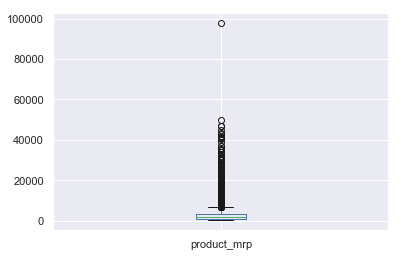

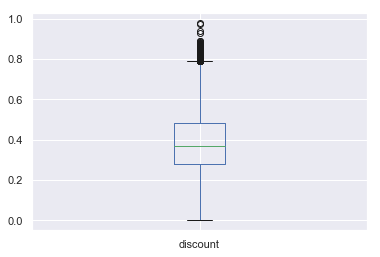

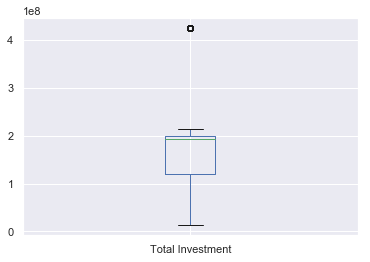

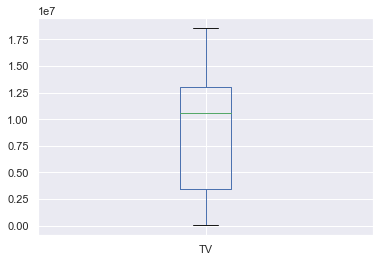

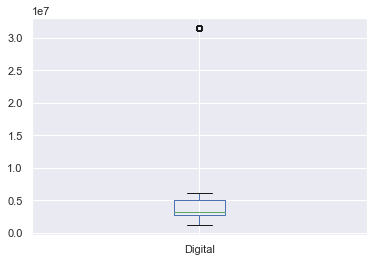

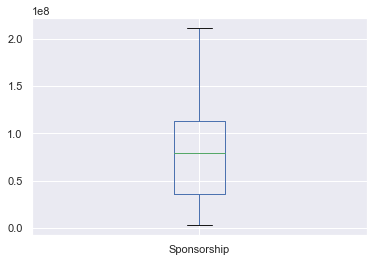

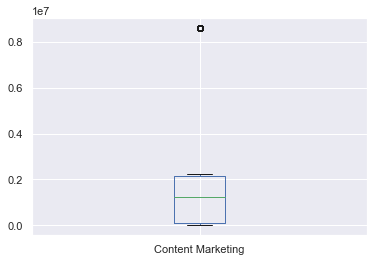

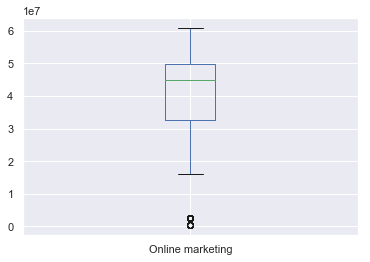

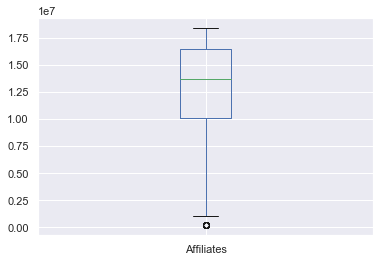

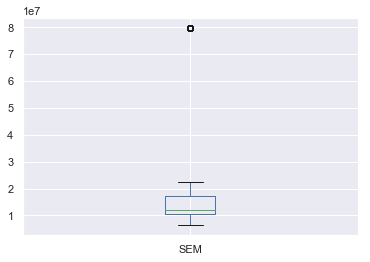

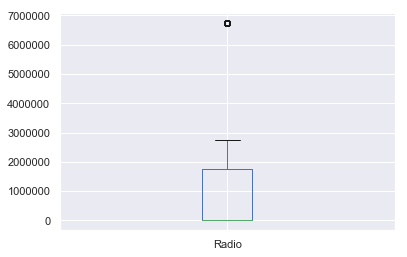

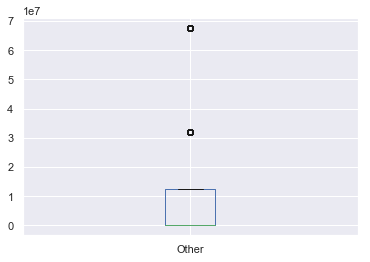

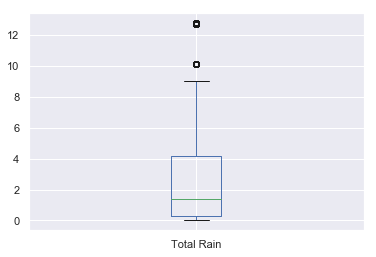

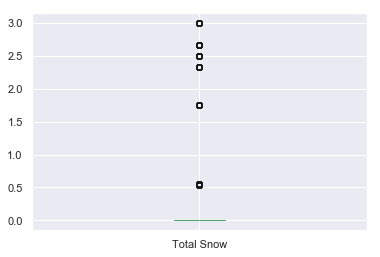

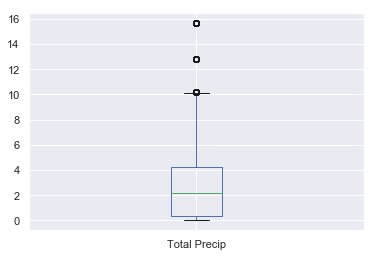

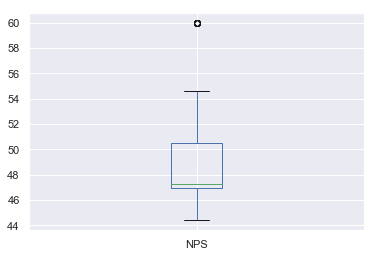

In [392]:
#Univariate Analysis for Float Columns
for i in order_EDA_master.select_dtypes(include=['float']).columns:
    plt.figure(i)
    order_EDA_master.boxplot(column=i)
    plt.show()

##### From the above graphswe can detect the outliers present in each of the variables

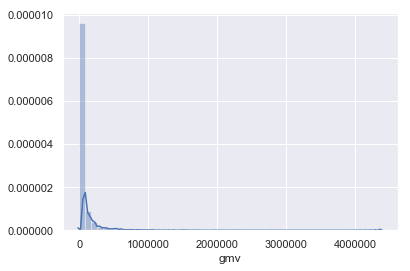

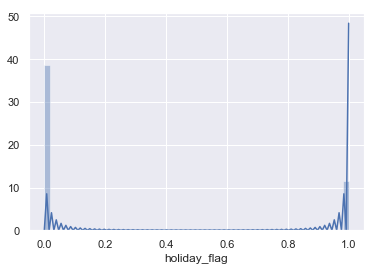

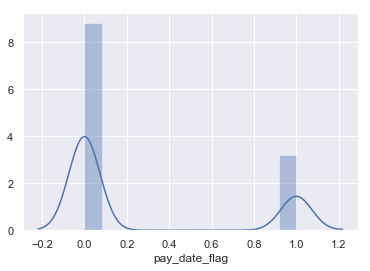

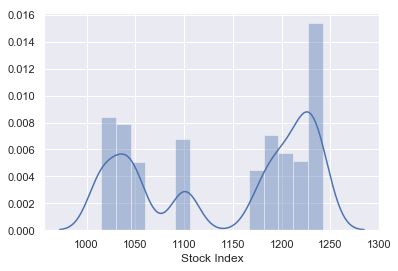

In [393]:
#Univariate Analysis for int columns
for i, col in enumerate(order_EDA_master.select_dtypes(include=['int']).columns):
    plt.figure(i)
    sns.distplot(order_EDA_master[col])
    plt.show()

##### Above graphs display the frequency distribution of each of the variables

### Bivariate Analysis

In [394]:
#Creating the Variables with GMV as base
cols1 = ['gmv', 'product_mrp', 'list_price', 'discount']
cols2 = ['gmv', 'Total Investment', 'TV', 'Digital','Sponsorship']
cols3 = ['gmv','Content Marketing', 'Online marketing', 'Affiliates','SEM', 'Radio', 'Other']
cols4 = ['gmv','Max Temp', 'Min Temp', 'Total Rain','Total Snow', 'Total Precip','NPS']

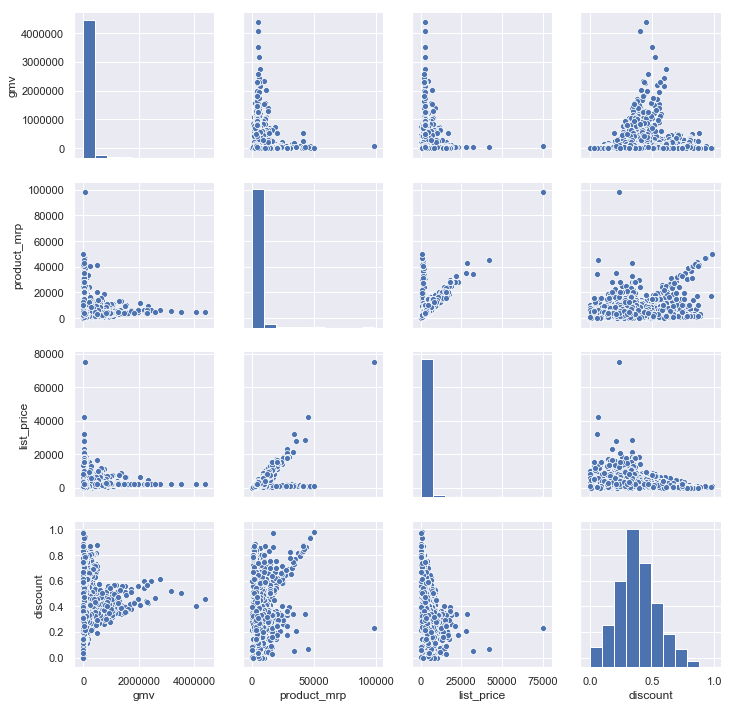

In [395]:
#Plotting Set1 variables
sns.pairplot(order_EDA_master[cols1])
plt.show()

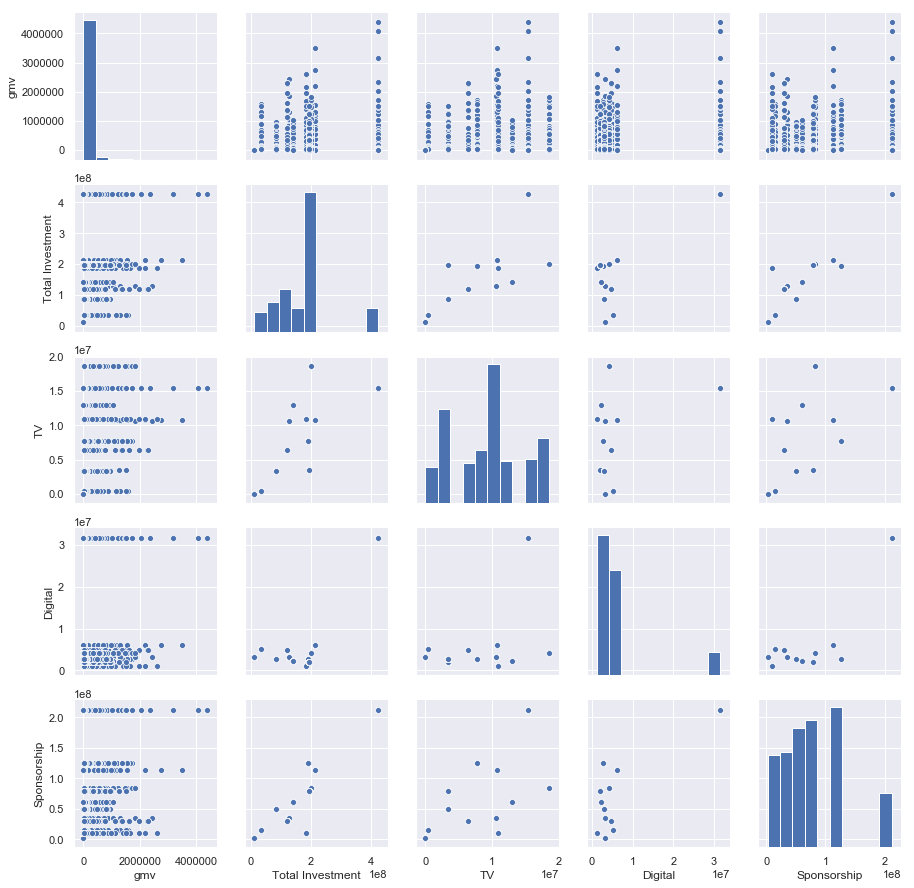

In [396]:
#Plotting Set2 variables
sns.pairplot(order_EDA_master[cols2])
plt.show()

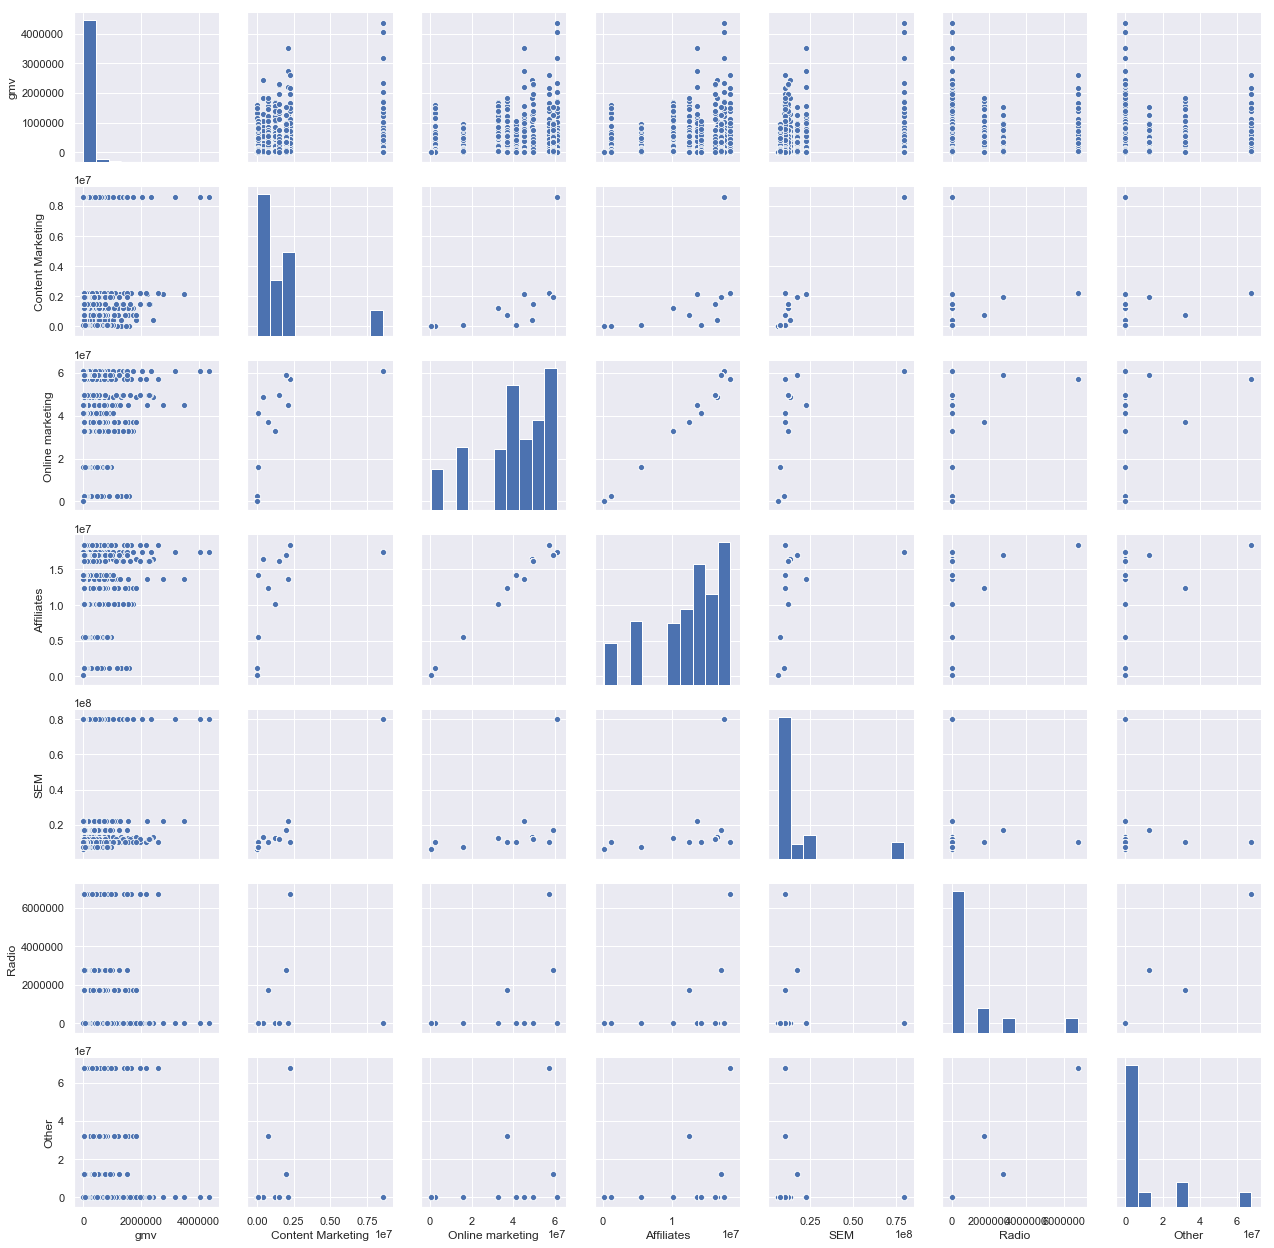

In [397]:
#Plotting Set3 variables
sns.pairplot(order_EDA_master[cols3])
plt.show()

In [398]:
#Plotting Set4 variables
sns.pairplot(order_EDA_master[cols4])
plt.show()

##### We can see gmv correlation with each of the variables

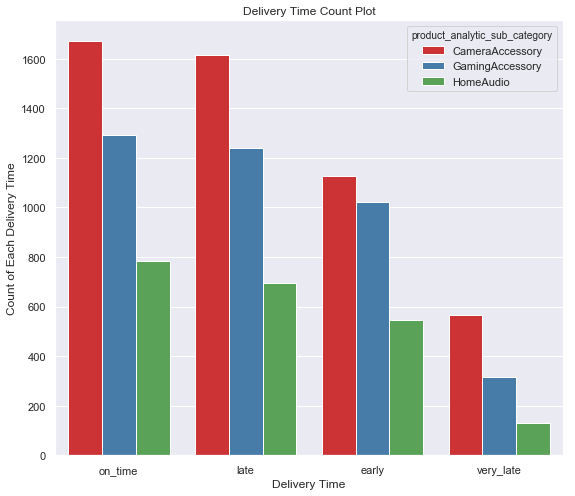

In [399]:
# Delivery time versus units sold
plt.figure(figsize=(20, 8))
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.countplot(data = order_EDA_master, x='Delivery_time', hue = 'product_analytic_sub_category',order=order_EDA_master.Delivery_time.value_counts().index,palette="Set1")
plt.title("Delivery Time Count Plot")
plt.xlabel("Delivery Time")
plt.ylabel("Count of Each Delivery Time")
plt.show()

##### Camera product has been delivered ontime most of the cases and conversely Home audio products are delivered very late

In [400]:
# Delivery time versus units sold
plt.figure(figsize=(20, 8))
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.countplot(data = order_EDA_master, x='payment_type', hue = 'product_analytic_sub_category',order=order_EDA_master.payment_type.value_counts().index,palette="Set1")
plt.title("Payment Type Counts")
plt.xlabel("Payment Type")
plt.ylabel("Count of Each Payment Type")
plt.show()

##### COD is the most preffered payment type

In [401]:
order_EDA_master_camera = order_EDA_master[(order_EDA_master['product_analytic_sub_category']=='CameraAccessory')]
order_EDA_master_camera.shape

(4978, 32)

In [402]:
order_EDA_master_home = order_EDA_master[(order_EDA_master['product_analytic_sub_category']=='HomeAudio')]
order_EDA_master_home.shape

(2158, 32)

In [403]:
order_EDA_master_game = order_EDA_master[(order_EDA_master['product_analytic_sub_category']=='GamingAccessory')]
order_EDA_master_game.shape

(3868, 32)

#### EDA for Camera dataset

In [404]:
# Delivery time versus units sold
plt.figure(figsize=(80, 10))
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.countplot(data = order_EDA_master_camera, x='payment_type', hue = 'product_analytic_vertical',order=order_EDA_master_camera.payment_type.value_counts().index,palette="Set1")
plt.title("Payment Type Counts")
plt.xlabel("Payment Type")
plt.ylabel("Count of Each Payment Type")
plt.show()

##### Lens is the highest sold item under camera and most of the people have availed COD payment type

In [405]:
# Delivery time versus units sold
plt.figure(figsize=(80, 10))
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.countplot(data = order_EDA_master_camera, x='Delivery_time', hue = 'product_analytic_vertical',order=order_EDA_master_camera.Delivery_time.value_counts().index,palette="Set1")
plt.title("Delivery_time Counts")
plt.xlabel("Delivery_time")
plt.ylabel("Count of Each Delivery_time")
plt.show()

##### lens is the highest bought camera product but it is delivered very lates in most of the occasssions

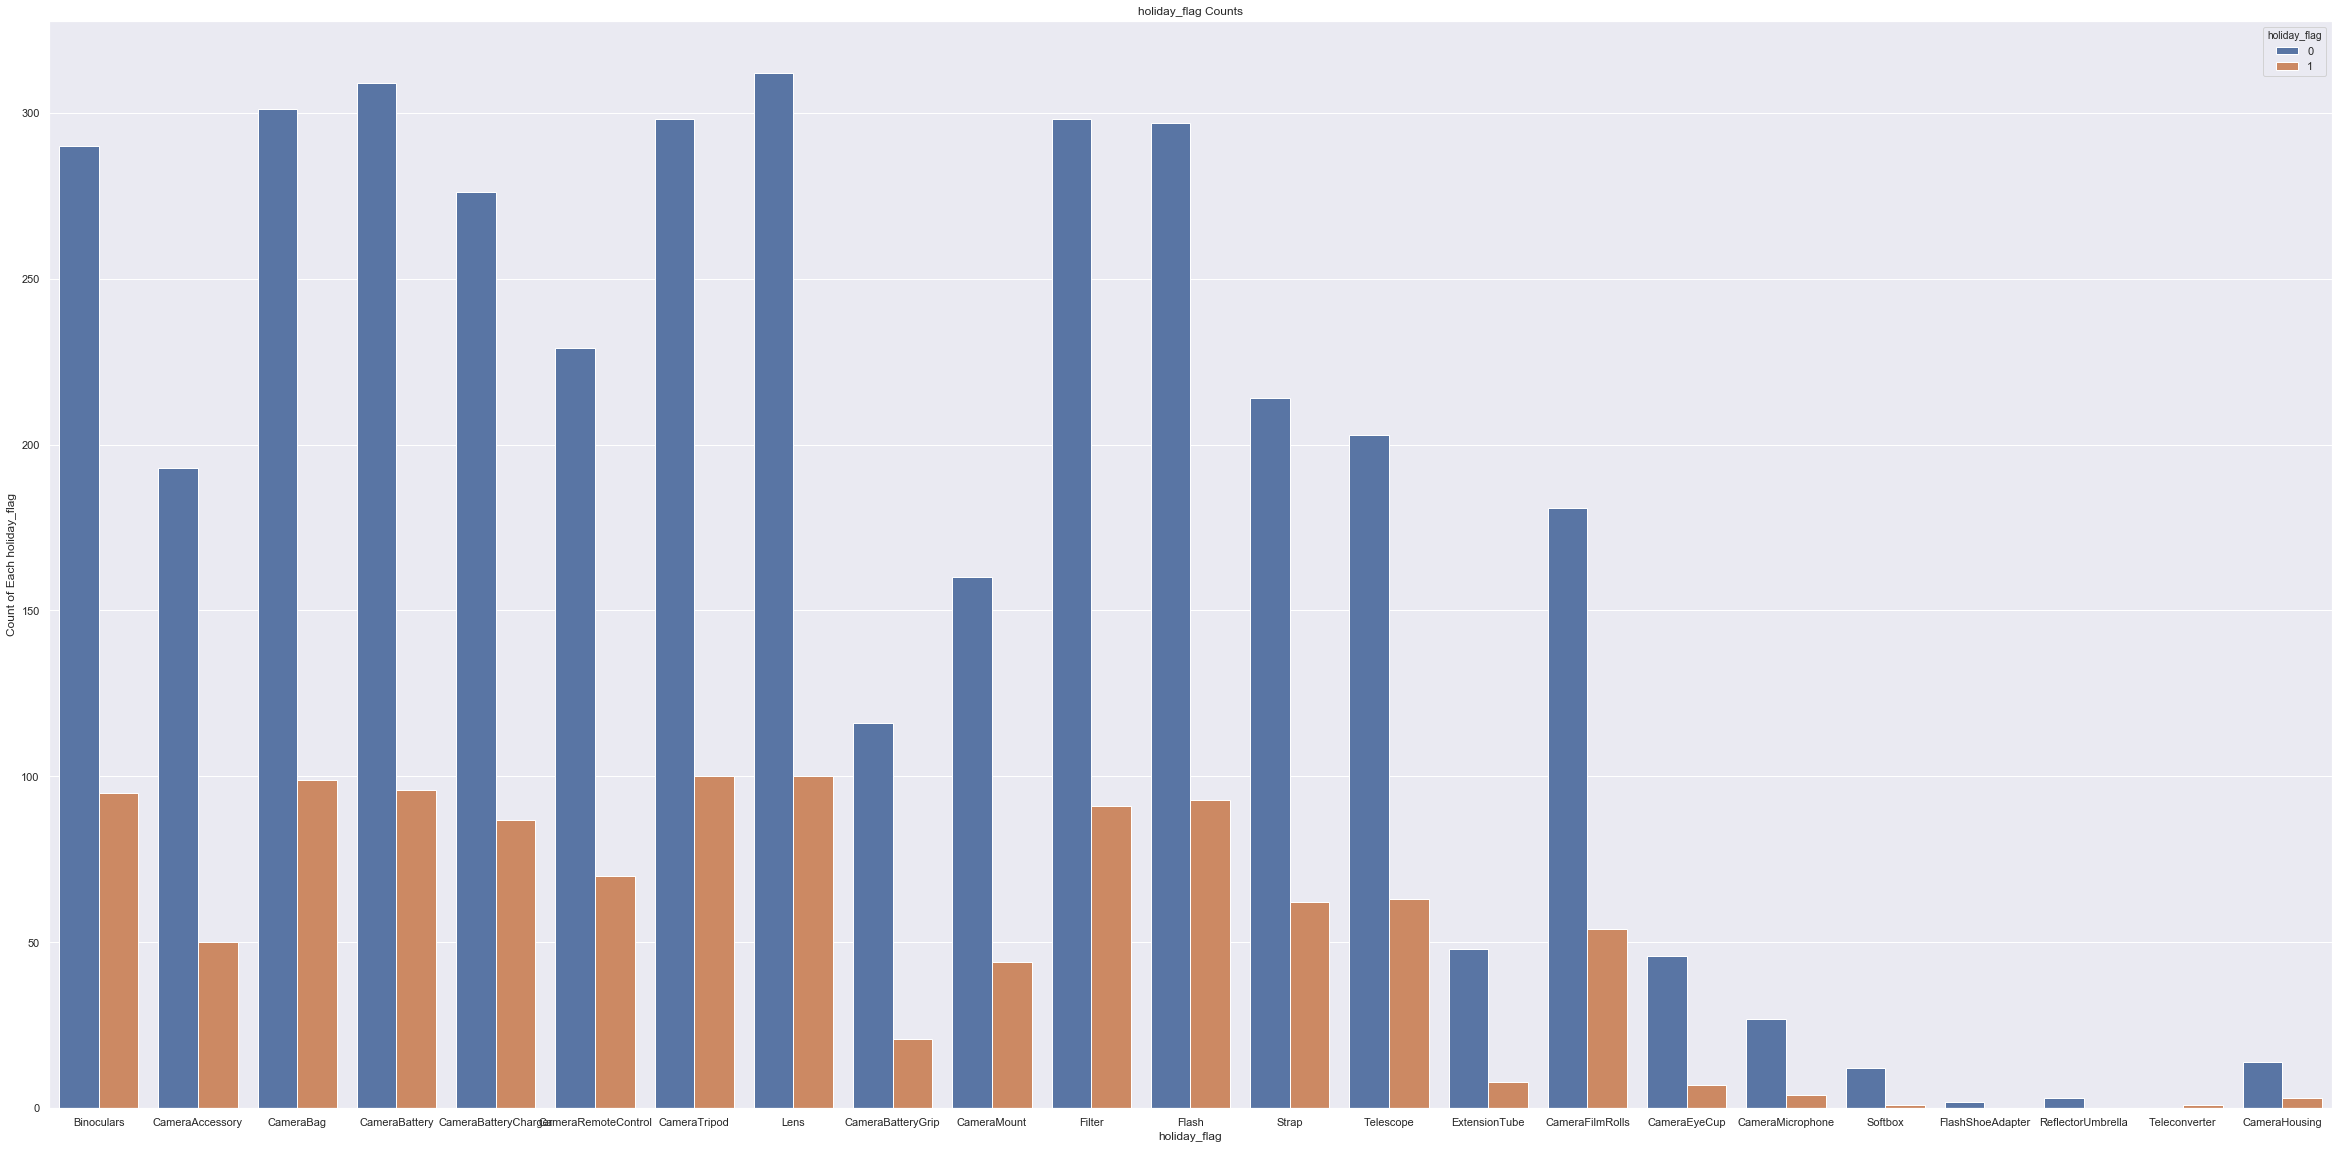

In [406]:
# Delivery time versus units sold
plt.figure(figsize=(90, 20))
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.countplot(x='product_analytic_vertical',hue='holiday_flag',data=order_EDA_master_camera)
plt.title("holiday_flag Counts")
plt.xlabel("holiday_flag")
plt.ylabel("Count of Each holiday_flag")
plt.show()

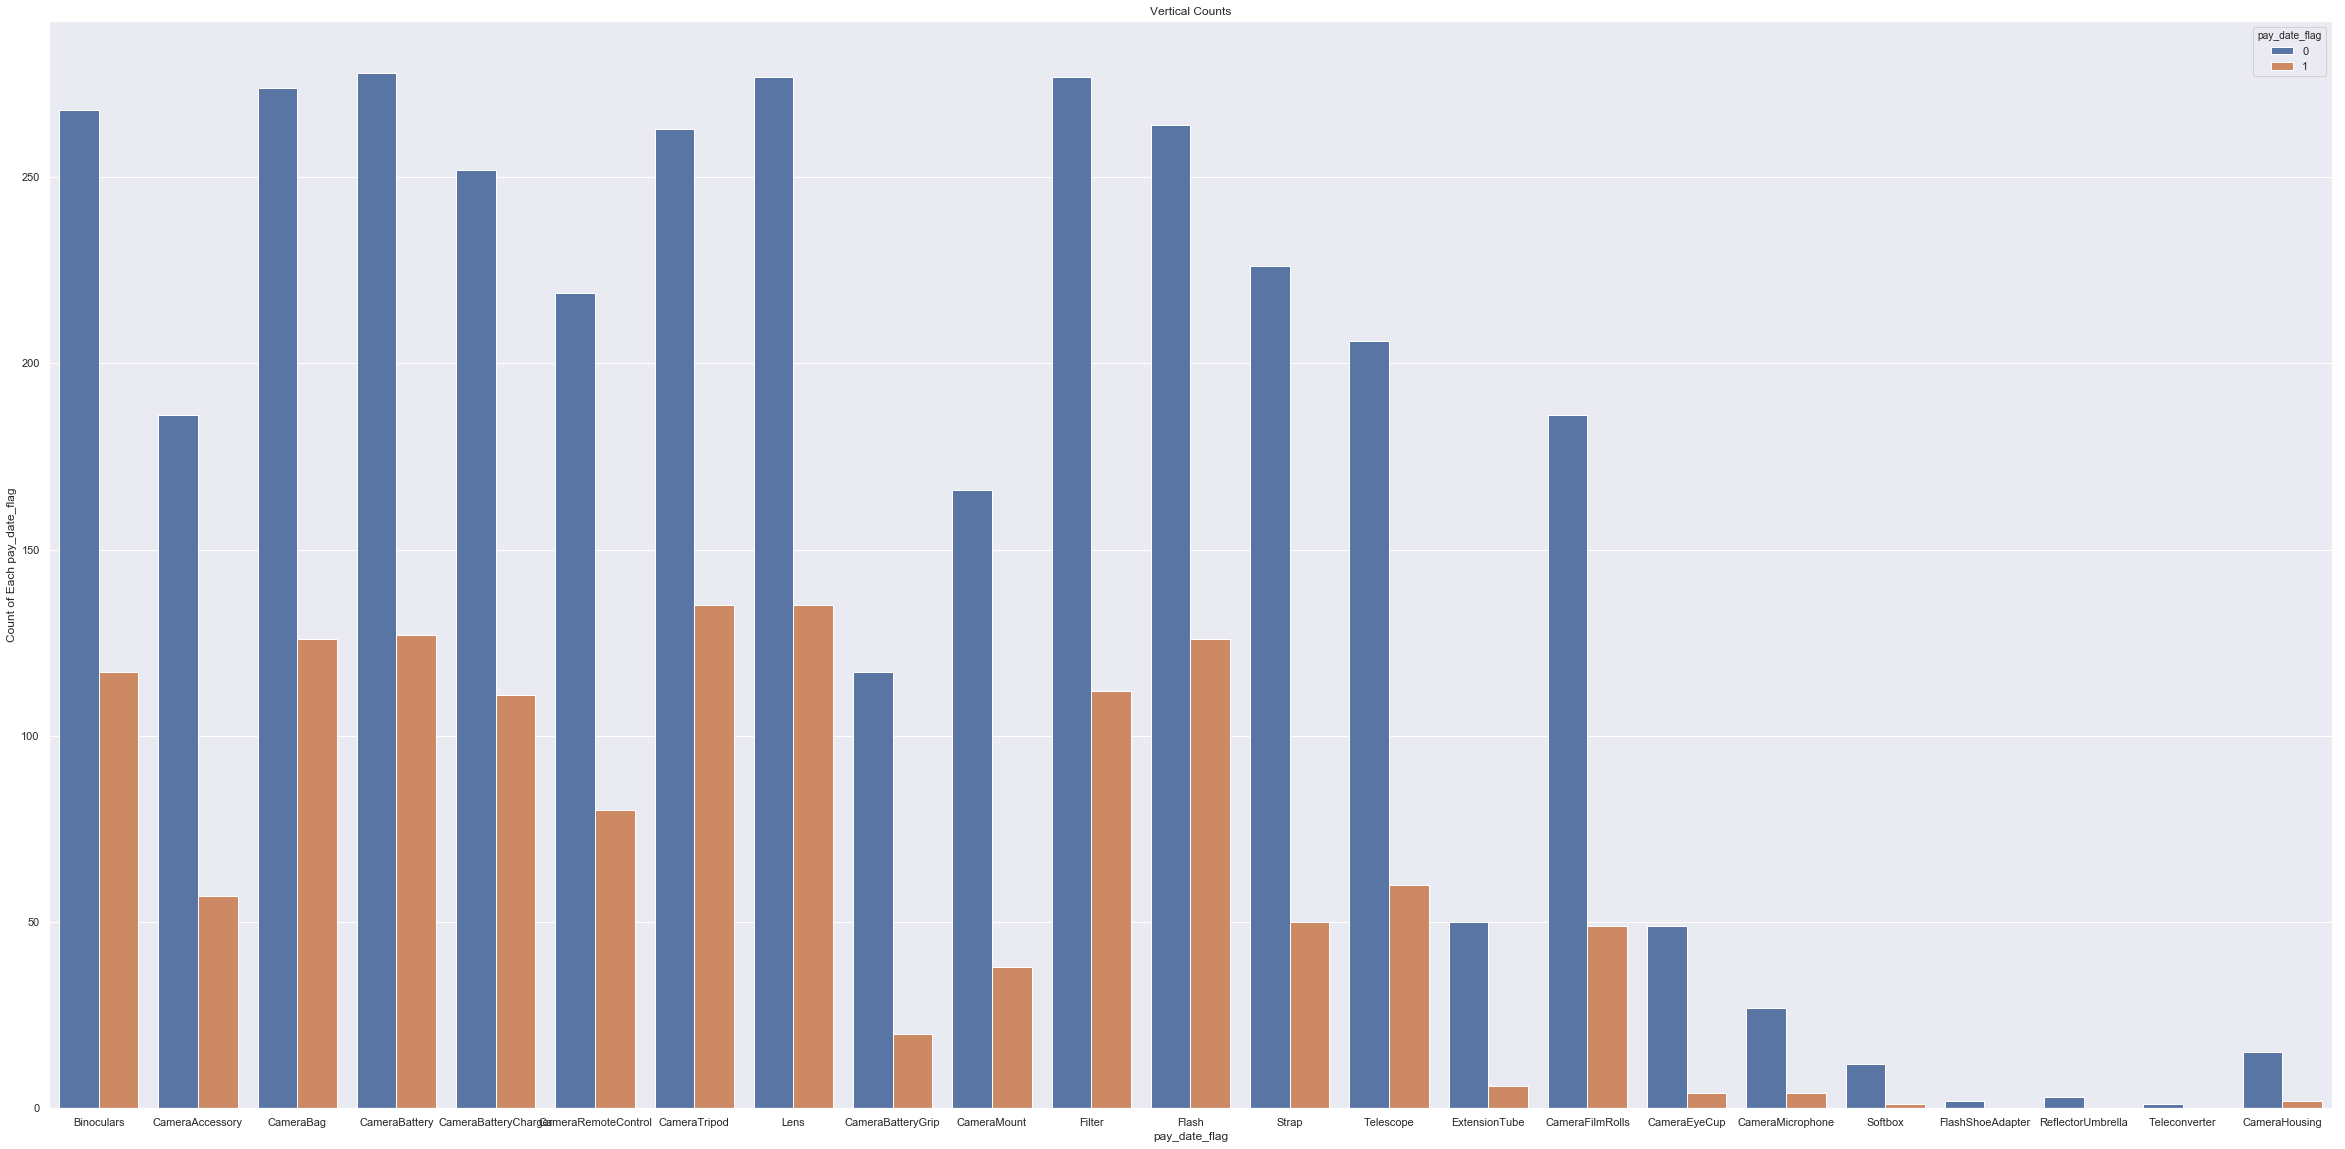

In [407]:
# Delivery time versus units sold
plt.figure(figsize=(90, 20))
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.countplot(x='product_analytic_vertical',hue='pay_date_flag',data=order_EDA_master_camera)
plt.title("Vertical Counts")
plt.xlabel("pay_date_flag")
plt.ylabel("Count of Each pay_date_flag")
plt.show()

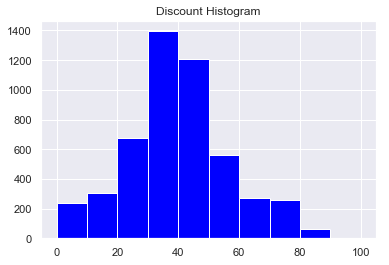

In [408]:
plt.title("Discount Histogram")
plt.hist(order_EDA_master_camera.discount*100, 10, range=[0, 100], facecolor='blue', align='mid')
plt.show()

##### From the above plot we can see maximum discount provided ranges between 30% to 40% for Camera product

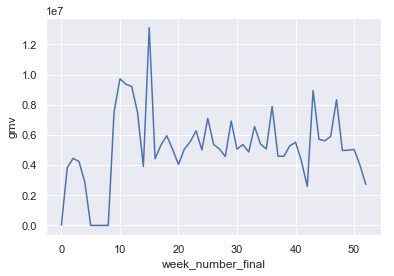

In [409]:
order_EDA_master_camera_gp = order_EDA_master_camera.groupby(['week_number_final'])[['gmv']].sum()
order_EDA_master_camera_gp = order_EDA_master_camera_gp.reset_index()
sns.lineplot(x = "week_number_final", y="gmv", data = order_EDA_master_camera_gp)
plt.show()

##### Graph clearly shows a spike in GMV at week 15 which is a promotional week

In [410]:
order_EDA_master_camera_gp = order_EDA_master_camera.groupby(['week_number_final'])[['product_mrp']].sum()
order_EDA_master_camera_gp = order_EDA_master_camera_gp.reset_index()
sns.lineplot(x = "week_number_final", y="product_mrp", data = order_EDA_master_camera_gp)
plt.show()

##### There are no sales during 5th to 9th week

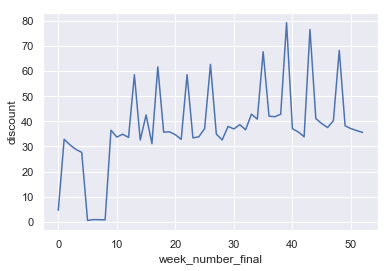

In [411]:
order_EDA_master_camera_gp = order_EDA_master_camera.groupby(['week_number_final'])[['discount']].sum()
order_EDA_master_camera_gp = order_EDA_master_camera_gp.reset_index()
sns.lineplot(x = "week_number_final", y="discount", data = order_EDA_master_camera_gp)
plt.show()

##### spike in the graph suggests discounts provided during holiday week

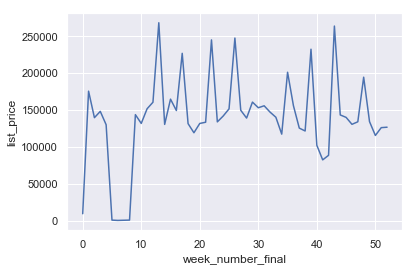

In [412]:
order_EDA_master_camera_gp = order_EDA_master_camera.groupby(['week_number_final'])[['list_price']].sum()
order_EDA_master_camera_gp = order_EDA_master_camera_gp.reset_index()
sns.lineplot(x = "week_number_final", y="list_price", data = order_EDA_master_camera_gp)
plt.show()

##### Product mrp and list price show the same trend

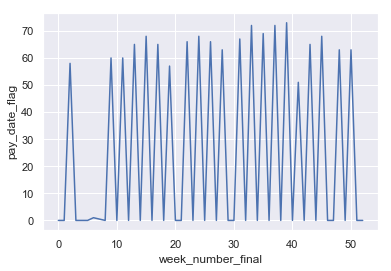

In [413]:
order_EDA_master_camera_gp = order_EDA_master_camera.groupby(['week_number_final'])[['pay_date_flag']].sum()
order_EDA_master_camera_gp = order_EDA_master_camera_gp.reset_index()
sns.lineplot(x = "week_number_final", y="pay_date_flag", data = order_EDA_master_camera_gp)
plt.show()

##### Spikes clearly show the Pay day weeks

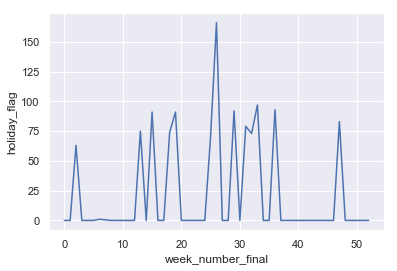

In [414]:
order_EDA_master_camera_gp = order_EDA_master_camera.groupby(['week_number_final'])[['holiday_flag']].sum()
order_EDA_master_camera_gp = order_EDA_master_camera_gp.reset_index()
sns.lineplot(x = "week_number_final", y="holiday_flag", data = order_EDA_master_camera_gp)
plt.show()

##### Spike clearly shows holiday weeks trend

#### EDA for Game dataset

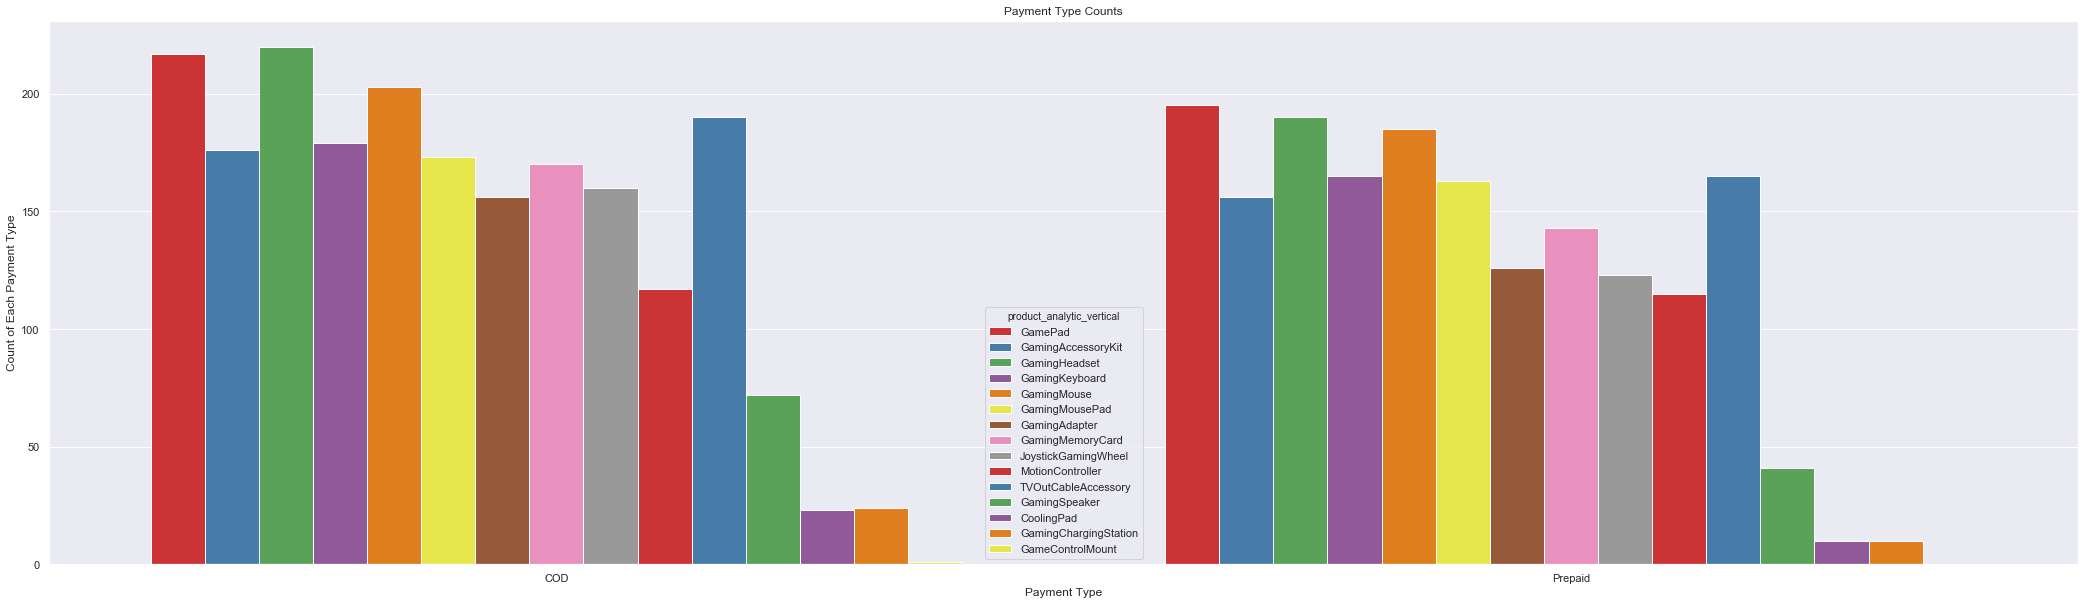

In [415]:
# Delivery time versus units sold
plt.figure(figsize=(80, 10))
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.countplot(data = order_EDA_master_game, x='payment_type', hue = 'product_analytic_vertical',order=order_EDA_master_game.payment_type.value_counts().index,palette="Set1")
plt.title("Payment Type Counts")
plt.xlabel("Payment Type")
plt.ylabel("Count of Each Payment Type")
plt.show()

##### Gaming Headset is the most preffered Gaming Accessory and COD is the most prefered option

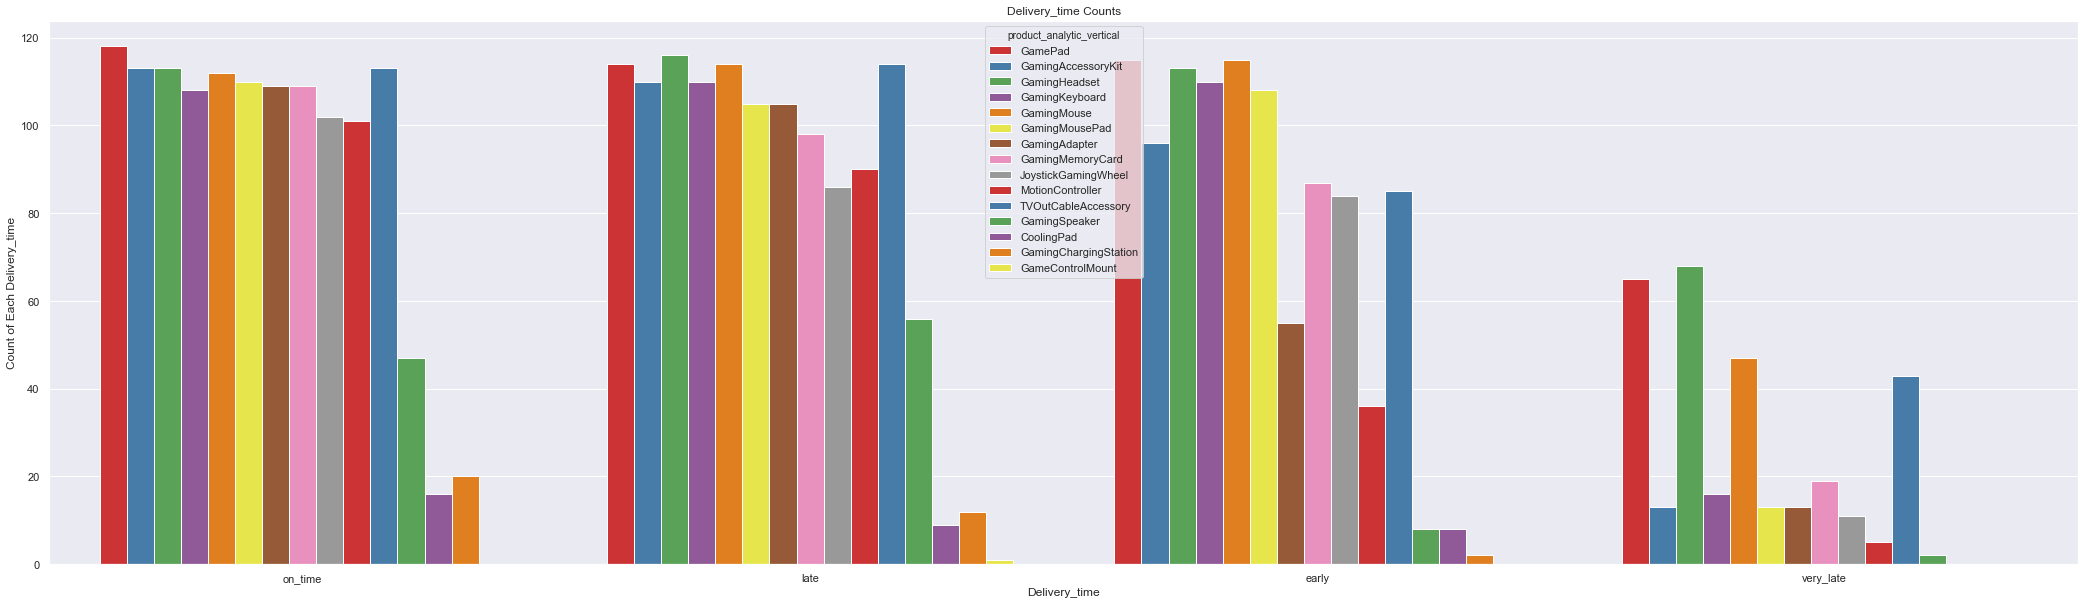

In [416]:
# Delivery time versus units sold
plt.figure(figsize=(80, 10))
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.countplot(data = order_EDA_master_game, x='Delivery_time', hue = 'product_analytic_vertical',order=order_EDA_master_game.Delivery_time.value_counts().index,palette="Set1")
plt.title("Delivery_time Counts")
plt.xlabel("Delivery_time")
plt.ylabel("Count of Each Delivery_time")
plt.show()

##### Gaming Headset which is the most prefered product is often delivered late

In [417]:
# Delivery time versus units sold
plt.figure(figsize=(90, 20))
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.countplot(x='product_analytic_vertical',hue='holiday_flag',data=order_EDA_master_game)
plt.title("holiday_flag Counts")
plt.xlabel("holiday_flag")
plt.ylabel("Count of Each holiday_flag")
plt.show()

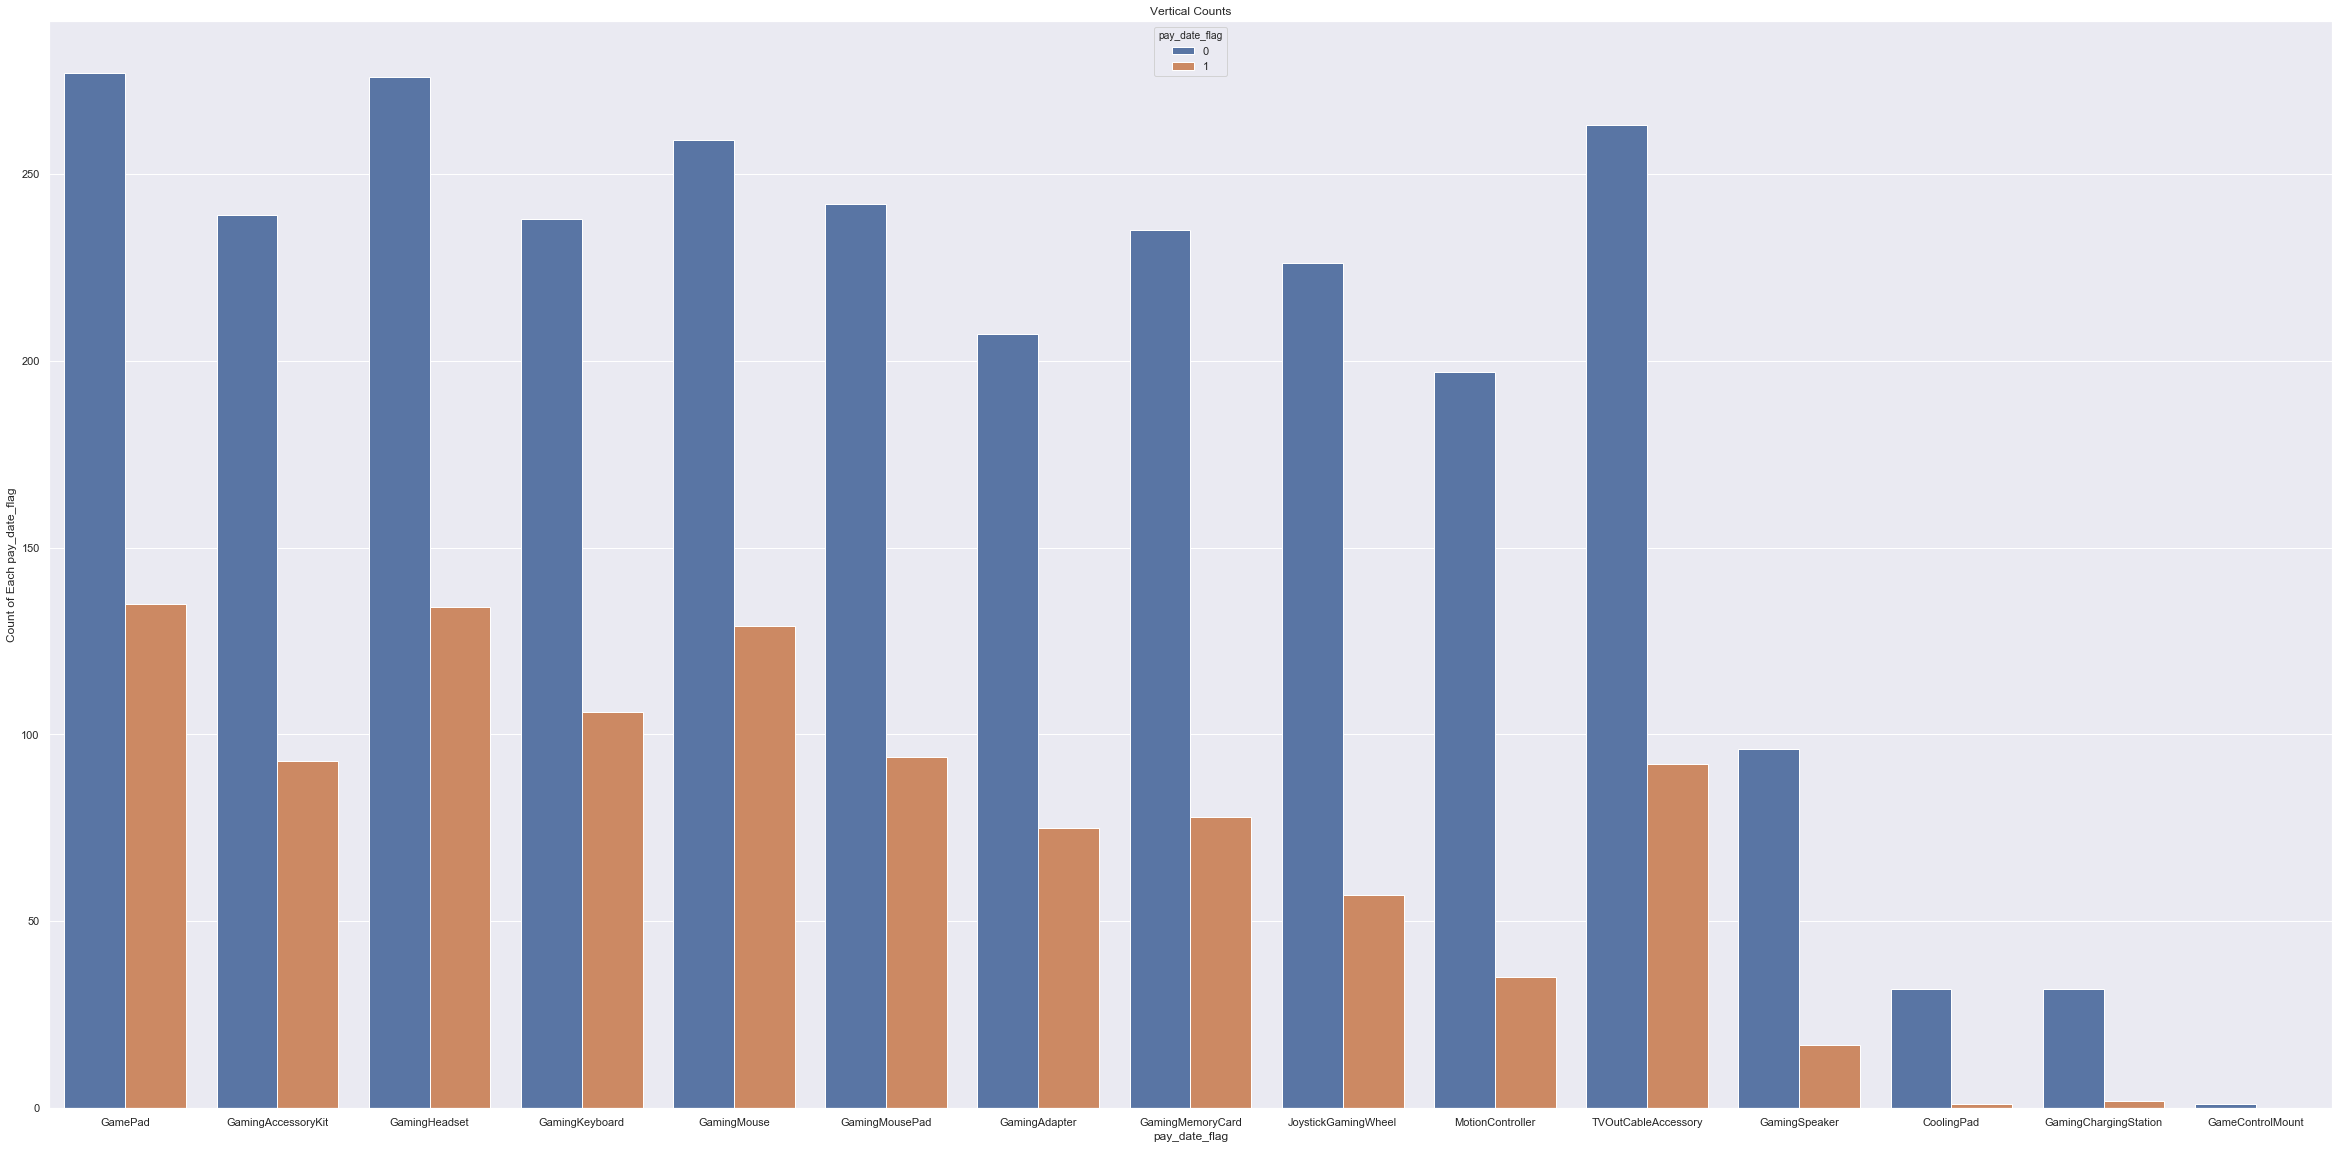

In [418]:
# Delivery time versus units sold
plt.figure(figsize=(90, 20))
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.countplot(x='product_analytic_vertical',hue='pay_date_flag',data=order_EDA_master_game)
plt.title("Vertical Counts")
plt.xlabel("pay_date_flag")
plt.ylabel("Count of Each pay_date_flag")
plt.show()

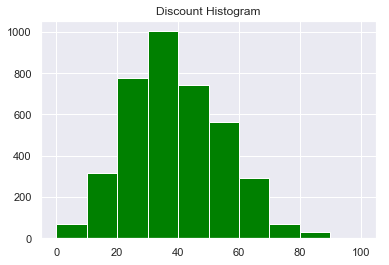

In [419]:
plt.title("Discount Histogram")
plt.hist(order_EDA_master_game.discount*100, 10, range=[0, 100], facecolor='green', align='mid')
plt.show()

##### Discounts provided during promotions ranges between 30% to 40%

In [420]:
order_EDA_master_game_gp = order_EDA_master_game.groupby(['week_number_final'])[['gmv']].sum()
order_EDA_master_game_gp = order_EDA_master_game_gp.reset_index()
sns.lineplot(x = "week_number_final", y="gmv", data = order_EDA_master_game_gp)
plt.show()

##### GMV shows a clear spike during 15th week which is a holiday week

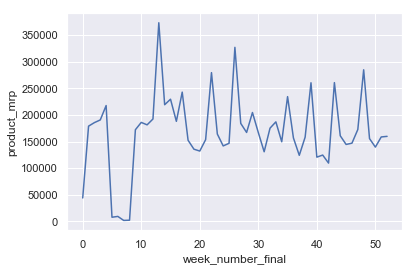

In [421]:
order_EDA_master_game_gp = order_EDA_master_game.groupby(['week_number_final'])[['product_mrp']].sum()
order_EDA_master_game_gp = order_EDA_master_game_gp.reset_index()
sns.lineplot(x = "week_number_final", y="product_mrp", data = order_EDA_master_game_gp)
plt.show()

##### There is no sales during 5th to 9th week

In [422]:
order_EDA_master_game_gp = order_EDA_master_game.groupby(['week_number_final'])[['discount']].sum()
order_EDA_master_game_gp = order_EDA_master_game_gp.reset_index()
sns.lineplot(x = "week_number_final", y="discount", data = order_EDA_master_game_gp)
plt.show()

##### Spikes indicates discounts during holiday sales

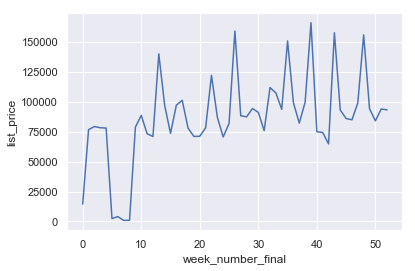

In [423]:
order_EDA_master_game_gp = order_EDA_master_game.groupby(['week_number_final'])[['list_price']].sum()
order_EDA_master_game_gp = order_EDA_master_game_gp.reset_index()
sns.lineplot(x = "week_number_final", y="list_price", data = order_EDA_master_game_gp)
plt.show()

##### Trend shows same as Product mrp

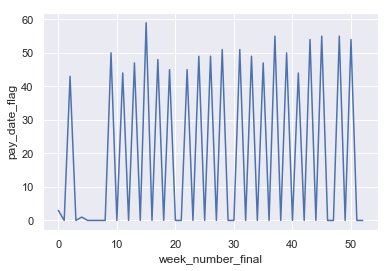

In [424]:
order_EDA_master_game_gp = order_EDA_master_game.groupby(['week_number_final'])[['pay_date_flag']].sum()
order_EDA_master_game_gp = order_EDA_master_game_gp.reset_index()
sns.lineplot(x = "week_number_final", y="pay_date_flag", data = order_EDA_master_game_gp)
plt.show()

##### Spikes clearly show the Pay day weeks

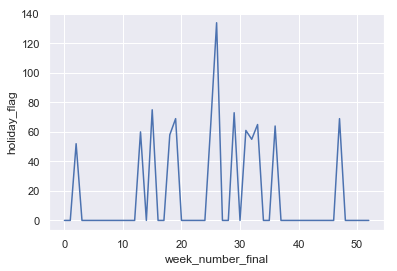

In [425]:
order_EDA_master_game_gp = order_EDA_master_game.groupby(['week_number_final'])[['holiday_flag']].sum()
order_EDA_master_game_gp = order_EDA_master_game_gp.reset_index()
sns.lineplot(x = "week_number_final", y="holiday_flag", data = order_EDA_master_game_gp)
plt.show()

##### Spike clearly shows holiday weeks trend

#### EDA for Home dataset

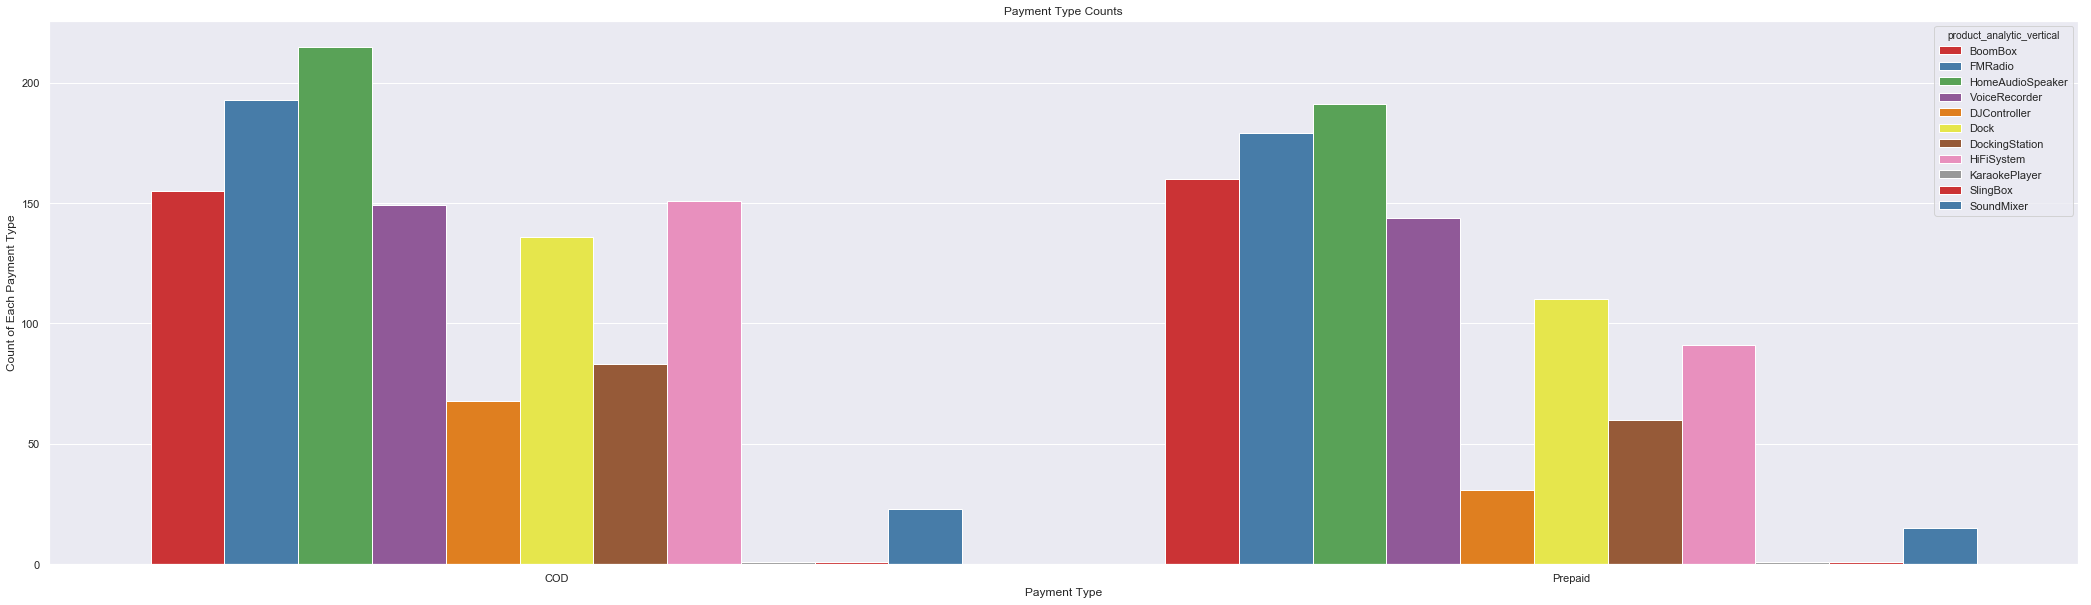

In [426]:
# Delivery time versus units sold
plt.figure(figsize=(80, 10))
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.countplot(data = order_EDA_master_home, x='payment_type', hue = 'product_analytic_vertical',order=order_EDA_master_home.payment_type.value_counts().index,palette="Set1")
plt.title("Payment Type Counts")
plt.xlabel("Payment Type")
plt.ylabel("Count of Each Payment Type")
plt.show()

##### Home Audio Speaker is the most prefered Home Audio accessory and COD is the most prefered payment type

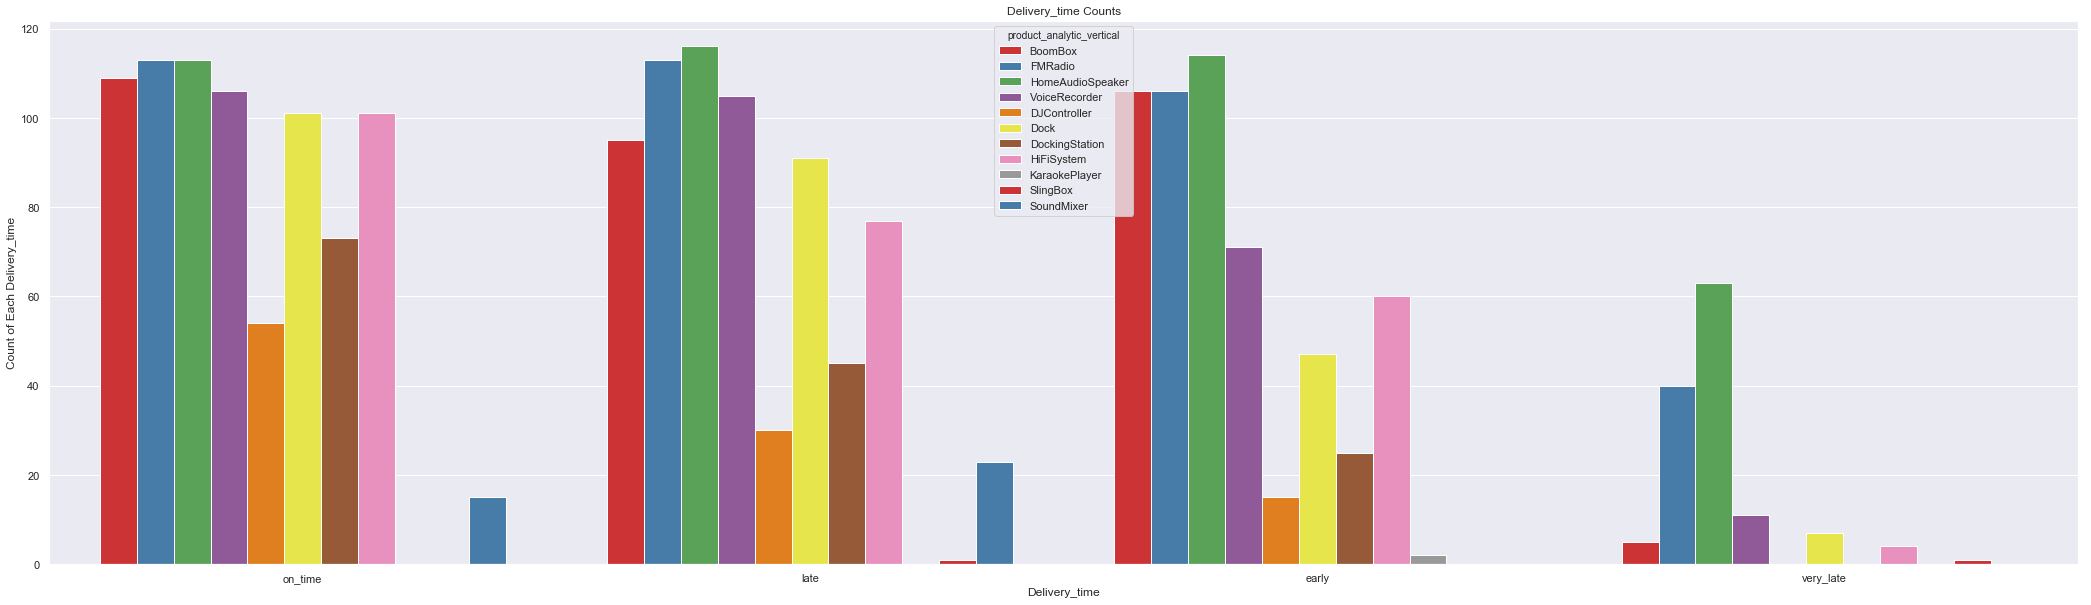

In [427]:
# Delivery time versus units sold
plt.figure(figsize=(80, 10))
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.countplot(data = order_EDA_master_home, x='Delivery_time', hue = 'product_analytic_vertical',order=order_EDA_master_home.Delivery_time.value_counts().index,palette="Set1")
plt.title("Delivery_time Counts")
plt.xlabel("Delivery_time")
plt.ylabel("Count of Each Delivery_time")
plt.show()

##### Home Audio speaker being most preffered product is often delivered late

In [428]:
# Delivery time versus units sold
plt.figure(figsize=(90, 20))
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.countplot(x='product_analytic_vertical',hue='holiday_flag',data=order_EDA_master_home)
plt.title("holiday_flag Counts")
plt.xlabel("holiday_flag")
plt.ylabel("Count of Each holiday_flag")
plt.show()

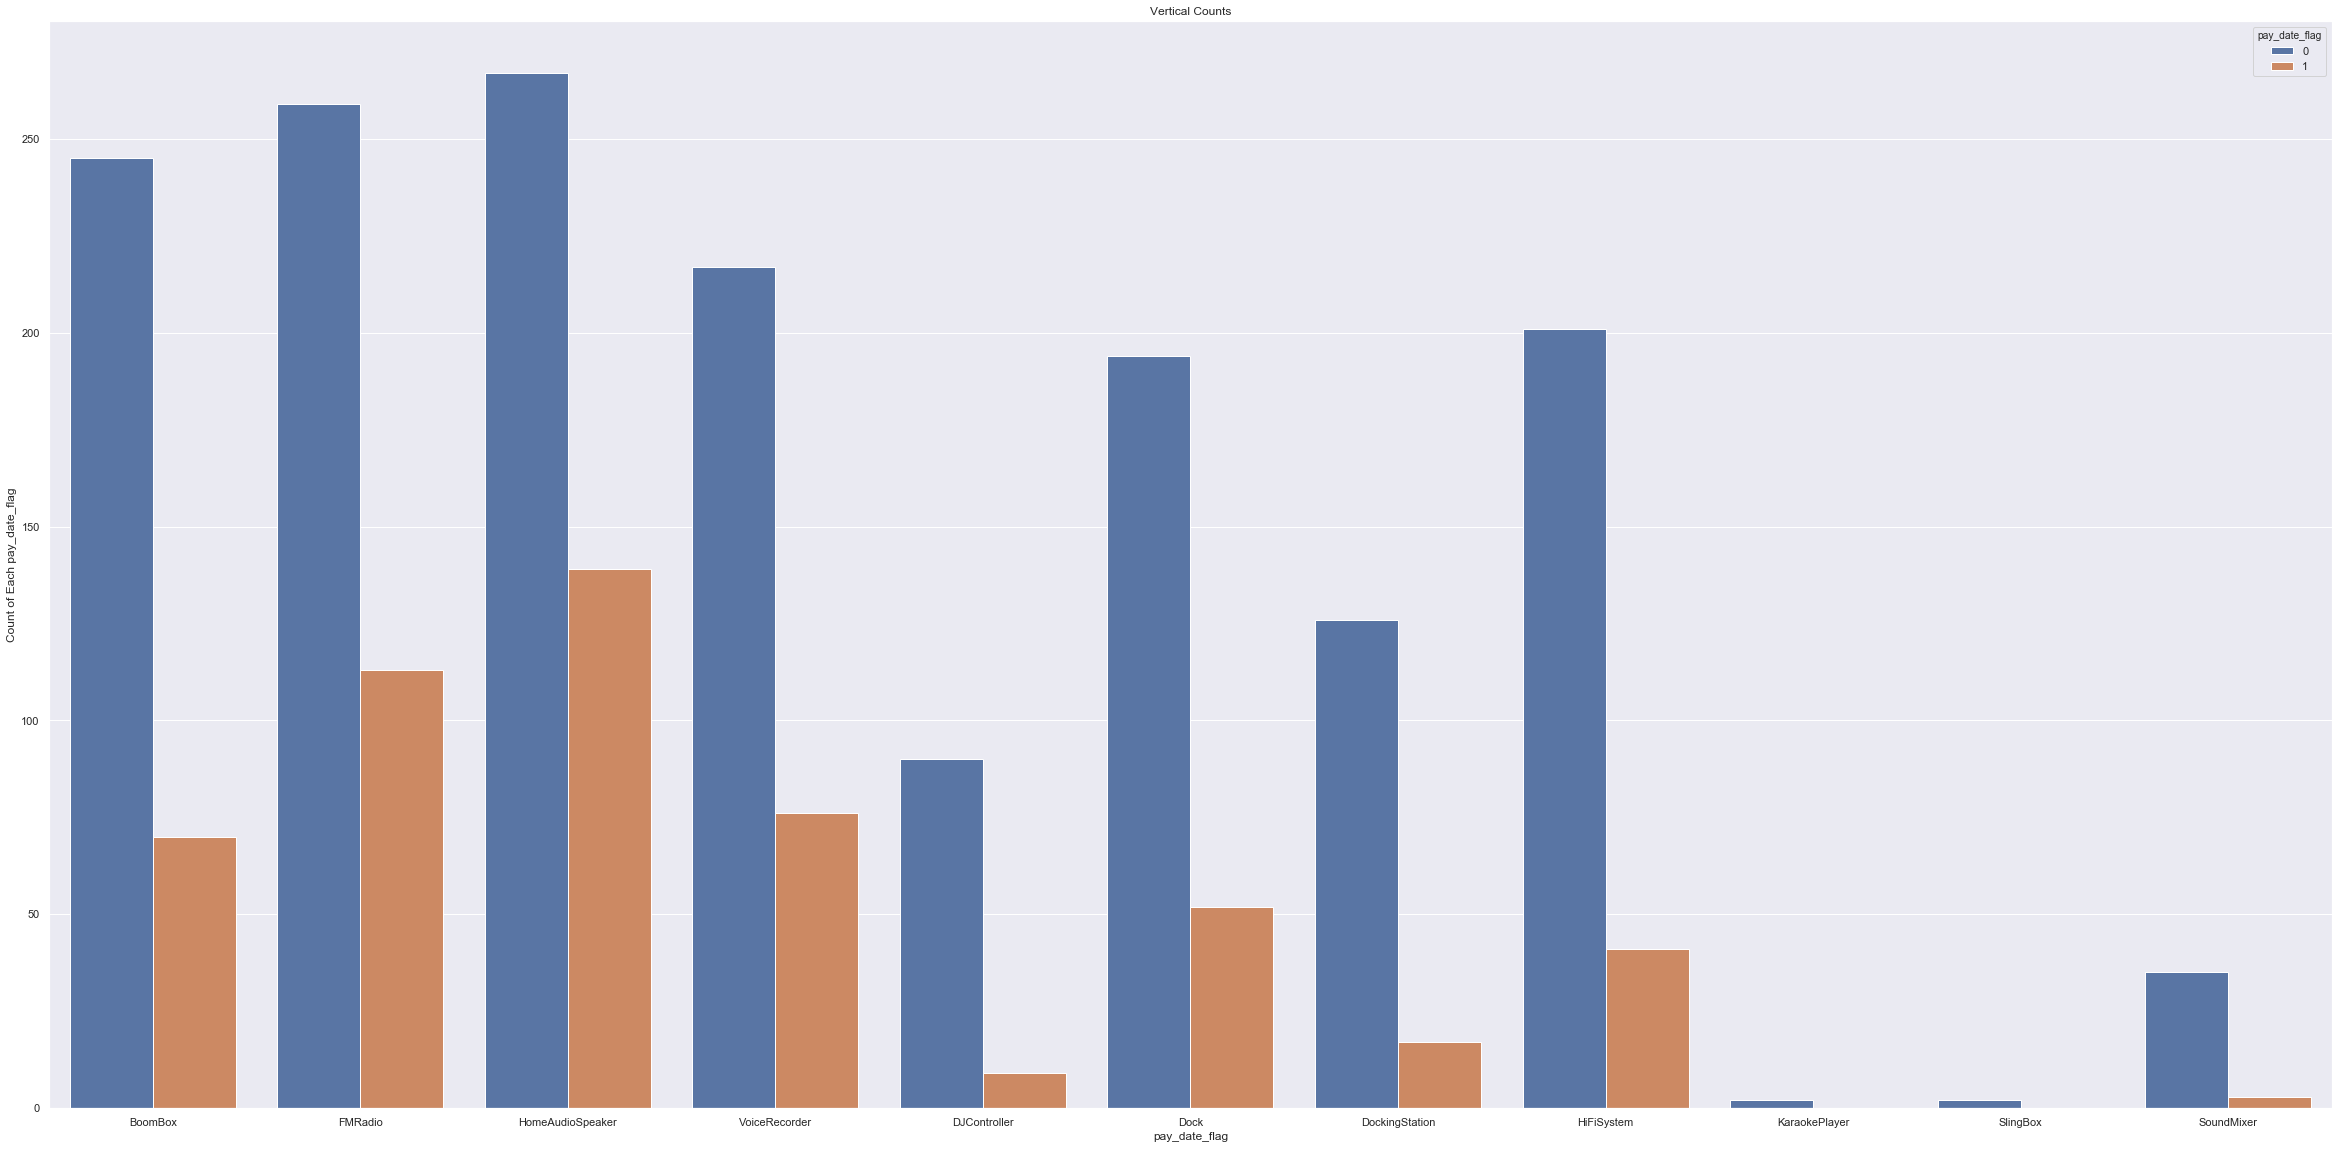

In [429]:
# Delivery time versus units sold
plt.figure(figsize=(90, 20))
sns.set(style="darkgrid")
plt.subplot(1, 2, 1)
sns.countplot(x='product_analytic_vertical',hue='pay_date_flag',data=order_EDA_master_home)
plt.title("Vertical Counts")
plt.xlabel("pay_date_flag")
plt.ylabel("Count of Each pay_date_flag")
plt.show()

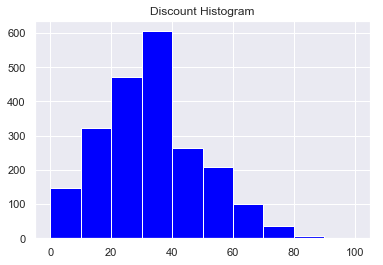

In [430]:
plt.title("Discount Histogram")
plt.hist(order_EDA_master_home.discount*100, 10, range=[0, 100], facecolor='blue', align='mid')
plt.show()

##### Peak discount offered ranges between 30% and 40%

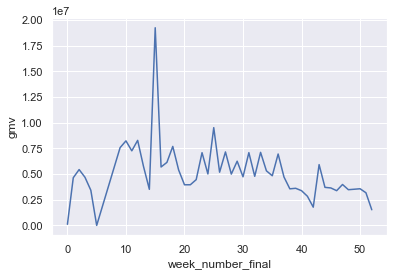

In [431]:
order_EDA_master_home_gp = order_EDA_master_home.groupby(['week_number_final'])[['gmv']].sum()
order_EDA_master_home_gp = order_EDA_master_home_gp.reset_index()
sns.lineplot(x = "week_number_final", y="gmv", data = order_EDA_master_home_gp)
plt.show()

##### GMV is high during 15th week which is a Holiday week with highes units sold

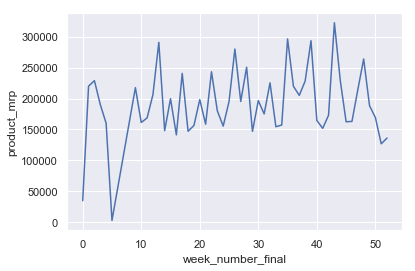

In [432]:
order_EDA_master_home_gp = order_EDA_master_home.groupby(['week_number_final'])[['product_mrp']].sum()
order_EDA_master_home_gp = order_EDA_master_home_gp.reset_index()
sns.lineplot(x = "week_number_final", y="product_mrp", data = order_EDA_master_home_gp)
plt.show()

##### No sales has happened during 5th week

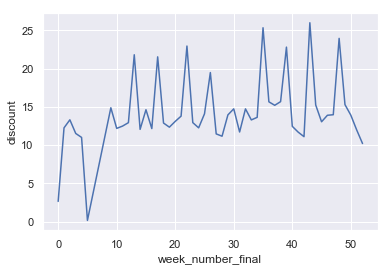

In [433]:
order_EDA_master_home_gp = order_EDA_master_home.groupby(['week_number_final'])[['discount']].sum()
order_EDA_master_home_gp = order_EDA_master_home_gp.reset_index()
sns.lineplot(x = "week_number_final", y="discount", data = order_EDA_master_home_gp)
plt.show()

##### Spikes shows discount offered during holiday weeks

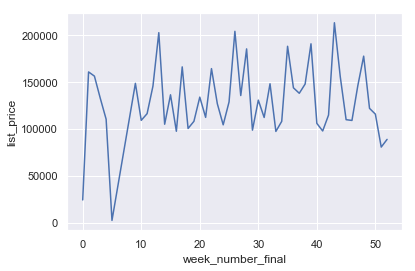

In [434]:
order_EDA_master_home_gp = order_EDA_master_home.groupby(['week_number_final'])[['list_price']].sum()
order_EDA_master_home_gp = order_EDA_master_home_gp.reset_index()
sns.lineplot(x = "week_number_final", y="list_price", data = order_EDA_master_home_gp)
plt.show()

##### List price trends are similar to Product Mrp

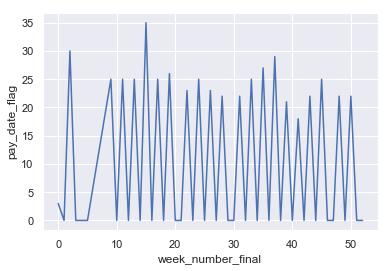

In [435]:
order_EDA_master_home_gp = order_EDA_master_home.groupby(['week_number_final'])[['pay_date_flag']].sum()
order_EDA_master_home_gp = order_EDA_master_home_gp.reset_index()
sns.lineplot(x = "week_number_final", y="pay_date_flag", data = order_EDA_master_home_gp)
plt.show()

##### Spikes clearly show the Pay day weeks

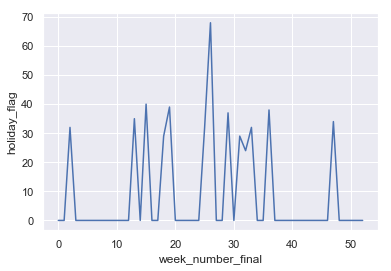

In [436]:
order_EDA_master_home_gp = order_EDA_master_home.groupby(['week_number_final'])[['holiday_flag']].sum()
order_EDA_master_home_gp = order_EDA_master_home_gp.reset_index()
sns.lineplot(x = "week_number_final", y="holiday_flag", data = order_EDA_master_home_gp)
plt.show()

##### Spike clearly shows holiday weeks trend

### Step 21 : Creating Dummies

In [437]:
DT = pd.get_dummies(order_test['Delivery_time'], prefix='Delivery_time', drop_first = True)
DT = DT.astype(float)
order_test= pd.concat([order_test, DT], axis = 1)
order_test = order_test.drop(['Delivery_time'], axis = 1)

PaymentType = pd.get_dummies(order_test['payment_type'], prefix='payment_type', drop_first = True)
PaymentType = PaymentType.astype(float)
order_test= pd.concat([order_test, PaymentType], axis = 1)
order_test = order_test.drop(['payment_type'], axis = 1)

order_test.head()

order_date  Year Month   gmv  units  sla product_analytic_category  \
0 2015-10-17 15:11:54  2015    10  6400      1    5           CameraAccessory   
1 2015-10-19 10:07:22  2015    10  6900      1    7           CameraAccessory   
2 2015-10-20 15:45:56  2015    10  1990      1   10           CameraAccessory   
3 2015-10-14 12:05:15  2015    10  1690      1    4           CameraAccessory   
4 2015-10-17 21:25:03  2015    10  1618      1    6           CameraAccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               CameraAccessory              CameraTripod         7190   
1               CameraAccessory              CameraTripod         7190   
2               CameraAccessory              CameraTripod         2099   
3               CameraAccessory              CameraTripod         2099   
4               CameraAccessory              CameraTripod         2099   

           ...           YearMonth  week_number_final  holiday_flag  \
0          ...              201510                 15             1   
1          ...              201510                 16             0   
2          ...              201510                 16             0   
3          ...              201510                 15             0   
4          ...              201510                 15             1   

   pay_date_flag  list_price  discount  Delivery_time_late  \
0              0      6400.0  0.109875                 0.0   
1              0      6900.0  0.040334                 1.0   
2              0      1990.0  0.051929                 1.0   
3              0      1690.0  0.194855                 0.0   
4              0      1618.0  0.229157                 0.0   

   Delivery_time_on_time  Delivery_time_very_late  payment_type_Prepaid  
0                    1.0                      0.0                   0.0  
1                    0.0                      0.0                   0.0  
2                    0.0                      0.0                   0.0  
3                    1.0                      0.0                   1.0  
4                    1.0                      0.0                   1.0  

[5 rows x 21 columns]

In [438]:
#Drop the Redundant Column
order_test = order_test.drop(['sla'], axis =1 )

In [439]:
#Examine the Dataframe
order_test.head()

order_date  Year Month   gmv  units product_analytic_category  \
0 2015-10-17 15:11:54  2015    10  6400      1           CameraAccessory   
1 2015-10-19 10:07:22  2015    10  6900      1           CameraAccessory   
2 2015-10-20 15:45:56  2015    10  1990      1           CameraAccessory   
3 2015-10-14 12:05:15  2015    10  1690      1           CameraAccessory   
4 2015-10-17 21:25:03  2015    10  1618      1           CameraAccessory   

  product_analytic_sub_category product_analytic_vertical  product_mrp  \
0               CameraAccessory              CameraTripod         7190   
1               CameraAccessory              CameraTripod         7190   
2               CameraAccessory              CameraTripod         2099   
3               CameraAccessory              CameraTripod         2099   
4               CameraAccessory              CameraTripod         2099   

   week_number  YearMonth  week_number_final  holiday_flag  pay_date_flag  \
0           42     201510                 15             1              0   
1           43     201510                 16             0              0   
2           43     201510                 16             0              0   
3           42     201510                 15             0              0   
4           42     201510                 15             1              0   

   list_price  discount  Delivery_time_late  Delivery_time_on_time  \
0      6400.0  0.109875                 0.0                    1.0   
1      6900.0  0.040334                 1.0                    0.0   
2      1990.0  0.051929                 1.0                    0.0   
3      1690.0  0.194855                 0.0                    1.0   
4      1618.0  0.229157                 0.0                    1.0   

   Delivery_time_very_late  payment_type_Prepaid  
0                      0.0                   0.0  
1                      0.0                   0.0  
2                      0.0                   0.0  
3                      0.0                   1.0  
4                      0.0                   1.0

In [440]:
#Check the Columns
order_test.columns

Index(['order_date', 'Year', 'Month', 'gmv', 'units',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'week_number', 'YearMonth',
       'week_number_final', 'holiday_flag', 'pay_date_flag', 'list_price',
       'discount', 'Delivery_time_late', 'Delivery_time_on_time',
       'Delivery_time_very_late', 'payment_type_Prepaid'],
      dtype='object')

### Step 22 :  Aggregating Order table

In [441]:
#Final Aggregation of the Order Data
order_final = order_test.groupby(['week_number_final','product_analytic_sub_category','product_analytic_vertical','Year', 'Month']).agg({'gmv':'sum','units':'sum','product_mrp':'mean','holiday_flag':'max','pay_date_flag':'max', 'list_price':'mean','discount':'mean', 'Delivery_time_late':'sum', 'Delivery_time_on_time':'sum','Delivery_time_very_late':'sum', 'payment_type_Prepaid':'sum'})
order_final.head()

gmv  \
week_number_final product_analytic_sub_category product_analytic_vertical Year Month         
0                 CameraAccessory               Binoculars                2015 07      949   
                                                CameraAccessory           2015 07      153   
                                                CameraBag                 2015 07     5050   
                                                CameraBattery             2015 07      858   
                                                CameraBatteryCharger      2015 07      205   

                                                                                      units  \
week_number_final product_analytic_sub_category product_analytic_vertical Year Month          
0                 CameraAccessory               Binoculars                2015 07         1   
                                                CameraAccessory           2015 07         1   
                                                CameraBag                 2015 07         2   
                                                CameraBattery             2015 07         4   
                                                CameraBatteryCharger      2015 07         1   

                                                                                      product_mrp  \
week_number_final product_analytic_sub_category product_analytic_vertical Year Month                
0                 CameraAccessory               Binoculars                2015 07          1500.0   
                                                CameraAccessory           2015 07           220.0   
                                                CameraBag                 2015 07          4175.0   
                                                CameraBattery             2015 07           319.5   
                                                CameraBatteryCharger      2015 07           270.0   

                                                                                      holiday_flag  \
week_number_final product_analytic_sub_category product_analytic_vertical Year Month                 
0                 CameraAccessory               Binoculars                2015 07                0   
                                                CameraAccessory           2015 07                0   
                                                CameraBag                 2015 07                0   
                                                CameraBattery             2015 07                0   
                                                CameraBatteryCharger      2015 07                0   

                                                                                      pay_date_flag  \
week_number_final product_analytic_sub_category product_analytic_vertical Year Month                  
0                 CameraAccessory               Binoculars                2015 07                 0   
                                                CameraAccessory           2015 07                 0   
                                                CameraBag                 2015 07                 0   
                                                CameraBattery             2015 07                 0   
                                                CameraBatteryCharger      2015 07                 0   

                                                                                      list_price  \
week_number_final product_analytic_sub_category product_analytic_vertical Year Month               
0                 CameraAccessory               Binoculars                2015 07          949.0   
                                                CameraAccessory           2015 07          153.0   
                                                CameraBag                 2015 07         2525.0   
                                                CameraBattery             2015 07          214.5   
                 

In [442]:
#Restting the Index to get the Dataframe back to it original position
order_final = order_final.reset_index()
order_final.head(10)

week_number_final product_analytic_sub_category product_analytic_vertical  \
0                  0               CameraAccessory                Binoculars   
1                  0               CameraAccessory           CameraAccessory   
2                  0               CameraAccessory                 CameraBag   
3                  0               CameraAccessory             CameraBattery   
4                  0               CameraAccessory      CameraBatteryCharger   
5                  0               CameraAccessory       CameraRemoteControl   
6                  0               CameraAccessory              CameraTripod   
7                  0               CameraAccessory                      Lens   
8                  0               GamingAccessory                   GamePad   
9                  0               GamingAccessory        GamingAccessoryKit   

   Year Month    gmv  units  product_mrp  holiday_flag  pay_date_flag  \
0  2015    07    949      1  1500.000000             0              0   
1  2015    07    153      1   220.000000             0              0   
2  2015    07   5050      2  4175.000000             0              0   
3  2015    07    858      4   319.500000             0              0   
4  2015    07    205      1   270.000000             0              0   
5  2015    07    420      1   850.000000             0              0   
6  2015    07   9420     14  1846.000000             0              0   
7  2015    07    465      2   499.500000             0              0   
8  2015    07  17524     15  1987.266667             0              1   
9  2015    07   1299      2  1049.000000             0              0   

    list_price  discount  Delivery_time_late  Delivery_time_on_time  \
0   949.000000  0.367333                 0.0                    1.0   
1   153.000000  0.304545                 0.0                    1.0   
2  2525.000000  0.504324                 0.0                    1.0   
3   214.500000  0.313517                 0.0                    1.0   
4   205.000000  0.240741                 1.0                    0.0   
5   420.000000  0.505882                 0.0                    0.0   
6   672.857143  0.633679                 0.0                    2.0   
7   232.500000  0.433326                 0.0                    0.0   
8  1168.266667  0.326465                 2.0                    2.0   
9   649.500000  0.441419                 1.0                    1.0   

   Delivery_time_very_late  payment_type_Prepaid  
0                      0.0                   1.0  
1                      0.0                   1.0  
2                      0.0                   2.0  
3                      0.0                   4.0  
4                      0.0                   1.0  
5                      0.0                   1.0  
6                      0.0                  14.0  
7                      0.0                   2.0  
8                      0.0                  15.0  
9                      0.0                   2.0

In [443]:
#Check the Shape of the Dataframe
order_final.shape

(2149, 16)

In [444]:
#Taking back up of the table
order_final_bkp = order_final

### Step 23 : Merging at the Dataframes together

In [445]:
#master_df
order_master = pd.merge(order_final, master_df, on = ['week_number_final'])
order_master.head()


week_number_final product_analytic_sub_category product_analytic_vertical  \
0                  0               CameraAccessory                Binoculars   
1                  0               CameraAccessory           CameraAccessory   
2                  0               CameraAccessory                 CameraBag   
3                  0               CameraAccessory             CameraBattery   
4                  0               CameraAccessory      CameraBatteryCharger   

   Year Month   gmv  units  product_mrp  holiday_flag  pay_date_flag  \
0  2015    07   949      1       1500.0             0              0   
1  2015    07   153      1        220.0             0              0   
2  2015    07  5050      2       4175.0             0              0   
3  2015    07   858      4        319.5             0              0   
4  2015    07   205      1        270.0             0              0   

      ...       Radio  Other  Year-Month  Max Temp  Min Temp  Total Rain  \
0     ...         0.0    0.0      201507      25.5      13.2         0.0   
1     ...         0.0    0.0      201507      25.5      13.2         0.0   
2     ...         0.0    0.0      201507      25.5      13.2         0.0   
3     ...         0.0    0.0      201507      25.5      13.2         0.0   
4     ...         0.0    0.0      201507      25.5      13.2         0.0   

   Total Snow  Total Precip        NPS  Stock Index  
0         0.0           0.0  54.599588         1177  
1         0.0           0.0  54.599588         1177  
2         0.0           0.0  54.599588         1177  
3         0.0           0.0  54.599588         1177  
4         0.0           0.0  54.599588         1177  

[5 rows x 34 columns]

In [446]:
#Check the Shape of the Final Dataframe
order_master.shape

(2149, 34)

In [447]:
#Check the Different Columns in the Dataframe
order_master.columns

Index(['week_number_final', 'product_analytic_sub_category',
       'product_analytic_vertical', 'Year', 'Month', 'gmv', 'units',
       'product_mrp', 'holiday_flag', 'pay_date_flag', 'list_price',
       'discount', 'Delivery_time_late', 'Delivery_time_on_time',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'Total Investment',
       'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'Affiliates', 'SEM', 'Radio', 'Other', 'Year-Month', 'Max Temp',
       'Min Temp', 'Total Rain', 'Total Snow', 'Total Precip', 'NPS',
       'Stock Index'],
      dtype='object')

In [448]:
#Drop the Redundant Columns
cols = ['Year', 'Month','Year-Month']
order_master = order_master.drop(cols, axis=1)
order_master.head()

week_number_final product_analytic_sub_category product_analytic_vertical  \
0                  0               CameraAccessory                Binoculars   
1                  0               CameraAccessory           CameraAccessory   
2                  0               CameraAccessory                 CameraBag   
3                  0               CameraAccessory             CameraBattery   
4                  0               CameraAccessory      CameraBatteryCharger   

    gmv  units  product_mrp  holiday_flag  pay_date_flag  list_price  \
0   949      1       1500.0             0              0       949.0   
1   153      1        220.0             0              0       153.0   
2  5050      2       4175.0             0              0      2525.0   
3   858      4        319.5             0              0       214.5   
4   205      1        270.0             0              0       205.0   

   discount     ...                SEM  Radio  Other  Max Temp  Min Temp  \
0  0.367333     ...       1.004739e+07    0.0    0.0      25.5      13.2   
1  0.304545     ...       1.004739e+07    0.0    0.0      25.5      13.2   
2  0.504324     ...       1.004739e+07    0.0    0.0      25.5      13.2   
3  0.313517     ...       1.004739e+07    0.0    0.0      25.5      13.2   
4  0.240741     ...       1.004739e+07    0.0    0.0      25.5      13.2   

   Total Rain  Total Snow  Total Precip        NPS  Stock Index  
0         0.0         0.0           0.0  54.599588         1177  
1         0.0         0.0           0.0  54.599588         1177  
2         0.0         0.0           0.0  54.599588         1177  
3         0.0         0.0           0.0  54.599588         1177  
4         0.0         0.0           0.0  54.599588         1177  

[5 rows x 31 columns]

In [449]:
#Create New Calculated Field for Discount_Amount
order_master['discount'] = round(order_master['discount'] * 100,2)
order_master.head()

week_number_final product_analytic_sub_category product_analytic_vertical  \
0                  0               CameraAccessory                Binoculars   
1                  0               CameraAccessory           CameraAccessory   
2                  0               CameraAccessory                 CameraBag   
3                  0               CameraAccessory             CameraBattery   
4                  0               CameraAccessory      CameraBatteryCharger   

    gmv  units  product_mrp  holiday_flag  pay_date_flag  list_price  \
0   949      1       1500.0             0              0       949.0   
1   153      1        220.0             0              0       153.0   
2  5050      2       4175.0             0              0      2525.0   
3   858      4        319.5             0              0       214.5   
4   205      1        270.0             0              0       205.0   

   discount     ...                SEM  Radio  Other  Max Temp  Min Temp  \
0     36.73     ...       1.004739e+07    0.0    0.0      25.5      13.2   
1     30.45     ...       1.004739e+07    0.0    0.0      25.5      13.2   
2     50.43     ...       1.004739e+07    0.0    0.0      25.5      13.2   
3     31.35     ...       1.004739e+07    0.0    0.0      25.5      13.2   
4     24.07     ...       1.004739e+07    0.0    0.0      25.5      13.2   

   Total Rain  Total Snow  Total Precip        NPS  Stock Index  
0         0.0         0.0           0.0  54.599588         1177  
1         0.0         0.0           0.0  54.599588         1177  
2         0.0         0.0           0.0  54.599588         1177  
3         0.0         0.0           0.0  54.599588         1177  
4         0.0         0.0           0.0  54.599588         1177  

[5 rows x 31 columns]

In [450]:
#Check the Columns
order_master.columns

Index(['week_number_final', 'product_analytic_sub_category',
       'product_analytic_vertical', 'gmv', 'units', 'product_mrp',
       'holiday_flag', 'pay_date_flag', 'list_price', 'discount',
       'Delivery_time_late', 'Delivery_time_on_time',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'Total Investment',
       'TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'Affiliates', 'SEM', 'Radio', 'Other', 'Max Temp', 'Min Temp',
       'Total Rain', 'Total Snow', 'Total Precip', 'NPS', 'Stock Index'],
      dtype='object')

### Step 24 : Adding ADStock to the Dataset

In [451]:
#Function for Ad-Stock Calculation
def adstocked_advertising(advertising):
    
    adstocked_advertising = []
    for i in range(len(advertising)):
        if i == 0: 
            adstocked_advertising.append(advertising[i])
        else:
            adstocked_advertising.append(advertising[i] + 0.5 * adstocked_advertising[i-1])            
    return adstocked_advertising

In [452]:
tv = adstocked_advertising(order_master['TV'])
dig = adstocked_advertising(order_master['Digital'])
spon = adstocked_advertising(order_master['Sponsorship'])
cm = adstocked_advertising(order_master['Content Marketing'])
om = adstocked_advertising(order_master['Online marketing'])
aff = adstocked_advertising(order_master['Affiliates'])
sem = adstocked_advertising(order_master['SEM'])
radio = adstocked_advertising(order_master['Radio'])
other = adstocked_advertising(order_master['Other'])

In [453]:
#Assign the AdStock Value to the Master Dataframe creating Respective Columns
order_master['TV_adstock'] = tv
order_master['digital_adstock'] = dig
order_master['sponsor_adstock'] = spon
order_master['content_adstock'] = cm
order_master['online_marketing_adstock'] = om
order_master['affiliates_adstock'] = aff
order_master['sem_adstock'] = sem
order_master['radio_adstock'] = radio
order_master['other_adstock'] = other

order_master.head()

week_number_final product_analytic_sub_category product_analytic_vertical  \
0                  0               CameraAccessory                Binoculars   
1                  0               CameraAccessory           CameraAccessory   
2                  0               CameraAccessory                 CameraBag   
3                  0               CameraAccessory             CameraBattery   
4                  0               CameraAccessory      CameraBatteryCharger   

    gmv  units  product_mrp  holiday_flag  pay_date_flag  list_price  \
0   949      1       1500.0             0              0       949.0   
1   153      1        220.0             0              0       153.0   
2  5050      2       4175.0             0              0      2525.0   
3   858      4        319.5             0              0       214.5   
4   205      1        270.0             0              0       205.0   

   discount      ...        Stock Index     TV_adstock  digital_adstock  \
0     36.73      ...               1177  430660.407924     5.066027e+06   
1     30.45      ...               1177  645990.611887     7.599041e+06   
2     50.43      ...               1177  753655.713868     8.865548e+06   
3     31.35      ...               1177  807488.264858     9.498801e+06   
4     24.07      ...               1177  834404.540354     9.815428e+06   

   sponsor_adstock  content_adstock  online_marketing_adstock  \
0     1.482854e+07      1865.795074              2.654555e+06   
1     2.224281e+07      2798.692610              3.981833e+06   
2     2.594994e+07      3265.141379              4.645472e+06   
3     2.780351e+07      3498.365763              4.977291e+06   
4     2.873030e+07      3614.977955              5.143201e+06   

   affiliates_adstock   sem_adstock  radio_adstock  other_adstock  
0        1.094508e+06  1.004739e+07            0.0            0.0  
1        1.641762e+06  1.507109e+07            0.0            0.0  
2        1.915389e+06  1.758294e+07            0.0            0.0  
3        2.052202e+06  1.883887e+07            0.0            0.0  
4        2.120609e+06  1.946683e+07            0.0            0.0  

[5 rows x 40 columns]

In [454]:
order_master.shape

(2149, 40)

### Step 25 : Outlier Treatment for Numeric Variables

In [455]:
# Columns for checking outliers
order_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 0 to 2148
Data columns (total 40 columns):
week_number_final                2149 non-null int64
product_analytic_sub_category    2149 non-null object
product_analytic_vertical        2149 non-null object
gmv                              2149 non-null int32
units                            2149 non-null int64
product_mrp                      2149 non-null float64
holiday_flag                     2149 non-null int32
pay_date_flag                    2149 non-null int32
list_price                       2149 non-null float64
discount                         2149 non-null float64
Delivery_time_late               2149 non-null float64
Delivery_time_on_time            2149 non-null float64
Delivery_time_very_late          2149 non-null float64
payment_type_Prepaid             2149 non-null float64
Total Investment                 2149 non-null float64
TV                               2149 non-null float64
Digital                  

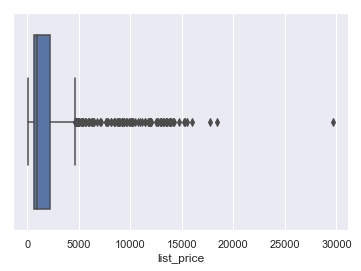

In [456]:
#Check if the list_price column has Outliers

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=order_master['list_price'])

plt.show()

In [457]:
#Check the Shape of the Dataframe
order_master.shape

(2149, 40)

In [458]:
#Remove the Ouliers
order_master = order_master.loc[(order_master['list_price'] <= 17000)]
order_master.shape

(2146, 40)

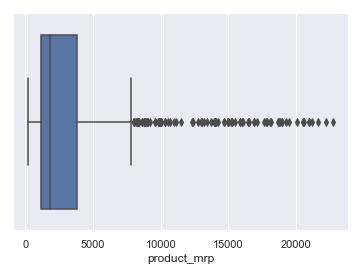

In [459]:
#Check if the product_mrp column has Outliers

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=order_master['product_mrp'])

plt.show()

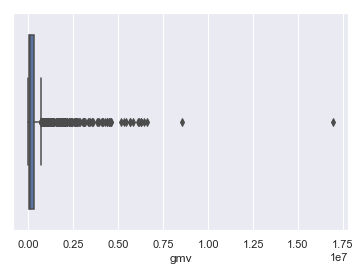

In [460]:
#Check if the product_mrp column has Outliers

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=order_master['gmv'])

plt.show()

In [461]:
order_master = order_master.drop(['Total Investment'], axis=1)
order_master.columns

Index(['week_number_final', 'product_analytic_sub_category',
       'product_analytic_vertical', 'gmv', 'units', 'product_mrp',
       'holiday_flag', 'pay_date_flag', 'list_price', 'discount',
       'Delivery_time_late', 'Delivery_time_on_time',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates',
       'SEM', 'Radio', 'Other', 'Max Temp', 'Min Temp', 'Total Rain',
       'Total Snow', 'Total Precip', 'NPS', 'Stock Index', 'TV_adstock',
       'digital_adstock', 'sponsor_adstock', 'content_adstock',
       'online_marketing_adstock', 'affiliates_adstock', 'sem_adstock',
       'radio_adstock', 'other_adstock'],
      dtype='object')

In [462]:
#Taking a Backup of Data for EDA
order_master_eda = order_master

In [463]:
#Check the Shape of the Dataframe
order_master.shape

(2146, 39)

In [464]:
#Check the Dataframe
order_master.head()

week_number_final product_analytic_sub_category product_analytic_vertical  \
0                  0               CameraAccessory                Binoculars   
1                  0               CameraAccessory           CameraAccessory   
2                  0               CameraAccessory                 CameraBag   
3                  0               CameraAccessory             CameraBattery   
4                  0               CameraAccessory      CameraBatteryCharger   

    gmv  units  product_mrp  holiday_flag  pay_date_flag  list_price  \
0   949      1       1500.0             0              0       949.0   
1   153      1        220.0             0              0       153.0   
2  5050      2       4175.0             0              0      2525.0   
3   858      4        319.5             0              0       214.5   
4   205      1        270.0             0              0       205.0   

   discount      ...        Stock Index     TV_adstock  digital_adstock  \
0     36.73      ...               1177  430660.407924     5.066027e+06   
1     30.45      ...               1177  645990.611887     7.599041e+06   
2     50.43      ...               1177  753655.713868     8.865548e+06   
3     31.35      ...               1177  807488.264858     9.498801e+06   
4     24.07      ...               1177  834404.540354     9.815428e+06   

   sponsor_adstock  content_adstock  online_marketing_adstock  \
0     1.482854e+07      1865.795074              2.654555e+06   
1     2.224281e+07      2798.692610              3.981833e+06   
2     2.594994e+07      3265.141379              4.645472e+06   
3     2.780351e+07      3498.365763              4.977291e+06   
4     2.873030e+07      3614.977955              5.143201e+06   

   affiliates_adstock   sem_adstock  radio_adstock  other_adstock  
0        1.094508e+06  1.004739e+07            0.0            0.0  
1        1.641762e+06  1.507109e+07            0.0            0.0  
2        1.915389e+06  1.758294e+07            0.0            0.0  
3        2.052202e+06  1.883887e+07            0.0            0.0  
4        2.120609e+06  1.946683e+07            0.0            0.0  

[5 rows x 39 columns]

### Step 26 : Creating 3 Different Dataframes for Subcategories

#### Step 26a. Camera Accessory

In [465]:
#Filter the Subcategories
order_master_camera = order_master[(order_master['product_analytic_sub_category']=='CameraAccessory')]
order_master_camera.shape

(958, 39)

In [466]:
#Check the Dataframe
order_master_camera.head()

week_number_final product_analytic_sub_category product_analytic_vertical  \
0                  0               CameraAccessory                Binoculars   
1                  0               CameraAccessory           CameraAccessory   
2                  0               CameraAccessory                 CameraBag   
3                  0               CameraAccessory             CameraBattery   
4                  0               CameraAccessory      CameraBatteryCharger   

    gmv  units  product_mrp  holiday_flag  pay_date_flag  list_price  \
0   949      1       1500.0             0              0       949.0   
1   153      1        220.0             0              0       153.0   
2  5050      2       4175.0             0              0      2525.0   
3   858      4        319.5             0              0       214.5   
4   205      1        270.0             0              0       205.0   

   discount      ...        Stock Index     TV_adstock  digital_adstock  \
0     36.73      ...               1177  430660.407924     5.066027e+06   
1     30.45      ...               1177  645990.611887     7.599041e+06   
2     50.43      ...               1177  753655.713868     8.865548e+06   
3     31.35      ...               1177  807488.264858     9.498801e+06   
4     24.07      ...               1177  834404.540354     9.815428e+06   

   sponsor_adstock  content_adstock  online_marketing_adstock  \
0     1.482854e+07      1865.795074              2.654555e+06   
1     2.224281e+07      2798.692610              3.981833e+06   
2     2.594994e+07      3265.141379              4.645472e+06   
3     2.780351e+07      3498.365763              4.977291e+06   
4     2.873030e+07      3614.977955              5.143201e+06   

   affiliates_adstock   sem_adstock  radio_adstock  other_adstock  
0        1.094508e+06  1.004739e+07            0.0            0.0  
1        1.641762e+06  1.507109e+07            0.0            0.0  
2        1.915389e+06  1.758294e+07            0.0            0.0  
3        2.052202e+06  1.883887e+07            0.0            0.0  
4        2.120609e+06  1.946683e+07            0.0            0.0  

[5 rows x 39 columns]

In [467]:
#Drop the Columns which are not needed for Modelling
order_master_camera = order_master_camera.drop(['week_number_final','product_analytic_sub_category'], axis = 1)

#### Creating dummies for Vertical

In [468]:
#Adding Dummies to the Verticals
Vertical = pd.get_dummies(order_master_camera['product_analytic_vertical'], prefix='vertical', drop_first = True)
Vertical = Vertical.astype(float)
order_master_camera= pd.concat([order_master_camera, Vertical], axis = 1)
order_master_camera = order_master_camera.drop(['product_analytic_vertical'], axis = 1)
order_master_camera.columns

Index(['gmv', 'units', 'product_mrp', 'holiday_flag', 'pay_date_flag',
       'list_price', 'discount', 'Delivery_time_late', 'Delivery_time_on_time',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates',
       'SEM', 'Radio', 'Other', 'Max Temp', 'Min Temp', 'Total Rain',
       'Total Snow', 'Total Precip', 'NPS', 'Stock Index', 'TV_adstock',
       'digital_adstock', 'sponsor_adstock', 'content_adstock',
       'online_marketing_adstock', 'affiliates_adstock', 'sem_adstock',
       'radio_adstock', 'other_adstock', 'vertical_CameraAccessory',
       'vertical_CameraBag', 'vertical_CameraBattery',
       'vertical_CameraBatteryCharger', 'vertical_CameraBatteryGrip',
       'vertical_CameraEyeCup', 'vertical_CameraFilmRolls',
       'vertical_CameraHousing', 'vertical_CameraMicrophone',
       'vertical_CameraMount', 'vertical_CameraRemoteControl',
       'vertical_CameraTripod', 'vertic

In [469]:
order_master_camera.shape

(958, 58)

#### Step 26b. Home Audio

In [470]:
#Filter the Subcategories - Home Audio
order_master_home_audio = order_master[(order_master['product_analytic_sub_category']=='HomeAudio')]
order_master_home_audio.shape

(464, 39)

In [471]:
#Drop the Columns which are not needed for Modelling
order_master_home_audio = order_master_home_audio.drop(['week_number_final','product_analytic_sub_category'], axis = 1)
order_master_home_audio.shape

(464, 37)

In [472]:
#Adding Dummies to the Verticals
Vertical = pd.get_dummies(order_master_home_audio['product_analytic_vertical'], prefix='vertical', drop_first = True)
Vertical = Vertical.astype(float)
order_master_home_audio= pd.concat([order_master_home_audio, Vertical], axis = 1)
order_master_home_audio = order_master_home_audio.drop(['product_analytic_vertical'], axis = 1)
order_master_home_audio.columns

Index(['gmv', 'units', 'product_mrp', 'holiday_flag', 'pay_date_flag',
       'list_price', 'discount', 'Delivery_time_late', 'Delivery_time_on_time',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates',
       'SEM', 'Radio', 'Other', 'Max Temp', 'Min Temp', 'Total Rain',
       'Total Snow', 'Total Precip', 'NPS', 'Stock Index', 'TV_adstock',
       'digital_adstock', 'sponsor_adstock', 'content_adstock',
       'online_marketing_adstock', 'affiliates_adstock', 'sem_adstock',
       'radio_adstock', 'other_adstock', 'vertical_DJController',
       'vertical_Dock', 'vertical_DockingStation', 'vertical_FMRadio',
       'vertical_HiFiSystem', 'vertical_HomeAudioSpeaker',
       'vertical_KaraokePlayer', 'vertical_SlingBox', 'vertical_SoundMixer',
       'vertical_VoiceRecorder'],
      dtype='object')

In [473]:
order_master_home_audio.shape

(464, 46)

#### Step 26c. Gaming Accessory

In [474]:
#Filter the Subcategories - GamingAccessory
order_master_gaming = order_master[(order_master['product_analytic_sub_category']=='GamingAccessory')]
order_master_gaming.shape

(724, 39)

In [475]:
#Drop the Columns which are not needed for Modelling
order_master_gaming = order_master_gaming.drop(['week_number_final','product_analytic_sub_category'], axis = 1)
order_master_gaming.shape

(724, 37)

In [476]:
#Adding Dummies to the Verticals
Vertical = pd.get_dummies(order_master_gaming['product_analytic_vertical'], prefix='vertical', drop_first = True)
Vertical = Vertical.astype(float)
order_master_gaming= pd.concat([order_master_gaming, Vertical], axis = 1)
order_master_gaming.drop(['product_analytic_vertical'], axis = 1, inplace = True)
order_master_gaming.columns

Index(['gmv', 'units', 'product_mrp', 'holiday_flag', 'pay_date_flag',
       'list_price', 'discount', 'Delivery_time_late', 'Delivery_time_on_time',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates',
       'SEM', 'Radio', 'Other', 'Max Temp', 'Min Temp', 'Total Rain',
       'Total Snow', 'Total Precip', 'NPS', 'Stock Index', 'TV_adstock',
       'digital_adstock', 'sponsor_adstock', 'content_adstock',
       'online_marketing_adstock', 'affiliates_adstock', 'sem_adstock',
       'radio_adstock', 'other_adstock', 'vertical_GameControlMount',
       'vertical_GamePad', 'vertical_GamingAccessoryKit',
       'vertical_GamingAdapter', 'vertical_GamingChargingStation',
       'vertical_GamingHeadset', 'vertical_GamingKeyboard',
       'vertical_GamingMemoryCard', 'vertical_GamingMouse',
       'vertical_GamingMousePad', 'vertical_GamingSpeaker',
       'vertical_JoystickGamingWheel', 'ver

In [477]:
order_master_gaming.shape

(724, 50)

### Step 27 : Dropping the Highly Co-related Variables

#### Step 27a. For Camera Accessory

In [478]:
import seaborn as sns
%matplotlib inline
corr = order_master_camera.corr().abs()

In [479]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [480]:
import numpy as np

# Create correlation matrix
corr_matrix = corr

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
order_master_camera = order_master_camera.drop(to_drop, axis=1)

In [481]:
# Check the Shape of the Camera Dataframe
order_master_camera.shape

(958, 41)

In [482]:
#Check the Column Names
order_master_camera.columns

Index(['gmv', 'units', 'product_mrp', 'holiday_flag', 'pay_date_flag',
       'discount', 'Delivery_time_late', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'TV', 'Digital', 'Sponsorship',
       'Online marketing', 'Radio', 'Max Temp', 'Total Rain', 'Total Snow',
       'NPS', 'Stock Index', 'vertical_CameraAccessory', 'vertical_CameraBag',
       'vertical_CameraBattery', 'vertical_CameraBatteryCharger',
       'vertical_CameraBatteryGrip', 'vertical_CameraEyeCup',
       'vertical_CameraFilmRolls', 'vertical_CameraHousing',
       'vertical_CameraMicrophone', 'vertical_CameraMount',
       'vertical_CameraRemoteControl', 'vertical_CameraTripod',
       'vertical_ExtensionTube', 'vertical_Filter', 'vertical_Flash',
       'vertical_FlashShoeAdapter', 'vertical_Lens',
       'vertical_ReflectorUmbrella', 'vertical_Softbox', 'vertical_Strap',
       'vertical_Teleconverter', 'vertical_Telescope'],
      dtype='object')

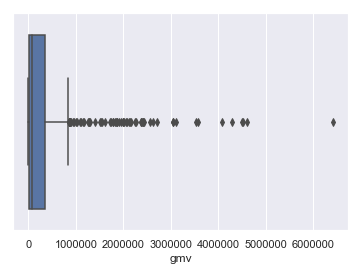

In [496]:
sns.boxplot(x=order_master_camera['gmv'])

plt.show()

In [497]:
#Remove the Ouliers
order_master_camera = order_master_camera.loc[(order_master_camera['gmv'] <= 5000000)]
order_master_camera.shape

(957, 41)

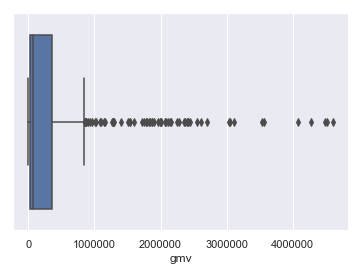

In [498]:
sns.boxplot(x=order_master_camera['gmv'])

plt.show()

#### Step 27b. For HomeAudio

In [483]:
#Check the Co-relations
corr = order_master_home_audio.corr().abs()

In [484]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [485]:
import numpy as np

# Create correlation matrix
corr_matrix = corr

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
order_master_home_audio = order_master_home_audio.drop(to_drop, axis=1)

In [486]:
# Check the Shape of the Camera Dataframe
order_master_home_audio.shape

(464, 28)

In [487]:
#Check the Column Names
order_master_home_audio.columns

Index(['gmv', 'product_mrp', 'holiday_flag', 'pay_date_flag', 'discount',
       'Delivery_time_late', 'Delivery_time_very_late', 'payment_type_Prepaid',
       'TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp',
       'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_DJController', 'vertical_Dock', 'vertical_DockingStation',
       'vertical_FMRadio', 'vertical_HiFiSystem', 'vertical_HomeAudioSpeaker',
       'vertical_KaraokePlayer', 'vertical_SlingBox', 'vertical_SoundMixer',
       'vertical_VoiceRecorder'],
      dtype='object')

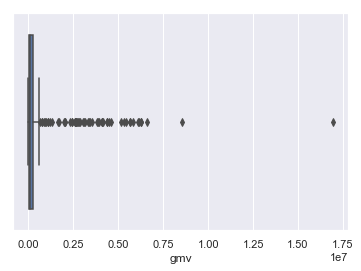

In [488]:
sns.boxplot(x=order_master_home_audio['gmv'])

plt.show()

In [494]:
#Remove the Ouliers
order_master_home_audio = order_master_home_audio.loc[(order_master_home_audio['gmv'] <= 7500000)]
order_master_home_audio.shape

(462, 28)

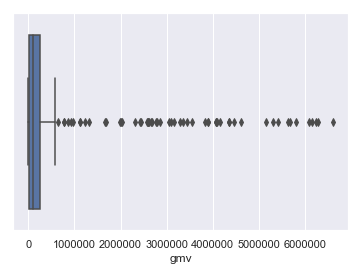

In [495]:
sns.boxplot(x=order_master_home_audio['gmv'])

plt.show()

#### Step 27c. For GamingAccessory

In [499]:
#Check the Co-relations
corr = order_master_gaming.corr().abs()

In [500]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [501]:
import numpy as np

# Create correlation matrix
corr_matrix = corr

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
order_master_gaming = order_master_gaming.drop(to_drop, axis=1)

In [502]:
# Check the Shape of the Camera Dataframe
order_master_gaming.shape

(724, 33)

In [503]:
#Check the Column Names
order_master_gaming.columns

Index(['gmv', 'units', 'product_mrp', 'holiday_flag', 'pay_date_flag',
       'list_price', 'discount', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'TV', 'Digital', 'Sponsorship',
       'Online marketing', 'Radio', 'Max Temp', 'Total Rain', 'Total Snow',
       'NPS', 'Stock Index', 'vertical_GameControlMount', 'vertical_GamePad',
       'vertical_GamingAccessoryKit', 'vertical_GamingAdapter',
       'vertical_GamingChargingStation', 'vertical_GamingHeadset',
       'vertical_GamingKeyboard', 'vertical_GamingMemoryCard',
       'vertical_GamingMouse', 'vertical_GamingMousePad',
       'vertical_GamingSpeaker', 'vertical_JoystickGamingWheel',
       'vertical_MotionController', 'vertical_TVOutCableAccessory'],
      dtype='object')

In [504]:
sns.boxplot(x=order_master_gaming['gmv'])
plt.show()

### Step 28 : Apply Linear Model for Gaming Accessory

In [505]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict

In [506]:
game = order_master_gaming

In [507]:
game.head()

gmv  units   product_mrp  holiday_flag  pay_date_flag   list_price  \
8   17524     15   1987.266667             0              1  1168.266667   
9    1299      2   1049.000000             0              0   649.500000   
10  11387      4  15847.000000             0              0  2846.750000   
11    799      1    900.000000             0              0   799.000000   
12   3333      4    971.000000             0              1   833.250000   

    discount  Delivery_time_very_late  payment_type_Prepaid             TV  \
8      32.65                      0.0                  15.0  430660.407924   
9      44.14                      0.0                   2.0  430660.407924   
10     40.22                      0.0                   4.0  430660.407924   
11     11.22                      0.0                   1.0  430660.407924   
12     17.74                      0.0                   4.0  430660.407924   

                ...               vertical_GamingChargingStation  \
8               ...                                          0.0   
9               ...                                          0.0   
10              ...                                          0.0   
11              ...                                          0.0   
12              ...                                          0.0   

    vertical_GamingHeadset  vertical_GamingKeyboard  \
8                      0.0                      0.0   
9                      0.0                      0.0   
10                     1.0                      0.0   
11                     0.0                      1.0   
12                     0.0                      0.0   

    vertical_GamingMemoryCard  vertical_GamingMouse  vertical_GamingMousePad  \
8                         0.0                   0.0                      0.0   
9                         0.0                   0.0                      0.0   
10                        0.0                   0.0                      0.0   
11                        0.0                   0.0                      0.0   
12                        0.0                   1.0                      0.0   

    vertical_GamingSpeaker  vertical_JoystickGamingWheel  \
8                      0.0                           0.0   
9                      0.0                           0.0   
10                     0.0                           0.0   
11                     0.0                           0.0   
12                     0.0                           0.0   

    vertical_MotionController  vertical_TVOutCableAccessory  
8                         0.0                           0.0  
9                         0.0                           0.0  
10                        0.0                           0.0  
11                        0.0                           0.0  
12                        0.0                           0.0  

[5 rows x 33 columns]

#### Test Train Split

In [508]:
np.random.seed(0)
df_train, df_test = train_test_split(game, train_size = 0.7, test_size = 0.3, random_state = 100)

#### MinMax Scaling of Numerical Variables

In [509]:
scaler = MinMaxScaler()

In [510]:
y_train_game = df_train.pop('gmv')
X_train_game = df_train

In [511]:
X_train_game.columns

Index(['units', 'product_mrp', 'holiday_flag', 'pay_date_flag', 'list_price',
       'discount', 'Delivery_time_very_late', 'payment_type_Prepaid', 'TV',
       'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp',
       'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_GameControlMount', 'vertical_GamePad',
       'vertical_GamingAccessoryKit', 'vertical_GamingAdapter',
       'vertical_GamingChargingStation', 'vertical_GamingHeadset',
       'vertical_GamingKeyboard', 'vertical_GamingMemoryCard',
       'vertical_GamingMouse', 'vertical_GamingMousePad',
       'vertical_GamingSpeaker', 'vertical_JoystickGamingWheel',
       'vertical_MotionController', 'vertical_TVOutCableAccessory'],
      dtype='object')

In [512]:
cols = ['units', 'product_mrp','list_price','Delivery_time_very_late','payment_type_Prepaid','discount', 'TV', 'Digital', 'Sponsorship', 'Online marketing','Radio', 'Max Temp', 'Total Rain', 'Total Snow', 'NPS', 'Stock Index']
X_train_game[cols] = scaler.fit_transform(X_train_game[cols])

#### VIF Check

In [513]:
X_train_game = sm.add_constant(X_train_game)
vif = pd.DataFrame()
vif['Features'] = X_train_game.columns
vif['VIF'] = [variance_inflation_factor(X_train_game.values, i) for i in range(X_train_game.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                            const  158.73
12                Online marketing   19.39
11                     Sponsorship   14.79
18                     Stock Index    9.67
17                             NPS    7.60
5                       list_price    7.59
14                        Max Temp    7.45
13                           Radio    6.37
24          vertical_GamingHeadset    5.85
1                            units    5.24
2                      product_mrp    5.05
10                         Digital    4.87
20                vertical_GamePad    4.72
31       vertical_MotionController    4.52
6                         discount    4.25
27            vertical_GamingMouse    3.91
30    vertical_JoystickGamingWheel    3.61
32    vertical_TVOutCableAccessory    3.49
21     vertical_GamingAccessoryKit    3.40
26       vertical_GamingMemoryCard    3.40
22          vertical_GamingAdapter    3.39
9                               TV    3.30
25         vertical_GamingKeyboard    3.30
28         vertical_GamingMousePad    3.27
29          vertical_GamingSpeaker    3.16
8             payment_type_Prepaid    3.14
7          Delivery_time_very_late    2.68
23  vertical_GamingChargingStation    1.88
16                      Total Snow    1.68
3                     holiday_flag    1.52
15                      Total Rain    1.21
4                    pay_date_flag    1.13
19       vertical_GameControlMount    1.09

#### Dropping variables with high VIF

In [514]:
#Dropping Online Marketing as the VIF score is high
X_train_game = X_train_game.drop('Online marketing', 1,)

In [515]:
X_train_game = sm.add_constant(X_train_game)
vif = pd.DataFrame()
vif['Features'] = X_train_game.columns
vif['VIF'] = [variance_inflation_factor(X_train_game.values, i) for i in range(X_train_game.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                            const  106.69
11                     Sponsorship   10.05
5                       list_price    7.51
23          vertical_GamingHeadset    5.85
1                            units    5.24
2                      product_mrp    5.00
16                             NPS    4.85
19                vertical_GamePad    4.72
30       vertical_MotionController    4.51
6                         discount    4.20
26            vertical_GamingMouse    3.91
10                         Digital    3.87
29    vertical_JoystickGamingWheel    3.61
31    vertical_TVOutCableAccessory    3.48
20     vertical_GamingAccessoryKit    3.39
25       vertical_GamingMemoryCard    3.39
21          vertical_GamingAdapter    3.37
24         vertical_GamingKeyboard    3.28
27         vertical_GamingMousePad    3.27
13                        Max Temp    3.21
28          vertical_GamingSpeaker    3.15
8             payment_type_Prepaid    3.13
9                               TV    2.80
7          Delivery_time_very_late    2.67
12                           Radio    2.41
17                     Stock Index    2.15
22  vertical_GamingChargingStation    1.88
15                      Total Snow    1.68
3                     holiday_flag    1.25
14                      Total Rain    1.19
4                    pay_date_flag    1.13
18       vertical_GameControlMount    1.09

In [516]:
#Dropping Sponsorship
X_train_game = X_train_game.drop('Sponsorship', 1,)

In [517]:
X_train_game = sm.add_constant(X_train_game)
vif = pd.DataFrame()
vif['Features'] = X_train_game.columns
vif['VIF'] = [variance_inflation_factor(X_train_game.values, i) for i in range(X_train_game.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                            const  88.11
5                       list_price   7.50
22          vertical_GamingHeadset   5.85
1                            units   5.21
2                      product_mrp   4.99
18                vertical_GamePad   4.72
29       vertical_MotionController   4.51
6                         discount   4.15
25            vertical_GamingMouse   3.91
28    vertical_JoystickGamingWheel   3.61
30    vertical_TVOutCableAccessory   3.48
24       vertical_GamingMemoryCard   3.39
19     vertical_GamingAccessoryKit   3.39
20          vertical_GamingAdapter   3.36
23         vertical_GamingKeyboard   3.28
26         vertical_GamingMousePad   3.27
27          vertical_GamingSpeaker   3.14
8             payment_type_Prepaid   3.00
7          Delivery_time_very_late   2.62
12                        Max Temp   2.61
9                               TV   2.51
10                         Digital   2.03
15                             NPS   2.01
16                     Stock Index   1.88
21  vertical_GamingChargingStation   1.87
14                      Total Snow   1.66
11                           Radio   1.50
3                     holiday_flag   1.21
13                      Total Rain   1.19
4                    pay_date_flag   1.13
17       vertical_GameControlMount   1.09

In [518]:
#Dropping List Price variable
X_train_game = X_train_game.drop('list_price', 1,)

In [519]:
X_train_game = sm.add_constant(X_train_game)
vif = pd.DataFrame()
vif['Features'] = X_train_game.columns
vif['VIF'] = [variance_inflation_factor(X_train_game.values, i) for i in range(X_train_game.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                            const  85.17
21          vertical_GamingHeadset   5.68
1                            units   5.13
17                vertical_GamePad   4.71
24            vertical_GamingMouse   3.90
28       vertical_MotionController   3.84
5                         discount   3.57
29    vertical_TVOutCableAccessory   3.48
27    vertical_JoystickGamingWheel   3.39
18     vertical_GamingAccessoryKit   3.38
23       vertical_GamingMemoryCard   3.37
19          vertical_GamingAdapter   3.34
25         vertical_GamingMousePad   3.26
22         vertical_GamingKeyboard   3.23
26          vertical_GamingSpeaker   3.14
7             payment_type_Prepaid   3.00
6          Delivery_time_very_late   2.62
11                        Max Temp   2.61
8                               TV   2.49
9                          Digital   2.03
2                      product_mrp   2.01
14                             NPS   1.97
15                     Stock Index   1.87
20  vertical_GamingChargingStation   1.86
13                      Total Snow   1.66
10                           Radio   1.50
3                     holiday_flag   1.20
12                      Total Rain   1.19
4                    pay_date_flag   1.13
16       vertical_GameControlMount   1.09

In [520]:
#Dropping Gaming Headset vertical
X_train_game = X_train_game.drop('vertical_GamingHeadset', 1,)

In [521]:
X_train_game = sm.add_constant(X_train_game)
vif = pd.DataFrame()
vif['Features'] = X_train_game.columns
vif['VIF'] = [variance_inflation_factor(X_train_game.values, i) for i in range(X_train_game.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                            const  80.16
1                            units   4.73
7             payment_type_Prepaid   3.00
5                         discount   2.96
27       vertical_MotionController   2.72
6          Delivery_time_very_late   2.60
11                        Max Temp   2.60
24         vertical_GamingMousePad   2.55
17                vertical_GamePad   2.55
8                               TV   2.48
26    vertical_JoystickGamingWheel   2.38
23            vertical_GamingMouse   2.37
21         vertical_GamingKeyboard   2.24
28    vertical_TVOutCableAccessory   2.05
9                          Digital   2.01
18     vertical_GamingAccessoryKit   1.98
22       vertical_GamingMemoryCard   1.95
14                             NPS   1.95
19          vertical_GamingAdapter   1.91
2                      product_mrp   1.88
15                     Stock Index   1.83
25          vertical_GamingSpeaker   1.74
13                      Total Snow   1.66
10                           Radio   1.47
20  vertical_GamingChargingStation   1.39
12                      Total Rain   1.19
3                     holiday_flag   1.18
4                    pay_date_flag   1.12
16       vertical_GameControlMount   1.04

#### All the features have VIF less than 5 

In [522]:
X_train_game = X_train_game.drop(['const'], axis=1)
X_train_game.columns

Index(['units', 'product_mrp', 'holiday_flag', 'pay_date_flag', 'discount',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'TV', 'Digital',
       'Radio', 'Max Temp', 'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_GameControlMount', 'vertical_GamePad',
       'vertical_GamingAccessoryKit', 'vertical_GamingAdapter',
       'vertical_GamingChargingStation', 'vertical_GamingKeyboard',
       'vertical_GamingMemoryCard', 'vertical_GamingMouse',
       'vertical_GamingMousePad', 'vertical_GamingSpeaker',
       'vertical_JoystickGamingWheel', 'vertical_MotionController',
       'vertical_TVOutCableAccessory'],
      dtype='object')

In [523]:
X_train_game.shape

(506, 28)

#### Performing RFE and extracting top 20 features

In [524]:
from sklearn.feature_selection import RFE
mlr= LinearRegression()
mlr.fit(X_train_game,y_train_game)
rfe = RFE(mlr, 20)
rfe = rfe.fit(X_train_game, y_train_game)

In [525]:
list(zip(X_train_game.columns,rfe.support_,rfe.ranking_))

[('units', True, 1),
 ('product_mrp', True, 1),
 ('holiday_flag', False, 5),
 ('pay_date_flag', False, 9),
 ('discount', True, 1),
 ('Delivery_time_very_late', True, 1),
 ('payment_type_Prepaid', True, 1),
 ('TV', False, 4),
 ('Digital', True, 1),
 ('Radio', True, 1),
 ('Max Temp', True, 1),
 ('Total Rain', False, 6),
 ('Total Snow', False, 8),
 ('NPS', True, 1),
 ('Stock Index', False, 2),
 ('vertical_GameControlMount', False, 3),
 ('vertical_GamePad', True, 1),
 ('vertical_GamingAccessoryKit', True, 1),
 ('vertical_GamingAdapter', True, 1),
 ('vertical_GamingChargingStation', True, 1),
 ('vertical_GamingKeyboard', True, 1),
 ('vertical_GamingMemoryCard', True, 1),
 ('vertical_GamingMouse', True, 1),
 ('vertical_GamingMousePad', True, 1),
 ('vertical_GamingSpeaker', True, 1),
 ('vertical_JoystickGamingWheel', True, 1),
 ('vertical_MotionController', False, 7),
 ('vertical_TVOutCableAccessory', True, 1)]

In [526]:
X_train_game.columns[rfe.support_]

Index(['units', 'product_mrp', 'discount', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'Digital', 'Radio', 'Max Temp', 'NPS',
       'vertical_GamePad', 'vertical_GamingAccessoryKit',
       'vertical_GamingAdapter', 'vertical_GamingChargingStation',
       'vertical_GamingKeyboard', 'vertical_GamingMemoryCard',
       'vertical_GamingMouse', 'vertical_GamingMousePad',
       'vertical_GamingSpeaker', 'vertical_JoystickGamingWheel',
       'vertical_TVOutCableAccessory'],
      dtype='object')

In [527]:
X_train_game_rfe = X_train_game[X_train_game.columns[rfe.support_]]
X_train_game_rfe.head()

units  product_mrp  discount  Delivery_time_very_late  \
1220  0.326501     0.085311  0.337883                 0.129032   
2138  0.007911     0.393794  0.384483                 0.000000   
1815  0.000000     0.038155  0.499816                 0.000000   
311   0.113269     0.024654  0.453953                 0.000000   
1716  0.103560     0.065761  0.460839                 0.064516   

      payment_type_Prepaid   Digital     Radio  Max Temp       NPS  \
1220              0.153540  0.119727  0.000000  0.475059  0.380340   
2138              0.004773  0.055941  0.000000  1.000000  0.392483   
1815              0.000000  0.025809  0.407407  0.572447  0.186581   
311               0.070008  0.051718  0.000000  0.821853  0.162106   
1716              0.116150  0.034183  0.000000  0.503563  0.476577   

      vertical_GamePad  vertical_GamingAccessoryKit  vertical_GamingAdapter  \
1220               1.0                          0.0                     0.0   
2138               0.0                          0.0                     0.0   
1815               0.0                          0.0                     0.0   
311                0.0                          0.0                     0.0   
1716               0.0                          1.0                     0.0   

      vertical_GamingChargingStation  vertical_GamingKeyboard  \
1220                             0.0                      0.0   
2138                             0.0                      0.0   
1815                             0.0                      0.0   
311                              0.0                      0.0   
1716                             0.0                      0.0   

      vertical_GamingMemoryCard  vertical_GamingMouse  \
1220                        0.0                   0.0   
2138                        0.0                   0.0   
1815                        0.0                   0.0   
311                         0.0                   0.0   
1716                        0.0                   0.0   

      vertical_GamingMousePad  vertical_GamingSpeaker  \
1220                      0.0                     0.0   
2138                      0.0                     0.0   
1815                      0.0                     0.0   
311                       0.0                     0.0   
1716                      0.0                     0.0   

      vertical_JoystickGamingWheel  vertical_TVOutCableAccessory  
1220                           0.0                           0.0  
2138                           0.0                           0.0  
1815                           0.0                           0.0  
311                            0.0                           1.0  
1716                           0.0                           0.0

In [528]:
y_test_game = df_test.pop('gmv')
X_test_game = df_test

In [529]:
#MinMax scaling for test dataset
cols = ['units', 'product_mrp','list_price','Delivery_time_very_late','payment_type_Prepaid','discount', 'TV', 'Digital', 'Sponsorship', 'Online marketing','Radio', 'Max Temp', 'Total Rain', 'Total Snow', 'NPS', 'Stock Index']
X_test_game[cols] = scaler.transform(X_test_game[cols])

In [530]:
X_test_game.shape

(218, 32)

In [531]:
cols = X_train_game_rfe.columns
cols

Index(['units', 'product_mrp', 'discount', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'Digital', 'Radio', 'Max Temp', 'NPS',
       'vertical_GamePad', 'vertical_GamingAccessoryKit',
       'vertical_GamingAdapter', 'vertical_GamingChargingStation',
       'vertical_GamingKeyboard', 'vertical_GamingMemoryCard',
       'vertical_GamingMouse', 'vertical_GamingMousePad',
       'vertical_GamingSpeaker', 'vertical_JoystickGamingWheel',
       'vertical_TVOutCableAccessory'],
      dtype='object')

In [532]:
# Restricting columns similar to Train set 
X_test_game = X_test_game[cols]

In [533]:
X_test_game.shape

(218, 20)

#### Performing Linear Regression

In [534]:
import statsmodels.api as sm

# Add a constant
X_train_game_lm = sm.add_constant(X_train_game_rfe[['discount']])

# Create a first fitted model
lr = sm.OLS(y_train_game, X_train_game_lm).fit()

In [535]:
lr.params

const       217475.006190
discount      8034.496809
dtype: float64

In [536]:
# Build a linear model
X_train_game_lm = sm.add_constant(X_train_game_rfe)

In [537]:
lr = sm.OLS(y_train_game, X_train_game_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     301.2
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          1.54e-258
Time:                        21:26:13   Log-Likelihood:                -6529.1
No. Observations:                 506   AIC:                         1.310e+04
Df Residuals:                     485   BIC:                         1.319e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Dropping all those features with p-value greater than 0.05

In [538]:
#Dropping Radio variable
X_train_game_rfe = X_train_game_rfe.drop(['Radio'], axis=1)

In [539]:
# Build a linear model
X_train_game_lm1 = sm.add_constant(X_train_game_rfe)

In [540]:
lr = sm.OLS(y_train_game, X_train_game_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     316.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          2.76e-259
Time:                        21:26:43   Log-Likelihood:                -6530.4
No. Observations:                 506   AIC:                         1.310e+04
Df Residuals:                     486   BIC:                         1.319e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [541]:
X_train_game_rfe = X_train_game_rfe.drop(['vertical_GamingChargingStation'], axis=1)
# Build a linear model
X_train_game_lm2 = sm.add_constant(X_train_game_rfe)
lr1 = sm.OLS(y_train_game, X_train_game_lm2).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     332.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          6.76e-260
Time:                        21:26:47   Log-Likelihood:                -6531.9
No. Observations:                 506   AIC:                         1.310e+04
Df Residuals:                     487   BIC:                         1.318e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [542]:
X_train_game_rfe = X_train_game_rfe.drop(['vertical_GamingMousePad'], axis=1)
# Build a linear model
X_train_game_lm3 = sm.add_constant(X_train_game_rfe)
lr2 = sm.OLS(y_train_game, X_train_game_lm3).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     350.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          9.64e-261
Time:                        21:26:51   Log-Likelihood:                -6533.0
No. Observations:                 506   AIC:                         1.310e+04
Df Residuals:                     488   BIC:                         1.318e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [543]:
y_train_game_1 = lr2.predict(X_train_game_lm3)

#### Checking Error term distribution

In [544]:
fig = plt.figure()
sns.distplot((y_train_game - y_train_game_1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Text(0.5,0,'Errors')

In [545]:
cols = X_train_game_lm3.columns
cols

Index(['const', 'units', 'product_mrp', 'discount', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'Digital', 'Max Temp', 'NPS',
       'vertical_GamePad', 'vertical_GamingAccessoryKit',
       'vertical_GamingAdapter', 'vertical_GamingKeyboard',
       'vertical_GamingMemoryCard', 'vertical_GamingMouse',
       'vertical_GamingSpeaker', 'vertical_JoystickGamingWheel',
       'vertical_TVOutCableAccessory'],
      dtype='object')

In [546]:
X_test_game.columns

Index(['units', 'product_mrp', 'discount', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'Digital', 'Radio', 'Max Temp', 'NPS',
       'vertical_GamePad', 'vertical_GamingAccessoryKit',
       'vertical_GamingAdapter', 'vertical_GamingChargingStation',
       'vertical_GamingKeyboard', 'vertical_GamingMemoryCard',
       'vertical_GamingMouse', 'vertical_GamingMousePad',
       'vertical_GamingSpeaker', 'vertical_JoystickGamingWheel',
       'vertical_TVOutCableAccessory'],
      dtype='object')

In [547]:
X_test_game_1 = X_test_game

In [548]:
X_test_game_1 = X_test_game_1.drop(['vertical_GamingMousePad','vertical_GamingChargingStation','Radio'], axis=1)
X_test_game_1.columns

Index(['units', 'product_mrp', 'discount', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'Digital', 'Max Temp', 'NPS',
       'vertical_GamePad', 'vertical_GamingAccessoryKit',
       'vertical_GamingAdapter', 'vertical_GamingKeyboard',
       'vertical_GamingMemoryCard', 'vertical_GamingMouse',
       'vertical_GamingSpeaker', 'vertical_JoystickGamingWheel',
       'vertical_TVOutCableAccessory'],
      dtype='object')

In [549]:
X_test_game_2 = sm.add_constant(X_test_game_1)
y_pred_game_2 = lr2.predict(X_test_game_2)
from sklearn.metrics import r2_score 
r2_score(y_test_game, y_pred_game_2)

0.9230394395660113

#### Plot for Test actual and prediction

Text(0,0.5,'y_pred_game_2')

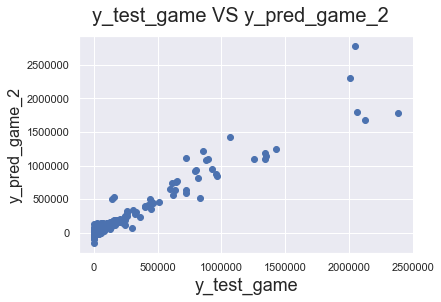

In [550]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test_game, y_pred_game_2)
fig.suptitle('y_test_game VS y_pred_game_2', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_game', fontsize = 18)                          # X-label
plt.ylabel('y_pred_game_2', fontsize = 16) 

In [551]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     350.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          9.64e-261
Time:                        21:28:05   Log-Likelihood:                -6533.0
No. Observations:                 506   AIC:                         1.310e+04
Df Residuals:                     488   BIC:                         1.318e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Cross Validation

In [552]:
mlr = LinearRegression()
model=mlr.fit(X_train_game_rfe,y_train_game)
kfold = KFold(n_splits=10)
results = cross_val_score(model,X_test_game,y_test_game, cv=kfold)
print("Results R2: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results R2: 0.89 (0.08) MSE


#### After performing cross validation achieved R2 is 0.89 and MSE is 0.08 for Gaming Accessory dataset

### Step 29 : Apply Linear Model for Home Audio

In [553]:
home = order_master_home_audio

In [554]:
home.head()

gmv  product_mrp  holiday_flag  pay_date_flag  discount  \
14   15729  3799.200000             0              1     21.05   
15    2988  2625.000000             0              0     33.59   
16   87628  4855.218750             0              1     39.24   
17    5699  7999.000000             0              0     28.75   
43  227398  3834.569444             0              0     19.50   

    Delivery_time_late  Delivery_time_very_late  payment_type_Prepaid  \
14                 0.0                      0.0                   5.0   
15                 1.0                      0.0                   2.0   
16                 6.0                      0.0                  31.0   
17                 0.0                      0.0                   1.0   
43                18.0                      0.0                  37.0   

               TV       Digital           ...            \
14  430660.407924  5.066027e+06           ...             
15  430660.407924  5.066027e+06           ...             
16  430660.407924  5.066027e+06           ...             
17  430660.407924  5.066027e+06           ...             
43  430660.407924  5.066027e+06           ...             

    vertical_DJController  vertical_Dock  vertical_DockingStation  \
14                    0.0            0.0                      0.0   
15                    0.0            0.0                      0.0   
16                    0.0            0.0                      0.0   
17                    0.0            0.0                      0.0   
43                    0.0            0.0                      0.0   

    vertical_FMRadio  vertical_HiFiSystem  vertical_HomeAudioSpeaker  \
14               0.0                  0.0                        0.0   
15               1.0                  0.0                        0.0   
16               0.0                  0.0                        1.0   
17               0.0                  0.0                        0.0   
43               0.0                  0.0                        0.0   

    vertical_KaraokePlayer  vertical_SlingBox  vertical_SoundMixer  \
14                     0.0                0.0                  0.0   
15                     0.0                0.0                  0.0   
16                     0.0                0.0                  0.0   
17                     0.0                0.0                  0.0   
43                     0.0                0.0                  0.0   

    vertical_VoiceRecorder  
14                     0.0  
15                     0.0  
16                     0.0  
17                     1.0  
43                     0.0  

[5 rows x 28 columns]

#### Test Train Split

In [555]:
np.random.seed(0)
df_train_home, df_test_home = train_test_split(home, train_size = 0.7, test_size = 0.3, random_state = 100)

#### MinMax Scaling of Numerical Variables

In [556]:
scaler = MinMaxScaler()

In [557]:
y_train_home = df_train_home.pop('gmv')
X_train_home = df_train_home

In [558]:
X_train_home.columns

Index(['product_mrp', 'holiday_flag', 'pay_date_flag', 'discount',
       'Delivery_time_late', 'Delivery_time_very_late', 'payment_type_Prepaid',
       'TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp',
       'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_DJController', 'vertical_Dock', 'vertical_DockingStation',
       'vertical_FMRadio', 'vertical_HiFiSystem', 'vertical_HomeAudioSpeaker',
       'vertical_KaraokePlayer', 'vertical_SlingBox', 'vertical_SoundMixer',
       'vertical_VoiceRecorder'],
      dtype='object')

In [559]:
cols = ['product_mrp','discount','Delivery_time_late','Delivery_time_very_late','payment_type_Prepaid','TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp','Total Rain', 'Total Snow', 'NPS', 'Stock Index']
X_train_home[cols] = scaler.fit_transform(X_train_home[cols])

#### VIF Check

In [560]:
X_train_home = sm.add_constant(X_train_home)
vif = pd.DataFrame()
vif['Features'] = X_train_home.columns
vif['VIF'] = [variance_inflation_factor(X_train_home.values, i) for i in range(X_train_home.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                       const  131.86
11           Online marketing   16.12
10                Sponsorship   14.01
17                Stock Index    9.22
1                 product_mrp    8.52
16                        NPS    7.75
18      vertical_DJController    6.54
13                   Max Temp    6.53
12                      Radio    5.48
9                     Digital    5.24
5          Delivery_time_late    4.39
23  vertical_HomeAudioSpeaker    3.68
7        payment_type_Prepaid    3.55
19              vertical_Dock    3.27
8                          TV    3.26
27     vertical_VoiceRecorder    2.93
21           vertical_FMRadio    2.89
4                    discount    2.59
26        vertical_SoundMixer    2.45
20    vertical_DockingStation    1.99
6     Delivery_time_very_late    1.76
22        vertical_HiFiSystem    1.71
15                 Total Snow    1.70
2                holiday_flag    1.42
24     vertical_KaraokePlayer    1.30
25          vertical_SlingBox    1.18
14                 Total Rain    1.18
3               pay_date_flag    1.14

#### Dropping the variables with VIF greater than 5

In [561]:
#Dropping Online Marketing 
X_train_home = X_train_home.drop(['Online marketing'], axis=1)

X_train_home = sm.add_constant(X_train_home)
vif = pd.DataFrame()
vif['Features'] = X_train_home.columns
vif['VIF'] = [variance_inflation_factor(X_train_home.values, i) for i in range(X_train_home.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                       const  70.25
10                Sponsorship  10.71
1                 product_mrp   8.51
17      vertical_DJController   6.54
15                        NPS   4.69
5          Delivery_time_late   4.39
9                     Digital   4.27
22  vertical_HomeAudioSpeaker   3.68
7        payment_type_Prepaid   3.55
18              vertical_Dock   3.27
12                   Max Temp   3.09
26     vertical_VoiceRecorder   2.92
20           vertical_FMRadio   2.89
8                          TV   2.73
4                    discount   2.59
25        vertical_SoundMixer   2.45
11                      Radio   2.28
16                Stock Index   2.13
19    vertical_DockingStation   1.98
6     Delivery_time_very_late   1.76
21        vertical_HiFiSystem   1.71
14                 Total Snow   1.69
23     vertical_KaraokePlayer   1.30
2                holiday_flag   1.24
24          vertical_SlingBox   1.18
13                 Total Rain   1.17
3               pay_date_flag   1.14

In [562]:
#Dropping Sponsorship Variable
X_train_home = X_train_home.drop(['Sponsorship'], axis=1)

X_train_home = sm.add_constant(X_train_home)
vif = pd.DataFrame()
vif['Features'] = X_train_home.columns
vif['VIF'] = [variance_inflation_factor(X_train_home.values, i) for i in range(X_train_home.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                       const  49.78
1                 product_mrp   8.51
16      vertical_DJController   6.54
5          Delivery_time_late   4.38
21  vertical_HomeAudioSpeaker   3.66
7        payment_type_Prepaid   3.49
17              vertical_Dock   3.27
25     vertical_VoiceRecorder   2.92
19           vertical_FMRadio   2.88
4                    discount   2.58
11                   Max Temp   2.51
24        vertical_SoundMixer   2.44
8                          TV   2.43
9                     Digital   2.41
14                        NPS   2.06
18    vertical_DockingStation   1.98
15                Stock Index   1.94
6     Delivery_time_very_late   1.76
20        vertical_HiFiSystem   1.71
13                 Total Snow   1.65
10                      Radio   1.40
22     vertical_KaraokePlayer   1.30
23          vertical_SlingBox   1.17
12                 Total Rain   1.16
2                holiday_flag   1.16
3               pay_date_flag   1.14

In [563]:
# Dropping Product Mrp variable
X_train_home = X_train_home.drop(['product_mrp'], axis=1)

X_train_home = sm.add_constant(X_train_home)
vif = pd.DataFrame()
vif['Features'] = X_train_home.columns
vif['VIF'] = [variance_inflation_factor(X_train_home.values, i) for i in range(X_train_home.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                       const  46.41
4          Delivery_time_late   4.38
20  vertical_HomeAudioSpeaker   3.66
6        payment_type_Prepaid   3.48
16              vertical_Dock   2.88
24     vertical_VoiceRecorder   2.88
3                    discount   2.56
18           vertical_FMRadio   2.52
10                   Max Temp   2.51
7                          TV   2.43
8                     Digital   2.41
13                        NPS   2.06
14                Stock Index   1.94
17    vertical_DockingStation   1.82
5     Delivery_time_very_late   1.76
19        vertical_HiFiSystem   1.68
15      vertical_DJController   1.65
12                 Total Snow   1.65
9                       Radio   1.40
23        vertical_SoundMixer   1.27
11                 Total Rain   1.16
1                holiday_flag   1.15
22          vertical_SlingBox   1.15
2               pay_date_flag   1.14
21     vertical_KaraokePlayer   1.14

#### We are left with Features which are having VIF less than 5

In [564]:
X_train_home  = X_train_home.drop(['const'], axis=1)
X_train_home.columns

Index(['holiday_flag', 'pay_date_flag', 'discount', 'Delivery_time_late',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'TV', 'Digital',
       'Radio', 'Max Temp', 'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_DJController', 'vertical_Dock', 'vertical_DockingStation',
       'vertical_FMRadio', 'vertical_HiFiSystem', 'vertical_HomeAudioSpeaker',
       'vertical_KaraokePlayer', 'vertical_SlingBox', 'vertical_SoundMixer',
       'vertical_VoiceRecorder'],
      dtype='object')

In [565]:
X_train_home.shape

(323, 24)

#### Performing RFE and extracting top 20 features

In [566]:
from sklearn.feature_selection import RFE
mlr= LinearRegression()
mlr.fit(X_train_home,y_train_home)
rfe = RFE(mlr, 20)
rfe = rfe.fit(X_train_home, y_train_home)

In [567]:
list(zip(X_train_home.columns,rfe.support_,rfe.ranking_))

[('holiday_flag', True, 1),
 ('pay_date_flag', False, 5),
 ('discount', True, 1),
 ('Delivery_time_late', True, 1),
 ('Delivery_time_very_late', True, 1),
 ('payment_type_Prepaid', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Radio', False, 3),
 ('Max Temp', True, 1),
 ('Total Rain', True, 1),
 ('Total Snow', True, 1),
 ('NPS', False, 4),
 ('Stock Index', False, 2),
 ('vertical_DJController', True, 1),
 ('vertical_Dock', True, 1),
 ('vertical_DockingStation', True, 1),
 ('vertical_FMRadio', True, 1),
 ('vertical_HiFiSystem', True, 1),
 ('vertical_HomeAudioSpeaker', True, 1),
 ('vertical_KaraokePlayer', True, 1),
 ('vertical_SlingBox', True, 1),
 ('vertical_SoundMixer', True, 1),
 ('vertical_VoiceRecorder', True, 1)]

In [568]:
X_train_home.columns[rfe.support_]

Index(['holiday_flag', 'discount', 'Delivery_time_late',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'TV', 'Digital',
       'Max Temp', 'Total Rain', 'Total Snow', 'vertical_DJController',
       'vertical_Dock', 'vertical_DockingStation', 'vertical_FMRadio',
       'vertical_HiFiSystem', 'vertical_HomeAudioSpeaker',
       'vertical_KaraokePlayer', 'vertical_SlingBox', 'vertical_SoundMixer',
       'vertical_VoiceRecorder'],
      dtype='object')

In [569]:
X_train_home_rfe = X_train_home[X_train_home.columns[rfe.support_]]
X_train_home_rfe.head()

holiday_flag  discount  Delivery_time_late  Delivery_time_very_late  \
146              0  0.480799            0.000993                 0.000000   
550              0  0.454017            0.000993                 0.000000   
1037             0  0.184073            0.010924                 0.000000   
561              0  0.523027            0.108242                 0.055556   
1794             0  0.419158            0.001986                 0.000000   

      payment_type_Prepaid        TV   Digital  Max Temp  Total Rain  \
146               0.000000  0.000000  0.129077  0.980998    0.361979   
550               0.003215  0.821775  1.000000  0.529691    0.070312   
1037              0.013934  0.578961  0.000000  0.099762    0.197917   
561               0.033226  0.821775  1.000000  0.529691    0.070312   
1794              0.001072  0.164802  0.025809  0.582423    0.168750   

      Total Snow  vertical_DJController  vertical_Dock  \
146          0.0                    1.0            0.0   
550          0.0                    0.0            0.0   
1037         0.0                    0.0            0.0   
561          0.0                    0.0            0.0   
1794         0.0                    0.0            0.0   

      vertical_DockingStation  vertical_FMRadio  vertical_HiFiSystem  \
146                       0.0               0.0                  0.0   
550                       0.0               0.0                  0.0   
1037                      0.0               0.0                  0.0   
561                       0.0               0.0                  0.0   
1794                      0.0               0.0                  0.0   

      vertical_HomeAudioSpeaker  vertical_KaraokePlayer  vertical_SlingBox  \
146                         0.0                     0.0                0.0   
550                         0.0                     0.0                0.0   
1037                        0.0                     0.0                0.0   
561                         1.0                     0.0                0.0   
1794                        0.0                     0.0                0.0   

      vertical_SoundMixer  vertical_VoiceRecorder  
146                   0.0                     0.0  
550                   0.0                     0.0  
1037                  0.0                     0.0  
561                   0.0                     0.0  
1794                  1.0                     0.0

In [570]:
y_test_home = df_test_home.pop('gmv')
X_test_home = df_test_home

In [571]:
#MinMax scaling for test dataset
cols = ['product_mrp','discount','Delivery_time_late','Delivery_time_very_late','payment_type_Prepaid','TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp','Total Rain', 'Total Snow', 'NPS', 'Stock Index']
X_test_home[cols] = scaler.transform(X_test_home[cols])

In [572]:
X_test_home.shape

(139, 27)

In [573]:
cols = X_train_home_rfe.columns
X_test_home = X_test_home[cols]

In [574]:
X_test_home.shape

(139, 20)

#### Performing Linear Regression

In [575]:
import statsmodels.api as sm
# Add a constant
X_train_home_lm = sm.add_constant(X_train_home_rfe[['discount']])

In [576]:
# Create a first fitted model
lr = sm.OLS(y_train_home, X_train_home_lm).fit()
lr.params

const        13402.437085
discount    974120.791649
dtype: float64

In [577]:
# Build a linear model
X_train_home_lm = sm.add_constant(X_train_home_rfe)
lr = sm.OLS(y_train_home, X_train_home_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     96.65
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          2.25e-118
Time:                        21:53:07   Log-Likelihood:                -4639.2
No. Observations:                 323   AIC:                             9320.
Df Residuals:                     302   BIC:                             9400.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Dropping all those features with p-value greater than 0.05

In [578]:
#Dropping vertical_KaraokePlayer variable
X_train_home_rfe = X_train_home_rfe.drop(['vertical_KaraokePlayer'], axis=1)
# Build a linear model
X_train_home_lm1 = sm.add_constant(X_train_home_rfe)
lr = sm.OLS(y_train_home, X_train_home_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     102.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          2.48e-119
Time:                        21:53:31   Log-Likelihood:                -4639.4
No. Observations:                 323   AIC:                             9319.
Df Residuals:                     303   BIC:                             9394.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [579]:
#Dropping Max Temp variable
X_train_home_rfe = X_train_home_rfe.drop(['Max Temp'], axis=1)
# Build a linear model
X_train_home_lm1 = sm.add_constant(X_train_home_rfe)
lr = sm.OLS(y_train_home, X_train_home_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     106.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          2.43e-119
Time:                        21:53:35   Log-Likelihood:                -4641.9
No. Observations:                 323   AIC:                             9322.
Df Residuals:                     304   BIC:                             9393.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [580]:
#Dropping vertical_SoundMixer variable
X_train_home_rfe = X_train_home_rfe.drop(['vertical_SoundMixer'], axis=1)
# Build a linear model
X_train_home_lm1 = sm.add_constant(X_train_home_rfe)
lr = sm.OLS(y_train_home, X_train_home_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     112.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          3.25e-120
Time:                        21:53:40   Log-Likelihood:                -4642.3
No. Observations:                 323   AIC:                             9321.
Df Residuals:                     305   BIC:                             9389.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [581]:
#Dropping vertical_SlingBox variable
X_train_home_rfe = X_train_home_rfe.drop(['vertical_SlingBox'], axis=1)
# Build a linear model
X_train_home_lm1 = sm.add_constant(X_train_home_rfe)
lr = sm.OLS(y_train_home, X_train_home_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     119.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          4.04e-121
Time:                        21:53:43   Log-Likelihood:                -4642.6
No. Observations:                 323   AIC:                             9319.
Df Residuals:                     306   BIC:                             9383.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [582]:
#Dropping vertical_DJController variable
X_train_home_rfe = X_train_home_rfe.drop(['vertical_DJController'], axis=1)
# Build a linear model
X_train_home_lm1 = sm.add_constant(X_train_home_rfe)
lr = sm.OLS(y_train_home, X_train_home_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     127.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          5.75e-122
Time:                        21:53:46   Log-Likelihood:                -4643.1
No. Observations:                 323   AIC:                             9318.
Df Residuals:                     307   BIC:                             9379.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [584]:
#Dropping vertical_DockingStation variable
X_train_home_rfe.drop(['vertical_DockingStation'], axis=1,inplace=True)
# Build a linear model
X_train_home_lm1 = sm.add_constant(X_train_home_rfe)
lr = sm.OLS(y_train_home, X_train_home_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     135.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          1.28e-122
Time:                        21:53:58   Log-Likelihood:                -4644.2
No. Observations:                 323   AIC:                             9318.
Df Residuals:                     308   BIC:                             9375.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [585]:
#Dropping TV variable
X_train_home_rfe.drop(['TV'], axis=1,inplace=True)
# Build a linear model
X_train_home_lm1 = sm.add_constant(X_train_home_rfe)
lr = sm.OLS(y_train_home, X_train_home_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     146.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          1.62e-123
Time:                        21:54:02   Log-Likelihood:                -4644.6
No. Observations:                 323   AIC:                             9317.
Df Residuals:                     309   BIC:                             9370.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [586]:
#Dropping Radio variable
X_train_home_rfe.drop(['Digital'], axis=1,inplace=True)
# Build a linear model
X_train_home_lm1 = sm.add_constant(X_train_home_rfe)
lr = sm.OLS(y_train_home, X_train_home_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     159.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          1.26e-124
Time:                        21:54:22   Log-Likelihood:                -4644.6
No. Observations:                 323   AIC:                             9315.
Df Residuals:                     310   BIC:                             9364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [587]:
#Dropping Radio variable
X_train_home_rfe.drop(['vertical_Dock'], axis=1,inplace=True)
# Build a linear model
X_train_home_lm1 = sm.add_constant(X_train_home_rfe)
lr = sm.OLS(y_train_home, X_train_home_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     170.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          1.57e-124
Time:                        21:54:32   Log-Likelihood:                -4647.6
No. Observations:                 323   AIC:                             9319.
Df Residuals:                     311   BIC:                             9364.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [588]:
#Dropping Radio variable
X_train_home_rfe.drop(['Total Snow'], axis=1,inplace=True)
# Build a linear model
X_train_home_lm1 = sm.add_constant(X_train_home_rfe)
lr = sm.OLS(y_train_home, X_train_home_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     188.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          1.12e-125
Time:                        21:55:36   Log-Likelihood:                -4647.6
No. Observations:                 323   AIC:                             9317.
Df Residuals:                     312   BIC:                             9359.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [589]:
#Dropping Radio variable
X_train_home_rfe.drop(['Total Rain'], axis=1,inplace=True)
# Build a linear model
X_train_home_lm1 = sm.add_constant(X_train_home_rfe)
lr = sm.OLS(y_train_home, X_train_home_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          9.50e-127
Time:                        21:56:54   Log-Likelihood:                -4647.8
No. Observations:                 323   AIC:                             9316.
Df Residuals:                     313   BIC:                             9353.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [590]:
#Dropping Radio variable
X_train_home_rfe.drop(['vertical_VoiceRecorder'], axis=1,inplace=True)
# Build a linear model
X_train_home_lm1 = sm.add_constant(X_train_home_rfe)
lr = sm.OLS(y_train_home, X_train_home_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     236.2
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          6.00e-128
Time:                        21:58:21   Log-Likelihood:                -4647.8
No. Observations:                 323   AIC:                             9314.
Df Residuals:                     314   BIC:                             9348.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [591]:
y_train_home_1 = lr.predict(X_train_home_lm1)

#### Checking Error term distribution

Text(0.5,0,'Errors')

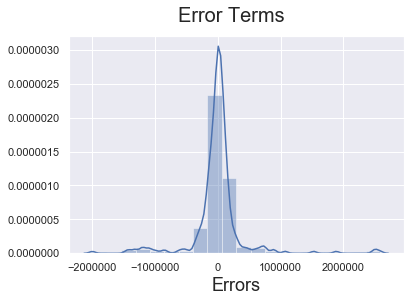

In [592]:
fig = plt.figure()
sns.distplot((y_train_home - y_train_home_1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [594]:
X_test_home_1 = X_test_home
X_test_home_1.drop(['vertical_Dock','Digital','TV','vertical_DockingStation','vertical_DJController','vertical_SlingBox', 'vertical_SoundMixer', 'Max Temp','vertical_KaraokePlayer','vertical_VoiceRecorder', 'Total Rain', 'Total Snow'], axis=1, inplace=True)
X_test_home_1.columns

Index(['holiday_flag', 'discount', 'Delivery_time_late',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'vertical_FMRadio',
       'vertical_HiFiSystem', 'vertical_HomeAudioSpeaker'],
      dtype='object')

In [595]:
X_test_home_2 = sm.add_constant(X_test_home_1)
y_pred_home_2 = lr.predict(X_test_home_2)
from sklearn.metrics import r2_score 
r2_score(y_test_home, y_pred_home_2)

0.858899461750599

#### Plot for Test actual and prediction

In [596]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test_home, y_pred_home_2)
fig.suptitle('y_test_home VS y_pred_home_2', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_home', fontsize = 18)                          # X-label
plt.ylabel('y_pred_home_2', fontsize = 16) 

Text(0,0.5,'y_pred_home_2')

In [601]:
X_train_home_rfe.describe()

holiday_flag    discount  Delivery_time_late  Delivery_time_very_late  \
count    323.000000  323.000000          323.000000               323.000000   
mean       0.219814    0.468893            0.082638                 0.014826   
std        0.414763    0.181307            0.169927                 0.078225   
min        0.000000    0.000000            0.000000                 0.000000   
25%        0.000000    0.362264            0.001986                 0.000000   
50%        0.000000    0.454017            0.008937                 0.000000   
75%        0.000000    0.562704            0.043694                 0.000000   
max        1.000000    1.000000            1.000000                 1.000000   

       payment_type_Prepaid  vertical_FMRadio  vertical_HiFiSystem  \
count            323.000000        323.000000           323.000000   
mean               0.061910          0.130031             0.123839   
std                0.131519          0.336859             0.329909   
min                0.000000          0.000000             0.000000   
25%                0.002144          0.000000             0.000000   
50%                0.010718          0.000000             0.000000   
75%                0.039657          0.000000             0.000000   
max                1.000000          1.000000             1.000000   

       vertical_HomeAudioSpeaker  
count                 323.000000  
mean                    0.111455  
std                     0.315183  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     0.000000  
max                     1.000000

In [599]:
X_test_home.columns

Index(['holiday_flag', 'discount', 'Delivery_time_late',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'vertical_FMRadio',
       'vertical_HiFiSystem', 'vertical_HomeAudioSpeaker'],
      dtype='object')

In [605]:
# Performing Cross Validation
mlr = LinearRegression()
model=mlr.fit(X_train_home_rfe,y_train_home)
kfold = KFold(n_splits=2)
results = cross_val_score(model,X_test_home,y_test_home, cv=kfold)
print("Results R2: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results R2: 0.63 (0.08) MSE


#### After performing cross validation achieved R2 is 0.63 and MSE is 0.08 for Home Audio dataset

In [606]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     236.2
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          6.00e-128
Time:                        22:09:49   Log-Likelihood:                -4647.8
No. Observations:                 323   AIC:                             9314.
Df Residuals:                     314   BIC:                             9348.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Step 29 : Apply Linear Model for Camera Accessory

In [607]:
camera = order_master_camera

In [608]:
camera.head()

gmv  units  product_mrp  holiday_flag  pay_date_flag  discount  \
0   949      1       1500.0             0              0     36.73   
1   153      1        220.0             0              0     30.45   
2  5050      2       4175.0             0              0     50.43   
3   858      4        319.5             0              0     31.35   
4   205      1        270.0             0              0     24.07   

   Delivery_time_late  Delivery_time_very_late  payment_type_Prepaid  \
0                 0.0                      0.0                   1.0   
1                 0.0                      0.0                   1.0   
2                 0.0                      0.0                   2.0   
3                 0.0                      0.0                   4.0   
4                 1.0                      0.0                   1.0   

              TV         ...          vertical_ExtensionTube  vertical_Filter  \
0  430660.407924         ...                             0.0              0.0   
1  430660.407924         ...                             0.0              0.0   
2  430660.407924         ...                             0.0              0.0   
3  430660.407924         ...                             0.0              0.0   
4  430660.407924         ...                             0.0              0.0   

   vertical_Flash  vertical_FlashShoeAdapter  vertical_Lens  \
0             0.0                        0.0            0.0   
1             0.0                        0.0            0.0   
2             0.0                        0.0            0.0   
3             0.0                        0.0            0.0   
4             0.0                        0.0            0.0   

   vertical_ReflectorUmbrella  vertical_Softbox  vertical_Strap  \
0                         0.0               0.0             0.0   
1                         0.0               0.0             0.0   
2                         0.0               0.0             0.0   
3                         0.0               0.0             0.0   
4                         0.0               0.0             0.0   

   vertical_Teleconverter  vertical_Telescope  
0                     0.0                 0.0  
1                     0.0                 0.0  
2                     0.0                 0.0  
3                     0.0                 0.0  
4                     0.0                 0.0  

[5 rows x 41 columns]

#### Test Train Split

In [609]:
np.random.seed(0)
df_train_camera, df_test_camera = train_test_split(camera, train_size = 0.7, test_size = 0.3, random_state = 100)

#### MinMax Scaling of Numerical Variables

In [610]:
scaler = MinMaxScaler()

In [611]:
y_train_camera = df_train_camera.pop('gmv')
X_train_camera = df_train_camera

In [612]:
X_train_camera.columns

Index(['units', 'product_mrp', 'holiday_flag', 'pay_date_flag', 'discount',
       'Delivery_time_late', 'Delivery_time_very_late', 'payment_type_Prepaid',
       'TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp',
       'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_CameraAccessory', 'vertical_CameraBag',
       'vertical_CameraBattery', 'vertical_CameraBatteryCharger',
       'vertical_CameraBatteryGrip', 'vertical_CameraEyeCup',
       'vertical_CameraFilmRolls', 'vertical_CameraHousing',
       'vertical_CameraMicrophone', 'vertical_CameraMount',
       'vertical_CameraRemoteControl', 'vertical_CameraTripod',
       'vertical_ExtensionTube', 'vertical_Filter', 'vertical_Flash',
       'vertical_FlashShoeAdapter', 'vertical_Lens',
       'vertical_ReflectorUmbrella', 'vertical_Softbox', 'vertical_Strap',
       'vertical_Teleconverter', 'vertical_Telescope'],
      dtype='object')

In [613]:
cols = ['units', 'product_mrp','discount','Delivery_time_late', 'Delivery_time_very_late', 'payment_type_Prepaid','TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp', 'Total Rain', 'Total Snow', 'NPS', 'Stock Index',]
X_train_camera[cols] = scaler.fit_transform(X_train_camera[cols])

#### VIF Check

In [614]:
X_train_camera = sm.add_constant(X_train_camera)
vif = pd.DataFrame()
vif['Features'] = X_train_camera.columns
vif['VIF'] = [variance_inflation_factor(X_train_camera.values, i) for i in range(X_train_camera.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                           const  170.81
12               Online marketing   17.31
11                    Sponsorship   12.41
1                           units   11.31
6              Delivery_time_late   10.73
18                    Stock Index    9.10
14                       Max Temp    7.25
17                            NPS    7.05
5                        discount    5.30
13                          Radio    5.07
10                        Digital    4.29
9                              TV    3.22
25       vertical_CameraFilmRolls    3.21
8            payment_type_Prepaid    2.77
30          vertical_CameraTripod    2.54
21         vertical_CameraBattery    2.47
33                 vertical_Flash    2.36
2                     product_mrp    2.34
38                 vertical_Strap    2.33
35                  vertical_Lens    2.30
19       vertical_CameraAccessory    2.25
29   vertical_CameraRemoteControl    2.18
22  vertical_CameraBatteryCharger    2.18
23     vertical_CameraBatteryGrip    2.11
40             vertical_Telescope    2.04
32                vertical_Filter    1.96
7         Delivery_time_very_late    1.85
28           vertical_CameraMount    1.80
20             vertical_CameraBag    1.72
24          vertical_CameraEyeCup    1.69
31         vertical_ExtensionTube    1.64
16                     Total Snow    1.58
27      vertical_CameraMicrophone    1.51
3                    holiday_flag    1.43
37               vertical_Softbox    1.29
26         vertical_CameraHousing    1.17
15                     Total Rain    1.17
4                   pay_date_flag    1.12
34      vertical_FlashShoeAdapter    1.08
36     vertical_ReflectorUmbrella    1.04
39         vertical_Teleconverter     NaN

#### Dropping variables with VIF more than 5

In [615]:
#Dropping Online Marketing as the VIF score is high
X_train_camera = X_train_camera.drop('Online marketing', 1,)
X_train_camera = sm.add_constant(X_train_camera)
vif = pd.DataFrame()
vif['Features'] = X_train_camera.columns
vif['VIF'] = [variance_inflation_factor(X_train_camera.values, i) for i in range(X_train_camera.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                           const  109.44
1                           units   11.27
6              Delivery_time_late   10.69
11                    Sponsorship    8.76
5                        discount    5.30
16                            NPS    4.45
10                        Digital    3.43
24       vertical_CameraFilmRolls    3.21
13                       Max Temp    3.19
8            payment_type_Prepaid    2.77
9                              TV    2.75
29          vertical_CameraTripod    2.54
20         vertical_CameraBattery    2.47
32                 vertical_Flash    2.36
2                     product_mrp    2.34
37                 vertical_Strap    2.33
34                  vertical_Lens    2.29
18       vertical_CameraAccessory    2.25
28   vertical_CameraRemoteControl    2.18
21  vertical_CameraBatteryCharger    2.18
22     vertical_CameraBatteryGrip    2.11
12                          Radio    2.07
39             vertical_Telescope    2.04
17                    Stock Index    2.03
31                vertical_Filter    1.96
7         Delivery_time_very_late    1.85
27           vertical_CameraMount    1.80
19             vertical_CameraBag    1.72
23          vertical_CameraEyeCup    1.68
30         vertical_ExtensionTube    1.64
15                     Total Snow    1.57
26      vertical_CameraMicrophone    1.50
36               vertical_Softbox    1.29
3                    holiday_flag    1.23
25         vertical_CameraHousing    1.17
14                     Total Rain    1.16
4                   pay_date_flag    1.12
33      vertical_FlashShoeAdapter    1.08
35     vertical_ReflectorUmbrella    1.04
38         vertical_Teleconverter     NaN

In [616]:
#Dropping Online Marketing as the VIF score is high
X_train_camera = X_train_camera.drop('units', 1,)
X_train_camera = sm.add_constant(X_train_camera)
vif = pd.DataFrame()
vif['Features'] = X_train_camera.columns
vif['VIF'] = [variance_inflation_factor(X_train_camera.values, i) for i in range(X_train_camera.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                           const  108.44
10                    Sponsorship    8.75
4                        discount    4.90
15                            NPS    4.41
5              Delivery_time_late    4.19
9                         Digital    3.43
12                       Max Temp    3.17
23       vertical_CameraFilmRolls    3.14
8                              TV    2.74
28          vertical_CameraTripod    2.52
7            payment_type_Prepaid    2.50
19         vertical_CameraBattery    2.43
1                     product_mrp    2.33
36                 vertical_Strap    2.32
33                  vertical_Lens    2.27
17       vertical_CameraAccessory    2.25
31                 vertical_Flash    2.21
20  vertical_CameraBatteryCharger    2.18
27   vertical_CameraRemoteControl    2.12
21     vertical_CameraBatteryGrip    2.10
11                          Radio    2.07
38             vertical_Telescope    2.04
16                    Stock Index    2.03
30                vertical_Filter    1.94
6         Delivery_time_very_late    1.85
26           vertical_CameraMount    1.79
18             vertical_CameraBag    1.72
22          vertical_CameraEyeCup    1.68
29         vertical_ExtensionTube    1.64
14                     Total Snow    1.56
25      vertical_CameraMicrophone    1.49
35               vertical_Softbox    1.29
2                    holiday_flag    1.23
24         vertical_CameraHousing    1.16
13                     Total Rain    1.15
3                   pay_date_flag    1.12
32      vertical_FlashShoeAdapter    1.08
34     vertical_ReflectorUmbrella    1.04
37         vertical_Teleconverter     NaN

In [617]:
#Dropping Online Marketing as the VIF score is high
X_train_camera = X_train_camera.drop('Sponsorship', 1,)
X_train_camera = sm.add_constant(X_train_camera)
vif = pd.DataFrame()
vif['Features'] = X_train_camera.columns
vif['VIF'] = [variance_inflation_factor(X_train_camera.values, i) for i in range(X_train_camera.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                           const  92.89
4                        discount   4.85
5              Delivery_time_late   4.19
22       vertical_CameraFilmRolls   3.12
11                       Max Temp   2.53
27          vertical_CameraTripod   2.52
8                              TV   2.46
18         vertical_CameraBattery   2.43
7            payment_type_Prepaid   2.42
1                     product_mrp   2.33
35                 vertical_Strap   2.31
32                  vertical_Lens   2.27
16       vertical_CameraAccessory   2.24
30                 vertical_Flash   2.20
19  vertical_CameraBatteryCharger   2.18
26   vertical_CameraRemoteControl   2.12
20     vertical_CameraBatteryGrip   2.09
37             vertical_Telescope   2.04
29                vertical_Filter   1.94
9                         Digital   1.88
6         Delivery_time_very_late   1.84
14                            NPS   1.82
15                    Stock Index   1.81
25           vertical_CameraMount   1.79
17             vertical_CameraBag   1.72
21          vertical_CameraEyeCup   1.67
28         vertical_ExtensionTube   1.64
13                     Total Snow   1.55
24      vertical_CameraMicrophone   1.49
10                          Radio   1.41
34               vertical_Softbox   1.28
2                    holiday_flag   1.17
23         vertical_CameraHousing   1.16
12                     Total Rain   1.15
3                   pay_date_flag   1.12
31      vertical_FlashShoeAdapter   1.08
33     vertical_ReflectorUmbrella   1.04
36         vertical_Teleconverter    NaN

In [618]:
#Dropping Online Marketing as the VIF score is high
X_train_camera = X_train_camera.drop('vertical_Teleconverter', 1,)
X_train_camera = sm.add_constant(X_train_camera)
vif = pd.DataFrame()
vif['Features'] = X_train_camera.columns
vif['VIF'] = [variance_inflation_factor(X_train_camera.values, i) for i in range(X_train_camera.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                           const  92.89
4                        discount   4.85
5              Delivery_time_late   4.19
22       vertical_CameraFilmRolls   3.12
11                       Max Temp   2.53
27          vertical_CameraTripod   2.52
8                              TV   2.46
18         vertical_CameraBattery   2.43
7            payment_type_Prepaid   2.42
1                     product_mrp   2.33
35                 vertical_Strap   2.31
32                  vertical_Lens   2.27
16       vertical_CameraAccessory   2.24
30                 vertical_Flash   2.20
19  vertical_CameraBatteryCharger   2.18
26   vertical_CameraRemoteControl   2.12
20     vertical_CameraBatteryGrip   2.09
36             vertical_Telescope   2.04
29                vertical_Filter   1.94
9                         Digital   1.88
6         Delivery_time_very_late   1.84
14                            NPS   1.82
15                    Stock Index   1.81
25           vertical_CameraMount   1.79
17             vertical_CameraBag   1.72
21          vertical_CameraEyeCup   1.67
28         vertical_ExtensionTube   1.64
13                     Total Snow   1.55
24      vertical_CameraMicrophone   1.49
10                          Radio   1.41
34               vertical_Softbox   1.28
2                    holiday_flag   1.17
23         vertical_CameraHousing   1.16
12                     Total Rain   1.15
3                   pay_date_flag   1.12
31      vertical_FlashShoeAdapter   1.08
33     vertical_ReflectorUmbrella   1.04

In [619]:
X_train_camera.drop(['const'], axis=1, inplace =True)
X_train_camera.columns

Index(['product_mrp', 'holiday_flag', 'pay_date_flag', 'discount',
       'Delivery_time_late', 'Delivery_time_very_late', 'payment_type_Prepaid',
       'TV', 'Digital', 'Radio', 'Max Temp', 'Total Rain', 'Total Snow', 'NPS',
       'Stock Index', 'vertical_CameraAccessory', 'vertical_CameraBag',
       'vertical_CameraBattery', 'vertical_CameraBatteryCharger',
       'vertical_CameraBatteryGrip', 'vertical_CameraEyeCup',
       'vertical_CameraFilmRolls', 'vertical_CameraHousing',
       'vertical_CameraMicrophone', 'vertical_CameraMount',
       'vertical_CameraRemoteControl', 'vertical_CameraTripod',
       'vertical_ExtensionTube', 'vertical_Filter', 'vertical_Flash',
       'vertical_FlashShoeAdapter', 'vertical_Lens',
       'vertical_ReflectorUmbrella', 'vertical_Softbox', 'vertical_Strap',
       'vertical_Telescope'],
      dtype='object')

In [620]:
X_train_camera.shape

(669, 36)

#### Performing RFE and extracting top 20 features

In [621]:
from sklearn.feature_selection import RFE
mlr= LinearRegression()
mlr.fit(X_train_camera,y_train_camera)
rfe = RFE(mlr, 20)
rfe = rfe.fit(X_train_camera, y_train_camera)

In [622]:
list(zip(X_train_camera.columns,rfe.support_,rfe.ranking_))

[('product_mrp', True, 1),
 ('holiday_flag', False, 11),
 ('pay_date_flag', False, 13),
 ('discount', True, 1),
 ('Delivery_time_late', True, 1),
 ('Delivery_time_very_late', True, 1),
 ('payment_type_Prepaid', True, 1),
 ('TV', False, 16),
 ('Digital', False, 5),
 ('Radio', False, 17),
 ('Max Temp', False, 9),
 ('Total Rain', False, 14),
 ('Total Snow', False, 12),
 ('NPS', True, 1),
 ('Stock Index', False, 15),
 ('vertical_CameraAccessory', False, 2),
 ('vertical_CameraBag', False, 10),
 ('vertical_CameraBattery', True, 1),
 ('vertical_CameraBatteryCharger', True, 1),
 ('vertical_CameraBatteryGrip', True, 1),
 ('vertical_CameraEyeCup', False, 4),
 ('vertical_CameraFilmRolls', True, 1),
 ('vertical_CameraHousing', True, 1),
 ('vertical_CameraMicrophone', True, 1),
 ('vertical_CameraMount', True, 1),
 ('vertical_CameraRemoteControl', True, 1),
 ('vertical_CameraTripod', False, 8),
 ('vertical_ExtensionTube', True, 1),
 ('vertical_Filter', True, 1),
 ('vertical_Flash', True, 1),
 ('vert

In [623]:
X_train_camera.columns[rfe.support_]

Index(['product_mrp', 'discount', 'Delivery_time_late',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'NPS',
       'vertical_CameraBattery', 'vertical_CameraBatteryCharger',
       'vertical_CameraBatteryGrip', 'vertical_CameraFilmRolls',
       'vertical_CameraHousing', 'vertical_CameraMicrophone',
       'vertical_CameraMount', 'vertical_CameraRemoteControl',
       'vertical_ExtensionTube', 'vertical_Filter', 'vertical_Flash',
       'vertical_Lens', 'vertical_Strap', 'vertical_Telescope'],
      dtype='object')

In [624]:
X_train_camera_rfe = X_train_camera[X_train_camera.columns[rfe.support_]]
X_train_camera_rfe.head()

product_mrp  discount  Delivery_time_late  Delivery_time_very_late  \
1055     0.068019  0.504076            0.051648                 0.000000   
229      0.170043  0.359931            0.004396                 0.000000   
1850     0.058712  0.490119            0.109890                 0.074074   
682      0.052478  0.531126            0.080220                 0.111111   
165      0.032498  0.305089            0.000000                 0.000000   

      payment_type_Prepaid       NPS  vertical_CameraBattery  \
1055              0.018957  0.172859                     0.0   
229               0.013541  0.162106                     0.0   
1850              0.042654  0.186581                     0.0   
682               0.046039  0.166891                     0.0   
165               0.000000  0.162106                     0.0   

      vertical_CameraBatteryCharger  vertical_CameraBatteryGrip  \
1055                            0.0                         0.0   
229                             0.0                         0.0   
1850                            0.0                         0.0   
682                             0.0                         0.0   
165                             0.0                         0.0   

      vertical_CameraFilmRolls  vertical_CameraHousing  \
1055                       0.0                     0.0   
229                        0.0                     0.0   
1850                       0.0                     0.0   
682                        0.0                     0.0   
165                        0.0                     0.0   

      vertical_CameraMicrophone  vertical_CameraMount  \
1055                        0.0                   0.0   
229                         0.0                   0.0   
1850                        0.0                   0.0   
682                         0.0                   0.0   
165                         0.0                   0.0   

      vertical_CameraRemoteControl  vertical_ExtensionTube  vertical_Filter  \
1055                           1.0                     0.0              0.0   
229                            0.0                     0.0              0.0   
1850                           0.0                     0.0              1.0   
682                            0.0                     0.0              1.0   
165                            0.0                     0.0              0.0   

      vertical_Flash  vertical_Lens  vertical_Strap  vertical_Telescope  
1055             0.0            0.0             0.0                 0.0  
229              0.0            0.0             0.0                 1.0  
1850             0.0            0.0             0.0                 0.0  
682              0.0            0.0             0.0                 0.0  
165              0.0            0.0             0.0                 0.0

In [625]:
y_test_camera = df_test_camera.pop('gmv')
X_test_camera = df_test_camera

In [626]:
#MinMax scaling for test dataset
X_test_camera[cols] = scaler.transform(X_test_camera[cols])

In [627]:
X_test_camera.shape

(288, 40)

In [628]:
cols = X_train_camera_rfe.columns
cols

Index(['product_mrp', 'discount', 'Delivery_time_late',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'NPS',
       'vertical_CameraBattery', 'vertical_CameraBatteryCharger',
       'vertical_CameraBatteryGrip', 'vertical_CameraFilmRolls',
       'vertical_CameraHousing', 'vertical_CameraMicrophone',
       'vertical_CameraMount', 'vertical_CameraRemoteControl',
       'vertical_ExtensionTube', 'vertical_Filter', 'vertical_Flash',
       'vertical_Lens', 'vertical_Strap', 'vertical_Telescope'],
      dtype='object')

In [629]:
X_test_camera = X_test_camera[cols]
X_test_camera.shape

(288, 20)

#### Performing Linear Regression

In [630]:
import statsmodels.api as sm
# Add a constant
X_train_camera_lm = sm.add_constant(X_train_camera_rfe[['product_mrp']])

In [631]:
# Create a first fitted model
lr = sm.OLS(y_train_camera, X_train_camera_lm).fit()
lr.params

const          6.706965e+04
product_mrp    1.497287e+06
dtype: float64

In [632]:
# Build a linear model
X_train_camera_lm = sm.add_constant(X_train_camera_rfe)
lr = sm.OLS(y_train_camera, X_train_camera_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     147.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          3.35e-225
Time:                        22:19:17   Log-Likelihood:                -9257.4
No. Observations:                 669   AIC:                         1.856e+04
Df Residuals:                     648   BIC:                         1.865e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

#### Dropping all those features with p-value greater than 0.05

In [633]:
#Dropping vertical_CameraHousing  variable
X_train_camera_rfe.drop(['vertical_CameraHousing'], axis=1,inplace=True)
# Build a linear model
X_train_camera_lm1 = sm.add_constant(X_train_camera_rfe)
lr = sm.OLS(y_train_camera, X_train_camera_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     154.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          5.94e-226
Time:                        22:19:50   Log-Likelihood:                -9258.3
No. Observations:                 669   AIC:                         1.856e+04
Df Residuals:                     649   BIC:                         1.865e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [634]:
y_train_camera_1 = lr.predict(X_train_camera_lm1)

#### Checking Error term distribution

Text(0.5,0,'Errors')

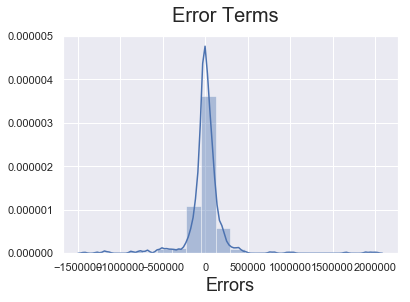

In [635]:
fig = plt.figure()
sns.distplot((y_train_camera - y_train_camera_1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [636]:
X_test_camera_1 = X_test_camera
X_test_camera_1.drop(['vertical_CameraHousing'], axis=1, inplace=True)
X_test_camera_1.columns

Index(['product_mrp', 'discount', 'Delivery_time_late',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'NPS',
       'vertical_CameraBattery', 'vertical_CameraBatteryCharger',
       'vertical_CameraBatteryGrip', 'vertical_CameraFilmRolls',
       'vertical_CameraMicrophone', 'vertical_CameraMount',
       'vertical_CameraRemoteControl', 'vertical_ExtensionTube',
       'vertical_Filter', 'vertical_Flash', 'vertical_Lens', 'vertical_Strap',
       'vertical_Telescope'],
      dtype='object')

In [637]:
X_test_camera_2 = sm.add_constant(X_test_camera_1)
y_pred_camera_1 = lr.predict(X_test_camera_2)
from sklearn.metrics import r2_score 
r2_score(y_test_camera, y_pred_camera_1)

0.7949884970425154

#### Plot for Test actual and prediction

Text(0,0.5,'y_pred_camera_1')

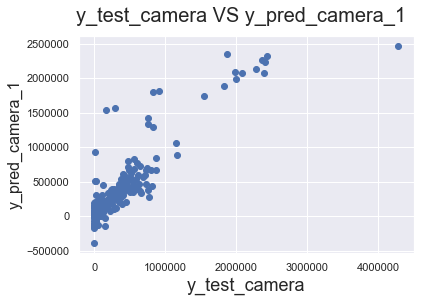

In [638]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test_camera, y_pred_camera_1)
fig.suptitle('y_test_camera VS y_pred_camera_1', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_camera', fontsize = 18)                          # X-label
plt.ylabel('y_pred_camera_1', fontsize = 16) 

In [639]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     154.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          5.94e-226
Time:                        22:20:42   Log-Likelihood:                -9258.3
No. Observations:                 669   AIC:                         1.856e+04
Df Residuals:                     649   BIC:                         1.865e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [643]:
#CROSS VALIDATION

mlr = LinearRegression()
model=mlr.fit(X_train_camera_rfe,y_train_camera)
kfold = KFold(n_splits=3)
results = cross_val_score(model,X_test_camera,y_test_camera, cv=kfold)
print("Results R2: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results R2: 0.81 (0.06) MSE


#### After performing modelling R2 is 0.81 and MSE is 0.06 for Camera Accessory dataset

### MULTIPLICATIVE MODEL

### Step 29 : Multiplicative Model for Gaming Accesory Dataset

In [644]:
game_mul = order_master_gaming

In [645]:
game_mul.head()

gmv  units   product_mrp  holiday_flag  pay_date_flag   list_price  \
8   17524     15   1987.266667             0              1  1168.266667   
9    1299      2   1049.000000             0              0   649.500000   
10  11387      4  15847.000000             0              0  2846.750000   
11    799      1    900.000000             0              0   799.000000   
12   3333      4    971.000000             0              1   833.250000   

    discount  Delivery_time_very_late  payment_type_Prepaid             TV  \
8      32.65                      0.0                  15.0  430660.407924   
9      44.14                      0.0                   2.0  430660.407924   
10     40.22                      0.0                   4.0  430660.407924   
11     11.22                      0.0                   1.0  430660.407924   
12     17.74                      0.0                   4.0  430660.407924   

                ...               vertical_GamingChargingStation  \
8               ...                                          0.0   
9               ...                                          0.0   
10              ...                                          0.0   
11              ...                                          0.0   
12              ...                                          0.0   

    vertical_GamingHeadset  vertical_GamingKeyboard  \
8                      0.0                      0.0   
9                      0.0                      0.0   
10                     1.0                      0.0   
11                     0.0                      1.0   
12                     0.0                      0.0   

    vertical_GamingMemoryCard  vertical_GamingMouse  vertical_GamingMousePad  \
8                         0.0                   0.0                      0.0   
9                         0.0                   0.0                      0.0   
10                        0.0                   0.0                      0.0   
11                        0.0                   0.0                      0.0   
12                        0.0                   1.0                      0.0   

    vertical_GamingSpeaker  vertical_JoystickGamingWheel  \
8                      0.0                           0.0   
9                      0.0                           0.0   
10                     0.0                           0.0   
11                     0.0                           0.0   
12                     0.0                           0.0   

    vertical_MotionController  vertical_TVOutCableAccessory  
8                         0.0                           0.0  
9                         0.0                           0.0  
10                        0.0                           0.0  
11                        0.0                           0.0  
12                        0.0                           0.0  

[5 rows x 33 columns]

#### Replacing all 0's to 0.01 as log(0) is Inf

In [646]:
game_mul = game_mul.replace(0,0.01)
game_mul.head()

gmv  units   product_mrp  holiday_flag  pay_date_flag   list_price  \
8   17524     15   1987.266667          0.01           1.00  1168.266667   
9    1299      2   1049.000000          0.01           0.01   649.500000   
10  11387      4  15847.000000          0.01           0.01  2846.750000   
11    799      1    900.000000          0.01           0.01   799.000000   
12   3333      4    971.000000          0.01           1.00   833.250000   

    discount  Delivery_time_very_late  payment_type_Prepaid             TV  \
8      32.65                     0.01                  15.0  430660.407924   
9      44.14                     0.01                   2.0  430660.407924   
10     40.22                     0.01                   4.0  430660.407924   
11     11.22                     0.01                   1.0  430660.407924   
12     17.74                     0.01                   4.0  430660.407924   

                ...               vertical_GamingChargingStation  \
8               ...                                         0.01   
9               ...                                         0.01   
10              ...                                         0.01   
11              ...                                         0.01   
12              ...                                         0.01   

    vertical_GamingHeadset  vertical_GamingKeyboard  \
8                     0.01                     0.01   
9                     0.01                     0.01   
10                    1.00                     0.01   
11                    0.01                     1.00   
12                    0.01                     0.01   

    vertical_GamingMemoryCard  vertical_GamingMouse  vertical_GamingMousePad  \
8                        0.01                  0.01                     0.01   
9                        0.01                  0.01                     0.01   
10                       0.01                  0.01                     0.01   
11                       0.01                  0.01                     0.01   
12                       0.01                  1.00                     0.01   

    vertical_GamingSpeaker  vertical_JoystickGamingWheel  \
8                     0.01                          0.01   
9                     0.01                          0.01   
10                    0.01                          0.01   
11                    0.01                          0.01   
12                    0.01                          0.01   

    vertical_MotionController  vertical_TVOutCableAccessory  
8                        0.01                          0.01  
9                        0.01                          0.01  
10                       0.01                          0.01  
11                       0.01                          0.01  
12                       0.01                          0.01  

[5 rows x 33 columns]

In [647]:
game_mul_final = np.sign(game_mul)*np.log(abs(game_mul)) 
game_mul_final.head()

gmv     units  product_mrp  holiday_flag  pay_date_flag  list_price  \
8   9.771327  2.708050     7.594515      -4.60517        0.00000    7.063276   
9   7.169350  0.693147     6.955593      -4.60517       -4.60517    6.476203   
10  9.340228  1.386294     9.670735      -4.60517       -4.60517    7.953933   
11  6.683361  0.000000     6.802395      -4.60517       -4.60517    6.683361   
12  8.111628  1.386294     6.878326      -4.60517        0.00000    6.725334   

    discount  Delivery_time_very_late  payment_type_Prepaid         TV  \
8   3.485845                 -4.60517              2.708050  12.973075   
9   3.787366                 -4.60517              0.693147  12.973075   
10  3.694364                 -4.60517              1.386294  12.973075   
11  2.417698                 -4.60517              0.000000  12.973075   
12  2.875822                 -4.60517              1.386294  12.973075   

                ...               vertical_GamingChargingStation  \
8               ...                                     -4.60517   
9               ...                                     -4.60517   
10              ...                                     -4.60517   
11              ...                                     -4.60517   
12              ...                                     -4.60517   

    vertical_GamingHeadset  vertical_GamingKeyboard  \
8                 -4.60517                 -4.60517   
9                 -4.60517                 -4.60517   
10                 0.00000                 -4.60517   
11                -4.60517                  0.00000   
12                -4.60517                 -4.60517   

    vertical_GamingMemoryCard  vertical_GamingMouse  vertical_GamingMousePad  \
8                    -4.60517              -4.60517                 -4.60517   
9                    -4.60517              -4.60517                 -4.60517   
10                   -4.60517              -4.60517                 -4.60517   
11                   -4.60517              -4.60517                 -4.60517   
12                   -4.60517               0.00000                 -4.60517   

    vertical_GamingSpeaker  vertical_JoystickGamingWheel  \
8                 -4.60517                      -4.60517   
9                 -4.60517                      -4.60517   
10                -4.60517                      -4.60517   
11                -4.60517                      -4.60517   
12                -4.60517                      -4.60517   

    vertical_MotionController  vertical_TVOutCableAccessory  
8                    -4.60517                      -4.60517  
9                    -4.60517                      -4.60517  
10                   -4.60517                      -4.60517  
11                   -4.60517                      -4.60517  
12                   -4.60517                      -4.60517  

[5 rows x 33 columns]

#### Test Train Split

In [648]:
np.random.seed(0)
df_train_game_mul, df_test_game_mul = train_test_split(game_mul_final, train_size = 0.7, test_size = 0.3, random_state = 100)

#### MinMax Scaling of Numerical Variables

In [649]:
scaler = MinMaxScaler()

In [650]:
y_train_game_mul = df_train_game_mul.pop('gmv')
X_train_game_mul = df_train_game_mul

In [651]:
X_train_game_mul.columns

Index(['units', 'product_mrp', 'holiday_flag', 'pay_date_flag', 'list_price',
       'discount', 'Delivery_time_very_late', 'payment_type_Prepaid', 'TV',
       'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp',
       'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_GameControlMount', 'vertical_GamePad',
       'vertical_GamingAccessoryKit', 'vertical_GamingAdapter',
       'vertical_GamingChargingStation', 'vertical_GamingHeadset',
       'vertical_GamingKeyboard', 'vertical_GamingMemoryCard',
       'vertical_GamingMouse', 'vertical_GamingMousePad',
       'vertical_GamingSpeaker', 'vertical_JoystickGamingWheel',
       'vertical_MotionController', 'vertical_TVOutCableAccessory'],
      dtype='object')

In [652]:
cols = ['units', 'product_mrp','list_price','discount','Delivery_time_very_late', 'payment_type_Prepaid', 'TV','Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp','Total Rain', 'Total Snow', 'NPS', 'Stock Index']
X_train_game_mul[cols] = scaler.fit_transform(X_train_game_mul[cols])

#### VIF Check

In [653]:
X_train_game_mul = sm.add_constant(X_train_game_mul)
vif = pd.DataFrame()
vif['Features'] = X_train_game_mul.columns
vif['VIF'] = [variance_inflation_factor(X_train_game_mul.values, i) for i in range(X_train_game_mul.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                            const  8673.49
12                Online marketing    28.71
5                       list_price    25.98
2                      product_mrp    16.39
9                               TV    14.48
1                            units    10.84
17                             NPS     8.42
24          vertical_GamingHeadset     7.56
8             payment_type_Prepaid     7.32
20                vertical_GamePad     6.21
27            vertical_GamingMouse     5.84
6                         discount     5.49
32    vertical_TVOutCableAccessory     5.08
31       vertical_MotionController     4.98
21     vertical_GamingAccessoryKit     4.85
25         vertical_GamingKeyboard     4.74
18                     Stock Index     4.57
11                     Sponsorship     4.55
28         vertical_GamingMousePad     4.41
30    vertical_JoystickGamingWheel     4.28
26       vertical_GamingMemoryCard     4.28
22          vertical_GamingAdapter     4.11
29          vertical_GamingSpeaker     3.17
10                         Digital     2.87
14                        Max Temp     2.62
13                           Radio     2.31
7          Delivery_time_very_late     2.10
23  vertical_GamingChargingStation     2.02
16                      Total Snow     1.59
3                     holiday_flag     1.33
15                      Total Rain     1.19
4                    pay_date_flag     1.13
19       vertical_GameControlMount     1.13

#### Dropping variables with VIF more than 5

In [654]:
#Dropping Online Marketing as the VIF score is high
X_train_game_mul = X_train_game_mul.drop('Online marketing', 1,)
X_train_game_mul = sm.add_constant(X_train_game_mul)
vif = pd.DataFrame()
vif['Features'] = X_train_game_mul.columns
vif['VIF'] = [variance_inflation_factor(X_train_game_mul.values, i) for i in range(X_train_game_mul.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                            const  8632.21
5                       list_price    25.94
2                      product_mrp    16.35
1                            units    10.74
23          vertical_GamingHeadset     7.54
8             payment_type_Prepaid     7.29
19                vertical_GamePad     6.17
26            vertical_GamingMouse     5.81
6                         discount     5.47
31    vertical_TVOutCableAccessory     5.05
30       vertical_MotionController     4.96
20     vertical_GamingAccessoryKit     4.81
24         vertical_GamingKeyboard     4.69
27         vertical_GamingMousePad     4.40
29    vertical_JoystickGamingWheel     4.27
25       vertical_GamingMemoryCard     4.25
11                     Sponsorship     4.25
21          vertical_GamingAdapter     4.07
9                               TV     3.80
16                             NPS     3.63
28          vertical_GamingSpeaker     3.15
13                        Max Temp     2.30
7          Delivery_time_very_late     2.09
22  vertical_GamingChargingStation     2.01
10                         Digital     2.00
12                           Radio     1.80
17                     Stock Index     1.54
15                      Total Snow     1.53
3                     holiday_flag     1.21
14                      Total Rain     1.18
18       vertical_GameControlMount     1.12
4                    pay_date_flag     1.11

In [655]:
#Dropping Online Marketing as the VIF score is high
X_train_game_mul = X_train_game_mul.drop('list_price', 1,)
X_train_game_mul = sm.add_constant(X_train_game_mul)
vif = pd.DataFrame()
vif['Features'] = X_train_game_mul.columns
vif['VIF'] = [variance_inflation_factor(X_train_game_mul.values, i) for i in range(X_train_game_mul.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                            const  8500.77
1                            units    10.70
7             payment_type_Prepaid     7.27
18                vertical_GamePad     6.16
22          vertical_GamingHeadset     6.08
25            vertical_GamingMouse     5.81
30    vertical_TVOutCableAccessory     4.87
19     vertical_GamingAccessoryKit     4.81
23         vertical_GamingKeyboard     4.58
29       vertical_MotionController     4.44
26         vertical_GamingMousePad     4.35
24       vertical_GamingMemoryCard     4.24
10                     Sponsorship     4.23
28    vertical_JoystickGamingWheel     4.09
20          vertical_GamingAdapter     4.07
8                               TV     3.77
15                             NPS     3.43
27          vertical_GamingSpeaker     3.09
5                         discount     2.95
2                      product_mrp     2.92
12                        Max Temp     2.29
6          Delivery_time_very_late     2.09
9                          Digital     2.00
21  vertical_GamingChargingStation     1.94
11                           Radio     1.76
14                      Total Snow     1.53
16                     Stock Index     1.51
3                     holiday_flag     1.21
13                      Total Rain     1.18
4                    pay_date_flag     1.11
17       vertical_GameControlMount     1.10

In [656]:
#Dropping Online Marketing as the VIF score is high
X_train_game_mul = X_train_game_mul.drop('units', 1,)
X_train_game_mul = sm.add_constant(X_train_game_mul)
vif = pd.DataFrame()
vif['Features'] = X_train_game_mul.columns
vif['VIF'] = [variance_inflation_factor(X_train_game_mul.values, i) for i in range(X_train_game_mul.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                            const  7999.32
21          vertical_GamingHeadset     5.54
17                vertical_GamePad     5.28
24            vertical_GamingMouse     5.10
29    vertical_TVOutCableAccessory     4.77
18     vertical_GamingAccessoryKit     4.48
28       vertical_MotionController     4.41
22         vertical_GamingKeyboard     4.23
9                      Sponsorship     4.23
25         vertical_GamingMousePad     4.14
23       vertical_GamingMemoryCard     4.07
19          vertical_GamingAdapter     4.01
27    vertical_JoystickGamingWheel     3.91
7                               TV     3.64
26          vertical_GamingSpeaker     3.05
14                             NPS     3.04
1                      product_mrp     2.89
4                         discount     2.78
6             payment_type_Prepaid     2.75
11                        Max Temp     2.29
20  vertical_GamingChargingStation     1.94
5          Delivery_time_very_late     1.92
8                          Digital     1.92
10                           Radio     1.76
13                      Total Snow     1.53
15                     Stock Index     1.51
2                     holiday_flag     1.20
12                      Total Rain     1.16
3                    pay_date_flag     1.11
16       vertical_GameControlMount     1.10

In [657]:
#Dropping Online Marketing as the VIF score is high
X_train_game_mul = X_train_game_mul.drop('vertical_GamingHeadset', 1,)
X_train_game_mul = sm.add_constant(X_train_game_mul)
vif = pd.DataFrame()
vif['Features'] = X_train_game_mul.columns
vif['VIF'] = [variance_inflation_factor(X_train_game_mul.values, i) for i in range(X_train_game_mul.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                            const  2308.99
9                      Sponsorship     4.23
7                               TV     3.49
14                             NPS     3.03
1                      product_mrp     2.79
24         vertical_GamingMousePad     2.65
27       vertical_MotionController     2.53
4                         discount     2.45
23            vertical_GamingMouse     2.44
28    vertical_TVOutCableAccessory     2.34
6             payment_type_Prepaid     2.34
11                        Max Temp     2.29
17                vertical_GamePad     2.20
18     vertical_GamingAccessoryKit     2.15
21         vertical_GamingKeyboard     2.11
26    vertical_JoystickGamingWheel     2.10
8                          Digital     1.91
5          Delivery_time_very_late     1.88
22       vertical_GamingMemoryCard     1.81
19          vertical_GamingAdapter     1.78
10                           Radio     1.74
25          vertical_GamingSpeaker     1.70
13                      Total Snow     1.53
15                     Stock Index     1.47
20  vertical_GamingChargingStation     1.37
2                     holiday_flag     1.18
12                      Total Rain     1.16
3                    pay_date_flag     1.10
16       vertical_GameControlMount     1.06

#### All features are having VIF less than 5

In [658]:
X_train_game_mul.drop(['const'], axis=1, inplace =True)
X_train_game_mul.columns

Index(['product_mrp', 'holiday_flag', 'pay_date_flag', 'discount',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'TV', 'Digital',
       'Sponsorship', 'Radio', 'Max Temp', 'Total Rain', 'Total Snow', 'NPS',
       'Stock Index', 'vertical_GameControlMount', 'vertical_GamePad',
       'vertical_GamingAccessoryKit', 'vertical_GamingAdapter',
       'vertical_GamingChargingStation', 'vertical_GamingKeyboard',
       'vertical_GamingMemoryCard', 'vertical_GamingMouse',
       'vertical_GamingMousePad', 'vertical_GamingSpeaker',
       'vertical_JoystickGamingWheel', 'vertical_MotionController',
       'vertical_TVOutCableAccessory'],
      dtype='object')

In [659]:
X_train_game_mul.shape

(506, 28)

#### Performing RFE and extracting top 20 features

In [660]:
from sklearn.feature_selection import RFE
mlr= LinearRegression()
mlr.fit(X_train_game_mul,y_train_game_mul)
rfe = RFE(mlr, 20)
rfe = rfe.fit(X_train_game_mul, y_train_game_mul)

In [661]:
list(zip(X_train_game_mul.columns,rfe.support_,rfe.ranking_))

[('product_mrp', True, 1),
 ('holiday_flag', False, 2),
 ('pay_date_flag', False, 9),
 ('discount', True, 1),
 ('Delivery_time_very_late', True, 1),
 ('payment_type_Prepaid', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', True, 1),
 ('Radio', False, 8),
 ('Max Temp', True, 1),
 ('Total Rain', True, 1),
 ('Total Snow', False, 4),
 ('NPS', True, 1),
 ('Stock Index', True, 1),
 ('vertical_GameControlMount', False, 7),
 ('vertical_GamePad', True, 1),
 ('vertical_GamingAccessoryKit', True, 1),
 ('vertical_GamingAdapter', False, 5),
 ('vertical_GamingChargingStation', True, 1),
 ('vertical_GamingKeyboard', True, 1),
 ('vertical_GamingMemoryCard', True, 1),
 ('vertical_GamingMouse', True, 1),
 ('vertical_GamingMousePad', True, 1),
 ('vertical_GamingSpeaker', True, 1),
 ('vertical_JoystickGamingWheel', True, 1),
 ('vertical_MotionController', False, 6),
 ('vertical_TVOutCableAccessory', False, 3)]

In [662]:
X_train_game_mul.columns[rfe.support_]

Index(['product_mrp', 'discount', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'TV', 'Digital', 'Sponsorship', 'Max Temp',
       'Total Rain', 'NPS', 'Stock Index', 'vertical_GamePad',
       'vertical_GamingAccessoryKit', 'vertical_GamingChargingStation',
       'vertical_GamingKeyboard', 'vertical_GamingMemoryCard',
       'vertical_GamingMouse', 'vertical_GamingMousePad',
       'vertical_GamingSpeaker', 'vertical_JoystickGamingWheel'],
      dtype='object')

In [663]:
X_train_game_mul_rfe = X_train_game_mul[X_train_game_mul.columns[rfe.support_]]
X_train_game_mul_rfe.head()

product_mrp  discount  Delivery_time_very_late  payment_type_Prepaid  \
1220     0.393466  0.666883                 0.745285              0.840415   
2138     0.755684  0.704710                 0.000000              0.544807   
1815     0.243694  0.783328                 0.000000              0.000000   
311      0.179670  0.754224                 0.000000              0.773529   
1716     0.340910  0.758757                 0.659064              0.816646   

            TV   Digital  Sponsorship  Max Temp  Total Rain       NPS  \
1220  0.850157  0.431757     0.548356  0.895226    0.000000  0.416536   
2138  0.755890  0.275032     0.670781  1.000000    0.643664  0.429010   
1815  0.760073  0.157765     0.775413  0.922549    0.845900  0.210862   
311   0.876027  0.261100     0.880710  0.973335    0.000000  0.183953   
1716  0.949349  0.195189     0.714905  0.903865    0.875878  0.514145   

      Stock Index  vertical_GamePad  vertical_GamingAccessoryKit  \
1220     0.919567           0.00000                     -4.60517   
2138     0.804721          -4.60517                     -4.60517   
1815     0.943834          -4.60517                     -4.60517   
311      0.402955          -4.60517                     -4.60517   
1716     1.000000          -4.60517                      0.00000   

      vertical_GamingChargingStation  vertical_GamingKeyboard  \
1220                        -4.60517                 -4.60517   
2138                        -4.60517                 -4.60517   
1815                        -4.60517                 -4.60517   
311                         -4.60517                 -4.60517   
1716                        -4.60517                 -4.60517   

      vertical_GamingMemoryCard  vertical_GamingMouse  \
1220                   -4.60517              -4.60517   
2138                   -4.60517              -4.60517   
1815                   -4.60517              -4.60517   
311                    -4.60517              -4.60517   
1716                   -4.60517              -4.60517   

      vertical_GamingMousePad  vertical_GamingSpeaker  \
1220                 -4.60517                -4.60517   
2138                 -4.60517                -4.60517   
1815                 -4.60517                -4.60517   
311                  -4.60517                -4.60517   
1716                 -4.60517                -4.60517   

      vertical_JoystickGamingWheel  
1220                      -4.60517  
2138                      -4.60517  
1815                      -4.60517  
311                       -4.60517  
1716                      -4.60517

In [664]:
y_test_game_mul = df_test_game_mul.pop('gmv')
X_test_game_mul = df_test_game_mul

In [665]:
X_test_game_mul[cols] = scaler.transform(X_test_game_mul[cols])

In [666]:
X_test_game_mul.shape

(218, 32)

In [667]:
cols = X_train_game_mul_rfe.columns
X_test_game_mul = X_test_game_mul[cols]

In [668]:
X_test_game_mul.shape

(218, 20)

#### Model building

In [669]:
import statsmodels.api as sm
# Add a constant
X_train_game_mul_lm = sm.add_constant(X_train_game_mul_rfe[['discount']])

In [670]:
# Create a first fitted model
lr = sm.OLS(y_train_game_mul, X_train_game_mul_lm).fit()
lr.params

const       10.910024
discount     0.146578
dtype: float64

In [671]:
# Build a linear model
X_train_game_mul_lm = sm.add_constant(X_train_game_mul_rfe)
lr = sm.OLS(y_train_game_mul, X_train_game_mul_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     195.3
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          3.25e-217
Time:                        22:34:29   Log-Likelihood:                -483.23
No. Observations:                 506   AIC:                             1008.
Df Residuals:                     485   BIC:                             1097.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Dropping all those features with p-value greater than 0.05

In [672]:
#Dropping vertical_game_mulHousing  variable
X_train_game_mul_rfe.drop(['Stock Index'], axis=1,inplace=True)
# Build a linear model
X_train_game_mul_lm1 = sm.add_constant(X_train_game_mul_rfe)
lr = sm.OLS(y_train_game_mul, X_train_game_mul_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     205.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          2.39e-218
Time:                        22:34:34   Log-Likelihood:                -483.31
No. Observations:                 506   AIC:                             1007.
Df Residuals:                     486   BIC:                             1091.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [673]:
#Dropping vertical_game_mulHousing  variable
X_train_game_mul_rfe.drop(['Max Temp'], axis=1,inplace=True)
# Build a linear model
X_train_game_mul_lm1 = sm.add_constant(X_train_game_mul_rfe)
lr = sm.OLS(y_train_game_mul, X_train_game_mul_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     217.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          1.83e-219
Time:                        22:34:36   Log-Likelihood:                -483.44
No. Observations:                 506   AIC:                             1005.
Df Residuals:                     487   BIC:                             1085.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [674]:
#vertical_GamingSpeaker
#Dropping vertical_game_mulHousing  variable
X_train_game_mul_rfe.drop(['vertical_GamingSpeaker'], axis=1,inplace=True)
# Build a linear model
X_train_game_mul_lm1 = sm.add_constant(X_train_game_mul_rfe)
lr = sm.OLS(y_train_game_mul, X_train_game_mul_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          4.16e-220
Time:                        22:34:38   Log-Likelihood:                -484.75
No. Observations:                 506   AIC:                             1006.
Df Residuals:                     488   BIC:                             1082.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [675]:
X_train_game_mul_rfe.drop(['Sponsorship'], axis=1,inplace=True)
# Build a linear model
X_train_game_mul_lm1 = sm.add_constant(X_train_game_mul_rfe)
lr = sm.OLS(y_train_game_mul, X_train_game_mul_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     244.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          3.96e-221
Time:                        22:34:40   Log-Likelihood:                -485.18
No. Observations:                 506   AIC:                             1004.
Df Residuals:                     489   BIC:                             1076.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [676]:
y_train_game_mul_1 = lr.predict(X_train_game_mul_lm1)

#### Checking Error term distribution

Text(0.5,0,'Errors')

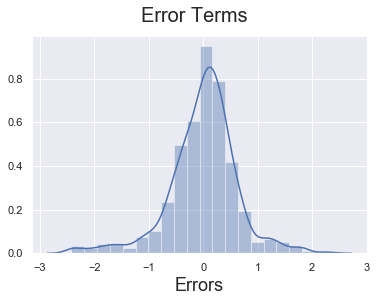

In [677]:
fig = plt.figure()
sns.distplot((y_train_game_mul - y_train_game_mul_1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [678]:
X_test_game_mul_1 = X_test_game_mul

In [679]:
X_test_game_mul_1.drop(['Stock Index','Max Temp','vertical_GamingSpeaker','Sponsorship'], axis=1, inplace=True)
X_test_game_mul_1.columns

Index(['product_mrp', 'discount', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'TV', 'Digital', 'Total Rain', 'NPS',
       'vertical_GamePad', 'vertical_GamingAccessoryKit',
       'vertical_GamingChargingStation', 'vertical_GamingKeyboard',
       'vertical_GamingMemoryCard', 'vertical_GamingMouse',
       'vertical_GamingMousePad', 'vertical_JoystickGamingWheel'],
      dtype='object')

In [680]:
X_test_game_mul_2 = sm.add_constant(X_test_game_mul_1)
y_pred_game_mul_2 = lr.predict(X_test_game_mul_2)
from sklearn.metrics import r2_score 
r2_score(y_test_game_mul, y_pred_game_mul_2)

0.8724791113177633

#### Plot for Test actual and prediction

Text(0,0.5,'y_pred_game_mul_2')

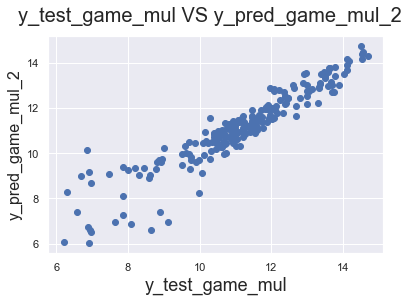

In [681]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test_game_mul, y_pred_game_mul_2)
fig.suptitle('y_test_game_mul VS y_pred_game_mul_2', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_game_mul', fontsize = 18)                          # X-label
plt.ylabel('y_pred_game_mul_2', fontsize = 16) 

#### Cross Validation

In [682]:
mlr = LinearRegression()
model=mlr.fit(X_train_game_mul_rfe,y_train_game_mul)
kfold = KFold(n_splits=10)
results = cross_val_score(model,X_test_game_mul,y_test_game_mul, cv=kfold)
print("Results R2: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Results R2: 0.84 (0.08) MSE


#### After performing cross validation achieved R2 is 0.84 and MSE is 0.08 for Gaming Accessory dataset

In [683]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     244.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          3.96e-221
Time:                        22:35:31   Log-Likelihood:                -485.18
No. Observations:                 506   AIC:                             1004.
Df Residuals:                     489   BIC:                             1076.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### Step 30 : Multiplicative Model for Home Audio Dataset

In [684]:
home_mul = order_master_home_audio
home_mul.head()

gmv  product_mrp  holiday_flag  pay_date_flag  discount  \
14   15729  3799.200000             0              1     21.05   
15    2988  2625.000000             0              0     33.59   
16   87628  4855.218750             0              1     39.24   
17    5699  7999.000000             0              0     28.75   
43  227398  3834.569444             0              0     19.50   

    Delivery_time_late  Delivery_time_very_late  payment_type_Prepaid  \
14                 0.0                      0.0                   5.0   
15                 1.0                      0.0                   2.0   
16                 6.0                      0.0                  31.0   
17                 0.0                      0.0                   1.0   
43                18.0                      0.0                  37.0   

               TV       Digital           ...            \
14  430660.407924  5.066027e+06           ...             
15  430660.407924  5.066027e+06           ...             
16  430660.407924  5.066027e+06           ...             
17  430660.407924  5.066027e+06           ...             
43  430660.407924  5.066027e+06           ...             

    vertical_DJController  vertical_Dock  vertical_DockingStation  \
14                    0.0            0.0                      0.0   
15                    0.0            0.0                      0.0   
16                    0.0            0.0                      0.0   
17                    0.0            0.0                      0.0   
43                    0.0            0.0                      0.0   

    vertical_FMRadio  vertical_HiFiSystem  vertical_HomeAudioSpeaker  \
14               0.0                  0.0                        0.0   
15               1.0                  0.0                        0.0   
16               0.0                  0.0                        1.0   
17               0.0                  0.0                        0.0   
43               0.0                  0.0                        0.0   

    vertical_KaraokePlayer  vertical_SlingBox  vertical_SoundMixer  \
14                     0.0                0.0                  0.0   
15                     0.0                0.0                  0.0   
16                     0.0                0.0                  0.0   
17                     0.0                0.0                  0.0   
43                     0.0                0.0                  0.0   

    vertical_VoiceRecorder  
14                     0.0  
15                     0.0  
16                     0.0  
17                     1.0  
43                     0.0  

[5 rows x 28 columns]

#### Replacing all 0's to 0.01 as log(0) is Inf

In [685]:
home_mul = home_mul.replace(0,0.01)
home_mul.head()

gmv  product_mrp  holiday_flag  pay_date_flag  discount  \
14   15729  3799.200000          0.01           1.00     21.05   
15    2988  2625.000000          0.01           0.01     33.59   
16   87628  4855.218750          0.01           1.00     39.24   
17    5699  7999.000000          0.01           0.01     28.75   
43  227398  3834.569444          0.01           0.01     19.50   

    Delivery_time_late  Delivery_time_very_late  payment_type_Prepaid  \
14                0.01                     0.01                   5.0   
15                1.00                     0.01                   2.0   
16                6.00                     0.01                  31.0   
17                0.01                     0.01                   1.0   
43               18.00                     0.01                  37.0   

               TV       Digital           ...            \
14  430660.407924  5.066027e+06           ...             
15  430660.407924  5.066027e+06           ...             
16  430660.407924  5.066027e+06           ...             
17  430660.407924  5.066027e+06           ...             
43  430660.407924  5.066027e+06           ...             

    vertical_DJController  vertical_Dock  vertical_DockingStation  \
14                   0.01           0.01                     0.01   
15                   0.01           0.01                     0.01   
16                   0.01           0.01                     0.01   
17                   0.01           0.01                     0.01   
43                   0.01           0.01                     0.01   

    vertical_FMRadio  vertical_HiFiSystem  vertical_HomeAudioSpeaker  \
14              0.01                 0.01                       0.01   
15              1.00                 0.01                       0.01   
16              0.01                 0.01                       1.00   
17              0.01                 0.01                       0.01   
43              0.01                 0.01                       0.01   

    vertical_KaraokePlayer  vertical_SlingBox  vertical_SoundMixer  \
14                    0.01               0.01                 0.01   
15                    0.01               0.01                 0.01   
16                    0.01               0.01                 0.01   
17                    0.01               0.01                 0.01   
43                    0.01               0.01                 0.01   

    vertical_VoiceRecorder  
14                    0.01  
15                    0.01  
16                    0.01  
17                    1.00  
43                    0.01  

[5 rows x 28 columns]

In [686]:
home_mul_final = np.sign(home_mul)*np.log(abs(home_mul)) 
home_mul_final.head()

gmv  product_mrp  holiday_flag  pay_date_flag  discount  \
14   9.663261     8.242546      -4.60517        0.00000  3.046901   
15   8.002360     7.872836      -4.60517       -4.60517  3.514228   
16  11.380856     8.487809      -4.60517        0.00000  3.669697   
17   8.648046     8.987072      -4.60517       -4.60517  3.358638   
43  12.334457     8.251812      -4.60517       -4.60517  2.970414   

    Delivery_time_late  Delivery_time_very_late  payment_type_Prepaid  \
14           -4.605170                 -4.60517              1.609438   
15            0.000000                 -4.60517              0.693147   
16            1.791759                 -4.60517              3.433987   
17           -4.605170                 -4.60517              0.000000   
43            2.890372                 -4.60517              3.610918   

           TV    Digital           ...            vertical_DJController  \
14  12.973075  15.438068           ...                         -4.60517   
15  12.973075  15.438068           ...                         -4.60517   
16  12.973075  15.438068           ...                         -4.60517   
17  12.973075  15.438068           ...                         -4.60517   
43  12.973075  15.438068           ...                         -4.60517   

    vertical_Dock  vertical_DockingStation  vertical_FMRadio  \
14       -4.60517                 -4.60517          -4.60517   
15       -4.60517                 -4.60517           0.00000   
16       -4.60517                 -4.60517          -4.60517   
17       -4.60517                 -4.60517          -4.60517   
43       -4.60517                 -4.60517          -4.60517   

    vertical_HiFiSystem  vertical_HomeAudioSpeaker  vertical_KaraokePlayer  \
14             -4.60517                   -4.60517                -4.60517   
15             -4.60517                   -4.60517                -4.60517   
16             -4.60517                    0.00000                -4.60517   
17             -4.60517                   -4.60517                -4.60517   
43             -4.60517                   -4.60517                -4.60517   

    vertical_SlingBox  vertical_SoundMixer  vertical_VoiceRecorder  
14           -4.60517             -4.60517                -4.60517  
15           -4.60517             -4.60517                -4.60517  
16           -4.60517             -4.60517                -4.60517  
17           -4.60517             -4.60517                 0.00000  
43           -4.60517             -4.60517                -4.60517  

[5 rows x 28 columns]

#### Test Train Split

In [687]:
np.random.seed(0)
df_train_home_mul, df_test_home_mul = train_test_split(home_mul_final, train_size = 0.7, test_size = 0.3, random_state = 100)

#### MinMax Scaling of Numerical Variables

In [688]:
scaler = MinMaxScaler()

In [689]:
y_train_home_mul = df_train_home_mul.pop('gmv')
X_train_home_mul = df_train_home_mul
X_train_home_mul.columns

Index(['product_mrp', 'holiday_flag', 'pay_date_flag', 'discount',
       'Delivery_time_late', 'Delivery_time_very_late', 'payment_type_Prepaid',
       'TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp',
       'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_DJController', 'vertical_Dock', 'vertical_DockingStation',
       'vertical_FMRadio', 'vertical_HiFiSystem', 'vertical_HomeAudioSpeaker',
       'vertical_KaraokePlayer', 'vertical_SlingBox', 'vertical_SoundMixer',
       'vertical_VoiceRecorder'],
      dtype='object')

In [690]:
cols = ['product_mrp','discount','Delivery_time_late','Delivery_time_very_late','payment_type_Prepaid','TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp','Total Rain', 'Total Snow', 'NPS', 'Stock Index']
X_train_home_mul[cols] = scaler.fit_transform(X_train_home_mul[cols])

#### VIF Check

In [691]:
X_train_home_mul = sm.add_constant(X_train_home_mul)
vif = pd.DataFrame()
vif['Features'] = X_train_home_mul.columns
vif['VIF'] = [variance_inflation_factor(X_train_home_mul.values, i) for i in range(X_train_home_mul.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                       const  2105.05
11           Online marketing    16.83
1                 product_mrp     9.48
8                          TV     8.41
16                        NPS     6.15
5          Delivery_time_late     4.57
17                Stock Index     4.45
21           vertical_FMRadio     4.38
18      vertical_DJController     4.31
19              vertical_Dock     4.21
10                Sponsorship     3.95
7        payment_type_Prepaid     3.69
20    vertical_DockingStation     3.01
23  vertical_HomeAudioSpeaker     2.96
9                     Digital     2.96
4                    discount     2.77
27     vertical_VoiceRecorder     2.65
13                   Max Temp     2.57
12                      Radio     2.24
26        vertical_SoundMixer     2.22
24     vertical_KaraokePlayer     2.13
6     Delivery_time_very_late     2.06
22        vertical_HiFiSystem     1.90
15                 Total Snow     1.50
2                holiday_flag     1.33
14                 Total Rain     1.24
25          vertical_SlingBox     1.20
3               pay_date_flag     1.13

#### Dropping variables with VIF more than 5

In [692]:
#Dropping Online Marketing as the VIF score is high
X_train_home_mul = X_train_home_mul.drop('Online marketing', 1,)
X_train_home_mul = sm.add_constant(X_train_home_mul)
vif = pd.DataFrame()
vif['Features'] = X_train_home_mul.columns
vif['VIF'] = [variance_inflation_factor(X_train_home_mul.values, i) for i in range(X_train_home_mul.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                       const  1945.73
1                 product_mrp     9.48
5          Delivery_time_late     4.57
20           vertical_FMRadio     4.38
17      vertical_DJController     4.29
18              vertical_Dock     4.20
10                Sponsorship     3.70
7        payment_type_Prepaid     3.67
19    vertical_DockingStation     3.00
22  vertical_HomeAudioSpeaker     2.96
4                    discount     2.76
26     vertical_VoiceRecorder     2.65
8                          TV     2.40
15                        NPS     2.38
12                   Max Temp     2.29
25        vertical_SoundMixer     2.20
23     vertical_KaraokePlayer     2.12
6     Delivery_time_very_late     2.06
9                     Digital     2.03
21        vertical_HiFiSystem     1.90
11                      Radio     1.69
16                Stock Index     1.57
14                 Total Snow     1.46
2                holiday_flag     1.24
13                 Total Rain     1.22
24          vertical_SlingBox     1.20
3               pay_date_flag     1.11

In [693]:
#Dropping product mrp as the VIF score is high
X_train_home_mul = X_train_home_mul.drop('product_mrp', 1,)
X_train_home_mul = sm.add_constant(X_train_home_mul)
vif = pd.DataFrame()
vif['Features'] = X_train_home_mul.columns
vif['VIF'] = [variance_inflation_factor(X_train_home_mul.values, i) for i in range(X_train_home_mul.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
0                       const  1688.06
4          Delivery_time_late     4.42
9                 Sponsorship     3.68
6        payment_type_Prepaid     3.64
21  vertical_HomeAudioSpeaker     2.94
3                    discount     2.72
19           vertical_FMRadio     2.69
25     vertical_VoiceRecorder     2.51
7                          TV     2.40
17              vertical_Dock     2.39
14                        NPS     2.38
11                   Max Temp     2.29
16      vertical_DJController     2.26
18    vertical_DockingStation     2.10
5     Delivery_time_very_late     2.06
8                     Digital     2.03
22     vertical_KaraokePlayer     1.97
20        vertical_HiFiSystem     1.84
10                      Radio     1.67
15                Stock Index     1.57
24        vertical_SoundMixer     1.46
13                 Total Snow     1.46
1                holiday_flag     1.23
12                 Total Rain     1.22
23          vertical_SlingBox     1.17
2               pay_date_flag     1.11

In [694]:
X_train_home_mul.drop(['const'], axis=1, inplace =True)
X_train_home_mul.columns

Index(['holiday_flag', 'pay_date_flag', 'discount', 'Delivery_time_late',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'TV', 'Digital',
       'Sponsorship', 'Radio', 'Max Temp', 'Total Rain', 'Total Snow', 'NPS',
       'Stock Index', 'vertical_DJController', 'vertical_Dock',
       'vertical_DockingStation', 'vertical_FMRadio', 'vertical_HiFiSystem',
       'vertical_HomeAudioSpeaker', 'vertical_KaraokePlayer',
       'vertical_SlingBox', 'vertical_SoundMixer', 'vertical_VoiceRecorder'],
      dtype='object')

In [695]:
X_train_home_mul.shape

(323, 25)

#### Performing RFE and extracting top 20 features

In [696]:
from sklearn.feature_selection import RFE
mlr= LinearRegression()
mlr.fit(X_train_home_mul,y_train_home_mul)
rfe = RFE(mlr, 20)
rfe = rfe.fit(X_train_home_mul, y_train_home_mul)

In [697]:
list(zip(X_train_home_mul.columns,rfe.support_,rfe.ranking_))

[('holiday_flag', False, 4),
 ('pay_date_flag', False, 6),
 ('discount', True, 1),
 ('Delivery_time_late', True, 1),
 ('Delivery_time_very_late', True, 1),
 ('payment_type_Prepaid', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', True, 1),
 ('Radio', True, 1),
 ('Max Temp', True, 1),
 ('Total Rain', True, 1),
 ('Total Snow', False, 3),
 ('NPS', True, 1),
 ('Stock Index', True, 1),
 ('vertical_DJController', True, 1),
 ('vertical_Dock', True, 1),
 ('vertical_DockingStation', True, 1),
 ('vertical_FMRadio', True, 1),
 ('vertical_HiFiSystem', False, 5),
 ('vertical_HomeAudioSpeaker', True, 1),
 ('vertical_KaraokePlayer', True, 1),
 ('vertical_SlingBox', True, 1),
 ('vertical_SoundMixer', True, 1),
 ('vertical_VoiceRecorder', False, 2)]

In [698]:
X_train_home_mul.columns[rfe.support_]

Index(['discount', 'Delivery_time_late', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'TV', 'Digital', 'Sponsorship', 'Radio',
       'Max Temp', 'Total Rain', 'NPS', 'Stock Index', 'vertical_DJController',
       'vertical_Dock', 'vertical_DockingStation', 'vertical_FMRadio',
       'vertical_HomeAudioSpeaker', 'vertical_KaraokePlayer',
       'vertical_SlingBox', 'vertical_SoundMixer'],
      dtype='object')

In [699]:
X_train_home_mul_rfe = X_train_home_mul[X_train_home_mul.columns[rfe.support_]]
X_train_home_mul_rfe.head()

discount  Delivery_time_late  Delivery_time_very_late  \
146   0.917364            0.399758                  0.00000   
550   0.910896            0.399758                  0.00000   
1037  0.809020            0.607910                  0.00000   
561   0.926863            0.806996                  0.68255   
1794  0.901881            0.459927                  0.00000   

      payment_type_Prepaid        TV   Digital  Sponsorship     Radio  \
146               0.000000  0.000000  0.449155     0.114917  0.000000   
550               0.498427  0.949204  1.000000     1.000000  0.000000   
1037              0.626563  0.859299  0.000000     0.000000  1.000000   
561               0.702504  0.949204  1.000000     1.000000  0.000000   
1794              0.402424  0.550653  0.157765     0.672703  0.955832   

      Max Temp  Total Rain       NPS  Stock Index  vertical_DJController  \
146   0.997414    0.857970  1.000000     0.733672                0.00000   
550   0.911288    0.628938  0.000000     0.870673               -4.60517   
1037  0.519850    0.773585  0.284890     0.177395               -4.60517   
561   0.911288    0.628938  0.000000     0.870673               -4.60517   
1794  0.925035    0.751302  0.306803     0.943834               -4.60517   

      vertical_Dock  vertical_DockingStation  vertical_FMRadio  \
146        -4.60517                 -4.60517          -4.60517   
550        -4.60517                 -4.60517          -4.60517   
1037       -4.60517                 -4.60517          -4.60517   
561        -4.60517                 -4.60517          -4.60517   
1794       -4.60517                 -4.60517          -4.60517   

      vertical_HomeAudioSpeaker  vertical_KaraokePlayer  vertical_SlingBox  \
146                    -4.60517                -4.60517           -4.60517   
550                    -4.60517                -4.60517           -4.60517   
1037                   -4.60517                -4.60517           -4.60517   
561                     0.00000                -4.60517           -4.60517   
1794                   -4.60517                -4.60517           -4.60517   

      vertical_SoundMixer  
146              -4.60517  
550              -4.60517  
1037             -4.60517  
561              -4.60517  
1794              0.00000

In [700]:
y_test_home_mul = df_test_home_mul.pop('gmv')
X_test_home_mul = df_test_home_mul

In [701]:
#MinMax scaling for test dataset
X_test_home_mul[cols] = scaler.transform(X_test_home_mul[cols])

In [702]:
X_test_home_mul.shape

(139, 27)

In [703]:
cols = X_train_home_mul_rfe.columns
X_test_home_mul = X_test_home_mul[cols]

In [704]:
X_test_home_mul.shape

(139, 20)

#### Model Building

In [705]:
import statsmodels.api as sm
# Add a constant
X_train_home_mul_lm = sm.add_constant(X_train_home_mul_rfe[['discount']])

In [706]:
# Create a first fitted model
lr = sm.OLS(y_train_home_mul, X_train_home_mul_lm).fit()
lr.params

const       9.282269
discount    2.289416
dtype: float64

In [707]:
# Build a linear model
X_train_home_mul_lm = sm.add_constant(X_train_home_mul_rfe)
lr = sm.OLS(y_train_home_mul, X_train_home_mul_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     162.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          2.22e-148
Time:                        22:41:43   Log-Likelihood:                -267.42
No. Observations:                 323   AIC:                             576.8
Df Residuals:                     302   BIC:                             656.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Dropping all those features with p-value greater than 0.05

In [708]:
#Dropping vertical_home_mulHousing  variable
X_train_home_mul_rfe.drop(['vertical_KaraokePlayer'], axis=1,inplace=True)
# Build a linear model
X_train_home_mul_lm1 = sm.add_constant(X_train_home_mul_rfe)
lr = sm.OLS(y_train_home_mul, X_train_home_mul_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     171.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          1.78e-149
Time:                        22:41:52   Log-Likelihood:                -267.48
No. Observations:                 323   AIC:                             575.0
Df Residuals:                     303   BIC:                             650.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [709]:
#Dropping vertical_home_mulHousing  variable
X_train_home_mul_rfe.drop(['Total Rain'], axis=1,inplace=True)
# Build a linear model
X_train_home_mul_lm1 = sm.add_constant(X_train_home_mul_rfe)
lr = sm.OLS(y_train_home_mul, X_train_home_mul_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     180.3
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          2.59e-150
Time:                        22:41:55   Log-Likelihood:                -268.22
No. Observations:                 323   AIC:                             574.4
Df Residuals:                     304   BIC:                             646.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [710]:
#Dropping vertical_home_mulHousing  variable
X_train_home_mul_rfe.drop(['Max Temp'], axis=1,inplace=True)
# Build a linear model
X_train_home_mul_lm1 = sm.add_constant(X_train_home_mul_rfe)
lr = sm.OLS(y_train_home_mul, X_train_home_mul_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     190.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          3.17e-151
Time:                        22:42:01   Log-Likelihood:                -268.80
No. Observations:                 323   AIC:                             573.6
Df Residuals:                     305   BIC:                             641.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [711]:
#Dropping vertical_home_mulHousing  variable
X_train_home_mul_rfe.drop(['Sponsorship'], axis=1,inplace=True)
# Build a linear model
X_train_home_mul_lm1 = sm.add_constant(X_train_home_mul_rfe)
lr = sm.OLS(y_train_home_mul, X_train_home_mul_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     202.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          3.24e-152
Time:                        22:42:05   Log-Likelihood:                -269.21
No. Observations:                 323   AIC:                             572.4
Df Residuals:                     306   BIC:                             636.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [712]:
#Dropping vertical_home_mulHousing  variable
X_train_home_mul_rfe.drop(['vertical_SoundMixer'], axis=1,inplace=True)
# Build a linear model
X_train_home_mul_lm1 = sm.add_constant(X_train_home_mul_rfe)
lr = sm.OLS(y_train_home_mul, X_train_home_mul_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     214.3
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          1.24e-152
Time:                        22:42:08   Log-Likelihood:                -271.06
No. Observations:                 323   AIC:                             574.1
Df Residuals:                     307   BIC:                             634.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [713]:
#Dropping vertical_home_mulHousing  variable
X_train_home_mul_rfe.drop(['Digital'], axis=1,inplace=True)
# Build a linear model
X_train_home_mul_lm1 = sm.add_constant(X_train_home_mul_rfe)
lr = sm.OLS(y_train_home_mul, X_train_home_mul_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     230.3
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          8.72e-154
Time:                        22:42:11   Log-Likelihood:                -271.15
No. Observations:                 323   AIC:                             572.3
Df Residuals:                     308   BIC:                             629.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [714]:
#Dropping vertical_home_mulHousing  variable
X_train_home_mul_rfe.drop(['discount'], axis=1,inplace=True)
# Build a linear model
X_train_home_mul_lm1 = sm.add_constant(X_train_home_mul_rfe)
lr = sm.OLS(y_train_home_mul, X_train_home_mul_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     247.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          8.67e-155
Time:                        22:42:17   Log-Likelihood:                -271.64
No. Observations:                 323   AIC:                             571.3
Df Residuals:                     309   BIC:                             624.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [715]:
y_train_home_mul_1 = lr.predict(X_train_home_mul_lm1)

#### Checking Error term distribution

In [716]:
fig = plt.figure()
sns.distplot((y_train_home_mul - y_train_home_mul_1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

Text(0.5,0,'Errors')

In [717]:
X_test_home_mul_1 = X_test_home_mul
X_test_home_mul_1.drop(['vertical_KaraokePlayer','Total Rain','Max Temp','Sponsorship','vertical_SoundMixer','Digital','discount'], axis=1, inplace=True)
X_test_home_mul_1.columns

Index(['Delivery_time_late', 'Delivery_time_very_late', 'payment_type_Prepaid',
       'TV', 'Radio', 'NPS', 'Stock Index', 'vertical_DJController',
       'vertical_Dock', 'vertical_DockingStation', 'vertical_FMRadio',
       'vertical_HomeAudioSpeaker', 'vertical_SlingBox'],
      dtype='object')

In [718]:
X_test_home_mul_2 = sm.add_constant(X_test_home_mul_1, has_constant='add')
y_pred_home_mul_2 = lr.predict(X_test_home_mul_2)
from sklearn.metrics import r2_score 
r2_score(y_test_home_mul, y_pred_home_mul_2)

0.8695739046943731

#### Plot for Test actual and prediction

Text(0,0.5,'y_pred_home_mul_2')

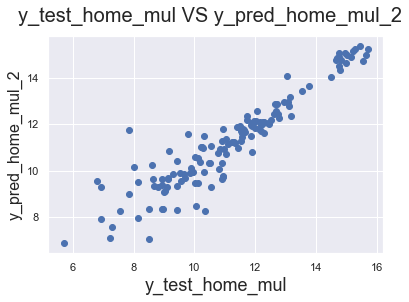

In [719]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test_home_mul, y_pred_home_mul_2)
fig.suptitle('y_test_home_mul VS y_pred_home_mul_2', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_home_mul', fontsize = 18)                          # X-label
plt.ylabel('y_pred_home_mul_2', fontsize = 16) 

#### Cross Validation

In [720]:
mlr = LinearRegression()
model=mlr.fit(X_train_home_mul_rfe,y_train_home_mul)
kfold = KFold(n_splits=5)
results = cross_val_score(model,X_test_home_mul,y_test_home_mul, cv=kfold)
print("Results R2: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results R2: 0.85 (0.07) MSE


#### After performing cross validation achieved R2 is 0.85 and MSE is 0.07 for Home Audio dataset

In [721]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     247.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          8.67e-155
Time:                        22:43:58   Log-Likelihood:                -271.64
No. Observations:                 323   AIC:                             571.3
Df Residuals:                     309   BIC:                             624.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Step 31 : Multiplicative Model for Camera Accessory Dataset

In [722]:
camera_mul = order_master_camera
camera_mul.head()

gmv  units  product_mrp  holiday_flag  pay_date_flag  discount  \
0   949      1       1500.0             0              0     36.73   
1   153      1        220.0             0              0     30.45   
2  5050      2       4175.0             0              0     50.43   
3   858      4        319.5             0              0     31.35   
4   205      1        270.0             0              0     24.07   

   Delivery_time_late  Delivery_time_very_late  payment_type_Prepaid  \
0                 0.0                      0.0                   1.0   
1                 0.0                      0.0                   1.0   
2                 0.0                      0.0                   2.0   
3                 0.0                      0.0                   4.0   
4                 1.0                      0.0                   1.0   

              TV         ...          vertical_ExtensionTube  vertical_Filter  \
0  430660.407924         ...                             0.0              0.0   
1  430660.407924         ...                             0.0              0.0   
2  430660.407924         ...                             0.0              0.0   
3  430660.407924         ...                             0.0              0.0   
4  430660.407924         ...                             0.0              0.0   

   vertical_Flash  vertical_FlashShoeAdapter  vertical_Lens  \
0             0.0                        0.0            0.0   
1             0.0                        0.0            0.0   
2             0.0                        0.0            0.0   
3             0.0                        0.0            0.0   
4             0.0                        0.0            0.0   

   vertical_ReflectorUmbrella  vertical_Softbox  vertical_Strap  \
0                         0.0               0.0             0.0   
1                         0.0               0.0             0.0   
2                         0.0               0.0             0.0   
3                         0.0               0.0             0.0   
4                         0.0               0.0             0.0   

   vertical_Teleconverter  vertical_Telescope  
0                     0.0                 0.0  
1                     0.0                 0.0  
2                     0.0                 0.0  
3                     0.0                 0.0  
4                     0.0                 0.0  

[5 rows x 41 columns]

#### Replacing all 0's to 0.01 as log(0) is Inf

In [723]:
camera_mul = camera_mul.replace(0,0.01)
camera_mul.head()

gmv  units  product_mrp  holiday_flag  pay_date_flag  discount  \
0   949      1       1500.0          0.01           0.01     36.73   
1   153      1        220.0          0.01           0.01     30.45   
2  5050      2       4175.0          0.01           0.01     50.43   
3   858      4        319.5          0.01           0.01     31.35   
4   205      1        270.0          0.01           0.01     24.07   

   Delivery_time_late  Delivery_time_very_late  payment_type_Prepaid  \
0                0.01                     0.01                   1.0   
1                0.01                     0.01                   1.0   
2                0.01                     0.01                   2.0   
3                0.01                     0.01                   4.0   
4                1.00                     0.01                   1.0   

              TV         ...          vertical_ExtensionTube  vertical_Filter  \
0  430660.407924         ...                            0.01             0.01   
1  430660.407924         ...                            0.01             0.01   
2  430660.407924         ...                            0.01             0.01   
3  430660.407924         ...                            0.01             0.01   
4  430660.407924         ...                            0.01             0.01   

   vertical_Flash  vertical_FlashShoeAdapter  vertical_Lens  \
0            0.01                       0.01           0.01   
1            0.01                       0.01           0.01   
2            0.01                       0.01           0.01   
3            0.01                       0.01           0.01   
4            0.01                       0.01           0.01   

   vertical_ReflectorUmbrella  vertical_Softbox  vertical_Strap  \
0                        0.01              0.01            0.01   
1                        0.01              0.01            0.01   
2                        0.01              0.01            0.01   
3                        0.01              0.01            0.01   
4                        0.01              0.01            0.01   

   vertical_Teleconverter  vertical_Telescope  
0                    0.01                0.01  
1                    0.01                0.01  
2                    0.01                0.01  
3                    0.01                0.01  
4                    0.01                0.01  

[5 rows x 41 columns]

In [724]:
camera_mul_final = np.sign(camera_mul)*np.log(abs(camera_mul)) 
camera_mul_final.head()

gmv     units  product_mrp  holiday_flag  pay_date_flag  discount  \
0  6.855409  0.000000     7.313220      -4.60517       -4.60517  3.603594   
1  5.030438  0.000000     5.393628      -4.60517       -4.60517  3.416086   
2  8.527144  0.693147     8.336870      -4.60517       -4.60517  3.920586   
3  6.754604  1.386294     5.766757      -4.60517       -4.60517  3.445214   
4  5.323010  0.000000     5.598422      -4.60517       -4.60517  3.180966   

   Delivery_time_late  Delivery_time_very_late  payment_type_Prepaid  \
0            -4.60517                 -4.60517              0.000000   
1            -4.60517                 -4.60517              0.000000   
2            -4.60517                 -4.60517              0.693147   
3            -4.60517                 -4.60517              1.386294   
4             0.00000                 -4.60517              0.000000   

          TV         ...          vertical_ExtensionTube  vertical_Filter  \
0  12.973075         ...                        -4.60517         -4.60517   
1  12.973075         ...                        -4.60517         -4.60517   
2  12.973075         ...                        -4.60517         -4.60517   
3  12.973075         ...                        -4.60517         -4.60517   
4  12.973075         ...                        -4.60517         -4.60517   

   vertical_Flash  vertical_FlashShoeAdapter  vertical_Lens  \
0        -4.60517                   -4.60517       -4.60517   
1        -4.60517                   -4.60517       -4.60517   
2        -4.60517                   -4.60517       -4.60517   
3        -4.60517                   -4.60517       -4.60517   
4        -4.60517                   -4.60517       -4.60517   

   vertical_ReflectorUmbrella  vertical_Softbox  vertical_Strap  \
0                    -4.60517          -4.60517        -4.60517   
1                    -4.60517          -4.60517        -4.60517   
2                    -4.60517          -4.60517        -4.60517   
3                    -4.60517          -4.60517        -4.60517   
4                    -4.60517          -4.60517        -4.60517   

   vertical_Teleconverter  vertical_Telescope  
0                -4.60517            -4.60517  
1                -4.60517            -4.60517  
2                -4.60517            -4.60517  
3                -4.60517            -4.60517  
4                -4.60517            -4.60517  

[5 rows x 41 columns]

#### Test Train Split

In [725]:
np.random.seed(0)
df_train_camera_mul, df_test_camera_mul = train_test_split(camera_mul_final, train_size = 0.7, test_size = 0.3, random_state = 100)

#### MinMax Scaling of Numerical Variables

In [726]:
scaler = MinMaxScaler()

In [727]:
y_train_camera_mul = df_train_camera_mul.pop('gmv')
X_train_camera_mul = df_train_camera_mul
X_train_camera_mul.columns

Index(['units', 'product_mrp', 'holiday_flag', 'pay_date_flag', 'discount',
       'Delivery_time_late', 'Delivery_time_very_late', 'payment_type_Prepaid',
       'TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp',
       'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_CameraAccessory', 'vertical_CameraBag',
       'vertical_CameraBattery', 'vertical_CameraBatteryCharger',
       'vertical_CameraBatteryGrip', 'vertical_CameraEyeCup',
       'vertical_CameraFilmRolls', 'vertical_CameraHousing',
       'vertical_CameraMicrophone', 'vertical_CameraMount',
       'vertical_CameraRemoteControl', 'vertical_CameraTripod',
       'vertical_ExtensionTube', 'vertical_Filter', 'vertical_Flash',
       'vertical_FlashShoeAdapter', 'vertical_Lens',
       'vertical_ReflectorUmbrella', 'vertical_Softbox', 'vertical_Strap',
       'vertical_Teleconverter', 'vertical_Telescope'],
      dtype='object')

In [728]:
cols = ['units','product_mrp','discount','Delivery_time_late','Delivery_time_very_late','payment_type_Prepaid','TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp','Total Rain', 'Total Snow', 'NPS', 'Stock Index']
X_train_camera_mul[cols] = scaler.fit_transform(X_train_camera_mul[cols])

#### VIF Check

In [729]:
X_train_camera_mul = sm.add_constant(X_train_camera_mul)
vif = pd.DataFrame()
vif['Features'] = X_train_camera_mul.columns
vif['VIF'] = [variance_inflation_factor(X_train_camera_mul.values, i) for i in range(X_train_camera_mul.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features       VIF
38         vertical_Teleconverter  10961.86
11               Online marketing     21.56
0                           units     18.20
8                              TV     10.84
5              Delivery_time_late      7.66
16                            NPS      7.10
7            payment_type_Prepaid      6.49
4                        discount      4.90
24       vertical_CameraFilmRolls      4.55
17                    Stock Index      4.37
10                    Sponsorship      4.19
1                     product_mrp      3.55
22     vertical_CameraBatteryGrip      2.86
23          vertical_CameraEyeCup      2.74
13                       Max Temp      2.72
37                 vertical_Strap      2.64
18       vertical_CameraAccessory      2.63
28   vertical_CameraRemoteControl      2.58
9                         Digital      2.49
21  vertical_CameraBatteryCharger      2.47
39             vertical_Telescope      2.26
30         vertical_ExtensionTube      2.24
31                vertical_Filter      2.24
27           vertical_CameraMount      2.23
20         vertical_CameraBattery      2.23
12                          Radio      2.22
29          vertical_CameraTripod      2.20
26      vertical_CameraMicrophone      2.10
32                 vertical_Flash      2.09
6         Delivery_time_very_late      2.02
34                  vertical_Lens      2.02
19             vertical_CameraBag      1.72
36               vertical_Softbox      1.57
15                     Total Snow      1.51
25         vertical_CameraHousing      1.44
2                    holiday_flag      1.33
14                     Total Rain      1.25
33      vertical_FlashShoeAdapter      1.21
3                   pay_date_flag      1.14
35     vertical_ReflectorUmbrella      1.09

#### Dropping variables with VIF more than 5

In [730]:
#Dropping Online Marketing as the VIF score is high
X_train_camera_mul = X_train_camera_mul.drop('Online marketing', 1,)
X_train_camera_mul = sm.add_constant(X_train_camera_mul)
vif = pd.DataFrame()
vif['Features'] = X_train_camera_mul.columns
vif['VIF'] = [variance_inflation_factor(X_train_camera_mul.values, i) for i in range(X_train_camera_mul.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features       VIF
37         vertical_Teleconverter  10711.08
0                           units     18.00
5              Delivery_time_late      7.64
7            payment_type_Prepaid      6.46
4                        discount      4.88
23       vertical_CameraFilmRolls      4.54
10                    Sponsorship      3.96
1                     product_mrp      3.55
15                            NPS      3.10
8                              TV      2.92
21     vertical_CameraBatteryGrip      2.85
22          vertical_CameraEyeCup      2.71
36                 vertical_Strap      2.63
17       vertical_CameraAccessory      2.62
27   vertical_CameraRemoteControl      2.58
20  vertical_CameraBatteryCharger      2.47
12                       Max Temp      2.46
38             vertical_Telescope      2.26
30                vertical_Filter      2.24
19         vertical_CameraBattery      2.23
26           vertical_CameraMount      2.23
29         vertical_ExtensionTube      2.23
28          vertical_CameraTripod      2.19
25      vertical_CameraMicrophone      2.09
31                 vertical_Flash      2.09
6         Delivery_time_very_late      2.01
33                  vertical_Lens      2.01
9                         Digital      1.81
11                          Radio      1.73
18             vertical_CameraBag      1.72
35               vertical_Softbox      1.57
16                    Stock Index      1.52
14                     Total Snow      1.46
24         vertical_CameraHousing      1.44
2                    holiday_flag      1.25
13                     Total Rain      1.23
32      vertical_FlashShoeAdapter      1.21
3                   pay_date_flag      1.12
34     vertical_ReflectorUmbrella      1.09

In [731]:
#Dropping Online Marketing as the VIF score is high
X_train_camera_mul = X_train_camera_mul.drop('units', 1,)
X_train_camera_mul = sm.add_constant(X_train_camera_mul)
vif = pd.DataFrame()
vif['Features'] = X_train_camera_mul.columns
vif['VIF'] = [variance_inflation_factor(X_train_camera_mul.values, i) for i in range(X_train_camera_mul.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features       VIF
36         vertical_Teleconverter  10033.31
6            payment_type_Prepaid      4.87
3                        discount      4.85
22       vertical_CameraFilmRolls      4.53
4              Delivery_time_late      4.44
9                     Sponsorship      3.95
0                     product_mrp      3.55
14                            NPS      3.06
7                              TV      2.91
20     vertical_CameraBatteryGrip      2.60
21          vertical_CameraEyeCup      2.55
35                 vertical_Strap      2.52
26   vertical_CameraRemoteControl      2.50
16       vertical_CameraAccessory      2.48
19  vertical_CameraBatteryCharger      2.47
11                       Max Temp      2.46
29                vertical_Filter      2.24
18         vertical_CameraBattery      2.20
27          vertical_CameraTripod      2.15
37             vertical_Telescope      2.05
30                 vertical_Flash      2.04
32                  vertical_Lens      2.01
25           vertical_CameraMount      2.01
28         vertical_ExtensionTube      1.98
5         Delivery_time_very_late      1.88
24      vertical_CameraMicrophone      1.81
8                         Digital      1.78
10                          Radio      1.72
17             vertical_CameraBag      1.72
34               vertical_Softbox      1.54
15                    Stock Index      1.51
13                     Total Snow      1.46
23         vertical_CameraHousing      1.39
12                     Total Rain      1.23
1                    holiday_flag      1.22
31      vertical_FlashShoeAdapter      1.20
2                   pay_date_flag      1.12
33     vertical_ReflectorUmbrella      1.07

In [732]:
#Dropping Online Marketing as the VIF score is high
X_train_camera_mul = X_train_camera_mul.drop('vertical_Teleconverter', 1,)
X_train_camera_mul = sm.add_constant(X_train_camera_mul)
vif = pd.DataFrame()
vif['Features'] = X_train_camera_mul.columns
vif['VIF'] = [variance_inflation_factor(X_train_camera_mul.values, i) for i in range(X_train_camera_mul.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features       VIF
0                           const  10033.31
7            payment_type_Prepaid      4.87
4                        discount      4.85
23       vertical_CameraFilmRolls      4.53
5              Delivery_time_late      4.44
10                    Sponsorship      3.95
1                     product_mrp      3.55
15                            NPS      3.06
8                              TV      2.91
21     vertical_CameraBatteryGrip      2.60
22          vertical_CameraEyeCup      2.55
36                 vertical_Strap      2.52
27   vertical_CameraRemoteControl      2.50
17       vertical_CameraAccessory      2.48
20  vertical_CameraBatteryCharger      2.47
12                       Max Temp      2.46
30                vertical_Filter      2.24
19         vertical_CameraBattery      2.20
28          vertical_CameraTripod      2.15
37             vertical_Telescope      2.05
31                 vertical_Flash      2.04
33                  vertical_Lens      2.01
26           vertical_CameraMount      2.01
29         vertical_ExtensionTube      1.98
6         Delivery_time_very_late      1.88
25      vertical_CameraMicrophone      1.81
9                         Digital      1.78
18             vertical_CameraBag      1.72
11                          Radio      1.72
35               vertical_Softbox      1.54
16                    Stock Index      1.51
14                     Total Snow      1.46
24         vertical_CameraHousing      1.39
13                     Total Rain      1.23
2                    holiday_flag      1.22
32      vertical_FlashShoeAdapter      1.20
3                   pay_date_flag      1.12
34     vertical_ReflectorUmbrella      1.07

In [733]:
#Dropping Online Marketing as the VIF score is high
X_train_camera_mul = X_train_camera_mul.drop('discount', 1,)
X_train_camera_mul = sm.add_constant(X_train_camera_mul)
vif = pd.DataFrame()
vif['Features'] = X_train_camera_mul.columns
vif['VIF'] = [variance_inflation_factor(X_train_camera_mul.values, i) for i in range(X_train_camera_mul.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features       VIF
0                           const  10029.27
6            payment_type_Prepaid      4.85
4              Delivery_time_late      4.31
9                     Sponsorship      3.90
1                     product_mrp      3.53
14                            NPS      2.97
7                              TV      2.91
21          vertical_CameraEyeCup      2.53
20     vertical_CameraBatteryGrip      2.52
26   vertical_CameraRemoteControl      2.47
11                       Max Temp      2.45
19  vertical_CameraBatteryCharger      2.40
16       vertical_CameraAccessory      2.37
35                 vertical_Strap      2.29
22       vertical_CameraFilmRolls      2.29
29                vertical_Filter      2.24
18         vertical_CameraBattery      2.13
25           vertical_CameraMount      2.00
32                  vertical_Lens      1.99
36             vertical_Telescope      1.98
30                 vertical_Flash      1.98
28         vertical_ExtensionTube      1.97
27          vertical_CameraTripod      1.92
5         Delivery_time_very_late      1.88
8                         Digital      1.78
17             vertical_CameraBag      1.72
24      vertical_CameraMicrophone      1.71
10                          Radio      1.70
15                    Stock Index      1.50
34               vertical_Softbox      1.50
13                     Total Snow      1.46
23         vertical_CameraHousing      1.36
12                     Total Rain      1.23
2                    holiday_flag      1.22
31      vertical_FlashShoeAdapter      1.20
3                   pay_date_flag      1.12
33     vertical_ReflectorUmbrella      1.07

In [734]:
X_train_camera_mul.drop(['const'], axis=1, inplace =True)
X_train_camera_mul.columns

Index(['product_mrp', 'holiday_flag', 'pay_date_flag', 'Delivery_time_late',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'TV', 'Digital',
       'Sponsorship', 'Radio', 'Max Temp', 'Total Rain', 'Total Snow', 'NPS',
       'Stock Index', 'vertical_CameraAccessory', 'vertical_CameraBag',
       'vertical_CameraBattery', 'vertical_CameraBatteryCharger',
       'vertical_CameraBatteryGrip', 'vertical_CameraEyeCup',
       'vertical_CameraFilmRolls', 'vertical_CameraHousing',
       'vertical_CameraMicrophone', 'vertical_CameraMount',
       'vertical_CameraRemoteControl', 'vertical_CameraTripod',
       'vertical_ExtensionTube', 'vertical_Filter', 'vertical_Flash',
       'vertical_FlashShoeAdapter', 'vertical_Lens',
       'vertical_ReflectorUmbrella', 'vertical_Softbox', 'vertical_Strap',
       'vertical_Telescope'],
      dtype='object')

In [735]:
X_train_camera_mul.shape

(669, 36)

#### Performing RFE and extracting top 20 features

In [736]:
from sklearn.feature_selection import RFE
mlr= LinearRegression()
mlr.fit(X_train_camera_mul,y_train_camera_mul)
rfe = RFE(mlr, 20)
rfe = rfe.fit(X_train_camera_mul, y_train_camera_mul)

In [737]:
list(zip(X_train_camera_mul.columns,rfe.support_,rfe.ranking_))

[('product_mrp', True, 1),
 ('holiday_flag', False, 9),
 ('pay_date_flag', False, 17),
 ('Delivery_time_late', True, 1),
 ('Delivery_time_very_late', True, 1),
 ('payment_type_Prepaid', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', False, 4),
 ('Radio', False, 3),
 ('Max Temp', True, 1),
 ('Total Rain', False, 14),
 ('Total Snow', False, 8),
 ('NPS', True, 1),
 ('Stock Index', False, 5),
 ('vertical_CameraAccessory', True, 1),
 ('vertical_CameraBag', False, 15),
 ('vertical_CameraBattery', False, 13),
 ('vertical_CameraBatteryCharger', False, 11),
 ('vertical_CameraBatteryGrip', True, 1),
 ('vertical_CameraEyeCup', True, 1),
 ('vertical_CameraFilmRolls', False, 10),
 ('vertical_CameraHousing', True, 1),
 ('vertical_CameraMicrophone', True, 1),
 ('vertical_CameraMount', True, 1),
 ('vertical_CameraRemoteControl', True, 1),
 ('vertical_CameraTripod', False, 12),
 ('vertical_ExtensionTube', True, 1),
 ('vertical_Filter', False, 7),
 ('vertical_Flash', False, 16),
 ('

In [738]:
X_train_camera_mul.columns[rfe.support_]

Index(['product_mrp', 'Delivery_time_late', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'TV', 'Digital', 'Max Temp', 'NPS',
       'vertical_CameraAccessory', 'vertical_CameraBatteryGrip',
       'vertical_CameraEyeCup', 'vertical_CameraHousing',
       'vertical_CameraMicrophone', 'vertical_CameraMount',
       'vertical_CameraRemoteControl', 'vertical_ExtensionTube',
       'vertical_FlashShoeAdapter', 'vertical_ReflectorUmbrella',
       'vertical_Softbox', 'vertical_Telescope'],
      dtype='object')

In [739]:
X_train_camera_mul_rfe = X_train_camera_mul[X_train_camera_mul.columns[rfe.support_]]
X_train_camera_mul_rfe.head()

product_mrp  Delivery_time_late  Delivery_time_very_late  \
1055     0.406674            0.740485                 0.000000   
229      0.596704            0.524710                 0.000000   
1850     0.378468            0.806608                 0.697156   
682      0.357504            0.779046                 0.744335   
165      0.274180            0.000000                 0.000000   

      payment_type_Prepaid        TV   Digital  Max Temp       NPS  \
1055              0.666842  0.924873  0.000000  0.000000  0.195802   
229               0.638574  0.876027  0.261100  0.960821  0.183953   
1850              0.734970  0.760073  0.157765  0.939301  0.210862   
682               0.741387  0.919618  0.309743  0.831247  0.189230   
165               0.000000  0.876027  0.261100  0.992755  0.183953   

      vertical_CameraAccessory  vertical_CameraBatteryGrip  \
1055                  -4.60517                    -4.60517   
229                   -4.60517                    -4.60517   
1850                  -4.60517                    -4.60517   
682                   -4.60517                    -4.60517   
165                   -4.60517                    -4.60517   

      vertical_CameraEyeCup  vertical_CameraHousing  \
1055               -4.60517                -4.60517   
229                -4.60517                -4.60517   
1850               -4.60517                -4.60517   
682                -4.60517                -4.60517   
165                -4.60517                -4.60517   

      vertical_CameraMicrophone  vertical_CameraMount  \
1055                   -4.60517              -4.60517   
229                    -4.60517              -4.60517   
1850                   -4.60517              -4.60517   
682                    -4.60517              -4.60517   
165                    -4.60517              -4.60517   

      vertical_CameraRemoteControl  vertical_ExtensionTube  \
1055                       0.00000                -4.60517   
229                       -4.60517                -4.60517   
1850                      -4.60517                -4.60517   
682                       -4.60517                -4.60517   
165                       -4.60517                -4.60517   

      vertical_FlashShoeAdapter  vertical_ReflectorUmbrella  vertical_Softbox  \
1055                   -4.60517                    -4.60517          -4.60517   
229                    -4.60517                    -4.60517          -4.60517   
1850                   -4.60517                    -4.60517          -4.60517   
682                    -4.60517                    -4.60517          -4.60517   
165                    -4.60517                    -4.60517          -4.60517   

      vertical_Telescope  
1055            -4.60517  
229              0.00000  
1850            -4.60517  
682             -4.60517  
165             -4.60517

In [740]:
y_test_camera_mul = df_test_camera_mul.pop('gmv')
X_test_camera_mul = df_test_camera_mul

In [741]:
#MinMax scaling for test dataset
X_test_camera_mul[cols] = scaler.transform(X_test_camera_mul[cols])

In [742]:
X_test_camera_mul.shape

(288, 40)

In [743]:
cols = X_train_camera_mul_rfe.columns
X_test_camera_mul = X_test_camera_mul[cols]

In [744]:
X_test_camera_mul.shape

(288, 20)

#### Model Building 

In [745]:
import statsmodels.api as sm
# Add a constant
X_train_camera_mul_lm = sm.add_constant(X_train_camera_mul_rfe[['product_mrp']])

In [746]:
# Create a first fitted model
lr = sm.OLS(y_train_camera_mul, X_train_camera_mul_lm).fit()
lr.params

const          8.625852
product_mrp    4.727200
dtype: float64

In [747]:
# Build a linear model
X_train_camera_mul_lm = sm.add_constant(X_train_camera_mul_rfe)
lr = sm.OLS(y_train_camera_mul, X_train_camera_mul_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     514.0
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:52:12   Log-Likelihood:                -498.04
No. Observations:                 669   AIC:                             1038.
Df Residuals:                     648   BIC:                             1133.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Dropping all those features with p-value greater than 0.05

In [748]:
#Dropping vertical_camera_mulHousing  variable
X_train_camera_mul_rfe.drop(['TV'], axis=1,inplace=True)
# Build a linear model
X_train_camera_mul_lm1 = sm.add_constant(X_train_camera_mul_rfe)
lr = sm.OLS(y_train_camera_mul, X_train_camera_mul_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     538.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:52:19   Log-Likelihood:                -500.01
No. Observations:                 669   AIC:                             1040.
Df Residuals:                     649   BIC:                             1130.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [750]:
y_train_camera_mul_1 = lr.predict(X_train_camera_mul_lm1)

#### Checking Error term distribution

Text(0.5,0,'Errors')

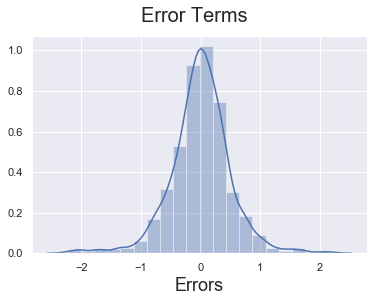

In [751]:
fig = plt.figure()
sns.distplot((y_train_camera_mul - y_train_camera_mul_1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [753]:
X_test_camera_mul_1 = X_test_camera_mul
X_test_camera_mul_1.drop(['TV'], axis=1, inplace=True)
X_test_camera_mul_1.columns

Index(['product_mrp', 'Delivery_time_late', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'Digital', 'Max Temp', 'NPS',
       'vertical_CameraAccessory', 'vertical_CameraBatteryGrip',
       'vertical_CameraEyeCup', 'vertical_CameraHousing',
       'vertical_CameraMicrophone', 'vertical_CameraMount',
       'vertical_CameraRemoteControl', 'vertical_ExtensionTube',
       'vertical_FlashShoeAdapter', 'vertical_ReflectorUmbrella',
       'vertical_Softbox', 'vertical_Telescope'],
      dtype='object')

In [754]:
X_test_camera_mul_2 = sm.add_constant(X_test_camera_mul_1, has_constant='add')
y_pred_camera_mul_2 = lr.predict(X_test_camera_mul_2)
from sklearn.metrics import r2_score 
r2_score(y_test_camera_mul, y_pred_camera_mul_2)

0.9385174395376178

#### Plot for Test actual and prediction

In [755]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test_camera_mul, y_pred_camera_mul_2)
fig.suptitle('y_test_camera_mul VS y_pred_camera_mul_2', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_camera_mul', fontsize = 18)                          # X-label
plt.ylabel('y_pred_camera_mul_2', fontsize = 16) 

Text(0,0.5,'y_pred_camera_mul_2')

#### Cross Validation

In [756]:
mlr = LinearRegression()
model=mlr.fit(X_train_camera_mul_rfe,y_train_camera_mul)
kfold = KFold(n_splits=10)
results = cross_val_score(model,X_test_camera_mul,y_test_camera_mul, cv=kfold)
print("Results R2: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results R2: 0.92 (0.03) MSE


#### After performing cross validation achieved R2 is 0.92 and MSE is 0.05 for Camera Accessory dataset

### KOYCK MODEL

### Step 32 :KOYCK model for Camera

In [757]:
camera_koyck = order_master_camera

In [758]:
camera_koyck.head()

gmv  units  product_mrp  holiday_flag  pay_date_flag  discount  \
0   949      1       1500.0             0              0     36.73   
1   153      1        220.0             0              0     30.45   
2  5050      2       4175.0             0              0     50.43   
3   858      4        319.5             0              0     31.35   
4   205      1        270.0             0              0     24.07   

   Delivery_time_late  Delivery_time_very_late  payment_type_Prepaid  \
0                 0.0                      0.0                   1.0   
1                 0.0                      0.0                   1.0   
2                 0.0                      0.0                   2.0   
3                 0.0                      0.0                   4.0   
4                 1.0                      0.0                   1.0   

              TV         ...          vertical_ExtensionTube  vertical_Filter  \
0  430660.407924         ...                             0.0              0.0   
1  430660.407924         ...                             0.0              0.0   
2  430660.407924         ...                             0.0              0.0   
3  430660.407924         ...                             0.0              0.0   
4  430660.407924         ...                             0.0              0.0   

   vertical_Flash  vertical_FlashShoeAdapter  vertical_Lens  \
0             0.0                        0.0            0.0   
1             0.0                        0.0            0.0   
2             0.0                        0.0            0.0   
3             0.0                        0.0            0.0   
4             0.0                        0.0            0.0   

   vertical_ReflectorUmbrella  vertical_Softbox  vertical_Strap  \
0                         0.0               0.0             0.0   
1                         0.0               0.0             0.0   
2                         0.0               0.0             0.0   
3                         0.0               0.0             0.0   
4                         0.0               0.0             0.0   

   vertical_Teleconverter  vertical_Telescope  
0                     0.0                 0.0  
1                     0.0                 0.0  
2                     0.0                 0.0  
3                     0.0                 0.0  
4                     0.0                 0.0  

[5 rows x 41 columns]

#### Introducing lag to gmv variable

In [759]:
camera_koyck['gmv_lag1'] = camera_koyck['gmv'].shift(-1)
camera_koyck['gmv_lag1'].fillna((camera_koyck['gmv_lag1'].median()), inplace=True)

In [760]:
camera_koyck.head()

gmv  units  product_mrp  holiday_flag  pay_date_flag  discount  \
0   949      1       1500.0             0              0     36.73   
1   153      1        220.0             0              0     30.45   
2  5050      2       4175.0             0              0     50.43   
3   858      4        319.5             0              0     31.35   
4   205      1        270.0             0              0     24.07   

   Delivery_time_late  Delivery_time_very_late  payment_type_Prepaid  \
0                 0.0                      0.0                   1.0   
1                 0.0                      0.0                   1.0   
2                 0.0                      0.0                   2.0   
3                 0.0                      0.0                   4.0   
4                 1.0                      0.0                   1.0   

              TV    ...     vertical_Filter  vertical_Flash  \
0  430660.407924    ...                 0.0             0.0   
1  430660.407924    ...                 0.0             0.0   
2  430660.407924    ...                 0.0             0.0   
3  430660.407924    ...                 0.0             0.0   
4  430660.407924    ...                 0.0             0.0   

   vertical_FlashShoeAdapter  vertical_Lens  vertical_ReflectorUmbrella  \
0                        0.0            0.0                         0.0   
1                        0.0            0.0                         0.0   
2                        0.0            0.0                         0.0   
3                        0.0            0.0                         0.0   
4                        0.0            0.0                         0.0   

   vertical_Softbox  vertical_Strap  vertical_Teleconverter  \
0               0.0             0.0                     0.0   
1               0.0             0.0                     0.0   
2               0.0             0.0                     0.0   
3               0.0             0.0                     0.0   
4               0.0             0.0                     0.0   

   vertical_Telescope  gmv_lag1  
0                 0.0     153.0  
1                 0.0    5050.0  
2                 0.0     858.0  
3                 0.0     205.0  
4                 0.0     420.0  

[5 rows x 42 columns]

#### Test Train Split

In [761]:
np.random.seed(0)
df_train_camera_koyck, df_test_camera_koyck = train_test_split(camera_koyck, train_size = 0.7, test_size = 0.3, random_state = 100)

#### MinMax Scaling of Numerical Variables

In [762]:
scaler = MinMaxScaler()

In [763]:
y_train_camera_koyck = df_train_camera_koyck.pop('gmv')
X_train_camera_koyck = df_train_camera_koyck
X_train_camera_koyck.columns

Index(['units', 'product_mrp', 'holiday_flag', 'pay_date_flag', 'discount',
       'Delivery_time_late', 'Delivery_time_very_late', 'payment_type_Prepaid',
       'TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp',
       'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_CameraAccessory', 'vertical_CameraBag',
       'vertical_CameraBattery', 'vertical_CameraBatteryCharger',
       'vertical_CameraBatteryGrip', 'vertical_CameraEyeCup',
       'vertical_CameraFilmRolls', 'vertical_CameraHousing',
       'vertical_CameraMicrophone', 'vertical_CameraMount',
       'vertical_CameraRemoteControl', 'vertical_CameraTripod',
       'vertical_ExtensionTube', 'vertical_Filter', 'vertical_Flash',
       'vertical_FlashShoeAdapter', 'vertical_Lens',
       'vertical_ReflectorUmbrella', 'vertical_Softbox', 'vertical_Strap',
       'vertical_Teleconverter', 'vertical_Telescope', 'gmv_lag1'],
      dtype='object')

In [764]:
cols = ['units','product_mrp','discount','Delivery_time_late','Delivery_time_very_late','payment_type_Prepaid','TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp','Total Rain', 'Total Snow', 'NPS', 'Stock Index','gmv_lag1']
X_train_camera_koyck[cols] = scaler.fit_transform(X_train_camera_koyck[cols])

#### VIF Check

In [765]:
X_train_camera_koyck = sm.add_constant(X_train_camera_koyck)
vif = pd.DataFrame()
vif['Features'] = X_train_camera_koyck.columns
vif['VIF'] = [variance_inflation_factor(X_train_camera_koyck.values, i) for i in range(X_train_camera_koyck.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                           const  171.23
12               Online marketing   17.31
11                    Sponsorship   12.45
1                           units   11.39
6              Delivery_time_late   10.74
18                    Stock Index    9.11
14                       Max Temp    7.25
17                            NPS    7.05
5                        discount    5.37
13                          Radio    5.08
10                        Digital    4.33
33                 vertical_Flash    3.70
25       vertical_CameraFilmRolls    3.25
9                              TV    3.22
8            payment_type_Prepaid    2.81
30          vertical_CameraTripod    2.55
21         vertical_CameraBattery    2.48
41                       gmv_lag1    2.36
38                 vertical_Strap    2.34
2                     product_mrp    2.34
35                  vertical_Lens    2.33
19       vertical_CameraAccessory    2.28
29   vertical_CameraRemoteControl    2.23
22  vertical_CameraBatteryCharger    2.19
23     vertical_CameraBatteryGrip    2.12
40             vertical_Telescope    2.09
32                vertical_Filter    2.01
7         Delivery_time_very_late    1.85
28           vertical_CameraMount    1.80
20             vertical_CameraBag    1.76
24          vertical_CameraEyeCup    1.69
31         vertical_ExtensionTube    1.64
16                     Total Snow    1.58
27      vertical_CameraMicrophone    1.51
3                    holiday_flag    1.43
37               vertical_Softbox    1.29
26         vertical_CameraHousing    1.17
15                     Total Rain    1.17
4                   pay_date_flag    1.12
34      vertical_FlashShoeAdapter    1.09
36     vertical_ReflectorUmbrella    1.04
39         vertical_Teleconverter     NaN

#### Dropping variables with VIF more than 5

In [766]:
#Dropping Online Marketing as the VIF score is high
X_train_camera_koyck = X_train_camera_koyck.drop('Online marketing', 1,)
X_train_camera_koyck = sm.add_constant(X_train_camera_koyck)
vif = pd.DataFrame()
vif['Features'] = X_train_camera_koyck.columns
vif['VIF'] = [variance_inflation_factor(X_train_camera_koyck.values, i) for i in range(X_train_camera_koyck.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                           const  109.87
1                           units   11.35
6              Delivery_time_late   10.70
11                    Sponsorship    8.80
5                        discount    5.37
16                            NPS    4.45
32                 vertical_Flash    3.69
10                        Digital    3.47
24       vertical_CameraFilmRolls    3.25
13                       Max Temp    3.19
8            payment_type_Prepaid    2.81
9                              TV    2.75
29          vertical_CameraTripod    2.55
20         vertical_CameraBattery    2.48
40                       gmv_lag1    2.36
37                 vertical_Strap    2.34
2                     product_mrp    2.34
34                  vertical_Lens    2.32
18       vertical_CameraAccessory    2.27
28   vertical_CameraRemoteControl    2.22
21  vertical_CameraBatteryCharger    2.19
22     vertical_CameraBatteryGrip    2.12
39             vertical_Telescope    2.09
12                          Radio    2.08
17                    Stock Index    2.05
31                vertical_Filter    2.01
7         Delivery_time_very_late    1.85
27           vertical_CameraMount    1.80
19             vertical_CameraBag    1.76
23          vertical_CameraEyeCup    1.69
30         vertical_ExtensionTube    1.64
15                     Total Snow    1.57
26      vertical_CameraMicrophone    1.50
36               vertical_Softbox    1.29
3                    holiday_flag    1.23
25         vertical_CameraHousing    1.17
14                     Total Rain    1.16
4                   pay_date_flag    1.12
33      vertical_FlashShoeAdapter    1.09
35     vertical_ReflectorUmbrella    1.04
38         vertical_Teleconverter     NaN

In [767]:
#Dropping Online Marketing as the VIF score is high
X_train_camera_koyck = X_train_camera_koyck.drop('units', 1,)
X_train_camera_koyck = sm.add_constant(X_train_camera_koyck)
vif = pd.DataFrame()
vif['Features'] = X_train_camera_koyck.columns
vif['VIF'] = [variance_inflation_factor(X_train_camera_koyck.values, i) for i in range(X_train_camera_koyck.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                           const  108.77
10                    Sponsorship    8.79
4                        discount    4.95
15                            NPS    4.41
5              Delivery_time_late    4.21
31                 vertical_Flash    3.61
9                         Digital    3.47
12                       Max Temp    3.17
23       vertical_CameraFilmRolls    3.17
8                              TV    2.74
28          vertical_CameraTripod    2.53
7            payment_type_Prepaid    2.52
19         vertical_CameraBattery    2.43
39                       gmv_lag1    2.34
1                     product_mrp    2.34
36                 vertical_Strap    2.33
33                  vertical_Lens    2.29
17       vertical_CameraAccessory    2.27
20  vertical_CameraBatteryCharger    2.19
27   vertical_CameraRemoteControl    2.16
21     vertical_CameraBatteryGrip    2.11
38             vertical_Telescope    2.09
11                          Radio    2.08
16                    Stock Index    2.05
30                vertical_Filter    1.99
6         Delivery_time_very_late    1.85
26           vertical_CameraMount    1.79
18             vertical_CameraBag    1.76
22          vertical_CameraEyeCup    1.69
29         vertical_ExtensionTube    1.64
14                     Total Snow    1.56
25      vertical_CameraMicrophone    1.49
35               vertical_Softbox    1.29
2                    holiday_flag    1.23
24         vertical_CameraHousing    1.17
13                     Total Rain    1.16
3                   pay_date_flag    1.12
32      vertical_FlashShoeAdapter    1.09
34     vertical_ReflectorUmbrella    1.04
37         vertical_Teleconverter     NaN

In [768]:
#Dropping Online Marketing as the VIF score is high
X_train_camera_koyck = X_train_camera_koyck.drop('Sponsorship', 1,)
X_train_camera_koyck = sm.add_constant(X_train_camera_koyck)
vif = pd.DataFrame()
vif['Features'] = X_train_camera_koyck.columns
vif['VIF'] = [variance_inflation_factor(X_train_camera_koyck.values, i) for i in range(X_train_camera_koyck.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                           const  93.58
4                        discount   4.88
5              Delivery_time_late   4.20
30                 vertical_Flash   3.58
22       vertical_CameraFilmRolls   3.15
11                       Max Temp   2.53
27          vertical_CameraTripod   2.53
8                              TV   2.47
7            payment_type_Prepaid   2.44
18         vertical_CameraBattery   2.43
1                     product_mrp   2.34
38                       gmv_lag1   2.33
35                 vertical_Strap   2.32
32                  vertical_Lens   2.29
16       vertical_CameraAccessory   2.27
19  vertical_CameraBatteryCharger   2.18
26   vertical_CameraRemoteControl   2.16
20     vertical_CameraBatteryGrip   2.10
37             vertical_Telescope   2.09
29                vertical_Filter   1.99
9                         Digital   1.90
14                            NPS   1.84
6         Delivery_time_very_late   1.84
15                    Stock Index   1.82
25           vertical_CameraMount   1.79
17             vertical_CameraBag   1.76
21          vertical_CameraEyeCup   1.68
28         vertical_ExtensionTube   1.64
13                     Total Snow   1.55
24      vertical_CameraMicrophone   1.49
10                          Radio   1.41
34               vertical_Softbox   1.28
23         vertical_CameraHousing   1.17
2                    holiday_flag   1.17
12                     Total Rain   1.15
3                   pay_date_flag   1.12
31      vertical_FlashShoeAdapter   1.09
33     vertical_ReflectorUmbrella   1.04
36         vertical_Teleconverter    NaN

In [769]:
#Dropping Online Marketing as the VIF score is high
X_train_camera_koyck = X_train_camera_koyck.drop('discount', 1,)
X_train_camera_koyck = sm.add_constant(X_train_camera_koyck)
vif = pd.DataFrame()
vif['Features'] = X_train_camera_koyck.columns
vif['VIF'] = [variance_inflation_factor(X_train_camera_koyck.values, i) for i in range(X_train_camera_koyck.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                           const  61.51
4              Delivery_time_late   4.08
29                 vertical_Flash   3.28
10                       Max Temp   2.53
7                              TV   2.46
6            payment_type_Prepaid   2.43
37                       gmv_lag1   2.31
31                  vertical_Lens   2.26
17         vertical_CameraBattery   2.24
1                     product_mrp   2.22
25   vertical_CameraRemoteControl   2.11
15       vertical_CameraAccessory   2.08
18  vertical_CameraBatteryCharger   2.05
34                 vertical_Strap   2.00
36             vertical_Telescope   1.98
28                vertical_Filter   1.98
21       vertical_CameraFilmRolls   1.94
19     vertical_CameraBatteryGrip   1.94
26          vertical_CameraTripod   1.93
8                         Digital   1.88
5         Delivery_time_very_late   1.84
13                            NPS   1.82
14                    Stock Index   1.80
24           vertical_CameraMount   1.79
16             vertical_CameraBag   1.76
27         vertical_ExtensionTube   1.62
20          vertical_CameraEyeCup   1.58
12                     Total Snow   1.55
9                           Radio   1.41
23      vertical_CameraMicrophone   1.36
33               vertical_Softbox   1.21
2                    holiday_flag   1.17
22         vertical_CameraHousing   1.16
11                     Total Rain   1.15
3                   pay_date_flag   1.12
30      vertical_FlashShoeAdapter   1.09
32     vertical_ReflectorUmbrella   1.04
35         vertical_Teleconverter    NaN

In [770]:
#Dropping Online Marketing as the VIF score is high
X_train_camera_koyck = X_train_camera_koyck.drop('vertical_Teleconverter', 1,)
X_train_camera_koyck = sm.add_constant(X_train_camera_koyck)
vif = pd.DataFrame()
vif['Features'] = X_train_camera_koyck.columns
vif['VIF'] = [variance_inflation_factor(X_train_camera_koyck.values, i) for i in range(X_train_camera_koyck.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                           const  61.51
4              Delivery_time_late   4.08
29                 vertical_Flash   3.28
10                       Max Temp   2.53
7                              TV   2.46
6            payment_type_Prepaid   2.43
36                       gmv_lag1   2.31
31                  vertical_Lens   2.26
17         vertical_CameraBattery   2.24
1                     product_mrp   2.22
25   vertical_CameraRemoteControl   2.11
15       vertical_CameraAccessory   2.08
18  vertical_CameraBatteryCharger   2.05
34                 vertical_Strap   2.00
35             vertical_Telescope   1.98
28                vertical_Filter   1.98
21       vertical_CameraFilmRolls   1.94
19     vertical_CameraBatteryGrip   1.94
26          vertical_CameraTripod   1.93
8                         Digital   1.88
5         Delivery_time_very_late   1.84
13                            NPS   1.82
14                    Stock Index   1.80
24           vertical_CameraMount   1.79
16             vertical_CameraBag   1.76
27         vertical_ExtensionTube   1.62
20          vertical_CameraEyeCup   1.58
12                     Total Snow   1.55
9                           Radio   1.41
23      vertical_CameraMicrophone   1.36
33               vertical_Softbox   1.21
2                    holiday_flag   1.17
22         vertical_CameraHousing   1.16
11                     Total Rain   1.15
3                   pay_date_flag   1.12
30      vertical_FlashShoeAdapter   1.09
32     vertical_ReflectorUmbrella   1.04

In [771]:
X_train_camera_koyck.drop(['const'], axis=1, inplace =True)
X_train_camera_koyck.columns

Index(['product_mrp', 'holiday_flag', 'pay_date_flag', 'Delivery_time_late',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'TV', 'Digital',
       'Radio', 'Max Temp', 'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_CameraAccessory', 'vertical_CameraBag',
       'vertical_CameraBattery', 'vertical_CameraBatteryCharger',
       'vertical_CameraBatteryGrip', 'vertical_CameraEyeCup',
       'vertical_CameraFilmRolls', 'vertical_CameraHousing',
       'vertical_CameraMicrophone', 'vertical_CameraMount',
       'vertical_CameraRemoteControl', 'vertical_CameraTripod',
       'vertical_ExtensionTube', 'vertical_Filter', 'vertical_Flash',
       'vertical_FlashShoeAdapter', 'vertical_Lens',
       'vertical_ReflectorUmbrella', 'vertical_Softbox', 'vertical_Strap',
       'vertical_Telescope', 'gmv_lag1'],
      dtype='object')

In [772]:
X_train_camera_koyck.shape

(669, 36)

#### Performing RFE and extracting top 20 features

In [773]:
from sklearn.feature_selection import RFE
mlr= LinearRegression()
mlr.fit(X_train_camera_koyck,y_train_camera_koyck)
rfe = RFE(mlr, 20)
rfe = rfe.fit(X_train_camera_koyck, y_train_camera_koyck)

In [774]:
list(zip(X_train_camera_koyck.columns,rfe.support_,rfe.ranking_))

[('product_mrp', True, 1),
 ('holiday_flag', False, 10),
 ('pay_date_flag', False, 12),
 ('Delivery_time_late', True, 1),
 ('Delivery_time_very_late', True, 1),
 ('payment_type_Prepaid', True, 1),
 ('TV', False, 14),
 ('Digital', True, 1),
 ('Radio', False, 15),
 ('Max Temp', False, 7),
 ('Total Rain', False, 11),
 ('Total Snow', False, 13),
 ('NPS', True, 1),
 ('Stock Index', False, 17),
 ('vertical_CameraAccessory', False, 6),
 ('vertical_CameraBag', False, 16),
 ('vertical_CameraBattery', True, 1),
 ('vertical_CameraBatteryCharger', True, 1),
 ('vertical_CameraBatteryGrip', True, 1),
 ('vertical_CameraEyeCup', False, 5),
 ('vertical_CameraFilmRolls', True, 1),
 ('vertical_CameraHousing', True, 1),
 ('vertical_CameraMicrophone', True, 1),
 ('vertical_CameraMount', True, 1),
 ('vertical_CameraRemoteControl', True, 1),
 ('vertical_CameraTripod', False, 2),
 ('vertical_ExtensionTube', True, 1),
 ('vertical_Filter', True, 1),
 ('vertical_Flash', False, 8),
 ('vertical_FlashShoeAdapter', 

In [775]:
X_train_camera_koyck.columns[rfe.support_]

Index(['product_mrp', 'Delivery_time_late', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'Digital', 'NPS', 'vertical_CameraBattery',
       'vertical_CameraBatteryCharger', 'vertical_CameraBatteryGrip',
       'vertical_CameraFilmRolls', 'vertical_CameraHousing',
       'vertical_CameraMicrophone', 'vertical_CameraMount',
       'vertical_CameraRemoteControl', 'vertical_ExtensionTube',
       'vertical_Filter', 'vertical_Lens', 'vertical_Softbox',
       'vertical_Strap', 'gmv_lag1'],
      dtype='object')

In [776]:
X_train_camera_koyck_rfe = X_train_camera_koyck[X_train_camera_koyck.columns[rfe.support_]]
X_train_camera_koyck_rfe.head()

product_mrp  Delivery_time_late  Delivery_time_very_late  \
1055     0.068019            0.051648                 0.000000   
229      0.170043            0.004396                 0.000000   
1850     0.058712            0.109890                 0.074074   
682      0.052478            0.080220                 0.111111   
165      0.032498            0.000000                 0.000000   

      payment_type_Prepaid   Digital       NPS  vertical_CameraBattery  \
1055              0.018957  0.000000  0.172859                     0.0   
229               0.013541  0.051718  0.162106                     0.0   
1850              0.042654  0.025809  0.186581                     0.0   
682               0.046039  0.067355  0.166891                     0.0   
165               0.000000  0.051718  0.162106                     0.0   

      vertical_CameraBatteryCharger  vertical_CameraBatteryGrip  \
1055                            0.0                         0.0   
229                             0.0                         0.0   
1850                            0.0                         0.0   
682                             0.0                         0.0   
165                             0.0                         0.0   

      vertical_CameraFilmRolls  vertical_CameraHousing  \
1055                       0.0                     0.0   
229                        0.0                     0.0   
1850                       0.0                     0.0   
682                        0.0                     0.0   
165                        0.0                     0.0   

      vertical_CameraMicrophone  vertical_CameraMount  \
1055                        0.0                   0.0   
229                         0.0                   0.0   
1850                        0.0                   0.0   
682                         0.0                   0.0   
165                         0.0                   0.0   

      vertical_CameraRemoteControl  vertical_ExtensionTube  vertical_Filter  \
1055                           1.0                     0.0              0.0   
229                            0.0                     0.0              0.0   
1850                           0.0                     0.0              1.0   
682                            0.0                     0.0              1.0   
165                            0.0                     0.0              0.0   

      vertical_Lens  vertical_Softbox  vertical_Strap  gmv_lag1  
1055            0.0               0.0             0.0  0.102030  
229             0.0               0.0             0.0  0.191012  
1850            0.0               0.0             0.0  0.145393  
682             0.0               0.0             0.0  0.076711  
165             0.0               0.0             0.0  0.180555

In [777]:
y_test_camera_koyck = df_test_camera_koyck.pop('gmv')
X_test_camera_koyck = df_test_camera_koyck

In [778]:
#MinMax scaling for test dataset
X_test_camera_koyck[cols] = scaler.transform(X_test_camera_koyck[cols])

In [779]:
X_test_camera_koyck.shape

(288, 41)

In [780]:
cols = X_train_camera_koyck_rfe.columns
X_test_camera_koyck = X_test_camera_koyck[cols]

In [781]:
X_test_camera_koyck.shape

(288, 20)

#### Model Building

In [782]:
import statsmodels.api as sm
# Add a constant
X_train_camera_koyck_lm = sm.add_constant(X_train_camera_koyck_rfe[['product_mrp']])

In [783]:
# Create a first fitted model
lr = sm.OLS(y_train_camera_koyck, X_train_camera_koyck_lm).fit()
lr.params

const          6.706965e+04
product_mrp    1.497287e+06
dtype: float64

In [784]:
# Build a linear model
X_train_camera_koyck_lm = sm.add_constant(X_train_camera_koyck_rfe)
lr = sm.OLS(y_train_camera_koyck, X_train_camera_koyck_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     155.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          1.17e-231
Time:                        23:03:30   Log-Likelihood:                -9242.0
No. Observations:                 669   AIC:                         1.853e+04
Df Residuals:                     648   BIC:                         1.862e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

#### Dropping all those features with p-value greater than 0.05

In [785]:
#Dropping vertical_CameraHousing  variable
X_train_camera_koyck_rfe.drop(['vertical_CameraHousing'], axis=1,inplace=True)
# Build a linear model
X_train_camera_koyck_lm1 = sm.add_constant(X_train_camera_koyck_rfe)
lr = sm.OLS(y_train_camera_koyck, X_train_camera_koyck_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     163.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          3.27e-232
Time:                        23:03:40   Log-Likelihood:                -9243.3
No. Observations:                 669   AIC:                         1.853e+04
Df Residuals:                     649   BIC:                         1.862e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [786]:
#Dropping vertical_CameraFilmRolls  variable
X_train_camera_koyck_rfe.drop(['vertical_CameraFilmRolls'], axis=1,inplace=True)
# Build a linear model
X_train_camera_koyck_lm1 = sm.add_constant(X_train_camera_koyck_rfe)
lr = sm.OLS(y_train_camera_koyck, X_train_camera_koyck_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     171.5
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          9.87e-233
Time:                        23:03:42   Log-Likelihood:                -9244.8
No. Observations:                 669   AIC:                         1.853e+04
Df Residuals:                     650   BIC:                         1.861e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [787]:
#Dropping vertical_Strap  variable
X_train_camera_koyck_rfe.drop(['vertical_Strap'], axis=1,inplace=True)
# Build a linear model
X_train_camera_koyck_lm1 = sm.add_constant(X_train_camera_koyck_rfe)
lr = sm.OLS(y_train_camera_koyck, X_train_camera_koyck_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     181.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          2.32e-233
Time:                        23:03:45   Log-Likelihood:                -9246.0
No. Observations:                 669   AIC:                         1.853e+04
Df Residuals:                     651   BIC:                         1.861e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [788]:
y_train_camera_koyck_1 = lr.predict(X_train_camera_koyck_lm1)

#### Checking Error term distribution

Text(0.5,0,'Errors')

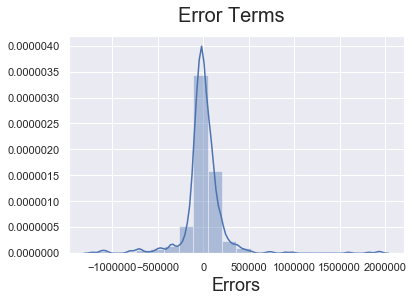

In [789]:
fig = plt.figure()
sns.distplot((y_train_camera_koyck - y_train_camera_koyck_1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [790]:
X_test_camera_koyck_1 = X_test_camera_koyck
X_test_camera_koyck_1.drop(['vertical_CameraHousing', 'vertical_CameraFilmRolls','vertical_Strap'], axis=1, inplace=True)
X_test_camera_koyck_1.columns


Index(['product_mrp', 'Delivery_time_late', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'Digital', 'NPS', 'vertical_CameraBattery',
       'vertical_CameraBatteryCharger', 'vertical_CameraBatteryGrip',
       'vertical_CameraMicrophone', 'vertical_CameraMount',
       'vertical_CameraRemoteControl', 'vertical_ExtensionTube',
       'vertical_Filter', 'vertical_Lens', 'vertical_Softbox', 'gmv_lag1'],
      dtype='object')

In [791]:
X_test_camera_koyck_2 = sm.add_constant(X_test_camera_koyck_1)
y_pred_camera_koyck_2 = lr.predict(X_test_camera_koyck_2)
from sklearn.metrics import r2_score 
r2_score(y_test_camera_koyck, y_pred_camera_koyck_2)

0.7931753513492739

#### Plot for Test actual and prediction

In [792]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test_camera_koyck, y_pred_camera_koyck_2)
fig.suptitle('y_test_camera_koyck VS y_pred_camera_koyck_2', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_camera_koyck', fontsize = 18)                          # X-label
plt.ylabel('y_pred_camera_koyck_2', fontsize = 16) 

Text(0,0.5,'y_pred_camera_koyck_2')

#### Cross Validation

In [794]:
mlr = LinearRegression()
model=mlr.fit(X_train_camera_koyck_rfe,y_train_camera_koyck)
kfold = KFold(n_splits=3)
results = cross_val_score(model,X_test_camera_koyck,y_test_camera_koyck, cv=kfold)
print("Results R2: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results R2: 0.81 (0.06) MSE


#### After performing cross validation achieved R2 is 0.81 and MSE is 0.06 for Camera Accessory dataset

### Step 33 : KOYCK model for Game

In [795]:
game_koyck = order_master_gaming
game_koyck.head()

gmv  units   product_mrp  holiday_flag  pay_date_flag   list_price  \
8   17524     15   1987.266667             0              1  1168.266667   
9    1299      2   1049.000000             0              0   649.500000   
10  11387      4  15847.000000             0              0  2846.750000   
11    799      1    900.000000             0              0   799.000000   
12   3333      4    971.000000             0              1   833.250000   

    discount  Delivery_time_very_late  payment_type_Prepaid             TV  \
8      32.65                      0.0                  15.0  430660.407924   
9      44.14                      0.0                   2.0  430660.407924   
10     40.22                      0.0                   4.0  430660.407924   
11     11.22                      0.0                   1.0  430660.407924   
12     17.74                      0.0                   4.0  430660.407924   

                ...               vertical_GamingChargingStation  \
8               ...                                          0.0   
9               ...                                          0.0   
10              ...                                          0.0   
11              ...                                          0.0   
12              ...                                          0.0   

    vertical_GamingHeadset  vertical_GamingKeyboard  \
8                      0.0                      0.0   
9                      0.0                      0.0   
10                     1.0                      0.0   
11                     0.0                      1.0   
12                     0.0                      0.0   

    vertical_GamingMemoryCard  vertical_GamingMouse  vertical_GamingMousePad  \
8                         0.0                   0.0                      0.0   
9                         0.0                   0.0                      0.0   
10                        0.0                   0.0                      0.0   
11                        0.0                   0.0                      0.0   
12                        0.0                   1.0                      0.0   

    vertical_GamingSpeaker  vertical_JoystickGamingWheel  \
8                      0.0                           0.0   
9                      0.0                           0.0   
10                     0.0                           0.0   
11                     0.0                           0.0   
12                     0.0                           0.0   

    vertical_MotionController  vertical_TVOutCableAccessory  
8                         0.0                           0.0  
9                         0.0                           0.0  
10                        0.0                           0.0  
11                        0.0                           0.0  
12                        0.0                           0.0  

[5 rows x 33 columns]

#### Introducing lag to gmv variable

In [796]:
game_koyck['gmv_lag1'] = game_koyck['gmv'].shift(-1)
game_koyck['gmv_lag1'] = game_koyck['gmv_lag1'].fillna((game_koyck['gmv_lag1'].median()))
game_koyck.head()

gmv  units   product_mrp  holiday_flag  pay_date_flag   list_price  \
8   17524     15   1987.266667             0              1  1168.266667   
9    1299      2   1049.000000             0              0   649.500000   
10  11387      4  15847.000000             0              0  2846.750000   
11    799      1    900.000000             0              0   799.000000   
12   3333      4    971.000000             0              1   833.250000   

    discount  Delivery_time_very_late  payment_type_Prepaid             TV  \
8      32.65                      0.0                  15.0  430660.407924   
9      44.14                      0.0                   2.0  430660.407924   
10     40.22                      0.0                   4.0  430660.407924   
11     11.22                      0.0                   1.0  430660.407924   
12     17.74                      0.0                   4.0  430660.407924   

      ...     vertical_GamingHeadset  vertical_GamingKeyboard  \
8     ...                        0.0                      0.0   
9     ...                        0.0                      0.0   
10    ...                        1.0                      0.0   
11    ...                        0.0                      1.0   
12    ...                        0.0                      0.0   

    vertical_GamingMemoryCard  vertical_GamingMouse  vertical_GamingMousePad  \
8                         0.0                   0.0                      0.0   
9                         0.0                   0.0                      0.0   
10                        0.0                   0.0                      0.0   
11                        0.0                   0.0                      0.0   
12                        0.0                   1.0                      0.0   

    vertical_GamingSpeaker  vertical_JoystickGamingWheel  \
8                      0.0                           0.0   
9                      0.0                           0.0   
10                     0.0                           0.0   
11                     0.0                           0.0   
12                     0.0                           0.0   

    vertical_MotionController  vertical_TVOutCableAccessory  gmv_lag1  
8                         0.0                           0.0    1299.0  
9                         0.0                           0.0   11387.0  
10                        0.0                           0.0     799.0  
11                        0.0                           0.0    3333.0  
12                        0.0                           0.0    2389.0  

[5 rows x 34 columns]

#### Test Train Split

In [797]:
np.random.seed(0)
df_train_game_koyck, df_test_game_koyck = train_test_split(game_koyck, train_size = 0.7, test_size = 0.3, random_state = 100)

#### MinMax Scaling of Numerical Variables

In [798]:
scaler = MinMaxScaler()

In [799]:
y_train_game_koyck = df_train_game_koyck.pop('gmv')
X_train_game_koyck = df_train_game_koyck
X_train_game_koyck.columns

Index(['units', 'product_mrp', 'holiday_flag', 'pay_date_flag', 'list_price',
       'discount', 'Delivery_time_very_late', 'payment_type_Prepaid', 'TV',
       'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp',
       'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_GameControlMount', 'vertical_GamePad',
       'vertical_GamingAccessoryKit', 'vertical_GamingAdapter',
       'vertical_GamingChargingStation', 'vertical_GamingHeadset',
       'vertical_GamingKeyboard', 'vertical_GamingMemoryCard',
       'vertical_GamingMouse', 'vertical_GamingMousePad',
       'vertical_GamingSpeaker', 'vertical_JoystickGamingWheel',
       'vertical_MotionController', 'vertical_TVOutCableAccessory',
       'gmv_lag1'],
      dtype='object')

In [800]:
cols = ['units','product_mrp','list_price','discount','Delivery_time_very_late','payment_type_Prepaid','TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp','Total Rain', 'Total Snow', 'NPS', 'Stock Index','gmv_lag1']
X_train_game_koyck[cols] = scaler.fit_transform(X_train_game_koyck[cols])

#### VIF Check

In [801]:
X_train_game_koyck = sm.add_constant(X_train_game_koyck)
vif = pd.DataFrame()
vif['Features'] = X_train_game_koyck.columns
vif['VIF'] = [variance_inflation_factor(X_train_game_koyck.values, i) for i in range(X_train_game_koyck.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                            const  174.48
12                Online marketing   19.39
11                     Sponsorship   14.83
18                     Stock Index    9.68
5                       list_price    7.64
17                             NPS    7.62
14                        Max Temp    7.48
24          vertical_GamingHeadset    6.78
13                           Radio    6.38
31       vertical_MotionController    5.97
20                vertical_GamePad    5.82
27            vertical_GamingMouse    5.30
1                            units    5.29
2                      product_mrp    5.10
30    vertical_JoystickGamingWheel    5.07
21     vertical_GamingAccessoryKit    4.93
10                         Digital    4.89
25         vertical_GamingKeyboard    4.69
28         vertical_GamingMousePad    4.66
32    vertical_TVOutCableAccessory    4.34
22          vertical_GamingAdapter    4.28
6                         discount    4.28
29          vertical_GamingSpeaker    4.12
26       vertical_GamingMemoryCard    4.08
9                               TV    3.30
8             payment_type_Prepaid    3.14
7          Delivery_time_very_late    2.68
23  vertical_GamingChargingStation    2.01
33                        gmv_lag1    1.94
16                      Total Snow    1.68
3                     holiday_flag    1.53
15                      Total Rain    1.22
4                    pay_date_flag    1.13
19       vertical_GameControlMount    1.09

#### Dropping variables with VIF more than 5

In [802]:
#Dropping Online marketing as the VIF score is high
X_train_game_koyck = X_train_game_koyck.drop('Online marketing', 1,)
X_train_game_koyck = sm.add_constant(X_train_game_koyck)
vif = pd.DataFrame()
vif['Features'] = X_train_game_koyck.columns
vif['VIF'] = [variance_inflation_factor(X_train_game_koyck.values, i) for i in range(X_train_game_koyck.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                            const  121.65
11                     Sponsorship   10.08
5                       list_price    7.56
23          vertical_GamingHeadset    6.78
30       vertical_MotionController    5.95
19                vertical_GamePad    5.82
26            vertical_GamingMouse    5.30
1                            units    5.28
29    vertical_JoystickGamingWheel    5.06
2                      product_mrp    5.05
20     vertical_GamingAccessoryKit    4.92
16                             NPS    4.87
27         vertical_GamingMousePad    4.66
24         vertical_GamingKeyboard    4.66
31    vertical_TVOutCableAccessory    4.33
21          vertical_GamingAdapter    4.26
6                         discount    4.23
28          vertical_GamingSpeaker    4.11
25       vertical_GamingMemoryCard    4.07
10                         Digital    3.89
13                        Max Temp    3.25
8             payment_type_Prepaid    3.13
9                               TV    2.81
7          Delivery_time_very_late    2.68
12                           Radio    2.41
17                     Stock Index    2.16
22  vertical_GamingChargingStation    2.01
32                        gmv_lag1    1.94
15                      Total Snow    1.68
3                     holiday_flag    1.26
14                      Total Rain    1.19
4                    pay_date_flag    1.13
18       vertical_GameControlMount    1.09

In [803]:
#Dropping Sponsorship as the VIF score is high
X_train_game_koyck = X_train_game_koyck.drop('Sponsorship', 1,)
X_train_game_koyck = sm.add_constant(X_train_game_koyck)
vif = pd.DataFrame()
vif['Features'] = X_train_game_koyck.columns
vif['VIF'] = [variance_inflation_factor(X_train_game_koyck.values, i) for i in range(X_train_game_koyck.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features     VIF
0                            const  104.83
5                       list_price    7.55
22          vertical_GamingHeadset    6.76
29       vertical_MotionController    5.95
18                vertical_GamePad    5.81
25            vertical_GamingMouse    5.30
1                            units    5.26
28    vertical_JoystickGamingWheel    5.06
2                      product_mrp    5.04
19     vertical_GamingAccessoryKit    4.91
23         vertical_GamingKeyboard    4.66
26         vertical_GamingMousePad    4.64
30    vertical_TVOutCableAccessory    4.33
20          vertical_GamingAdapter    4.26
6                         discount    4.18
27          vertical_GamingSpeaker    4.11
24       vertical_GamingMemoryCard    4.07
8             payment_type_Prepaid    3.01
12                        Max Temp    2.67
7          Delivery_time_very_late    2.62
9                               TV    2.51
15                             NPS    2.06
10                         Digital    2.03
21  vertical_GamingChargingStation    2.01
31                        gmv_lag1    1.94
16                     Stock Index    1.88
14                      Total Snow    1.67
11                           Radio    1.50
3                     holiday_flag    1.21
13                      Total Rain    1.19
4                    pay_date_flag    1.13
17       vertical_GameControlMount    1.09

In [804]:
#Dropping list_price as the VIF score is high
X_train_game_koyck = X_train_game_koyck.drop('list_price', 1,)
X_train_game_koyck = sm.add_constant(X_train_game_koyck)
vif = pd.DataFrame()
vif['Features'] = X_train_game_koyck.columns
vif['VIF'] = [variance_inflation_factor(X_train_game_koyck.values, i) for i in range(X_train_game_koyck.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                            const  102.92
21          vertical_GamingHeadset    6.65
17                vertical_GamePad    5.81
24            vertical_GamingMouse    5.30
1                            units    5.17
28       vertical_MotionController    5.12
18     vertical_GamingAccessoryKit    4.89
27    vertical_JoystickGamingWheel    4.75
25         vertical_GamingMousePad    4.64
22         vertical_GamingKeyboard    4.56
29    vertical_TVOutCableAccessory    4.32
19          vertical_GamingAdapter    4.21
26          vertical_GamingSpeaker    4.10
23       vertical_GamingMemoryCard    4.03
5                         discount    3.58
7             payment_type_Prepaid    3.00
11                        Max Temp    2.66
6          Delivery_time_very_late    2.62
8                               TV    2.49
9                          Digital    2.03
14                             NPS    2.02
2                      product_mrp    2.02
20  vertical_GamingChargingStation    1.99
30                        gmv_lag1    1.92
15                     Stock Index    1.87
13                      Total Snow    1.67
10                           Radio    1.50
3                     holiday_flag    1.21
12                      Total Rain    1.19
4                    pay_date_flag    1.13
16       vertical_GameControlMount    1.09

In [805]:
#Dropping vertical_GamingHeadset as the VIF score is high
X_train_game_koyck = X_train_game_koyck.drop('vertical_GamingHeadset', 1,)
X_train_game_koyck = sm.add_constant(X_train_game_koyck)
vif = pd.DataFrame()
vif['Features'] = X_train_game_koyck.columns
vif['VIF'] = [variance_inflation_factor(X_train_game_koyck.values, i) for i in range(X_train_game_koyck.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                            const  89.40
1                            units   4.90
24         vertical_GamingMousePad   3.14
27       vertical_MotionController   3.14
7             payment_type_Prepaid   3.00
5                         discount   3.00
26    vertical_JoystickGamingWheel   2.85
23            vertical_GamingMouse   2.76
17                vertical_GamePad   2.71
21         vertical_GamingKeyboard   2.70
11                        Max Temp   2.66
6          Delivery_time_very_late   2.60
8                               TV   2.48
18     vertical_GamingAccessoryKit   2.45
28    vertical_TVOutCableAccessory   2.20
19          vertical_GamingAdapter   2.08
22       vertical_GamingMemoryCard   2.03
9                          Digital   2.02
14                             NPS   2.01
25          vertical_GamingSpeaker   1.94
2                      product_mrp   1.93
15                     Stock Index   1.85
13                      Total Snow   1.67
29                        gmv_lag1   1.64
10                           Radio   1.48
20  vertical_GamingChargingStation   1.39
3                     holiday_flag   1.20
12                      Total Rain   1.19
4                    pay_date_flag   1.12
16       vertical_GameControlMount   1.05

In [806]:
X_train_game_koyck.drop(['const'], axis=1, inplace =True)
X_train_game_koyck.columns

Index(['units', 'product_mrp', 'holiday_flag', 'pay_date_flag', 'discount',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'TV', 'Digital',
       'Radio', 'Max Temp', 'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_GameControlMount', 'vertical_GamePad',
       'vertical_GamingAccessoryKit', 'vertical_GamingAdapter',
       'vertical_GamingChargingStation', 'vertical_GamingKeyboard',
       'vertical_GamingMemoryCard', 'vertical_GamingMouse',
       'vertical_GamingMousePad', 'vertical_GamingSpeaker',
       'vertical_JoystickGamingWheel', 'vertical_MotionController',
       'vertical_TVOutCableAccessory', 'gmv_lag1'],
      dtype='object')

In [807]:
X_train_game_koyck.shape

(506, 29)

#### Performing RFE and extracting top 20 features

In [808]:
from sklearn.feature_selection import RFE
mlr= LinearRegression()
mlr.fit(X_train_game_koyck,y_train_game_koyck)
rfe = RFE(mlr, 20)
rfe = rfe.fit(X_train_game_koyck, y_train_game_koyck)

In [809]:
list(zip(X_train_game_koyck.columns,rfe.support_,rfe.ranking_))

[('units', True, 1),
 ('product_mrp', True, 1),
 ('holiday_flag', False, 6),
 ('pay_date_flag', False, 9),
 ('discount', True, 1),
 ('Delivery_time_very_late', True, 1),
 ('payment_type_Prepaid', True, 1),
 ('TV', False, 5),
 ('Digital', True, 1),
 ('Radio', False, 2),
 ('Max Temp', True, 1),
 ('Total Rain', False, 7),
 ('Total Snow', False, 10),
 ('NPS', True, 1),
 ('Stock Index', False, 4),
 ('vertical_GameControlMount', False, 3),
 ('vertical_GamePad', True, 1),
 ('vertical_GamingAccessoryKit', True, 1),
 ('vertical_GamingAdapter', True, 1),
 ('vertical_GamingChargingStation', True, 1),
 ('vertical_GamingKeyboard', True, 1),
 ('vertical_GamingMemoryCard', True, 1),
 ('vertical_GamingMouse', True, 1),
 ('vertical_GamingMousePad', True, 1),
 ('vertical_GamingSpeaker', True, 1),
 ('vertical_JoystickGamingWheel', True, 1),
 ('vertical_MotionController', False, 8),
 ('vertical_TVOutCableAccessory', True, 1),
 ('gmv_lag1', True, 1)]

In [810]:
X_train_game_koyck.columns[rfe.support_]

Index(['units', 'product_mrp', 'discount', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'Digital', 'Max Temp', 'NPS',
       'vertical_GamePad', 'vertical_GamingAccessoryKit',
       'vertical_GamingAdapter', 'vertical_GamingChargingStation',
       'vertical_GamingKeyboard', 'vertical_GamingMemoryCard',
       'vertical_GamingMouse', 'vertical_GamingMousePad',
       'vertical_GamingSpeaker', 'vertical_JoystickGamingWheel',
       'vertical_TVOutCableAccessory', 'gmv_lag1'],
      dtype='object')

In [811]:
X_train_game_koyck_rfe = X_train_game_koyck[X_train_game_koyck.columns[rfe.support_]]
X_train_game_koyck_rfe.head()

units  product_mrp  discount  Delivery_time_very_late  \
1220  0.326501     0.085311  0.337883                 0.129032   
2138  0.007911     0.393794  0.384483                 0.000000   
1815  0.000000     0.038155  0.499816                 0.000000   
311   0.113269     0.024654  0.453953                 0.000000   
1716  0.103560     0.065761  0.460839                 0.064516   

      payment_type_Prepaid   Digital  Max Temp       NPS  vertical_GamePad  \
1220              0.153540  0.119727  0.475059  0.380340               1.0   
2138              0.004773  0.055941  1.000000  0.392483               0.0   
1815              0.000000  0.025809  0.572447  0.186581               0.0   
311               0.070008  0.051718  0.821853  0.162106               0.0   
1716              0.116150  0.034183  0.503563  0.476577               0.0   

      vertical_GamingAccessoryKit  vertical_GamingAdapter  \
1220                          0.0                     0.0   
2138                          0.0                     0.0   
1815                          0.0                     0.0   
311                           0.0                     0.0   
1716                          1.0                     0.0   

      vertical_GamingChargingStation  vertical_GamingKeyboard  \
1220                             0.0                      0.0   
2138                             0.0                      0.0   
1815                             0.0                      0.0   
311                              0.0                      0.0   
1716                             0.0                      0.0   

      vertical_GamingMemoryCard  vertical_GamingMouse  \
1220                        0.0                   0.0   
2138                        0.0                   0.0   
1815                        0.0                   0.0   
311                         0.0                   0.0   
1716                        0.0                   0.0   

      vertical_GamingMousePad  vertical_GamingSpeaker  \
1220                      0.0                     0.0   
2138                      0.0                     0.0   
1815                      0.0                     0.0   
311                       0.0                     0.0   
1716                      0.0                     0.0   

      vertical_JoystickGamingWheel  vertical_TVOutCableAccessory  gmv_lag1  
1220                           0.0                           0.0  0.067941  
2138                           0.0                           0.0  0.010929  
1815                           0.0                           0.0  0.563013  
311                            0.0                           1.0  0.454758  
1716                           0.0                           0.0  0.010347

In [812]:
y_test_game_koyck = df_test_game_koyck.pop('gmv')
X_test_game_koyck = df_test_game_koyck

In [813]:
#MinMax scaling for test dataset
X_test_game_koyck[cols] = scaler.transform(X_test_game_koyck[cols])

In [814]:
X_test_game_koyck.shape

(218, 33)

In [815]:
cols = X_train_game_koyck_rfe.columns
X_test_game_koyck = X_test_game_koyck[cols]

In [816]:
X_test_game_koyck.shape

(218, 20)

#### Model Building

In [817]:
import statsmodels.api as sm
# Add a constant
X_train_game_koyck_lm = sm.add_constant(X_train_game_koyck_rfe[['discount']])

In [818]:
# Create a first fitted model
lr = sm.OLS(y_train_game_koyck, X_train_game_koyck_lm).fit()
lr.params

const       217475.006190
discount      8034.496809
dtype: float64

In [819]:
# Build a linear model
X_train_game_koyck_lm = sm.add_constant(X_train_game_koyck_rfe)
lr = sm.OLS(y_train_game_koyck, X_train_game_koyck_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     300.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          2.93e-258
Time:                        23:23:12   Log-Likelihood:                -6529.8
No. Observations:                 506   AIC:                         1.310e+04
Df Residuals:                     485   BIC:                         1.319e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Dropping all those features with p-value greater than 0.05

In [820]:
#Dropping vertical_GamingMousePad  variable
X_train_game_koyck_rfe.drop(['vertical_GamingMousePad'], axis=1,inplace=True)
# Build a linear model
X_train_game_koyck_lm1 = sm.add_constant(X_train_game_koyck_rfe)
lr = sm.OLS(y_train_game_koyck, X_train_game_koyck_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     315.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          4.42e-259
Time:                        23:23:19   Log-Likelihood:                -6530.8
No. Observations:                 506   AIC:                         1.310e+04
Df Residuals:                     486   BIC:                         1.319e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [821]:
#Dropping vertical_GamingChargingStation  variable
X_train_game_koyck_rfe.drop(['vertical_GamingChargingStation'], axis=1,inplace=True)
# Build a linear model
X_train_game_koyck_lm1 = sm.add_constant(X_train_game_koyck_rfe)
lr = sm.OLS(y_train_game_koyck, X_train_game_koyck_lm1).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     331.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          7.79e-260
Time:                        23:23:22   Log-Likelihood:                -6532.1
No. Observations:                 506   AIC:                         1.310e+04
Df Residuals:                     487   BIC:                         1.318e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [822]:
#Dropping gmv_lag1  variable
X_train_game_koyck_rfe.drop(['gmv_lag1'], axis=1,inplace=True)
# Build a linear model
X_train_game_koyck_lm1 = sm.add_constant(X_train_game_koyck_rfe)
lr = sm.OLS(y_train_game_koyck, X_train_game_koyck_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     350.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          9.64e-261
Time:                        23:23:25   Log-Likelihood:                -6533.0
No. Observations:                 506   AIC:                         1.310e+04
Df Residuals:                     488   BIC:                         1.318e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [823]:
y_train_game_koyck_1 = lr.predict(X_train_game_koyck_lm1)

#### Checking Error term distribution

Text(0.5,0,'Errors')

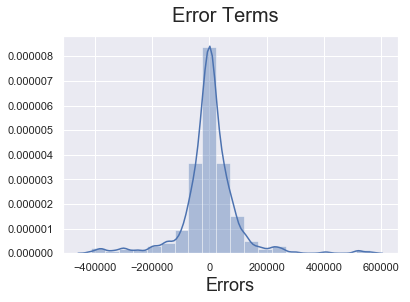

In [824]:
fig = plt.figure()
sns.distplot((y_train_game_koyck - y_train_game_koyck_1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [825]:
X_test_game_koyck_1 = X_test_game_koyck
X_test_game_koyck_1.drop(['vertical_GamingMousePad','vertical_GamingChargingStation','gmv_lag1'], axis=1, inplace=True)
X_test_game_koyck_1.columns

Index(['units', 'product_mrp', 'discount', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'Digital', 'Max Temp', 'NPS',
       'vertical_GamePad', 'vertical_GamingAccessoryKit',
       'vertical_GamingAdapter', 'vertical_GamingKeyboard',
       'vertical_GamingMemoryCard', 'vertical_GamingMouse',
       'vertical_GamingSpeaker', 'vertical_JoystickGamingWheel',
       'vertical_TVOutCableAccessory'],
      dtype='object')

In [826]:
X_test_game_koyck_2 = sm.add_constant(X_test_game_koyck_1)
y_pred_game_koyck_2 = lr.predict(X_test_game_koyck_2)
from sklearn.metrics import r2_score 
r2_score(y_test_game_koyck, y_pred_game_koyck_2)

0.9230394395660113

#### Plot for Test actual and prediction

Text(0,0.5,'y_pred_game_koyck_2')

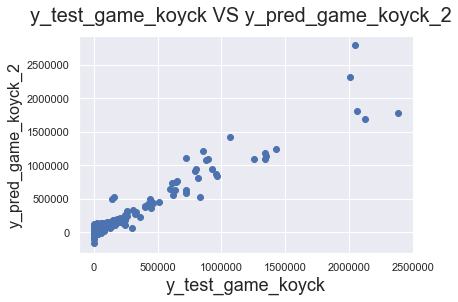

In [827]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test_game_koyck, y_pred_game_koyck_2)
fig.suptitle('y_test_game_koyck VS y_pred_game_koyck_2', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_game_koyck', fontsize = 18)                          # X-label
plt.ylabel('y_pred_game_koyck_2', fontsize = 16) 

#### Cross Validation

In [832]:
mlr = LinearRegression()
model=mlr.fit(X_train_game_koyck_rfe,y_train_game_koyck)
kfold = KFold(n_splits=10)
results = cross_val_score(model,X_test_game_koyck,y_test_game_koyck, cv=kfold)
print("Results R2: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results R2: 0.89 (0.08) MSE


#### After performing cross validation achieved R2 is 0.89 and MSE is 0.08 for Gaming Accessory dataset

### Step 34 : KOYCK model for Home

In [833]:
home_koyck = order_master_home_audio
home_koyck.head()

gmv  product_mrp  holiday_flag  pay_date_flag  discount  \
14   15729  3799.200000             0              1     21.05   
15    2988  2625.000000             0              0     33.59   
16   87628  4855.218750             0              1     39.24   
17    5699  7999.000000             0              0     28.75   
43  227398  3834.569444             0              0     19.50   

    Delivery_time_late  Delivery_time_very_late  payment_type_Prepaid  \
14                 0.0                      0.0                   5.0   
15                 1.0                      0.0                   2.0   
16                 6.0                      0.0                  31.0   
17                 0.0                      0.0                   1.0   
43                18.0                      0.0                  37.0   

               TV       Digital           ...            \
14  430660.407924  5.066027e+06           ...             
15  430660.407924  5.066027e+06           ...             
16  430660.407924  5.066027e+06           ...             
17  430660.407924  5.066027e+06           ...             
43  430660.407924  5.066027e+06           ...             

    vertical_DJController  vertical_Dock  vertical_DockingStation  \
14                    0.0            0.0                      0.0   
15                    0.0            0.0                      0.0   
16                    0.0            0.0                      0.0   
17                    0.0            0.0                      0.0   
43                    0.0            0.0                      0.0   

    vertical_FMRadio  vertical_HiFiSystem  vertical_HomeAudioSpeaker  \
14               0.0                  0.0                        0.0   
15               1.0                  0.0                        0.0   
16               0.0                  0.0                        1.0   
17               0.0                  0.0                        0.0   
43               0.0                  0.0                        0.0   

    vertical_KaraokePlayer  vertical_SlingBox  vertical_SoundMixer  \
14                     0.0                0.0                  0.0   
15                     0.0                0.0                  0.0   
16                     0.0                0.0                  0.0   
17                     0.0                0.0                  0.0   
43                     0.0                0.0                  0.0   

    vertical_VoiceRecorder  
14                     0.0  
15                     0.0  
16                     0.0  
17                     1.0  
43                     0.0  

[5 rows x 28 columns]

#### Introducing lag to gmv variable

In [834]:
home_koyck['gmv_lag1'] = home_koyck['gmv'].shift(-1)
home_koyck['gmv_lag1'] = home_koyck['gmv_lag1'].fillna((home_koyck['gmv_lag1'].median()))
home_koyck.head()

gmv  product_mrp  holiday_flag  pay_date_flag  discount  \
14   15729  3799.200000             0              1     21.05   
15    2988  2625.000000             0              0     33.59   
16   87628  4855.218750             0              1     39.24   
17    5699  7999.000000             0              0     28.75   
43  227398  3834.569444             0              0     19.50   

    Delivery_time_late  Delivery_time_very_late  payment_type_Prepaid  \
14                 0.0                      0.0                   5.0   
15                 1.0                      0.0                   2.0   
16                 6.0                      0.0                  31.0   
17                 0.0                      0.0                   1.0   
43                18.0                      0.0                  37.0   

               TV       Digital    ...     vertical_Dock  \
14  430660.407924  5.066027e+06    ...               0.0   
15  430660.407924  5.066027e+06    ...               0.0   
16  430660.407924  5.066027e+06    ...               0.0   
17  430660.407924  5.066027e+06    ...               0.0   
43  430660.407924  5.066027e+06    ...               0.0   

    vertical_DockingStation  vertical_FMRadio  vertical_HiFiSystem  \
14                      0.0               0.0                  0.0   
15                      0.0               1.0                  0.0   
16                      0.0               0.0                  0.0   
17                      0.0               0.0                  0.0   
43                      0.0               0.0                  0.0   

    vertical_HomeAudioSpeaker  vertical_KaraokePlayer  vertical_SlingBox  \
14                        0.0                     0.0                0.0   
15                        0.0                     0.0                0.0   
16                        1.0                     0.0                0.0   
17                        0.0                     0.0                0.0   
43                        0.0                     0.0                0.0   

    vertical_SoundMixer  vertical_VoiceRecorder  gmv_lag1  
14                  0.0                     0.0    2988.0  
15                  0.0                     0.0   87628.0  
16                  0.0                     0.0    5699.0  
17                  0.0                     1.0  227398.0  
43                  0.0                     0.0  108942.0  

[5 rows x 29 columns]

#### Test Train Split

In [835]:
np.random.seed(0)
df_train_home_koyck, df_test_home_koyck = train_test_split(home_koyck, train_size = 0.7, test_size = 0.3, random_state = 100)

#### MinMax Scaling of Numerical Variables

In [836]:
scaler = MinMaxScaler()

In [837]:
y_train_home_koyck = df_train_home_koyck.pop('gmv')
X_train_home_koyck = df_train_home_koyck
X_train_home_koyck.columns

Index(['product_mrp', 'holiday_flag', 'pay_date_flag', 'discount',
       'Delivery_time_late', 'Delivery_time_very_late', 'payment_type_Prepaid',
       'TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp',
       'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_DJController', 'vertical_Dock', 'vertical_DockingStation',
       'vertical_FMRadio', 'vertical_HiFiSystem', 'vertical_HomeAudioSpeaker',
       'vertical_KaraokePlayer', 'vertical_SlingBox', 'vertical_SoundMixer',
       'vertical_VoiceRecorder', 'gmv_lag1'],
      dtype='object')

In [838]:
cols = ['product_mrp','discount','Delivery_time_late','Delivery_time_very_late','payment_type_Prepaid','TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp','Total Rain', 'Total Snow', 'NPS', 'Stock Index','gmv_lag1']
X_train_home_koyck[cols] = scaler.fit_transform(X_train_home_koyck[cols])

#### VIF Check

In [839]:
X_train_home_koyck = sm.add_constant(X_train_home_koyck)
vif = pd.DataFrame()
vif['Features'] = X_train_home_koyck.columns
vif['VIF'] = [variance_inflation_factor(X_train_home_koyck.values, i) for i in range(X_train_home_koyck.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                       const  132.06
11           Online marketing   16.20
10                Sponsorship   14.10
17                Stock Index    9.24
1                 product_mrp    8.52
16                        NPS    7.75
13                   Max Temp    6.60
18      vertical_DJController    6.54
12                      Radio    5.48
9                     Digital    5.25
5          Delivery_time_late    4.40
23  vertical_HomeAudioSpeaker    3.78
7        payment_type_Prepaid    3.56
19              vertical_Dock    3.28
8                          TV    3.26
22        vertical_HiFiSystem    3.21
27     vertical_VoiceRecorder    2.94
21           vertical_FMRadio    2.91
4                    discount    2.59
28                   gmv_lag1    2.48
26        vertical_SoundMixer    2.45
20    vertical_DockingStation    2.00
6     Delivery_time_very_late    1.76
15                 Total Snow    1.70
2                holiday_flag    1.42
24     vertical_KaraokePlayer    1.30
25          vertical_SlingBox    1.18
14                 Total Rain    1.18
3               pay_date_flag    1.14

#### Dropping variables with VIF more than 5

In [840]:
#Dropping Online marketing as the VIF score is high
X_train_home_koyck = X_train_home_koyck.drop('Online marketing', 1,)
X_train_home_koyck = sm.add_constant(X_train_home_koyck)
vif = pd.DataFrame()
vif['Features'] = X_train_home_koyck.columns
vif['VIF'] = [variance_inflation_factor(X_train_home_koyck.values, i) for i in range(X_train_home_koyck.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                       const  70.26
10                Sponsorship  10.74
1                 product_mrp   8.51
17      vertical_DJController   6.54
15                        NPS   4.71
5          Delivery_time_late   4.40
9                     Digital   4.27
22  vertical_HomeAudioSpeaker   3.78
7        payment_type_Prepaid   3.56
18              vertical_Dock   3.28
21        vertical_HiFiSystem   3.21
12                   Max Temp   3.11
26     vertical_VoiceRecorder   2.93
20           vertical_FMRadio   2.91
8                          TV   2.73
4                    discount   2.59
27                   gmv_lag1   2.47
25        vertical_SoundMixer   2.45
11                      Radio   2.29
16                Stock Index   2.14
19    vertical_DockingStation   2.00
6     Delivery_time_very_late   1.76
14                 Total Snow   1.69
23     vertical_KaraokePlayer   1.30
2                holiday_flag   1.24
24          vertical_SlingBox   1.18
13                 Total Rain   1.17
3               pay_date_flag   1.14

In [841]:
#Dropping Sponsorship as the VIF score is high
X_train_home_koyck = X_train_home_koyck.drop('Sponsorship', 1,)
X_train_home_koyck = sm.add_constant(X_train_home_koyck)
vif = pd.DataFrame()
vif['Features'] = X_train_home_koyck.columns
vif['VIF'] = [variance_inflation_factor(X_train_home_koyck.values, i) for i in range(X_train_home_koyck.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                       const  49.81
1                 product_mrp   8.51
16      vertical_DJController   6.54
5          Delivery_time_late   4.39
21  vertical_HomeAudioSpeaker   3.77
7        payment_type_Prepaid   3.50
17              vertical_Dock   3.28
20        vertical_HiFiSystem   3.20
25     vertical_VoiceRecorder   2.93
19           vertical_FMRadio   2.91
4                    discount   2.59
11                   Max Temp   2.52
26                   gmv_lag1   2.46
24        vertical_SoundMixer   2.44
8                          TV   2.43
9                     Digital   2.41
14                        NPS   2.07
18    vertical_DockingStation   1.99
15                Stock Index   1.94
6     Delivery_time_very_late   1.76
13                 Total Snow   1.65
10                      Radio   1.41
22     vertical_KaraokePlayer   1.30
23          vertical_SlingBox   1.18
12                 Total Rain   1.16
2                holiday_flag   1.16
3               pay_date_flag   1.14

In [842]:
#Dropping product_mrp as the VIF score is high
X_train_home_koyck = X_train_home_koyck.drop('product_mrp', 1,)
X_train_home_koyck = sm.add_constant(X_train_home_koyck)
vif = pd.DataFrame()
vif['Features'] = X_train_home_koyck.columns
vif['VIF'] = [variance_inflation_factor(X_train_home_koyck.values, i) for i in range(X_train_home_koyck.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                       const  46.43
4          Delivery_time_late   4.39
20  vertical_HomeAudioSpeaker   3.77
6        payment_type_Prepaid   3.50
19        vertical_HiFiSystem   3.18
24     vertical_VoiceRecorder   2.89
16              vertical_Dock   2.88
3                    discount   2.57
18           vertical_FMRadio   2.54
10                   Max Temp   2.52
25                   gmv_lag1   2.46
7                          TV   2.43
8                     Digital   2.41
13                        NPS   2.06
14                Stock Index   1.94
17    vertical_DockingStation   1.83
5     Delivery_time_very_late   1.76
12                 Total Snow   1.65
15      vertical_DJController   1.65
9                       Radio   1.41
23        vertical_SoundMixer   1.27
11                 Total Rain   1.16
1                holiday_flag   1.16
22          vertical_SlingBox   1.15
21     vertical_KaraokePlayer   1.14
2               pay_date_flag   1.14

In [843]:
X_train_home_koyck.drop(['const'], axis=1, inplace =True)
X_train_home_koyck.columns

Index(['holiday_flag', 'pay_date_flag', 'discount', 'Delivery_time_late',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'TV', 'Digital',
       'Radio', 'Max Temp', 'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_DJController', 'vertical_Dock', 'vertical_DockingStation',
       'vertical_FMRadio', 'vertical_HiFiSystem', 'vertical_HomeAudioSpeaker',
       'vertical_KaraokePlayer', 'vertical_SlingBox', 'vertical_SoundMixer',
       'vertical_VoiceRecorder', 'gmv_lag1'],
      dtype='object')

In [844]:
X_train_home_koyck.shape

(323, 25)

#### Performing RFE and extracting top 20 features

In [845]:
from sklearn.feature_selection import RFE
mlr= LinearRegression()
mlr.fit(X_train_home_koyck,y_train_home_koyck)
rfe = RFE(mlr, 20)
rfe = rfe.fit(X_train_home_koyck, y_train_home_koyck)

In [846]:
list(zip(X_train_home_koyck.columns,rfe.support_,rfe.ranking_))

[('holiday_flag', True, 1),
 ('pay_date_flag', False, 5),
 ('discount', True, 1),
 ('Delivery_time_late', True, 1),
 ('Delivery_time_very_late', True, 1),
 ('payment_type_Prepaid', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Radio', False, 3),
 ('Max Temp', True, 1),
 ('Total Rain', True, 1),
 ('Total Snow', True, 1),
 ('NPS', False, 6),
 ('Stock Index', False, 4),
 ('vertical_DJController', True, 1),
 ('vertical_Dock', True, 1),
 ('vertical_DockingStation', True, 1),
 ('vertical_FMRadio', True, 1),
 ('vertical_HiFiSystem', False, 2),
 ('vertical_HomeAudioSpeaker', True, 1),
 ('vertical_KaraokePlayer', True, 1),
 ('vertical_SlingBox', True, 1),
 ('vertical_SoundMixer', True, 1),
 ('vertical_VoiceRecorder', True, 1),
 ('gmv_lag1', True, 1)]

In [847]:
X_train_home_koyck.columns[rfe.support_]

Index(['holiday_flag', 'discount', 'Delivery_time_late',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'TV', 'Digital',
       'Max Temp', 'Total Rain', 'Total Snow', 'vertical_DJController',
       'vertical_Dock', 'vertical_DockingStation', 'vertical_FMRadio',
       'vertical_HomeAudioSpeaker', 'vertical_KaraokePlayer',
       'vertical_SlingBox', 'vertical_SoundMixer', 'vertical_VoiceRecorder',
       'gmv_lag1'],
      dtype='object')

In [848]:
X_train_home_koyck_rfe = X_train_home_koyck[X_train_home_koyck.columns[rfe.support_]]
X_train_home_koyck_rfe.head()

holiday_flag  discount  Delivery_time_late  Delivery_time_very_late  \
146              0  0.480799            0.000993                 0.000000   
550              0  0.454017            0.000993                 0.000000   
1037             0  0.184073            0.010924                 0.000000   
561              0  0.523027            0.108242                 0.055556   
1794             0  0.419158            0.001986                 0.000000   

      payment_type_Prepaid        TV   Digital  Max Temp  Total Rain  \
146               0.000000  0.000000  0.129077  0.980998    0.361979   
550               0.003215  0.821775  1.000000  0.529691    0.070312   
1037              0.013934  0.578961  0.000000  0.099762    0.197917   
561               0.033226  0.821775  1.000000  0.529691    0.070312   
1794              0.001072  0.164802  0.025809  0.582423    0.168750   

      Total Snow  vertical_DJController  vertical_Dock  \
146          0.0                    1.0            0.0   
550          0.0                    0.0            0.0   
1037         0.0                    0.0            0.0   
561          0.0                    0.0            0.0   
1794         0.0                    0.0            0.0   

      vertical_DockingStation  vertical_FMRadio  vertical_HomeAudioSpeaker  \
146                       0.0               0.0                        0.0   
550                       0.0               0.0                        0.0   
1037                      0.0               0.0                        0.0   
561                       0.0               0.0                        1.0   
1794                      0.0               0.0                        0.0   

      vertical_KaraokePlayer  vertical_SlingBox  vertical_SoundMixer  \
146                      0.0                0.0                  0.0   
550                      0.0                0.0                  0.0   
1037                     0.0                0.0                  0.0   
561                      0.0                0.0                  0.0   
1794                     0.0                0.0                  1.0   

      vertical_VoiceRecorder  gmv_lag1  
146                      0.0  0.003050  
550                      0.0  0.001341  
1037                     0.0  0.003258  
561                      0.0  0.028359  
1794                     0.0  0.025736

In [849]:
y_test_home_koyck = df_test_home_koyck.pop('gmv')
X_test_home_koyck = df_test_home_koyck

In [850]:
#MinMax scaling for test dataset
X_test_home_koyck[cols] = scaler.transform(X_test_home_koyck[cols])

In [851]:
X_test_home_koyck.shape

(139, 28)

In [852]:
cols = X_train_home_koyck_rfe.columns
X_test_home_koyck = X_test_home_koyck[cols]
X_test_home_koyck.shape

(139, 20)

#### Model Building

In [853]:
import statsmodels.api as sm
# Add a constant
X_train_home_koyck_lm = sm.add_constant(X_train_home_koyck_rfe[['discount']])

In [854]:
# Create a first fitted model
lr = sm.OLS(y_train_home_koyck, X_train_home_koyck_lm).fit()
lr.params

const        13402.437085
discount    974120.791649
dtype: float64

In [855]:
# Build a linear model
X_train_home_koyck_lm = sm.add_constant(X_train_home_koyck_rfe)
lr = sm.OLS(y_train_home_koyck, X_train_home_koyck_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     97.42
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          8.09e-119
Time:                        23:42:57   Log-Likelihood:                -4638.1
No. Observations:                 323   AIC:                             9318.
Df Residuals:                     302   BIC:                             9398.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Dropping all those features with p-value greater than 0.05

In [856]:
#Dropping vertical_KaraokePlayer  variable
X_train_home_koyck_rfe.drop(['vertical_KaraokePlayer'], axis=1,inplace=True)
# Build a linear model
X_train_home_koyck_lm1 = sm.add_constant(X_train_home_koyck_rfe)
lr = sm.OLS(y_train_home_koyck, X_train_home_koyck_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     102.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          8.71e-120
Time:                        23:43:05   Log-Likelihood:                -4638.2
No. Observations:                 323   AIC:                             9316.
Df Residuals:                     303   BIC:                             9392.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [857]:
#Dropping vertical_SlingBox  variable
X_train_home_koyck_rfe.drop(['vertical_SlingBox'], axis=1,inplace=True)
# Build a linear model
X_train_home_koyck_lm1 = sm.add_constant(X_train_home_koyck_rfe)
lr = sm.OLS(y_train_home_koyck, X_train_home_koyck_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     108.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          1.49e-120
Time:                        23:43:09   Log-Likelihood:                -4638.9
No. Observations:                 323   AIC:                             9316.
Df Residuals:                     304   BIC:                             9388.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [858]:
#Dropping vertical_SoundMixer  variable
X_train_home_koyck_rfe.drop(['vertical_SoundMixer'], axis=1,inplace=True)
# Build a linear model
X_train_home_koyck_lm1 = sm.add_constant(X_train_home_koyck_rfe)
lr = sm.OLS(y_train_home_koyck, X_train_home_koyck_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     114.7
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          2.20e-121
Time:                        23:43:12   Log-Likelihood:                -4639.4
No. Observations:                 323   AIC:                             9315.
Df Residuals:                     305   BIC:                             9383.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [859]:
#Dropping vertical_DJController  variable
X_train_home_koyck_rfe.drop(['vertical_DJController'], axis=1,inplace=True)
# Build a linear model
X_train_home_koyck_lm1 = sm.add_constant(X_train_home_koyck_rfe)
lr = sm.OLS(y_train_home_koyck, X_train_home_koyck_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     121.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          5.10e-122
Time:                        23:43:14   Log-Likelihood:                -4640.4
No. Observations:                 323   AIC:                             9315.
Df Residuals:                     306   BIC:                             9379.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [860]:
#Dropping gmv_lag1  variable
X_train_home_koyck_rfe.drop(['gmv_lag1'], axis=1,inplace=True)
# Build a linear model
X_train_home_koyck_lm1 = sm.add_constant(X_train_home_koyck_rfe)
lr = sm.OLS(y_train_home_koyck, X_train_home_koyck_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     129.4
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          7.14e-123
Time:                        23:43:17   Log-Likelihood:                -4640.9
No. Observations:                 323   AIC:                             9314.
Df Residuals:                     307   BIC:                             9374.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [862]:
#Dropping TV  variable
X_train_home_koyck_rfe.drop(['TV'], axis=1,inplace=True)
# Build a linear model
X_train_home_koyck_lm1 = sm.add_constant(X_train_home_koyck_rfe)
lr = sm.OLS(y_train_home_koyck, X_train_home_koyck_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          4.07e-123
Time:                        23:43:23   Log-Likelihood:                -4642.9
No. Observations:                 323   AIC:                             9316.
Df Residuals:                     308   BIC:                             9373.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [863]:
#Dropping Total Rain  variable
X_train_home_koyck_rfe.drop(['Total Rain'], axis=1,inplace=True)
# Build a linear model
X_train_home_koyck_lm1 = sm.add_constant(X_train_home_koyck_rfe)
lr = sm.OLS(y_train_home_koyck, X_train_home_koyck_lm1).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     147.9
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          3.93e-124
Time:                        23:43:26   Log-Likelihood:                -4643.1
No. Observations:                 323   AIC:                             9314.
Df Residuals:                     309   BIC:                             9367.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [864]:
#Dropping Digital  variable
X_train_home_koyck_rfe.drop(['Digital'], axis=1,inplace=True)
# Build a linear model
X_train_home_koyck_lm1 = sm.add_constant(X_train_home_koyck_rfe)
lr = sm.OLS(y_train_home_koyck, X_train_home_koyck_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     160.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):          3.03e-125
Time:                        23:43:29   Log-Likelihood:                -4643.1
No. Observations:                 323   AIC:                             9312.
Df Residuals:                     310   BIC:                             9361.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [865]:
y_train_home_koyck_1 = lr.predict(X_train_home_koyck_lm1)

#### Checking Error term distribution

Text(0.5,0,'Errors')

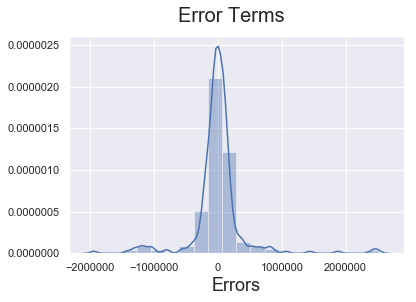

In [866]:
fig = plt.figure()
sns.distplot((y_train_home_koyck - y_train_home_koyck_1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [868]:
X_test_home_koyck_1 = X_test_home_koyck
X_test_home_koyck_1.drop(['vertical_KaraokePlayer','vertical_SlingBox','vertical_SoundMixer','vertical_DJController','gmv_lag1','TV','Total Rain','Digital'], axis=1, inplace=True)
X_test_home_koyck_1.columns

Index(['holiday_flag', 'discount', 'Delivery_time_late',
       'Delivery_time_very_late', 'payment_type_Prepaid', 'Max Temp',
       'Total Snow', 'vertical_Dock', 'vertical_DockingStation',
       'vertical_FMRadio', 'vertical_HomeAudioSpeaker',
       'vertical_VoiceRecorder'],
      dtype='object')

In [869]:
X_test_home_koyck_2 = sm.add_constant(X_test_home_koyck_1)
y_pred_home_koyck_2 = lr.predict(X_test_home_koyck_2)
from sklearn.metrics import r2_score 
r2_score(y_test_home_koyck, y_pred_home_koyck_2)

0.8608676035451919

#### Plot for Test actual and prediction

In [870]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test_home_koyck, y_pred_home_koyck_2)
fig.suptitle('y_test_home_koyck VS y_pred_home_koyck_2', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_home_koyck', fontsize = 18)                          # X-label
plt.ylabel('y_pred_home_koyck_2', fontsize = 16) 

Text(0,0.5,'y_pred_home_koyck_2')

#### Cross Validation

In [873]:
mlr = LinearRegression()
model=mlr.fit(X_train_home_koyck_rfe,y_train_home_koyck)
kfold = KFold(n_splits=3)
results = cross_val_score(model,X_test_home_koyck,y_test_home_koyck, cv=kfold)
print("Results R2: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results R2: 0.42 (0.48) MSE


#### After performing cross validation achieved R2 is 0.42 and MSE is 0.48 for Home Audio dataset

### DISTRIBUTED LAG MODEL

### Step 35 : Distributed lag model for Camera

In [874]:
camera_dist_bkp = order_master_camera

In [875]:
camera_dist = camera_dist_bkp

In [876]:
camera_dist.columns

Index(['gmv', 'units', 'product_mrp', 'holiday_flag', 'pay_date_flag',
       'discount', 'Delivery_time_late', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'TV', 'Digital', 'Sponsorship',
       'Online marketing', 'Radio', 'Max Temp', 'Total Rain', 'Total Snow',
       'NPS', 'Stock Index', 'vertical_CameraAccessory', 'vertical_CameraBag',
       'vertical_CameraBattery', 'vertical_CameraBatteryCharger',
       'vertical_CameraBatteryGrip', 'vertical_CameraEyeCup',
       'vertical_CameraFilmRolls', 'vertical_CameraHousing',
       'vertical_CameraMicrophone', 'vertical_CameraMount',
       'vertical_CameraRemoteControl', 'vertical_CameraTripod',
       'vertical_ExtensionTube', 'vertical_Filter', 'vertical_Flash',
       'vertical_FlashShoeAdapter', 'vertical_Lens',
       'vertical_ReflectorUmbrella', 'vertical_Softbox', 'vertical_Strap',
       'vertical_Teleconverter', 'vertical_Telescope', 'gmv_lag1'],
      dtype='object')

In [880]:
camera_dist.head()

gmv  units  product_mrp  holiday_flag  pay_date_flag  discount  \
0   949      1       1500.0             0              0     36.73   
1   153      1        220.0             0              0     30.45   
2  5050      2       4175.0             0              0     50.43   
3   858      4        319.5             0              0     31.35   
4   205      1        270.0             0              0     24.07   

   Delivery_time_late  Delivery_time_very_late  payment_type_Prepaid  \
0                 0.0                      0.0                   1.0   
1                 0.0                      0.0                   1.0   
2                 0.0                      0.0                   2.0   
3                 0.0                      0.0                   4.0   
4                 1.0                      0.0                   1.0   

              TV         ...          vertical_ExtensionTube  vertical_Filter  \
0  430660.407924         ...                             0.0              0.0   
1  430660.407924         ...                             0.0              0.0   
2  430660.407924         ...                             0.0              0.0   
3  430660.407924         ...                             0.0              0.0   
4  430660.407924         ...                             0.0              0.0   

   vertical_Flash  vertical_FlashShoeAdapter  vertical_Lens  \
0             0.0                        0.0            0.0   
1             0.0                        0.0            0.0   
2             0.0                        0.0            0.0   
3             0.0                        0.0            0.0   
4             0.0                        0.0            0.0   

   vertical_ReflectorUmbrella  vertical_Softbox  vertical_Strap  \
0                         0.0               0.0             0.0   
1                         0.0               0.0             0.0   
2                         0.0               0.0             0.0   
3                         0.0               0.0             0.0   
4                         0.0               0.0             0.0   

   vertical_Teleconverter  vertical_Telescope  
0                     0.0                 0.0  
1                     0.0                 0.0  
2                     0.0                 0.0  
3                     0.0                 0.0  
4                     0.0                 0.0  

[5 rows x 41 columns]

In [879]:
camera_dist = camera_dist.drop(['gmv_lag1'], axis=1)

#### Creating Lag variables

In [881]:
#GMV
camera_dist['gmv_lag_1'] = camera_dist['gmv'].shift(-1)
camera_dist['gmv_lag_2'] = camera_dist['gmv'].shift(-2)
camera_dist['gmv_lag_3'] = camera_dist['gmv'].shift(-3)

camera_dist['gmv_lag_1'] = camera_dist['gmv_lag_1'].fillna((camera_dist['gmv_lag_1'].median()))
camera_dist['gmv_lag_2'] = camera_dist['gmv_lag_2'].fillna((camera_dist['gmv_lag_2'].median()))
camera_dist['gmv_lag_3'] = camera_dist['gmv_lag_3'].fillna((camera_dist['gmv_lag_3'].median()))

#Product MRP
camera_dist['product_mrp_1'] = camera_dist['product_mrp'].shift(-1)
camera_dist['product_mrp_2'] = camera_dist['product_mrp'].shift(-2)
camera_dist['product_mrp_3'] = camera_dist['product_mrp'].shift(-3)

camera_dist['product_mrp_1'] = camera_dist['product_mrp_1'].fillna((camera_dist['product_mrp_1'].median()))
camera_dist['product_mrp_2'] = camera_dist['product_mrp_2'].fillna((camera_dist['product_mrp_2'].median()))
camera_dist['product_mrp_3'] = camera_dist['product_mrp_3'].fillna((camera_dist['product_mrp_3'].median()))

#TV
camera_dist['TV_1'] = camera_dist['TV'].shift(-1)
camera_dist['TV_2'] = camera_dist['TV'].shift(-2)
camera_dist['TV_3'] = camera_dist['TV'].shift(-3)

camera_dist['TV_1'] = camera_dist['TV_1'].fillna((camera_dist['TV_1'].median()))
camera_dist['TV_2'] = camera_dist['TV_2'].fillna((camera_dist['TV_2'].median()))
camera_dist['TV_3'] = camera_dist['TV_3'].fillna((camera_dist['TV_3'].median()))

#Digital
camera_dist['Digital_1'] = camera_dist['Digital'].shift(-1)
camera_dist['Digital_2'] = camera_dist['Digital'].shift(-2)
camera_dist['Digital_3'] = camera_dist['Digital'].shift(-3)

camera_dist['Digital_1'] = camera_dist['Digital_1'].fillna((camera_dist['Digital_1'].median()))
camera_dist['Digital_2'] = camera_dist['Digital_2'].fillna((camera_dist['Digital_2'].median()))
camera_dist['Digital_3'] = camera_dist['Digital_3'].fillna((camera_dist['Digital_3'].median()))

#Sponsorship
camera_dist['Sponsorship_1'] = camera_dist['Sponsorship'].shift(-1)
camera_dist['Sponsorship_2'] = camera_dist['Sponsorship'].shift(-2)
camera_dist['Sponsorship_3'] = camera_dist['Sponsorship'].shift(-3)

camera_dist['Sponsorship_1'] = camera_dist['Sponsorship_1'].fillna((camera_dist['Sponsorship_1'].median()))
camera_dist['Sponsorship_2'] = camera_dist['Sponsorship_2'].fillna((camera_dist['Sponsorship_2'].median()))
camera_dist['Sponsorship_3'] = camera_dist['Sponsorship_3'].fillna((camera_dist['Sponsorship_3'].median()))

#Online marketing
camera_dist['Online_marketing_1'] = camera_dist['Online marketing'].shift(-1)
camera_dist['Online_marketing_2'] = camera_dist['Online marketing'].shift(-2)
camera_dist['Online_marketing_3'] = camera_dist['Online marketing'].shift(-3)

camera_dist['Online_marketing_1'] = camera_dist['Online_marketing_1'].fillna((camera_dist['Online_marketing_1'].median()))
camera_dist['Online_marketing_2'] = camera_dist['Online_marketing_2'].fillna((camera_dist['Online_marketing_2'].median()))
camera_dist['Online_marketing_3'] = camera_dist['Online_marketing_3'].fillna((camera_dist['Online_marketing_3'].median()))

#Radio
camera_dist['Radio_1'] = camera_dist['Radio'].shift(-1)
camera_dist['Radio_2'] = camera_dist['Radio'].shift(-2)
camera_dist['Radio_3'] = camera_dist['Radio'].shift(-3)

camera_dist['Radio_1'] = camera_dist['Radio_1'].fillna((camera_dist['Radio_1'].median()))
camera_dist['Radio_2'] = camera_dist['Radio_2'].fillna((camera_dist['Radio_2'].median()))
camera_dist['Radio_3'] = camera_dist['Radio_3'].fillna((camera_dist['Radio_3'].median()))

#Max Temp
camera_dist['Max_Temp_1'] = camera_dist['Max Temp'].shift(-1)
camera_dist['Max_Temp_2'] = camera_dist['Max Temp'].shift(-2)
camera_dist['Max_Temp_3'] = camera_dist['Max Temp'].shift(-3)

camera_dist['Max_Temp_1'] = camera_dist['Max_Temp_1'].fillna((camera_dist['Max_Temp_1'].median()))
camera_dist['Max_Temp_2'] = camera_dist['Max_Temp_2'].fillna((camera_dist['Max_Temp_2'].median()))
camera_dist['Max_Temp_3'] = camera_dist['Max_Temp_3'].fillna((camera_dist['Max_Temp_3'].median()))

#Total Rain
camera_dist['Total_Rain_1'] = camera_dist['Total Rain'].shift(-1)
camera_dist['Total_Rain_2'] = camera_dist['Total Rain'].shift(-2)
camera_dist['Total_Rain_3'] = camera_dist['Total Rain'].shift(-3)

camera_dist['Total_Rain_1'] = camera_dist['Total_Rain_1'].fillna((camera_dist['Total_Rain_1'].median()))
camera_dist['Total_Rain_2'] = camera_dist['Total_Rain_2'].fillna((camera_dist['Total_Rain_2'].median()))
camera_dist['Total_Rain_3'] = camera_dist['Total_Rain_3'].fillna((camera_dist['Total_Rain_3'].median()))


#Total Snow
camera_dist['Total_Snow_1'] = camera_dist['Total Snow'].shift(-1)
camera_dist['Total_Snow_2'] = camera_dist['Total Snow'].shift(-2)
camera_dist['Total_Snow_3'] = camera_dist['Total Snow'].shift(-3)

camera_dist['Total_Snow_1'] = camera_dist['Total_Snow_1'].fillna((camera_dist['Total_Snow_1'].median()))
camera_dist['Total_Snow_2'] = camera_dist['Total_Snow_2'].fillna((camera_dist['Total_Snow_2'].median()))
camera_dist['Total_Snow_3'] = camera_dist['Total_Snow_3'].fillna((camera_dist['Total_Snow_3'].median()))

#NPS
camera_dist['NPS_1'] = camera_dist['NPS'].shift(-1)
camera_dist['NPS_2'] = camera_dist['NPS'].shift(-2)
camera_dist['NPS_3'] = camera_dist['NPS'].shift(-3)

camera_dist['NPS_1'] = camera_dist['NPS_1'].fillna((camera_dist['NPS_1'].median()))
camera_dist['NPS_2'] = camera_dist['NPS_2'].fillna((camera_dist['NPS_2'].median()))
camera_dist['NPS_3'] = camera_dist['NPS_3'].fillna((camera_dist['NPS_3'].median()))

In [882]:
camera_dist.columns

Index(['gmv', 'units', 'product_mrp', 'holiday_flag', 'pay_date_flag',
       'discount', 'Delivery_time_late', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'TV', 'Digital', 'Sponsorship',
       'Online marketing', 'Radio', 'Max Temp', 'Total Rain', 'Total Snow',
       'NPS', 'Stock Index', 'vertical_CameraAccessory', 'vertical_CameraBag',
       'vertical_CameraBattery', 'vertical_CameraBatteryCharger',
       'vertical_CameraBatteryGrip', 'vertical_CameraEyeCup',
       'vertical_CameraFilmRolls', 'vertical_CameraHousing',
       'vertical_CameraMicrophone', 'vertical_CameraMount',
       'vertical_CameraRemoteControl', 'vertical_CameraTripod',
       'vertical_ExtensionTube', 'vertical_Filter', 'vertical_Flash',
       'vertical_FlashShoeAdapter', 'vertical_Lens',
       'vertical_ReflectorUmbrella', 'vertical_Softbox', 'vertical_Strap',
       'vertical_Teleconverter', 'vertical_Telescope', 'gmv_lag_1',
       'gmv_lag_2', 'gmv_lag_3', 'product_mrp_1', 'product_mrp_2

In [883]:
camera_dist.shape

(957, 74)

In [884]:
order_master_camera.shape

(957, 42)

#### Checking correlation

In [885]:
corr = camera_dist.corr().abs()

In [886]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())


#### Test Train Split

In [887]:
np.random.seed(0)
df_train_camera_dist, df_test_camera_dist = train_test_split(camera_dist, train_size = 0.7, test_size = 0.3, random_state = 100)

#### MinMax Scaling of Numerical Variables

In [888]:
scaler = MinMaxScaler()

In [889]:
y_train_camera_dist = df_train_camera_dist.pop('gmv')
X_train_camera_dist = df_train_camera_dist
X_train_camera_dist.columns

Index(['units', 'product_mrp', 'holiday_flag', 'pay_date_flag', 'discount',
       'Delivery_time_late', 'Delivery_time_very_late', 'payment_type_Prepaid',
       'TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp',
       'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_CameraAccessory', 'vertical_CameraBag',
       'vertical_CameraBattery', 'vertical_CameraBatteryCharger',
       'vertical_CameraBatteryGrip', 'vertical_CameraEyeCup',
       'vertical_CameraFilmRolls', 'vertical_CameraHousing',
       'vertical_CameraMicrophone', 'vertical_CameraMount',
       'vertical_CameraRemoteControl', 'vertical_CameraTripod',
       'vertical_ExtensionTube', 'vertical_Filter', 'vertical_Flash',
       'vertical_FlashShoeAdapter', 'vertical_Lens',
       'vertical_ReflectorUmbrella', 'vertical_Softbox', 'vertical_Strap',
       'vertical_Teleconverter', 'vertical_Telescope', 'gmv_lag_1',
       'gmv_lag_2', 'gmv_lag_3', 'product_mrp_1', 'product_mrp_2',
    

In [890]:
cols = ['units','product_mrp','discount','Delivery_time_late','Delivery_time_very_late','payment_type_Prepaid','TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp','Total Rain', 'Total Snow', 'NPS', 'Stock Index','gmv_lag_1','gmv_lag_2', 'gmv_lag_3', 'product_mrp_1', 'product_mrp_2','product_mrp_3', 'TV_1', 'TV_2', 'TV_3', 'Digital_1', 'Digital_2','Digital_3', 'Sponsorship_1', 'Sponsorship_2', 'Sponsorship_3','Online_marketing_1', 'Online_marketing_2', 'Online_marketing_3','Radio_1', 'Radio_2', 'Radio_3', 'Max_Temp_1', 'Max_Temp_2','Max_Temp_3', 'Total_Rain_1', 'Total_Rain_2', 'Total_Rain_3','Total_Snow_1', 'Total_Snow_2', 'Total_Snow_3', 'NPS_1', 'NPS_2','NPS_3']
X_train_camera_dist[cols] = scaler.fit_transform(X_train_camera_dist[cols])

#### VIF Check

In [891]:
X_train_camera_dist = sm.add_constant(X_train_camera_dist)
vif = pd.DataFrame()
vif['Features'] = X_train_camera_dist.columns
vif['VIF'] = [variance_inflation_factor(X_train_camera_dist.values, i) for i in range(X_train_camera_dist.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
57             Online_marketing_2  670.37
58             Online_marketing_3  511.65
54                  Sponsorship_2  416.44
53                  Sponsorship_1  349.93
72                          NPS_2  324.85
48                           TV_2  261.61
56             Online_marketing_1  258.21
55                  Sponsorship_3  239.63
71                          NPS_1  229.76
51                      Digital_2  217.40
73                          NPS_3  200.90
0                           const  190.12
62                     Max_Temp_1  180.01
11                    Sponsorship  178.83
60                        Radio_2  178.47
49                           TV_3  173.05
47                           TV_1  170.24
50                      Digital_1  162.23
63                     Max_Temp_2  145.74
52                      Digital_3  134.84
12               Online marketing  132.47
61                        Radio_3  116.75
17                            NPS  111.94
14                       Max Temp  103.02
59                        Radio_1  100.37
9                              TV   85.13
10                        Digital   80.97
64                     Max_Temp_3   69.57
13                          Radio   41.70
68                   Total_Snow_1   32.83
..                            ...     ...
8            payment_type_Prepaid    2.88
32                vertical_Filter    2.75
41                      gmv_lag_1    2.71
21         vertical_CameraBattery    2.66
38                 vertical_Strap    2.63
35                  vertical_Lens    2.55
22  vertical_CameraBatteryCharger    2.51
2                     product_mrp    2.43
29   vertical_CameraRemoteControl    2.36
19       vertical_CameraAccessory    2.31
40             vertical_Telescope    2.30
42                      gmv_lag_2    2.29
31         vertical_ExtensionTube    2.29
23     vertical_CameraBatteryGrip    2.26
43                      gmv_lag_3    2.15
28           vertical_CameraMount    1.93
7         Delivery_time_very_late    1.92
20             vertical_CameraBag    1.90
24          vertical_CameraEyeCup    1.82
44                  product_mrp_1    1.71
27      vertical_CameraMicrophone    1.54
3                    holiday_flag    1.52
45                  product_mrp_2    1.45
37               vertical_Softbox    1.40
46                  product_mrp_3    1.35
36     vertical_ReflectorUmbrella    1.32
4                   pay_date_flag    1.20
26         vertical_CameraHousing    1.19
34      vertical_FlashShoeAdapter    1.11
39         vertical_Teleconverter     NaN

[74 rows x 2 columns]

In [892]:
X_train_camera_dist.drop(['const'], axis=1, inplace =True)
X_train_camera_dist.columns

Index(['units', 'product_mrp', 'holiday_flag', 'pay_date_flag', 'discount',
       'Delivery_time_late', 'Delivery_time_very_late', 'payment_type_Prepaid',
       'TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp',
       'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_CameraAccessory', 'vertical_CameraBag',
       'vertical_CameraBattery', 'vertical_CameraBatteryCharger',
       'vertical_CameraBatteryGrip', 'vertical_CameraEyeCup',
       'vertical_CameraFilmRolls', 'vertical_CameraHousing',
       'vertical_CameraMicrophone', 'vertical_CameraMount',
       'vertical_CameraRemoteControl', 'vertical_CameraTripod',
       'vertical_ExtensionTube', 'vertical_Filter', 'vertical_Flash',
       'vertical_FlashShoeAdapter', 'vertical_Lens',
       'vertical_ReflectorUmbrella', 'vertical_Softbox', 'vertical_Strap',
       'vertical_Teleconverter', 'vertical_Telescope', 'gmv_lag_1',
       'gmv_lag_2', 'gmv_lag_3', 'product_mrp_1', 'product_mrp_2',
    

In [893]:
X_train_camera_dist.shape

(669, 73)

#### Performing RFE and extracting top 20 features

In [894]:
from sklearn.feature_selection import RFE
mlr= LinearRegression()
mlr.fit(X_train_camera_dist,y_train_camera_dist)
rfe = RFE(mlr, 20)
rfe = rfe.fit(X_train_camera_dist, y_train_camera_dist)

In [895]:
list(zip(X_train_camera_dist.columns,rfe.support_,rfe.ranking_))

[('units', True, 1),
 ('product_mrp', True, 1),
 ('holiday_flag', False, 47),
 ('pay_date_flag', False, 50),
 ('discount', False, 25),
 ('Delivery_time_late', True, 1),
 ('Delivery_time_very_late', True, 1),
 ('payment_type_Prepaid', True, 1),
 ('TV', False, 8),
 ('Digital', False, 3),
 ('Sponsorship', False, 36),
 ('Online marketing', False, 9),
 ('Radio', False, 10),
 ('Max Temp', False, 37),
 ('Total Rain', False, 30),
 ('Total Snow', False, 39),
 ('NPS', True, 1),
 ('Stock Index', False, 34),
 ('vertical_CameraAccessory', False, 27),
 ('vertical_CameraBag', False, 41),
 ('vertical_CameraBattery', False, 2),
 ('vertical_CameraBatteryCharger', False, 18),
 ('vertical_CameraBatteryGrip', False, 14),
 ('vertical_CameraEyeCup', False, 22),
 ('vertical_CameraFilmRolls', False, 24),
 ('vertical_CameraHousing', False, 17),
 ('vertical_CameraMicrophone', False, 16),
 ('vertical_CameraMount', False, 15),
 ('vertical_CameraRemoteControl', False, 19),
 ('vertical_CameraTripod', False, 35),
 ('

In [896]:
X_train_camera_dist.columns[rfe.support_]

Index(['units', 'product_mrp', 'Delivery_time_late', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'NPS', 'vertical_Lens', 'gmv_lag_1',
       'product_mrp_3', 'Digital_2', 'Digital_3', 'Sponsorship_2',
       'Sponsorship_3', 'Online_marketing_2', 'Online_marketing_3',
       'Max_Temp_2', 'Max_Temp_3', 'NPS_1', 'NPS_2', 'NPS_3'],
      dtype='object')

In [897]:
X_train_camera_dist_rfe = X_train_camera_dist[X_train_camera_dist.columns[rfe.support_]]
X_train_camera_dist_rfe.head()

units  product_mrp  Delivery_time_late  Delivery_time_very_late  \
1055  0.032714     0.068019            0.051648                 0.000000   
229   0.020598     0.170043            0.004396                 0.000000   
1850  0.084814     0.058712            0.109890                 0.074074   
682   0.092892     0.052478            0.080220                 0.111111   
165   0.000404     0.032498            0.000000                 0.000000   

      payment_type_Prepaid       NPS  vertical_Lens  gmv_lag_1  product_mrp_3  \
1055              0.018957  0.172859            0.0   0.102030       0.046188   
229               0.013541  0.162106            0.0   0.191012       0.087306   
1850              0.042654  0.186581            0.0   0.145393       0.045059   
682               0.046039  0.166891            0.0   0.076711       0.039410   
165               0.000000  0.162106            0.0   0.180555       0.125494   

      Digital_2  Digital_3  Sponsorship_2  Sponsorship_3  Online_marketing_2  \
1055   0.000000   0.000000       0.037516       0.037516            0.939289   
229    0.051718   0.051718       0.588055       0.588055            0.535206   
1850   0.025809   0.025809       0.366188       0.366188            0.970227   
682    0.067355   0.067355       0.156786       0.156786            0.801580   
165    0.051718   0.051718       0.588055       0.588055            0.535206   

      Online_marketing_3  Max_Temp_2  Max_Temp_3     NPS_1     NPS_2     NPS_3  
1055            0.939289    0.080760    0.080760  0.172859  0.172859  0.172859  
229             0.535206    0.786223    0.786223  0.162106  0.162106  0.162106  
1850            0.970227    0.643705    0.643705  0.186581  0.186581  0.186581  
682             0.801580    0.315914    0.315914  0.166891  0.166891  0.166891  
165             0.535206    0.947743    0.947743  0.162106  0.162106  0.162106

In [898]:
y_test_camera_dist = df_test_camera_dist.pop('gmv')
X_test_camera_dist = df_test_camera_dist

In [899]:
#MinMax scaling for test dataset
X_test_camera_dist[cols] = scaler.transform(X_test_camera_dist[cols])

In [900]:
X_test_camera_dist.shape

(288, 73)

In [901]:
cols = X_train_camera_dist_rfe.columns
X_test_camera_dist = X_test_camera_dist[cols]

In [902]:
X_test_camera_dist.shape

(288, 20)

#### Model Building

In [903]:
import statsmodels.api as sm
# Add a constant
X_train_camera_dist_lm = sm.add_constant(X_train_camera_dist_rfe[['product_mrp']])

In [904]:
# Create a first fitted model
lr = sm.OLS(y_train_camera_dist, X_train_camera_dist_lm).fit()
lr.params

const          6.706965e+04
product_mrp    1.497287e+06
dtype: float64

In [905]:
# Build a linear model
X_train_camera_dist_lm = sm.add_constant(X_train_camera_dist_rfe)
lr = sm.OLS(y_train_camera_dist, X_train_camera_dist_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     145.5
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          4.52e-224
Time:                        00:09:32   Log-Likelihood:                -9260.1
No. Observations:                 669   AIC:                         1.856e+04
Df Residuals:                     648   BIC:                         1.866e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -5

#### Dropping all those features with p-value greater than 0.05

In [906]:
#Dropping Sponsorship_2  variable
X_train_camera_dist_rfe.drop(['Sponsorship_2'], axis=1,inplace=True)
# Build a linear model
X_train_camera_dist_lm1 = sm.add_constant(X_train_camera_dist_rfe)
lr = sm.OLS(y_train_camera_dist, X_train_camera_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          9.45e-225
Time:                        00:10:37   Log-Likelihood:                -9261.1
No. Observations:                 669   AIC:                         1.856e+04
Df Residuals:                     649   BIC:                         1.865e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

In [907]:
#Dropping Digital_3   variable
X_train_camera_dist_rfe.drop(['Digital_3'], axis=1,inplace=True)
# Build a linear model
X_train_camera_dist_lm1 = sm.add_constant(X_train_camera_dist_rfe)
lr = sm.OLS(y_train_camera_dist, X_train_camera_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     161.5
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          8.37e-226
Time:                        00:11:14   Log-Likelihood:                -9261.3
No. Observations:                 669   AIC:                         1.856e+04
Df Residuals:                     650   BIC:                         1.865e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2

In [908]:
#Dropping NPS_3  variable
X_train_camera_dist_rfe.drop(['Sponsorship_3'], axis=1,inplace=True)
# Build a linear model
X_train_camera_dist_lm1 = sm.add_constant(X_train_camera_dist_rfe)
lr = sm.OLS(y_train_camera_dist, X_train_camera_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     171.1
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          8.13e-227
Time:                        00:11:49   Log-Likelihood:                -9261.5
No. Observations:                 669   AIC:                         1.856e+04
Df Residuals:                     651   BIC:                         1.864e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3

In [909]:
#Dropping TV_1  variable
X_train_camera_dist_rfe.drop(['Online_marketing_3'], axis=1,inplace=True)
# Build a linear model
X_train_camera_dist_lm1 = sm.add_constant(X_train_camera_dist_rfe)
lr = sm.OLS(y_train_camera_dist, X_train_camera_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     181.0
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          3.07e-227
Time:                        00:12:24   Log-Likelihood:                -9263.2
No. Observations:                 669   AIC:                         1.856e+04
Df Residuals:                     652   BIC:                         1.864e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -4

In [910]:
#Dropping Max_Temp_3  variable
X_train_camera_dist_rfe.drop(['Online_marketing_2'], axis=1,inplace=True)
# Build a linear model
X_train_camera_dist_lm1 = sm.add_constant(X_train_camera_dist_rfe)
lr = sm.OLS(y_train_camera_dist, X_train_camera_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     193.2
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          2.46e-228
Time:                        00:12:55   Log-Likelihood:                -9263.3
No. Observations:                 669   AIC:                         1.856e+04
Df Residuals:                     653   BIC:                         1.863e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -6

In [911]:
#Dropping Max_Temp_2  variable
X_train_camera_dist_rfe.drop(['NPS_2'], axis=1,inplace=True)
# Build a linear model
X_train_camera_dist_lm1 = sm.add_constant(X_train_camera_dist_rfe)
lr = sm.OLS(y_train_camera_dist, X_train_camera_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     207.1
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          2.39e-229
Time:                        00:13:36   Log-Likelihood:                -9263.7
No. Observations:                 669   AIC:                         1.856e+04
Df Residuals:                     654   BIC:                         1.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -5

In [912]:
#Dropping Delivery_time_very_late  variable
X_train_camera_dist_rfe.drop(['NPS_3'], axis=1,inplace=True)
# Build a linear model
X_train_camera_dist_lm1 = sm.add_constant(X_train_camera_dist_rfe)
lr = sm.OLS(y_train_camera_dist, X_train_camera_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     222.4
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          5.12e-230
Time:                        00:14:12   Log-Likelihood:                -9264.9
No. Observations:                 669   AIC:                         1.856e+04
Df Residuals:                     655   BIC:                         1.862e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -9

In [913]:
y_train_camera_dist_1 = lr.predict(X_train_camera_dist_lm1)

#### Checking Error term distribution

Text(0.5,0,'Errors')

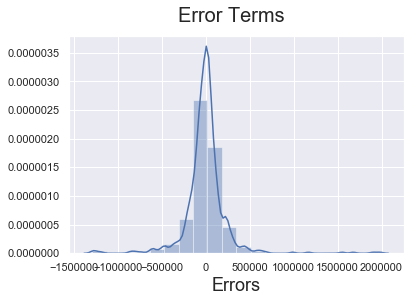

In [914]:
fig = plt.figure()
sns.distplot((y_train_camera_dist - y_train_camera_dist_1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [915]:
X_test_camera_dist_1 = X_test_camera_dist
X_test_camera_dist_1.drop(['Sponsorship_2','Digital_3', 'Sponsorship_3', 'Online_marketing_3', 'Online_marketing_2', 'NPS_2', 'NPS_3'], axis=1, inplace=True)
X_test_camera_dist_1.columns


Index(['units', 'product_mrp', 'Delivery_time_late', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'NPS', 'vertical_Lens', 'gmv_lag_1',
       'product_mrp_3', 'Digital_2', 'Max_Temp_2', 'Max_Temp_3', 'NPS_1'],
      dtype='object')

In [916]:
X_test_camera_dist_2 = sm.add_constant(X_test_camera_dist_1)
y_pred_camera_dist_2 = lr.predict(X_test_camera_dist_2)
from sklearn.metrics import r2_score 
r2_score(y_test_camera_dist, y_pred_camera_dist_2)

0.7889224298551313

#### Plot for Test actual and prediction

Text(0,0.5,'y_pred_camera_dist_2')

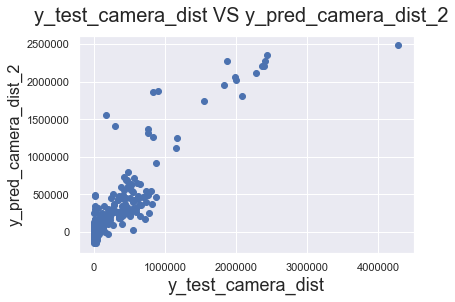

In [917]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test_camera_dist, y_pred_camera_dist_2)
fig.suptitle('y_test_camera_dist VS y_pred_camera_dist_2', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_camera_dist', fontsize = 18)                          # X-label
plt.ylabel('y_pred_camera_dist_2', fontsize = 16)

#### Cross Validation

In [919]:
mlr = LinearRegression()
model=mlr.fit(X_train_camera_dist_rfe,y_train_camera_dist)
kfold = KFold(n_splits=5)
results = cross_val_score(model,X_test_camera_dist,y_test_camera_dist, cv=kfold)
print("Results R2: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results R2: 0.74 (0.20) MSE


#### After performing cross validation achieved R2 is 0.74 and MSE is 0.20 for Camera Accessory dataset

### Step 36 :Distributed lag model for Game

In [920]:
game_dist = order_master_gaming
game_dist.head()

gmv  units   product_mrp  holiday_flag  pay_date_flag   list_price  \
8   17524     15   1987.266667             0              1  1168.266667   
9    1299      2   1049.000000             0              0   649.500000   
10  11387      4  15847.000000             0              0  2846.750000   
11    799      1    900.000000             0              0   799.000000   
12   3333      4    971.000000             0              1   833.250000   

    discount  Delivery_time_very_late  payment_type_Prepaid             TV  \
8      32.65                      0.0                  15.0  430660.407924   
9      44.14                      0.0                   2.0  430660.407924   
10     40.22                      0.0                   4.0  430660.407924   
11     11.22                      0.0                   1.0  430660.407924   
12     17.74                      0.0                   4.0  430660.407924   

      ...     vertical_GamingHeadset  vertical_GamingKeyboard  \
8     ...                        0.0                      0.0   
9     ...                        0.0                      0.0   
10    ...                        1.0                      0.0   
11    ...                        0.0                      1.0   
12    ...                        0.0                      0.0   

    vertical_GamingMemoryCard  vertical_GamingMouse  vertical_GamingMousePad  \
8                         0.0                   0.0                      0.0   
9                         0.0                   0.0                      0.0   
10                        0.0                   0.0                      0.0   
11                        0.0                   0.0                      0.0   
12                        0.0                   1.0                      0.0   

    vertical_GamingSpeaker  vertical_JoystickGamingWheel  \
8                      0.0                           0.0   
9                      0.0                           0.0   
10                     0.0                           0.0   
11                     0.0                           0.0   
12                     0.0                           0.0   

    vertical_MotionController  vertical_TVOutCableAccessory  gmv_lag1  
8                         0.0                           0.0    1299.0  
9                         0.0                           0.0   11387.0  
10                        0.0                           0.0     799.0  
11                        0.0                           0.0    3333.0  
12                        0.0                           0.0    2389.0  

[5 rows x 34 columns]

In [921]:
game_dist.columns

Index(['gmv', 'units', 'product_mrp', 'holiday_flag', 'pay_date_flag',
       'list_price', 'discount', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'TV', 'Digital', 'Sponsorship',
       'Online marketing', 'Radio', 'Max Temp', 'Total Rain', 'Total Snow',
       'NPS', 'Stock Index', 'vertical_GameControlMount', 'vertical_GamePad',
       'vertical_GamingAccessoryKit', 'vertical_GamingAdapter',
       'vertical_GamingChargingStation', 'vertical_GamingHeadset',
       'vertical_GamingKeyboard', 'vertical_GamingMemoryCard',
       'vertical_GamingMouse', 'vertical_GamingMousePad',
       'vertical_GamingSpeaker', 'vertical_JoystickGamingWheel',
       'vertical_MotionController', 'vertical_TVOutCableAccessory',
       'gmv_lag1'],
      dtype='object')

#### Adding Lag variables

In [922]:
#GMV
game_dist['gmv_lag_1'] = game_dist['gmv'].shift(-1)
game_dist['gmv_lag_2'] = game_dist['gmv'].shift(-2)
game_dist['gmv_lag_3'] = game_dist['gmv'].shift(-3)

game_dist['gmv_lag_1'] = game_dist['gmv_lag_1'].fillna((game_dist['gmv_lag_1'].median()))
game_dist['gmv_lag_2'] = game_dist['gmv_lag_2'].fillna((game_dist['gmv_lag_2'].median()))
game_dist['gmv_lag_3'] = game_dist['gmv_lag_3'].fillna((game_dist['gmv_lag_3'].median()))

#Units
game_dist['units_1'] = game_dist['units'].shift(-1)
game_dist['units_2'] = game_dist['units'].shift(-2)
game_dist['units_3'] = game_dist['units'].shift(-3)

game_dist['units_1'] = game_dist['units_1'].fillna((game_dist['units_1'].median()))
game_dist['units_2'] = game_dist['units_2'].fillna((game_dist['units_2'].median()))
game_dist['units_3'] = game_dist['units_3'].fillna((game_dist['units_3'].median()))

#Product MRP
game_dist['product_mrp_1'] = game_dist['product_mrp'].shift(-1)
game_dist['product_mrp_2'] = game_dist['product_mrp'].shift(-2)
game_dist['product_mrp_3'] = game_dist['product_mrp'].shift(-3)

game_dist['product_mrp_1'] = game_dist['product_mrp_1'].fillna((game_dist['product_mrp_1'].median()))
game_dist['product_mrp_2'] = game_dist['product_mrp_2'].fillna((game_dist['product_mrp_2'].median()))
game_dist['product_mrp_3'] = game_dist['product_mrp_3'].fillna((game_dist['product_mrp_3'].median()))


#List Price
game_dist['list_price_1'] = game_dist['list_price'].shift(-1)
game_dist['list_price_2'] = game_dist['list_price'].shift(-2)
game_dist['list_price_3'] = game_dist['list_price'].shift(-3)

game_dist['list_price_1'] = game_dist['list_price_1'].fillna((game_dist['list_price_1'].median()))
game_dist['list_price_2'] = game_dist['list_price_2'].fillna((game_dist['list_price_2'].median()))
game_dist['list_price_3'] = game_dist['list_price_3'].fillna((game_dist['list_price_3'].median()))

#discount
game_dist['discount_1'] = game_dist['discount'].shift(-1)
game_dist['discount_2'] = game_dist['discount'].shift(-2)
game_dist['discount_3'] = game_dist['discount'].shift(-3)

game_dist['discount_1'] = game_dist['discount_1'].fillna((game_dist['discount_1'].median()))
game_dist['discount_2'] = game_dist['discount_2'].fillna((game_dist['discount_2'].median()))
game_dist['discount_3'] = game_dist['discount_3'].fillna((game_dist['discount_3'].median()))

#TV
game_dist['TV_1'] = game_dist['TV'].shift(-1)
game_dist['TV_2'] = game_dist['TV'].shift(-2)
game_dist['TV_3'] = game_dist['TV'].shift(-3)

game_dist['TV_1'] = game_dist['TV_1'].fillna((game_dist['TV_1'].median()))
game_dist['TV_2'] = game_dist['TV_2'].fillna((game_dist['TV_2'].median()))
game_dist['TV_3'] = game_dist['TV_3'].fillna((game_dist['TV_3'].median()))

#Digital
game_dist['Digital_1'] = game_dist['Digital'].shift(-1)
game_dist['Digital_2'] = game_dist['Digital'].shift(-2)
game_dist['Digital_3'] = game_dist['Digital'].shift(-3)

game_dist['Digital_1'] = game_dist['Digital_1'].fillna((game_dist['Digital_1'].median()))
game_dist['Digital_2'] = game_dist['Digital_2'].fillna((game_dist['Digital_2'].median()))
game_dist['Digital_3'] = game_dist['Digital_3'].fillna((game_dist['Digital_3'].median()))

#Sponsorship
game_dist['Sponsorship_1'] = game_dist['Sponsorship'].shift(-1)
game_dist['Sponsorship_2'] = game_dist['Sponsorship'].shift(-2)
game_dist['Sponsorship_3'] = game_dist['Sponsorship'].shift(-3)

game_dist['Sponsorship_1'] = game_dist['Sponsorship_1'].fillna((game_dist['Sponsorship_1'].median()))
game_dist['Sponsorship_2'] = game_dist['Sponsorship_2'].fillna((game_dist['Sponsorship_2'].median()))
game_dist['Sponsorship_3'] = game_dist['Sponsorship_3'].fillna((game_dist['Sponsorship_3'].median()))

#Online marketing
game_dist['Online_marketing_1'] = game_dist['Online marketing'].shift(-1)
game_dist['Online_marketing_2'] = game_dist['Online marketing'].shift(-2)
game_dist['Online_marketing_3'] = game_dist['Online marketing'].shift(-3)

game_dist['Online_marketing_1'] = game_dist['Online_marketing_1'].fillna((game_dist['Online_marketing_1'].median()))
game_dist['Online_marketing_2'] = game_dist['Online_marketing_2'].fillna((game_dist['Online_marketing_2'].median()))
game_dist['Online_marketing_3'] = game_dist['Online_marketing_3'].fillna((game_dist['Online_marketing_3'].median()))

#Radio
game_dist['Radio_1'] = game_dist['Radio'].shift(-1)
game_dist['Radio_2'] = game_dist['Radio'].shift(-2)
game_dist['Radio_3'] = game_dist['Radio'].shift(-3)

game_dist['Radio_1'] = game_dist['Radio_1'].fillna((game_dist['Radio_1'].median()))
game_dist['Radio_2'] = game_dist['Radio_2'].fillna((game_dist['Radio_2'].median()))
game_dist['Radio_3'] = game_dist['Radio_3'].fillna((game_dist['Radio_3'].median()))

#Max Temp
game_dist['Max_Temp_1'] = game_dist['Max Temp'].shift(-1)
game_dist['Max_Temp_2'] = game_dist['Max Temp'].shift(-2)
game_dist['Max_Temp_3'] = game_dist['Max Temp'].shift(-3)

game_dist['Max_Temp_1'] = game_dist['Max_Temp_1'].fillna((game_dist['Max_Temp_1'].median()))
game_dist['Max_Temp_2'] = game_dist['Max_Temp_2'].fillna((game_dist['Max_Temp_2'].median()))
game_dist['Max_Temp_3'] = game_dist['Max_Temp_3'].fillna((game_dist['Max_Temp_3'].median()))

#Total Rain
game_dist['Total_Rain_1'] = game_dist['Total Rain'].shift(-1)
game_dist['Total_Rain_2'] = game_dist['Total Rain'].shift(-2)
game_dist['Total_Rain_3'] = game_dist['Total Rain'].shift(-3)

game_dist['Total_Rain_1'] = game_dist['Total_Rain_1'].fillna((game_dist['Total_Rain_1'].median()))
game_dist['Total_Rain_2'] = game_dist['Total_Rain_2'].fillna((game_dist['Total_Rain_2'].median()))
game_dist['Total_Rain_3'] = game_dist['Total_Rain_3'].fillna((game_dist['Total_Rain_3'].median()))


#Total Snow
game_dist['Total_Snow_1'] = game_dist['Total Snow'].shift(-1)
game_dist['Total_Snow_2'] = game_dist['Total Snow'].shift(-2)
game_dist['Total_Snow_3'] = game_dist['Total Snow'].shift(-3)

game_dist['Total_Snow_1'] = game_dist['Total_Snow_1'].fillna((game_dist['Total_Snow_1'].median()))
game_dist['Total_Snow_2'] = game_dist['Total_Snow_2'].fillna((game_dist['Total_Snow_2'].median()))
game_dist['Total_Snow_3'] = game_dist['Total_Snow_3'].fillna((game_dist['Total_Snow_3'].median()))

#NPS
game_dist['NPS_1'] = game_dist['NPS'].shift(-1)
game_dist['NPS_2'] = game_dist['NPS'].shift(-2)
game_dist['NPS_3'] = game_dist['NPS'].shift(-3)

game_dist['NPS_1'] = game_dist['NPS_1'].fillna((game_dist['NPS_1'].median()))
game_dist['NPS_2'] = game_dist['NPS_2'].fillna((game_dist['NPS_2'].median()))
game_dist['NPS_3'] = game_dist['NPS_3'].fillna((game_dist['NPS_3'].median()))

#Stock Index
game_dist['Stock Index_1'] = game_dist['Stock Index'].shift(-1)
game_dist['Stock Index_2'] = game_dist['Stock Index'].shift(-2)
game_dist['Stock Index_3'] = game_dist['Stock Index'].shift(-3)

game_dist['Stock Index_1'] = game_dist['Stock Index_1'].fillna((game_dist['Stock Index_1'].median()))
game_dist['Stock Index_2'] = game_dist['Stock Index_2'].fillna((game_dist['Stock Index_2'].median()))
game_dist['Stock Index_3'] = game_dist['Stock Index_3'].fillna((game_dist['Stock Index_3'].median()))

In [923]:
game_dist.columns

Index(['gmv', 'units', 'product_mrp', 'holiday_flag', 'pay_date_flag',
       'list_price', 'discount', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'TV', 'Digital', 'Sponsorship',
       'Online marketing', 'Radio', 'Max Temp', 'Total Rain', 'Total Snow',
       'NPS', 'Stock Index', 'vertical_GameControlMount', 'vertical_GamePad',
       'vertical_GamingAccessoryKit', 'vertical_GamingAdapter',
       'vertical_GamingChargingStation', 'vertical_GamingHeadset',
       'vertical_GamingKeyboard', 'vertical_GamingMemoryCard',
       'vertical_GamingMouse', 'vertical_GamingMousePad',
       'vertical_GamingSpeaker', 'vertical_JoystickGamingWheel',
       'vertical_MotionController', 'vertical_TVOutCableAccessory', 'gmv_lag1',
       'gmv_lag_1', 'gmv_lag_2', 'gmv_lag_3', 'units_1', 'units_2', 'units_3',
       'product_mrp_1', 'product_mrp_2', 'product_mrp_3', 'list_price_1',
       'list_price_2', 'list_price_3', 'discount_1', 'discount_2',
       'discount_3', 'TV_1', 'TV_2'

#### Test Train Split

In [924]:
np.random.seed(0)
df_train_game_dist, df_test_game_dist = train_test_split(game_dist, train_size = 0.7, test_size = 0.3, random_state = 100)

#### MinMax Scaling of Numerical Variables

In [925]:
scaler = MinMaxScaler()

In [926]:
y_train_game_dist = df_train_game_dist.pop('gmv')
X_train_game_dist = df_train_game_dist
X_train_game_dist.columns

Index(['units', 'product_mrp', 'holiday_flag', 'pay_date_flag', 'list_price',
       'discount', 'Delivery_time_very_late', 'payment_type_Prepaid', 'TV',
       'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp',
       'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_GameControlMount', 'vertical_GamePad',
       'vertical_GamingAccessoryKit', 'vertical_GamingAdapter',
       'vertical_GamingChargingStation', 'vertical_GamingHeadset',
       'vertical_GamingKeyboard', 'vertical_GamingMemoryCard',
       'vertical_GamingMouse', 'vertical_GamingMousePad',
       'vertical_GamingSpeaker', 'vertical_JoystickGamingWheel',
       'vertical_MotionController', 'vertical_TVOutCableAccessory', 'gmv_lag1',
       'gmv_lag_1', 'gmv_lag_2', 'gmv_lag_3', 'units_1', 'units_2', 'units_3',
       'product_mrp_1', 'product_mrp_2', 'product_mrp_3', 'list_price_1',
       'list_price_2', 'list_price_3', 'discount_1', 'discount_2',
       'discount_3', 'TV_1', 'TV_2', 'TV_3

In [927]:
cols = ['units', 'product_mrp', 'holiday_flag', 'pay_date_flag', 'list_price','discount', 'Delivery_time_very_late', 'payment_type_Prepaid', 'TV','Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp','Total Rain', 'Total Snow', 'NPS', 'Stock Index','gmv_lag_1', 'gmv_lag_2', 'gmv_lag_3', 'units_1', 'units_2', 'units_3','product_mrp_1', 'product_mrp_2', 'product_mrp_3', 'list_price_1','list_price_2', 'list_price_3', 'discount_1', 'discount_2','discount_3', 'TV_1', 'TV_2', 'TV_3', 'Digital_1', 'Digital_2','Digital_3', 'Sponsorship_1', 'Sponsorship_2', 'Sponsorship_3','Online_marketing_1', 'Online_marketing_2', 'Online_marketing_3','Radio_1', 'Radio_2', 'Radio_3', 'Max_Temp_1', 'Max_Temp_2','Max_Temp_3', 'Total_Rain_1', 'Total_Rain_2', 'Total_Rain_3','Total_Snow_1', 'Total_Snow_2', 'Total_Snow_3', 'NPS_1', 'NPS_2','NPS_3', 'Stock Index_1', 'Stock Index_2', 'Stock Index_3']
X_train_game_dist[cols] = scaler.fit_transform(X_train_game_dist[cols])

In [929]:
X_train_game_dist = X_train_game_dist.drop(['gmv_lag1'], axis =1)

In [931]:
df_test_game_dist = df_test_game_dist.drop(['gmv_lag1'], axis =1)

#### VIF Check

In [932]:
X_train_game_dist = sm.add_constant(X_train_game_dist)
vif = pd.DataFrame()
vif['Features'] = X_train_game_dist.columns
vif['VIF'] = [variance_inflation_factor(X_train_game_dist.values, i) for i in range(X_train_game_dist.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
54                   Sponsorship_1  2426.58
11                     Sponsorship  2013.54
55                   Sponsorship_2  1205.08
57              Online_marketing_1  1131.39
75                   Stock Index_1  1107.79
51                       Digital_1  1095.88
10                         Digital  1015.24
12                Online marketing   912.99
18                     Stock Index   908.60
76                   Stock Index_2   724.20
56                   Sponsorship_3   659.60
58              Online_marketing_2   584.33
60                         Radio_1   576.49
77                   Stock Index_3   517.34
13                           Radio   454.06
52                       Digital_2   425.82
59              Online_marketing_3   341.60
61                         Radio_2   324.32
53                       Digital_3   316.93
73                           NPS_2   263.52
0                            const   243.07
72                           NPS_1   213.21
62                         Radio_3   170.17
74                           NPS_3   169.25
49                            TV_2   148.86
48                            TV_1   146.80
63                      Max_Temp_1   127.90
17                             NPS   124.27
64                      Max_Temp_2   110.65
50                            TV_3    89.49
..                             ...      ...
27            vertical_GamingMouse     8.12
31       vertical_MotionController     7.97
20                vertical_GamePad     7.92
68                    Total_Rain_3     7.87
15                      Total Rain     7.74
21     vertical_GamingAccessoryKit     7.12
42                    list_price_1     7.05
28         vertical_GamingMousePad     6.99
22          vertical_GamingAdapter     6.71
25         vertical_GamingKeyboard     6.54
26       vertical_GamingMemoryCard     6.03
1                            units     5.85
29          vertical_GamingSpeaker     5.84
2                      product_mrp     5.62
43                    list_price_2     5.43
32    vertical_TVOutCableAccessory     5.43
44                    list_price_3     4.80
6                         discount     4.62
39                   product_mrp_1     4.33
40                   product_mrp_2     4.06
41                   product_mrp_3     3.87
23  vertical_GamingChargingStation     3.76
45                      discount_1     3.43
8             payment_type_Prepaid     3.27
47                      discount_3     2.84
7          Delivery_time_very_late     2.82
46                      discount_2     2.65
3                     holiday_flag     1.74
4                    pay_date_flag     1.23
19       vertical_GameControlMount     1.10

[78 rows x 2 columns]

In [933]:
X_train_game_dist.drop(['const'], axis=1, inplace =True)
X_train_game_dist.columns


Index(['units', 'product_mrp', 'holiday_flag', 'pay_date_flag', 'list_price',
       'discount', 'Delivery_time_very_late', 'payment_type_Prepaid', 'TV',
       'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp',
       'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_GameControlMount', 'vertical_GamePad',
       'vertical_GamingAccessoryKit', 'vertical_GamingAdapter',
       'vertical_GamingChargingStation', 'vertical_GamingHeadset',
       'vertical_GamingKeyboard', 'vertical_GamingMemoryCard',
       'vertical_GamingMouse', 'vertical_GamingMousePad',
       'vertical_GamingSpeaker', 'vertical_JoystickGamingWheel',
       'vertical_MotionController', 'vertical_TVOutCableAccessory',
       'gmv_lag_1', 'gmv_lag_2', 'gmv_lag_3', 'units_1', 'units_2', 'units_3',
       'product_mrp_1', 'product_mrp_2', 'product_mrp_3', 'list_price_1',
       'list_price_2', 'list_price_3', 'discount_1', 'discount_2',
       'discount_3', 'TV_1', 'TV_2', 'TV_3', 'Digital_

In [934]:
X_train_game_dist.shape

(506, 77)

#### Performing RFE and extracting top 20 features

In [935]:
from sklearn.feature_selection import RFE
mlr= LinearRegression()
mlr.fit(X_train_game_dist,y_train_game_dist)
rfe = RFE(mlr, 20)
rfe = rfe.fit(X_train_game_dist, y_train_game_dist)

In [936]:
list(zip(X_train_game_dist.columns,rfe.support_,rfe.ranking_))

[('units', True, 1),
 ('product_mrp', True, 1),
 ('holiday_flag', False, 38),
 ('pay_date_flag', False, 57),
 ('list_price', False, 8),
 ('discount', True, 1),
 ('Delivery_time_very_late', True, 1),
 ('payment_type_Prepaid', True, 1),
 ('TV', False, 12),
 ('Digital', True, 1),
 ('Sponsorship', True, 1),
 ('Online marketing', False, 43),
 ('Radio', False, 37),
 ('Max Temp', False, 31),
 ('Total Rain', False, 46),
 ('Total Snow', False, 28),
 ('NPS', False, 30),
 ('Stock Index', False, 9),
 ('vertical_GameControlMount', False, 39),
 ('vertical_GamePad', True, 1),
 ('vertical_GamingAccessoryKit', False, 20),
 ('vertical_GamingAdapter', False, 21),
 ('vertical_GamingChargingStation', False, 15),
 ('vertical_GamingHeadset', True, 1),
 ('vertical_GamingKeyboard', False, 50),
 ('vertical_GamingMemoryCard', False, 40),
 ('vertical_GamingMouse', False, 41),
 ('vertical_GamingMousePad', False, 13),
 ('vertical_GamingSpeaker', False, 17),
 ('vertical_JoystickGamingWheel', False, 19),
 ('vertical_

In [937]:
X_train_game_dist.columns[rfe.support_]

Index(['units', 'product_mrp', 'discount', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'Digital', 'Sponsorship', 'vertical_GamePad',
       'vertical_GamingHeadset', 'gmv_lag_1', 'gmv_lag_3', 'units_1',
       'units_3', 'Digital_1', 'Digital_2', 'Sponsorship_1', 'Sponsorship_2',
       'NPS_1', 'NPS_2', 'Stock Index_1'],
      dtype='object')

In [938]:
X_train_game_dist_rfe = X_train_game_dist[X_train_game_dist.columns[rfe.support_]]
X_train_game_dist_rfe.head()

units  product_mrp  discount  Delivery_time_very_late  \
1220  0.326501     0.085311  0.337883                 0.129032   
2138  0.007911     0.393794  0.384483                 0.000000   
1815  0.000000     0.038155  0.499816                 0.000000   
311   0.113269     0.024654  0.453953                 0.000000   
1716  0.103560     0.065761  0.460839                 0.064516   

      payment_type_Prepaid   Digital  Sponsorship  vertical_GamePad  \
1220              0.153540  0.119727     0.127525               1.0   
2138              0.004773  0.055941     0.226955               0.0   
1815              0.000000  0.025809     0.366188               0.0   
311               0.070008  0.051718     0.588055               0.0   
1716              0.116150  0.034183     0.278020               0.0   

      vertical_GamingHeadset  gmv_lag_1  gmv_lag_3   units_1   units_3  \
1220                     0.0   0.067941   0.001965  0.032767  0.000893   
2138                     0.0   0.010929   0.028274  0.014590  0.023512   
1815                     0.0   0.563013   0.034611  0.257116  0.026488   
311                      0.0   0.454758   0.038978  0.202105  0.041964   
1716                     0.0   0.010347   0.005823  0.007414  0.004762   

      Digital_1  Digital_2  Sponsorship_1  Sponsorship_2     NPS_1     NPS_2  \
1220   0.119727   0.119727       0.127525       0.127525  0.380340  0.380340   
2138   0.055941   0.067355       0.226955       0.366188  0.392483  0.186581   
1815   0.025809   0.025809       0.366188       0.366188  0.186581  0.186581   
311    0.051718   0.051718       0.588055       0.588055  0.162106  0.162106   
1716   0.034183   0.034183       0.278020       0.278020  0.476577  0.476577   

      Stock Index_1  
1220       0.911894  
2138       0.788546  
1815       0.938326  
311        0.378855  
1716       1.000000

In [939]:
y_test_game_dist = df_test_game_dist.pop('gmv')
X_test_game_dist = df_test_game_dist

In [940]:
#MinMax scaling for test dataset
X_test_game_dist[cols] = scaler.transform(X_test_game_dist[cols])

In [941]:
X_test_game_dist.shape

(218, 77)

In [942]:
cols = X_train_game_dist_rfe.columns
X_test_game_dist = X_test_game_dist[cols]
X_test_game_dist.shape

(218, 20)

#### Model Building

In [943]:
import statsmodels.api as sm
# Add a constant
X_train_game_dist_lm = sm.add_constant(X_train_game_dist_rfe[['discount']])

In [944]:
# Create a first fitted model
lr = sm.OLS(y_train_game_dist, X_train_game_dist_lm).fit()
lr.params

const       217475.006190
discount      8034.496809
dtype: float64

In [945]:
# Build a linear model
X_train_game_dist_lm = sm.add_constant(X_train_game_dist_rfe)
lr = sm.OLS(y_train_game_dist, X_train_game_dist_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     298.6
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          1.06e-257
Time:                        00:36:10   Log-Likelihood:                -6531.1
No. Observations:                 506   AIC:                         1.310e+04
Df Residuals:                     485   BIC:                         1.319e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    7

#### Dropping all those features with p-value greater than 0.05

In [946]:
#Dropping gmv_lag_3  variable
X_train_game_dist_rfe.drop(['Digital_2'], axis=1,inplace=True)
# Build a linear model
X_train_game_dist_lm1 = sm.add_constant(X_train_game_dist_rfe)
lr = sm.OLS(y_train_game_dist, X_train_game_dist_lm1).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     314.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          6.46e-259
Time:                        00:36:49   Log-Likelihood:                -6531.2
No. Observations:                 506   AIC:                         1.310e+04
Df Residuals:                     486   BIC:                         1.319e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    6

In [947]:
#Dropping product_mrp_3  variable
X_train_game_dist_rfe.drop(['Digital'], axis=1,inplace=True)
# Build a linear model
X_train_game_dist_lm1 = sm.add_constant(X_train_game_dist_rfe)
lr = sm.OLS(y_train_game_dist, X_train_game_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     332.7
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          4.42e-260
Time:                        00:37:28   Log-Likelihood:                -6531.5
No. Observations:                 506   AIC:                         1.310e+04
Df Residuals:                     487   BIC:                         1.318e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    7

In [948]:
#Dropping list_price_3  variable
X_train_game_dist_rfe.drop(['NPS_2'], axis=1,inplace=True)
# Build a linear model
X_train_game_dist_lm1 = sm.add_constant(X_train_game_dist_rfe)
lr = sm.OLS(y_train_game_dist, X_train_game_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     352.3
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          3.53e-261
Time:                        00:38:03   Log-Likelihood:                -6531.9
No. Observations:                 506   AIC:                         1.310e+04
Df Residuals:                     488   BIC:                         1.318e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    7

In [949]:
#Dropping units_3  variable
X_train_game_dist_rfe.drop(['Sponsorship'], axis=1,inplace=True)
# Build a linear model
X_train_game_dist_lm1 = sm.add_constant(X_train_game_dist_rfe)
lr = sm.OLS(y_train_game_dist, X_train_game_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     374.2
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          3.14e-262
Time:                        00:38:39   Log-Likelihood:                -6532.5
No. Observations:                 506   AIC:                         1.310e+04
Df Residuals:                     489   BIC:                         1.317e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    7

In [950]:
#Dropping units_1  variable
X_train_game_dist_rfe.drop(['units_1'], axis=1,inplace=True)
# Build a linear model
X_train_game_dist_lm1 = sm.add_constant(X_train_game_dist_rfe)
lr = sm.OLS(y_train_game_dist, X_train_game_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     398.4
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          3.82e-263
Time:                        00:39:17   Log-Likelihood:                -6533.4
No. Observations:                 506   AIC:                         1.310e+04
Df Residuals:                     490   BIC:                         1.317e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    7

In [951]:
#Dropping list_price  variable
X_train_game_dist_rfe.drop(['Stock Index_1'], axis=1,inplace=True)
# Build a linear model
X_train_game_dist_lm1 = sm.add_constant(X_train_game_dist_rfe)
lr = sm.OLS(y_train_game_dist, X_train_game_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     425.4
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          6.15e-264
Time:                        00:39:52   Log-Likelihood:                -6534.7
No. Observations:                 506   AIC:                         1.310e+04
Df Residuals:                     491   BIC:                         1.316e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    7

In [952]:
#Dropping list_price_2  variable
X_train_game_dist_rfe.drop(['Digital_1'], axis=1,inplace=True)
# Build a linear model
X_train_game_dist_lm1 = sm.add_constant(X_train_game_dist_rfe)
lr = sm.OLS(y_train_game_dist, X_train_game_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     456.7
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          8.88e-265
Time:                        00:40:33   Log-Likelihood:                -6535.9
No. Observations:                 506   AIC:                         1.310e+04
Df Residuals:                     492   BIC:                         1.316e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    8

In [953]:
#Dropping product_mrp_2  variable
X_train_game_dist_rfe.drop(['units_3'], axis=1,inplace=True)
# Build a linear model
X_train_game_dist_lm1 = sm.add_constant(X_train_game_dist_rfe)
lr = sm.OLS(y_train_game_dist, X_train_game_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     491.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          2.28e-265
Time:                        00:41:15   Log-Likelihood:                -6537.7
No. Observations:                 506   AIC:                         1.310e+04
Df Residuals:                     493   BIC:                         1.316e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    8

In [954]:
#Dropping product_mrp_2  variable
X_train_game_dist_rfe.drop(['gmv_lag_3'], axis=1,inplace=True)
# Build a linear model
X_train_game_dist_lm1 = sm.add_constant(X_train_game_dist_rfe)
lr = sm.OLS(y_train_game_dist, X_train_game_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     537.2
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          1.22e-266
Time:                        00:42:27   Log-Likelihood:                -6538.0
No. Observations:                 506   AIC:                         1.310e+04
Df Residuals:                     494   BIC:                         1.315e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    8

In [955]:
y_train_game_dist_1 = lr.predict(X_train_game_dist_lm1)

#### Checking Error term distribution

Text(0.5,0,'Errors')

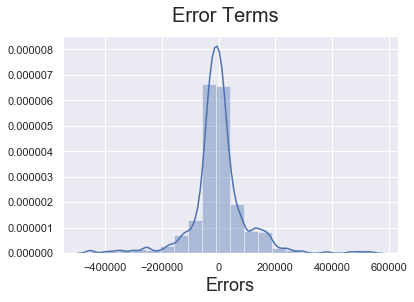

In [956]:
fig = plt.figure()
sns.distplot((y_train_game_dist - y_train_game_dist_1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [957]:
X_test_game_dist_1 = X_test_game_dist
X_test_game_dist_1.drop(['Digital_2','Digital','NPS_2','Sponsorship', 'units_1', 'Stock Index_1','Digital_1','units_3','gmv_lag_3'], axis=1, inplace=True)
X_test_game_dist_1.columns

Index(['units', 'product_mrp', 'discount', 'Delivery_time_very_late',
       'payment_type_Prepaid', 'vertical_GamePad', 'vertical_GamingHeadset',
       'gmv_lag_1', 'Sponsorship_1', 'Sponsorship_2', 'NPS_1'],
      dtype='object')

In [958]:
X_test_game_dist_2 = sm.add_constant(X_test_game_dist_1)
y_pred_game_dist_2 = lr.predict(X_test_game_dist_2)
from sklearn.metrics import r2_score 
r2_score(y_test_game_dist, y_pred_game_dist_2)

0.9039722412414972

#### Plot for Test actual and prediction

In [959]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test_game_dist, y_pred_game_dist_2)
fig.suptitle('y_test_game_dist VS y_pred_game_dist_2', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_game_dist', fontsize = 18)                          # X-label
plt.ylabel('y_pred_game_dist_2', fontsize = 16) 


Text(0,0.5,'y_pred_game_dist_2')

#### Cross Validation

In [961]:
mlr = LinearRegression()
model=mlr.fit(X_train_game_dist_rfe,y_train_game_dist)
kfold = KFold(n_splits=5)
results = cross_val_score(model,X_test_game_dist,y_test_game_dist, cv=kfold)
print("Results R2: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results R2: 0.91 (0.04) MSE


#### After performing cross validation achieved R2 is 0.91 and MSE is 0.04 for Gaming Accessory dataset

### Step 37 : Distributed lag model for Home

In [962]:
home_dist = order_master_home_audio
home_dist.head()

gmv  product_mrp  holiday_flag  pay_date_flag  discount  \
14   15729  3799.200000             0              1     21.05   
15    2988  2625.000000             0              0     33.59   
16   87628  4855.218750             0              1     39.24   
17    5699  7999.000000             0              0     28.75   
43  227398  3834.569444             0              0     19.50   

    Delivery_time_late  Delivery_time_very_late  payment_type_Prepaid  \
14                 0.0                      0.0                   5.0   
15                 1.0                      0.0                   2.0   
16                 6.0                      0.0                  31.0   
17                 0.0                      0.0                   1.0   
43                18.0                      0.0                  37.0   

               TV       Digital    ...     vertical_Dock  \
14  430660.407924  5.066027e+06    ...               0.0   
15  430660.407924  5.066027e+06    ...               0.0   
16  430660.407924  5.066027e+06    ...               0.0   
17  430660.407924  5.066027e+06    ...               0.0   
43  430660.407924  5.066027e+06    ...               0.0   

    vertical_DockingStation  vertical_FMRadio  vertical_HiFiSystem  \
14                      0.0               0.0                  0.0   
15                      0.0               1.0                  0.0   
16                      0.0               0.0                  0.0   
17                      0.0               0.0                  0.0   
43                      0.0               0.0                  0.0   

    vertical_HomeAudioSpeaker  vertical_KaraokePlayer  vertical_SlingBox  \
14                        0.0                     0.0                0.0   
15                        0.0                     0.0                0.0   
16                        1.0                     0.0                0.0   
17                        0.0                     0.0                0.0   
43                        0.0                     0.0                0.0   

    vertical_SoundMixer  vertical_VoiceRecorder  gmv_lag1  
14                  0.0                     0.0    2988.0  
15                  0.0                     0.0   87628.0  
16                  0.0                     0.0    5699.0  
17                  0.0                     1.0  227398.0  
43                  0.0                     0.0  108942.0  

[5 rows x 29 columns]

In [963]:
home_dist.columns

Index(['gmv', 'product_mrp', 'holiday_flag', 'pay_date_flag', 'discount',
       'Delivery_time_late', 'Delivery_time_very_late', 'payment_type_Prepaid',
       'TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp',
       'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_DJController', 'vertical_Dock', 'vertical_DockingStation',
       'vertical_FMRadio', 'vertical_HiFiSystem', 'vertical_HomeAudioSpeaker',
       'vertical_KaraokePlayer', 'vertical_SlingBox', 'vertical_SoundMixer',
       'vertical_VoiceRecorder', 'gmv_lag1'],
      dtype='object')

In [964]:
home_dist.drop(['gmv_lag1'], axis=1, inplace=True)

In [965]:
home_dist.columns

Index(['gmv', 'product_mrp', 'holiday_flag', 'pay_date_flag', 'discount',
       'Delivery_time_late', 'Delivery_time_very_late', 'payment_type_Prepaid',
       'TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp',
       'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_DJController', 'vertical_Dock', 'vertical_DockingStation',
       'vertical_FMRadio', 'vertical_HiFiSystem', 'vertical_HomeAudioSpeaker',
       'vertical_KaraokePlayer', 'vertical_SlingBox', 'vertical_SoundMixer',
       'vertical_VoiceRecorder'],
      dtype='object')

#### Adding Lag variables

In [966]:
#GMV
home_dist['gmv_lag_1'] = home_dist['gmv'].shift(-1)
home_dist['gmv_lag_2'] = home_dist['gmv'].shift(-2)
home_dist['gmv_lag_3'] = home_dist['gmv'].shift(-3)

home_dist['gmv_lag_1'].fillna((home_dist['gmv_lag_1'].median()), inplace=True)
home_dist['gmv_lag_2'].fillna((home_dist['gmv_lag_2'].median()), inplace=True)
home_dist['gmv_lag_3'].fillna((home_dist['gmv_lag_3'].median()), inplace=True)

#Product MRP
home_dist['product_mrp_1'] = home_dist['product_mrp'].shift(-1)
home_dist['product_mrp_2'] = home_dist['product_mrp'].shift(-2)
home_dist['product_mrp_3'] = home_dist['product_mrp'].shift(-3)

home_dist['product_mrp_1'].fillna((home_dist['product_mrp_1'].median()), inplace=True)
home_dist['product_mrp_2'].fillna((home_dist['product_mrp_2'].median()), inplace=True)
home_dist['product_mrp_3'].fillna((home_dist['product_mrp_3'].median()), inplace=True)

#discount
home_dist['discount_1'] = home_dist['discount'].shift(-1)
home_dist['discount_2'] = home_dist['discount'].shift(-2)
home_dist['discount_3'] = home_dist['discount'].shift(-3)

home_dist['discount_1'].fillna((home_dist['discount_1'].median()), inplace=True)
home_dist['discount_2'].fillna((home_dist['discount_2'].median()), inplace=True)
home_dist['discount_3'].fillna((home_dist['discount_3'].median()), inplace=True)

#TV
home_dist['TV_1'] = home_dist['TV'].shift(-1)
home_dist['TV_2'] = home_dist['TV'].shift(-2)
home_dist['TV_3'] = home_dist['TV'].shift(-3)

home_dist['TV_1'].fillna((home_dist['TV_1'].median()), inplace=True)
home_dist['TV_2'].fillna((home_dist['TV_2'].median()), inplace=True)
home_dist['TV_3'].fillna((home_dist['TV_3'].median()), inplace=True)

#Digital
home_dist['Digital_1'] = home_dist['Digital'].shift(-1)
home_dist['Digital_2'] = home_dist['Digital'].shift(-2)
home_dist['Digital_3'] = home_dist['Digital'].shift(-3)

home_dist['Digital_1'].fillna((home_dist['Digital_1'].median()), inplace=True)
home_dist['Digital_2'].fillna((home_dist['Digital_2'].median()), inplace=True)
home_dist['Digital_3'].fillna((home_dist['Digital_3'].median()), inplace=True)

#Sponsorship
home_dist['Sponsorship_1'] = home_dist['Sponsorship'].shift(-1)
home_dist['Sponsorship_2'] = home_dist['Sponsorship'].shift(-2)
home_dist['Sponsorship_3'] = home_dist['Sponsorship'].shift(-3)

home_dist['Sponsorship_1'].fillna((home_dist['Sponsorship_1'].median()), inplace=True)
home_dist['Sponsorship_2'].fillna((home_dist['Sponsorship_2'].median()), inplace=True)
home_dist['Sponsorship_3'].fillna((home_dist['Sponsorship_3'].median()), inplace=True)

#Online marketing
home_dist['Online_marketing_1'] = home_dist['Online marketing'].shift(-1)
home_dist['Online_marketing_2'] = home_dist['Online marketing'].shift(-2)
home_dist['Online_marketing_3'] = home_dist['Online marketing'].shift(-3)

home_dist['Online_marketing_1'].fillna((home_dist['Online_marketing_1'].median()), inplace=True)
home_dist['Online_marketing_2'].fillna((home_dist['Online_marketing_2'].median()), inplace=True)
home_dist['Online_marketing_3'].fillna((home_dist['Online_marketing_3'].median()), inplace=True)

#Radio
home_dist['Radio_1'] = home_dist['Radio'].shift(-1)
home_dist['Radio_2'] = home_dist['Radio'].shift(-2)
home_dist['Radio_3'] = home_dist['Radio'].shift(-3)

home_dist['Radio_1'].fillna((home_dist['Radio_1'].median()), inplace=True)
home_dist['Radio_2'].fillna((home_dist['Radio_2'].median()), inplace=True)
home_dist['Radio_3'].fillna((home_dist['Radio_3'].median()), inplace=True)

#Max Temp
home_dist['Max_Temp_1'] = home_dist['Max Temp'].shift(-1)
home_dist['Max_Temp_2'] = home_dist['Max Temp'].shift(-2)
home_dist['Max_Temp_3'] = home_dist['Max Temp'].shift(-3)

home_dist['Max_Temp_1'].fillna((home_dist['Max_Temp_1'].median()), inplace=True)
home_dist['Max_Temp_2'].fillna((home_dist['Max_Temp_2'].median()), inplace=True)
home_dist['Max_Temp_3'].fillna((home_dist['Max_Temp_3'].median()), inplace=True)

#Total Rain
home_dist['Total_Rain_1'] = home_dist['Total Rain'].shift(-1)
home_dist['Total_Rain_2'] = home_dist['Total Rain'].shift(-2)
home_dist['Total_Rain_3'] = home_dist['Total Rain'].shift(-3)

home_dist['Total_Rain_1'].fillna((home_dist['Total_Rain_1'].median()), inplace=True)
home_dist['Total_Rain_2'].fillna((home_dist['Total_Rain_2'].median()), inplace=True)
home_dist['Total_Rain_3'].fillna((home_dist['Total_Rain_3'].median()), inplace=True)


#Total Snow
home_dist['Total_Snow_1'] = home_dist['Total Snow'].shift(-1)
home_dist['Total_Snow_2'] = home_dist['Total Snow'].shift(-2)
home_dist['Total_Snow_3'] = home_dist['Total Snow'].shift(-3)

home_dist['Total_Snow_1'].fillna((home_dist['Total_Snow_1'].median()), inplace=True)
home_dist['Total_Snow_2'].fillna((home_dist['Total_Snow_2'].median()), inplace=True)
home_dist['Total_Snow_3'].fillna((home_dist['Total_Snow_3'].median()), inplace=True)

#NPS
home_dist['NPS_1'] = home_dist['NPS'].shift(-1)
home_dist['NPS_2'] = home_dist['NPS'].shift(-2)
home_dist['NPS_3'] = home_dist['NPS'].shift(-3)

home_dist['NPS_1'].fillna((home_dist['NPS_1'].median()), inplace=True)
home_dist['NPS_2'].fillna((home_dist['NPS_2'].median()), inplace=True)
home_dist['NPS_3'].fillna((home_dist['NPS_3'].median()), inplace=True)

#Stock Index
home_dist['Stock Index_1'] = home_dist['Stock Index'].shift(-1)
home_dist['Stock Index_2'] = home_dist['Stock Index'].shift(-2)
home_dist['Stock Index_3'] = home_dist['Stock Index'].shift(-3)

home_dist['Stock Index_1'].fillna((home_dist['Stock Index_1'].median()), inplace=True)
home_dist['Stock Index_2'].fillna((home_dist['Stock Index_2'].median()), inplace=True)
home_dist['Stock Index_3'].fillna((home_dist['Stock Index_3'].median()), inplace=True)

In [967]:
home_dist.columns

Index(['gmv', 'product_mrp', 'holiday_flag', 'pay_date_flag', 'discount',
       'Delivery_time_late', 'Delivery_time_very_late', 'payment_type_Prepaid',
       'TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp',
       'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_DJController', 'vertical_Dock', 'vertical_DockingStation',
       'vertical_FMRadio', 'vertical_HiFiSystem', 'vertical_HomeAudioSpeaker',
       'vertical_KaraokePlayer', 'vertical_SlingBox', 'vertical_SoundMixer',
       'vertical_VoiceRecorder', 'gmv_lag_1', 'gmv_lag_2', 'gmv_lag_3',
       'product_mrp_1', 'product_mrp_2', 'product_mrp_3', 'discount_1',
       'discount_2', 'discount_3', 'TV_1', 'TV_2', 'TV_3', 'Digital_1',
       'Digital_2', 'Digital_3', 'Sponsorship_1', 'Sponsorship_2',
       'Sponsorship_3', 'Online_marketing_1', 'Online_marketing_2',
       'Online_marketing_3', 'Radio_1', 'Radio_2', 'Radio_3', 'Max_Temp_1',
       'Max_Temp_2', 'Max_Temp_3', 'Total_Rain_1',

#### Test Train Split

In [968]:
np.random.seed(0)
df_train_home_dist, df_test_home_dist = train_test_split(home_dist, train_size = 0.7, test_size = 0.3, random_state = 100)

#### MinMax Scaling of Numerical Variables

In [969]:
scaler = MinMaxScaler()

In [970]:
y_train_home_dist = df_train_home_dist.pop('gmv')
X_train_home_dist = df_train_home_dist
X_train_home_dist.columns

Index(['product_mrp', 'holiday_flag', 'pay_date_flag', 'discount',
       'Delivery_time_late', 'Delivery_time_very_late', 'payment_type_Prepaid',
       'TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp',
       'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_DJController', 'vertical_Dock', 'vertical_DockingStation',
       'vertical_FMRadio', 'vertical_HiFiSystem', 'vertical_HomeAudioSpeaker',
       'vertical_KaraokePlayer', 'vertical_SlingBox', 'vertical_SoundMixer',
       'vertical_VoiceRecorder', 'gmv_lag_1', 'gmv_lag_2', 'gmv_lag_3',
       'product_mrp_1', 'product_mrp_2', 'product_mrp_3', 'discount_1',
       'discount_2', 'discount_3', 'TV_1', 'TV_2', 'TV_3', 'Digital_1',
       'Digital_2', 'Digital_3', 'Sponsorship_1', 'Sponsorship_2',
       'Sponsorship_3', 'Online_marketing_1', 'Online_marketing_2',
       'Online_marketing_3', 'Radio_1', 'Radio_2', 'Radio_3', 'Max_Temp_1',
       'Max_Temp_2', 'Max_Temp_3', 'Total_Rain_1', 'Total

In [971]:
cols = ['product_mrp','discount','Delivery_time_late','Delivery_time_very_late','payment_type_Prepaid','TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp','Total Rain', 'Total Snow', 'NPS', 'Stock Index','gmv_lag_1', 'gmv_lag_2', 'gmv_lag_3','product_mrp_1', 'product_mrp_2', 'product_mrp_3', 'discount_1','discount_2', 'discount_3', 'TV_1', 'TV_2', 'TV_3', 'Digital_1','Digital_2', 'Digital_3', 'Sponsorship_1', 'Sponsorship_2','Sponsorship_3', 'Online_marketing_1', 'Online_marketing_2','Online_marketing_3', 'Radio_1', 'Radio_2', 'Radio_3', 'Max_Temp_1','Max_Temp_2', 'Max_Temp_3', 'Total_Rain_1', 'Total_Rain_2','Total_Rain_3', 'Total_Snow_1', 'Total_Snow_2', 'Total_Snow_3', 'NPS_1','NPS_2', 'NPS_3', 'Stock Index_1', 'Stock Index_2', 'Stock Index_3']
X_train_home_dist[cols] = scaler.fit_transform(X_train_home_dist[cols])

#### VIF Check

In [972]:
X_train_home_dist = sm.add_constant(X_train_home_dist)
vif = pd.DataFrame()
vif['Features'] = X_train_home_dist.columns
vif['VIF'] = [variance_inflation_factor(X_train_home_dist.values, i) for i in range(X_train_home_dist.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
65              Stock Index_2  6078.02
66              Stock Index_3  5401.87
44              Sponsorship_2  3407.88
45              Sponsorship_3  3126.52
47         Online_marketing_2  2732.48
48         Online_marketing_3  2187.68
41                  Digital_2  2155.25
42                  Digital_3  1997.04
50                    Radio_2  1837.70
51                    Radio_3  1094.28
49                    Radio_1   751.68
64              Stock Index_1   749.51
46         Online_marketing_1   719.81
62                      NPS_2   662.90
16                        NPS   635.98
38                       TV_2   599.56
61                      NPS_1   500.86
39                       TV_3   463.21
43              Sponsorship_1   452.99
63                      NPS_3   405.36
11           Online marketing   316.50
0                       const   263.98
10                Sponsorship   253.75
17                Stock Index   237.72
40                  Digital_1   233.57
37                       TV_1   227.78
9                     Digital   134.95
53                 Max_Temp_2   110.13
8                          TV   100.02
12                      Radio    78.35
..                        ...      ...
60               Total_Snow_3    10.40
1                 product_mrp    10.04
15                 Total Snow     8.80
18      vertical_DJController     8.70
57               Total_Rain_3     5.76
14                 Total Rain     5.60
5          Delivery_time_late     5.40
19              vertical_Dock     5.03
21           vertical_FMRadio     4.99
23  vertical_HomeAudioSpeaker     4.86
27     vertical_VoiceRecorder     4.64
22        vertical_HiFiSystem     4.60
20    vertical_DockingStation     4.18
7        payment_type_Prepaid     4.05
26        vertical_SoundMixer     3.99
28                  gmv_lag_1     3.68
4                    discount     3.11
29                  gmv_lag_2     2.91
31              product_mrp_1     2.80
32              product_mrp_2     2.58
34                 discount_1     2.51
35                 discount_2     2.23
33              product_mrp_3     2.17
30                  gmv_lag_3     2.13
6     Delivery_time_very_late     2.04
36                 discount_3     1.83
2                holiday_flag     1.75
25          vertical_SlingBox     1.46
24     vertical_KaraokePlayer     1.39
3               pay_date_flag     1.25

[67 rows x 2 columns]

In [973]:
X_train_home_dist.drop(['const'], axis=1, inplace =True)
X_train_home_dist.columns

Index(['product_mrp', 'holiday_flag', 'pay_date_flag', 'discount',
       'Delivery_time_late', 'Delivery_time_very_late', 'payment_type_Prepaid',
       'TV', 'Digital', 'Sponsorship', 'Online marketing', 'Radio', 'Max Temp',
       'Total Rain', 'Total Snow', 'NPS', 'Stock Index',
       'vertical_DJController', 'vertical_Dock', 'vertical_DockingStation',
       'vertical_FMRadio', 'vertical_HiFiSystem', 'vertical_HomeAudioSpeaker',
       'vertical_KaraokePlayer', 'vertical_SlingBox', 'vertical_SoundMixer',
       'vertical_VoiceRecorder', 'gmv_lag_1', 'gmv_lag_2', 'gmv_lag_3',
       'product_mrp_1', 'product_mrp_2', 'product_mrp_3', 'discount_1',
       'discount_2', 'discount_3', 'TV_1', 'TV_2', 'TV_3', 'Digital_1',
       'Digital_2', 'Digital_3', 'Sponsorship_1', 'Sponsorship_2',
       'Sponsorship_3', 'Online_marketing_1', 'Online_marketing_2',
       'Online_marketing_3', 'Radio_1', 'Radio_2', 'Radio_3', 'Max_Temp_1',
       'Max_Temp_2', 'Max_Temp_3', 'Total_Rain_1', 'Total

#### Performing RFE and extracting top 25 features

In [974]:
from sklearn.feature_selection import RFE
mlr= LinearRegression()
mlr.fit(X_train_home_dist,y_train_home_dist)
rfe = RFE(mlr, 25)
rfe = rfe.fit(X_train_home_dist, y_train_home_dist)

In [975]:
list(zip(X_train_home_dist.columns,rfe.support_,rfe.ranking_))

[('product_mrp', False, 16),
 ('holiday_flag', False, 40),
 ('pay_date_flag', False, 41),
 ('discount', False, 13),
 ('Delivery_time_late', True, 1),
 ('Delivery_time_very_late', True, 1),
 ('payment_type_Prepaid', False, 6),
 ('TV', False, 36),
 ('Digital', False, 35),
 ('Sponsorship', False, 23),
 ('Online marketing', False, 25),
 ('Radio', False, 24),
 ('Max Temp', False, 8),
 ('Total Rain', False, 42),
 ('Total Snow', False, 37),
 ('NPS', False, 39),
 ('Stock Index', False, 26),
 ('vertical_DJController', False, 18),
 ('vertical_Dock', False, 20),
 ('vertical_DockingStation', False, 33),
 ('vertical_FMRadio', False, 7),
 ('vertical_HiFiSystem', False, 11),
 ('vertical_HomeAudioSpeaker', True, 1),
 ('vertical_KaraokePlayer', False, 29),
 ('vertical_SlingBox', False, 12),
 ('vertical_SoundMixer', False, 19),
 ('vertical_VoiceRecorder', False, 22),
 ('gmv_lag_1', False, 10),
 ('gmv_lag_2', True, 1),
 ('gmv_lag_3', False, 21),
 ('product_mrp_1', False, 14),
 ('product_mrp_2', False, 31

In [976]:
X_train_home_dist.columns[rfe.support_]

Index(['Delivery_time_late', 'Delivery_time_very_late',
       'vertical_HomeAudioSpeaker', 'gmv_lag_2', 'TV_1', 'TV_2', 'TV_3',
       'Digital_2', 'Digital_3', 'Sponsorship_2', 'Sponsorship_3',
       'Online_marketing_1', 'Online_marketing_2', 'Online_marketing_3',
       'Radio_1', 'Radio_2', 'Radio_3', 'Max_Temp_1', 'Max_Temp_2',
       'Max_Temp_3', 'NPS_1', 'NPS_3', 'Stock Index_1', 'Stock Index_2',
       'Stock Index_3'],
      dtype='object')

In [977]:
X_train_home_dist_rfe = X_train_home_dist[X_train_home_dist.columns[rfe.support_]]
X_train_home_dist_rfe.head()

Delivery_time_late  Delivery_time_very_late  vertical_HomeAudioSpeaker  \
146             0.000993                 0.000000                        0.0   
550             0.000993                 0.000000                        0.0   
1037            0.010924                 0.000000                        0.0   
561             0.108242                 0.055556                        1.0   
1794            0.001986                 0.000000                        0.0   

      gmv_lag_2      TV_1      TV_2      TV_3  Digital_2  Digital_3  \
146    0.059102  0.022308  0.000000  0.022308   0.129077   0.129077   
550    0.005174  0.825751  0.821775  0.825751   1.000000   1.000000   
1037   0.000792  0.588353  0.578961  0.588353   0.000000   0.000000   
561    0.003386  0.825751  0.821775  0.566914   1.000000   0.067355   
1794   0.019325  0.183433  0.164802  0.183433   0.025809   0.025809   

      Sponsorship_2      ...         Radio_2   Radio_3  Max_Temp_1  \
146        0.021516      ...        0.000000  0.000000    0.980998   
550        1.000000      ...        0.000000  0.000000    0.529691   
1037       0.000000      ...        1.000000  1.000000    0.099762   
561        1.000000      ...        0.000000  0.000000    0.529691   
1794       0.341483      ...        0.407407  0.407407    0.582423   

      Max_Temp_2  Max_Temp_3     NPS_1     NPS_3  Stock Index_1  \
146     0.980998    0.980998  0.654397  0.654397       0.713656   
550     0.529691    0.529691  0.000000  0.000000       0.859031   
1037    0.099762    0.099762  0.172859  0.172859       0.162996   
561     0.529691    0.636580  0.000000  0.166891       0.859031   
1794    0.572447    0.572447  0.186581  0.186581       0.938326   

      Stock Index_2  Stock Index_3  
146        0.713656       0.713656  
550        0.859031       0.859031  
1037       0.162996       0.162996  
561        0.859031       0.960352  
1794       0.938326       0.938326  

[5 rows x 25 columns]

In [978]:
y_test_home_dist = df_test_home_dist.pop('gmv')
X_test_home_dist = df_test_home_dist

In [979]:
#MinMax scaling for test dataset
X_test_home_dist[cols] = scaler.transform(X_test_home_dist[cols])

In [980]:
X_test_home_dist.shape

(139, 66)

In [981]:
cols = X_train_home_dist_rfe.columns
X_test_home_dist = X_test_home_dist[cols]
X_test_home_dist.shape

(139, 25)

#### Model Building

In [982]:
import statsmodels.api as sm
# Add a constant
X_train_home_dist_lm = sm.add_constant(X_train_home_dist_rfe[['Delivery_time_late']])

In [983]:
# Create a first fitted model
lr = sm.OLS(y_train_home_dist, X_train_home_dist_lm).fit()
lr.params

const                 3.656172e+04
Delivery_time_late    5.246955e+06
dtype: float64

In [984]:
# Build a linear model
X_train_home_dist_lm = sm.add_constant(X_train_home_dist_rfe)
lr = sm.OLS(y_train_home_dist, X_train_home_dist_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     86.14
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          2.01e-120
Time:                        00:49:29   Log-Likelihood:                -4621.7
No. Observations:                 323   AIC:                             9295.
Df Residuals:                     297   BIC:                             9394.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Dropping all those features with p-value greater than 0.05

In [985]:
#Dropping TV_3  variable
X_train_home_dist_rfe.drop(['TV_3'], axis=1,inplace=True)
# Build a linear model
X_train_home_dist_lm1 = sm.add_constant(X_train_home_dist_rfe)
lr = sm.OLS(y_train_home_dist, X_train_home_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     87.42
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          9.38e-120
Time:                        00:49:34   Log-Likelihood:                -4625.8
No. Observations:                 323   AIC:                             9302.
Df Residuals:                     298   BIC:                             9396.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [986]:
#Dropping Stock Index_2  variable
X_train_home_dist_rfe.drop(['Stock Index_2'], axis=1,inplace=True)
# Build a linear model
X_train_home_dist_lm1 = sm.add_constant(X_train_home_dist_rfe)
lr = sm.OLS(y_train_home_dist, X_train_home_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     90.79
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          2.77e-120
Time:                        00:49:37   Log-Likelihood:                -4627.0
No. Observations:                 323   AIC:                             9302.
Df Residuals:                     299   BIC:                             9393.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [987]:
#Dropping Digital_2  variable
X_train_home_dist_rfe.drop(['Digital_2'], axis=1,inplace=True)
# Build a linear model
X_train_home_dist_lm1 = sm.add_constant(X_train_home_dist_rfe)
lr = sm.OLS(y_train_home_dist, X_train_home_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     93.80
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          2.01e-120
Time:                        00:49:40   Log-Likelihood:                -4629.1
No. Observations:                 323   AIC:                             9304.
Df Residuals:                     300   BIC:                             9391.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [988]:
#Dropping Radio_2  variable
X_train_home_dist_rfe.drop(['Radio_2'], axis=1,inplace=True)
# Build a linear model
X_train_home_dist_lm1 = sm.add_constant(X_train_home_dist_rfe)
lr = sm.OLS(y_train_home_dist, X_train_home_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     98.12
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          3.76e-121
Time:                        00:49:43   Log-Likelihood:                -4629.8
No. Observations:                 323   AIC:                             9304.
Df Residuals:                     301   BIC:                             9387.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [989]:
#Dropping Sponsorship_2  variable
X_train_home_dist_rfe.drop(['Sponsorship_2'], axis=1,inplace=True)
# Build a linear model
X_train_home_dist_lm1 = sm.add_constant(X_train_home_dist_rfe)
lr = sm.OLS(y_train_home_dist, X_train_home_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     97.89
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          4.37e-119
Time:                        00:49:46   Log-Likelihood:                -4637.5
No. Observations:                 323   AIC:                             9317.
Df Residuals:                     302   BIC:                             9396.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [990]:
#Dropping Online_marketing_2  variable
X_train_home_dist_rfe.drop(['Online_marketing_2'], axis=1,inplace=True)
# Build a linear model
X_train_home_dist_lm1 = sm.add_constant(X_train_home_dist_rfe)
lr = sm.OLS(y_train_home_dist, X_train_home_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          5.41e-120
Time:                        00:49:49   Log-Likelihood:                -4637.7
No. Observations:                 323   AIC:                             9315.
Df Residuals:                     303   BIC:                             9391.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [991]:
#Dropping Digital_3  variable
X_train_home_dist_rfe.drop(['Digital_3'], axis=1,inplace=True)
# Build a linear model
X_train_home_dist_lm1 = sm.add_constant(X_train_home_dist_rfe)
lr = sm.OLS(y_train_home_dist, X_train_home_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     107.9
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          2.82e-120
Time:                        00:49:51   Log-Likelihood:                -4639.6
No. Observations:                 323   AIC:                             9317.
Df Residuals:                     304   BIC:                             9389.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [992]:
#Dropping Stock Index_3  variable
X_train_home_dist_rfe.drop(['Stock Index_3'], axis=1,inplace=True)
# Build a linear model
X_train_home_dist_lm1 = sm.add_constant(X_train_home_dist_rfe)
lr = sm.OLS(y_train_home_dist, X_train_home_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     113.7
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          7.41e-121
Time:                        00:49:53   Log-Likelihood:                -4640.7
No. Observations:                 323   AIC:                             9317.
Df Residuals:                     305   BIC:                             9385.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [993]:
#Dropping Radio_3  variable
X_train_home_dist_rfe.drop(['Radio_3'], axis=1,inplace=True)
# Build a linear model
X_train_home_dist_lm1 = sm.add_constant(X_train_home_dist_rfe)
lr = sm.OLS(y_train_home_dist, X_train_home_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     120.5
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          1.29e-121
Time:                        00:49:58   Log-Likelihood:                -4641.4
No. Observations:                 323   AIC:                             9317.
Df Residuals:                     306   BIC:                             9381.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [994]:
#Dropping Sponsorship_3  variable
X_train_home_dist_rfe.drop(['Sponsorship_3'], axis=1,inplace=True)
# Build a linear model
X_train_home_dist_lm1 = sm.add_constant(X_train_home_dist_rfe)
lr = sm.OLS(y_train_home_dist, X_train_home_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     129.0
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          1.14e-122
Time:                        00:50:01   Log-Likelihood:                -4641.4
No. Observations:                 323   AIC:                             9315.
Df Residuals:                     307   BIC:                             9375.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [995]:
#Dropping Online_marketing_3  variable
X_train_home_dist_rfe.drop(['Online_marketing_3'], axis=1,inplace=True)
# Build a linear model
X_train_home_dist_lm1 = sm.add_constant(X_train_home_dist_rfe)
lr = sm.OLS(y_train_home_dist, X_train_home_dist_lm1).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          4.17e-123
Time:                        00:50:03   Log-Likelihood:                -4643.0
No. Observations:                 323   AIC:                             9316.
Df Residuals:                     308   BIC:                             9373.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [996]:
y_train_home_dist_1 = lr.predict(X_train_home_dist_lm1)

#### Checking Error term distribution

In [997]:
fig = plt.figure()
sns.distplot((y_train_home_dist - y_train_home_dist_1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Text(0.5,0,'Errors')

In [998]:
X_test_home_dist_1 = X_test_home_dist
X_test_home_dist_1.drop(['TV_3','Stock Index_2','Digital_2','Radio_2','Sponsorship_2','Online_marketing_2','Digital_3','Stock Index_3','Radio_3','Sponsorship_3','Online_marketing_3'], axis=1, inplace=True)
X_test_home_dist_1.columns

Index(['Delivery_time_late', 'Delivery_time_very_late',
       'vertical_HomeAudioSpeaker', 'gmv_lag_2', 'TV_1', 'TV_2',
       'Online_marketing_1', 'Radio_1', 'Max_Temp_1', 'Max_Temp_2',
       'Max_Temp_3', 'NPS_1', 'NPS_3', 'Stock Index_1'],
      dtype='object')

In [999]:
X_test_home_dist_2 = sm.add_constant(X_test_home_dist_1)
y_pred_home_dist_2 = lr.predict(X_test_home_dist_2)
from sklearn.metrics import r2_score 
r2_score(y_test_home_dist, y_pred_home_dist_2)

0.8381465282616417

#### Plot for Test actual and prediction

Text(0,0.5,'y_pred_home_dist_2')

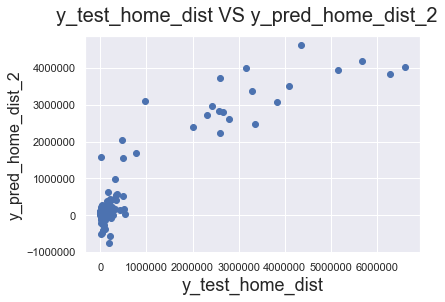

In [1000]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test_home_dist, y_pred_home_dist_2)
fig.suptitle('y_test_home_dist VS y_pred_home_dist_2', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_home_dist', fontsize = 18)                          # X-label
plt.ylabel('y_pred_home_dist_2', fontsize = 16) 

#### Cross Validation

In [1005]:
mlr = LinearRegression()
model=mlr.fit(X_train_home_dist_rfe,y_train_home_dist)
kfold = KFold(n_splits=5)
results = cross_val_score(model,X_test_home_dist,y_test_home_dist, cv=kfold)
print("Results R2: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results R2: 0.55 (0.38) MSE


#### After performing cross validation achieved R2 is 0.55 and MSE is 0.38 for Home Audio dataset

### ELASTICITY for each variable is explained in the report. 